<a href="https://colab.research.google.com/github/sazio/NMAs/blob/main/Square_%2B_Sine_Wave_One_Hot_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

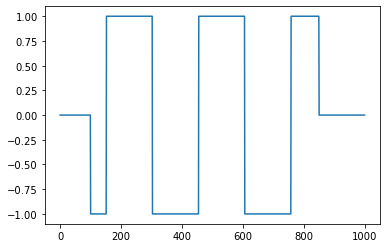

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
'''
#square wave. should want to parametrize with the same frequency 
values and amplitude values as the sine wave

'''
time_length = 1000
start_frac = 0.10
end_frac = 0.85
start_index = int(start_frac * time_length)
end_index = int(end_frac * time_length)


 #should have 10 periods
amplitude = 1
frequency = 3.3#number of periods per time length
cycle_length = int(time_length / frequency)

cycle = np.linspace(0, cycle_length-1, cycle_length) #generating time indices for the canonical period

#creating the square wave according to the time indices
cycle[np.where(cycle <= max(cycle)/2)] = -amplitude 
cycle[np.where(cycle > max(cycle)/2)] = amplitude

#repeating the periods for as many periods as i can fit in the given time
signal = np.tile(cycle, (time_length // cycle_length))

#appending zeros if there's leftover space (should really append as much of a period as can fit)
if len(signal) < time_length:
  signal = np.append(signal, cycle[:(time_length - len(signal))])

signal[:start_index] = 0
signal[end_index:] = 0
t = np.linspace(0, time_length - 1, time_length)

plt.plot(t, signal)

In [ ]:


n_examples = 32
time_length = 128

start_frac = 0.15
end_frac = 0.85
start_index = int(start_frac * time_length)
end_index = int(end_frac * time_length)
frequencies = np.random.uniform(2, 4, (n_examples,)) #could also use randint


'''
time = np.linspace(0, time_length-1, time_length)
frequency = 3 #number of periods i want to see 
freq = 2 * np.pi * frequency / time_length #weird math bullshit to get the number of periods i want to see 

sine = np.zeros((time_length,))
sine[start_index:end_index] = np.sin(freq * time[start_index:end_index])
plt.plot(time, sine)
'''


print(frequencies)



[3.68369482 2.19483277 3.09839465 2.84930893 3.07127439 3.76275103
 3.78492433 2.49505053 2.03283739 2.78533423 2.85936175 3.65851244
 2.14880697 2.91804232 3.20363695 2.93173872 2.47718809 2.48610949
 2.32367381 2.8029581  3.59247674 3.29575328 2.3387176  2.67620528
 2.3214066  3.78734884 2.12946769 2.93984375 3.79177144 2.04192355
 2.58031747 2.58778232]


In [ ]:
1000 // 3.6

277.0

In [ ]:
# generating n/2 square waves at once

#choosing the first half frequencies for the square wave
square_frequencies = frequencies[:len(frequencies) // 2]

#determining the period lengths for each frequency
cycle_lengths = [time_length // int(frequency) for frequency in square_frequencies]

#generating a period for each frequency
cycles = [np.linspace(0, cycle_length-1, cycle_length) for cycle_length in cycle_lengths]
for index,cycle in enumerate(cycles):
    cycles[index][np.where(cycle <= max(cycle)/2)] = -amplitude
    cycles[index][np.where(cycle > max(cycle)/2)] = amplitude

#repeating the periods in the given time length    
short_signals = [np.tile(cycle, (time_length // length)) for cycle, length in zip(cycles, cycle_lengths)]

#adding part of a period until we hit the end
signals = [np.append(short_signal, cycle[:(time_length - len(short_signal))]) 
           if len(short_signal) < time_length else short_signal for short_signal, cycle in zip(short_signals, cycles) ]

#converting list to array once shapes are made regular
signals = np.stack(signals, 0)

#cutting off start and end segments
signals[:,:start_index] = 0
signals[:,end_index:] = 0
signals = signals.T

print(signals.shape)
print(type(signals))

(128, 16)
<class 'numpy.ndarray'>


In [ ]:
# generating n/2 sawtooth waves at once
from scipy.signal import sawtooth

#choosing the first half frequencies for the sawtooth
sawtooth_frequencies = frequencies[:len(frequencies) // 2]

time = np.linspace(0, time_length-1, time_length) / time_length
triangle_signal = list()
for i in range(n_examples // 2):
    triangle_signal.append(amplitude* sawtooth(2*np.pi*sawtooth_frequencies[i]*time, width = 0.5))

triangle_signal = np.asarray(triangle_signal)
triangle_signal = np.swapaxes(triangle_signal, 0, 1)

print(triangle_signal.shape)

(128, 16)


[2.47718809 2.48610949 2.32367381 2.8029581  3.59247674 3.29575328
 2.3387176  2.67620528 2.3214066  3.78734884 2.12946769 2.93984375
 3.79177144 2.04192355 2.58031747 2.58778232]
(128, 16)


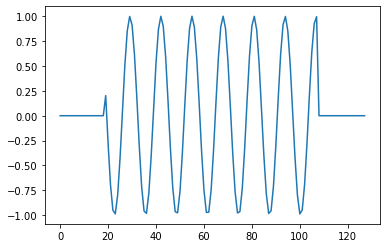

In [ ]:
#generating n/2 sine waves at once

#choosing the latter half frequencies for the sine waves
sine_frequencies = 2 * np.pi * frequencies[len(frequencies) // 2:] / time_length * 3

time = np.linspace(0, time_length-1, time_length)
time = np.repeat(time[:,np.newaxis], len(sine_frequencies), 1)

sine_waves = np.sin(sine_frequencies * time) 
sine_waves[end_index:, :] = 0
sine_waves[:start_index, :] = 0

plt.plot(sine_waves[:,5])
print(frequencies[len(frequencies) // 2:])
print(sine_waves.shape)

In [ ]:
time.shape

(128, 16)

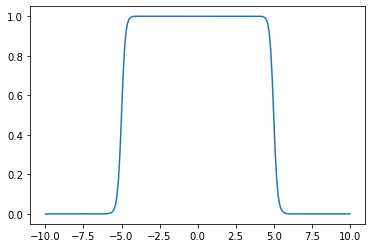

In [ ]:
#butterworth squarewave approximation
timer = np.linspace(-10,10, 201)

cutoff = 5
f = 1 / (1 + (timer / cutoff) ** 40)

plt.plot(timer, f)

#cool but hard to make periodic!


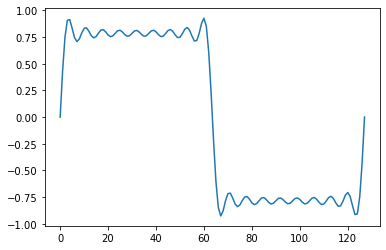

In [ ]:
#square wave as sum of harmonics 
time = np.linspace(0, 128, 128)
squareish = np.zeros((time.shape))
max_harmonic = 19

for i in range(1, max_harmonic, 2):
    squareish += np.sin(i * time *  2 *  np.pi / time_length) / i
    
plt.plot(squareish)

0.13986512513147864


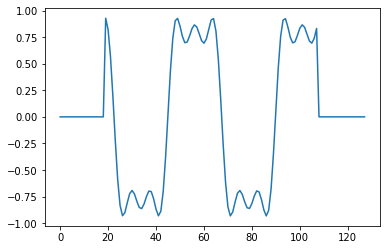

In [ ]:
#Generating n/2 squarish waves at once

squarish_frequencies = 2 * np.pi * frequencies[:len(frequencies) // 2] /time_length


time = np.linspace(0, time_length-1, time_length)
time = np.repeat(time[:,np.newaxis], len(sine_frequencies), 1)

squarish = np.zeros((time.shape))
max_harmonic = 7

for i in range(1, max_harmonic, 2):
    squarish += np.sin(i * time *  squarish_frequencies) / i
    
squarish[end_index:, :] = 0
squarish[:start_index, :] = 0    
    
plt.plot(squarish[:,3])
print(squarish_frequencies[3])

In [ ]:
input_data = frequencies * np.ones((2, time_length, n_examples)) 
input_data[0,:,slice(0,n_examples // 2)] = 0 #one hot encoding the first n/2 examples as squares
input_data[1,:,slice(n_examples // 2, n_examples)] = 0 #one hot encoding the last n/2 examples as sines
input_data[:,:start_index,:] = 0 #removing signal before the start index
input_data[:,end_index:,:] = 0  #removing signal after the end index

input_data = np.swapaxes(input_data, 2, 0) #permuting the axes for easy insertion into model


output_data = np.concatenate((squarish, sine_waves), axis = 1) #the first part is either triangle or square
output_data = output_data.T

print(input_data.shape)

(32, 128, 2)


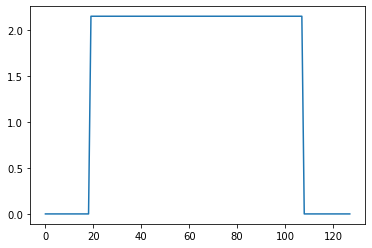

In [ ]:
plt.plot(input_data[12, :, 1])

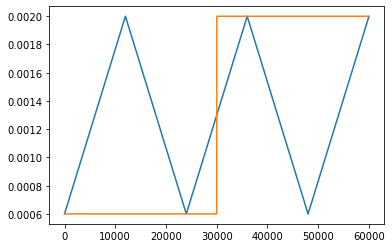

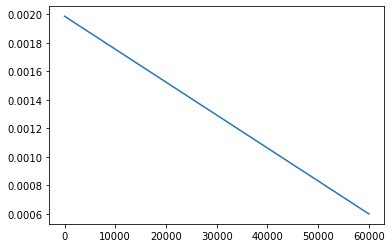

In [ ]:
#cyclic learning rate scheduler and callback
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, TimeDistributed, Dense, GaussianNoise
from math import exp

steps = 60000
mins = 0.0006
maxs = 0.0020 #was 0.0010
n_cycles = 5
step_size = (maxs-mins)/steps * n_cycles
lr_list = list()
lr_list.append(mins)
growth = lambda x: step_size 

while len(lr_list) < steps:     
    while lr_list[-1] <= maxs and len(lr_list) < steps: 
        lr_list.append(lr_list[-1] + growth(lr_list[-1]))
    while lr_list[-1] >= mins and len(lr_list) < steps:
        lr_list.append(lr_list[-1] - growth(lr_list[-1]))
        
plt.plot(lr_list)

lr_list2 = np.ones((steps,)) * maxs
lr_list2[:len(lr_list2) // 2] = mins

plt.plot(lr_list2)

growth3 = lambda x: -(maxs-mins) * x + maxs
lr_list3 = growth3(np.linspace(0.01, 1, steps))

plt.figure()
plt.plot(lr_list3)
def scheduler(epoch, lr_list = lr_list3):
    return lr_list[epoch]

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [ ]:
# defining the model
import time

tic = time.time()

n_nodes = 20
g = 0.4
#stddev=np.sqrt(g**2/n_hidden)

model = tf.keras.Sequential()
model.add(SimpleRNN(n_nodes, input_shape = (time_length, 2),
                                    kernel_initializer = 'random_normal', bias_initializer = 'random_normal',
                                    return_sequences = True, activation = 'tanh',
                                    recurrent_initializer = tf.keras.initializers.RandomNormal(np.sqrt(g**2/n_nodes))))
model.add(GaussianNoise(stddev = 0.1))
model.add(TimeDistributed(Dense(1, activation = 'tanh',
                               kernel_initializer = tf.keras.initializers.RandomNormal(),
                               bias_initializer = 'random_normal')))
                            
optimizer = tf.keras.optimizers.Adam(clipnorm = 1)
model.compile(loss = 'mse', optimizer = optimizer)
epochs = steps

history = model.fit(input_data, output_data, epochs = epochs, shuffle = False, 
          batch_size = n_examples // 1, verbose = 2,
          callbacks = [lr_callback])

toc = time.time()

print('Time Elapsed: %s minutes' % ((int(toc)-int(tic)) // 60))

Train on 32 samples
Epoch 1/60000
32/32 - 1s - loss: 0.3892
Epoch 2/60000
32/32 - 0s - loss: 0.3811
Epoch 3/60000
32/32 - 0s - loss: 0.3764
Epoch 4/60000
32/32 - 0s - loss: 0.3743
Epoch 5/60000
32/32 - 0s - loss: 0.3745
Epoch 6/60000
32/32 - 0s - loss: 0.3745
Epoch 7/60000
32/32 - 0s - loss: 0.3747
Epoch 8/60000
32/32 - 0s - loss: 0.3763
Epoch 9/60000
32/32 - 0s - loss: 0.3765
Epoch 10/60000
32/32 - 0s - loss: 0.3758
Epoch 11/60000
32/32 - 0s - loss: 0.3751
Epoch 12/60000
32/32 - 0s - loss: 0.3746
Epoch 13/60000
32/32 - 0s - loss: 0.3739
Epoch 14/60000
32/32 - 0s - loss: 0.3747
Epoch 15/60000
32/32 - 0s - loss: 0.3752
Epoch 16/60000
32/32 - 0s - loss: 0.3750
Epoch 17/60000
32/32 - 0s - loss: 0.3749
Epoch 18/60000
32/32 - 0s - loss: 0.3742
Epoch 19/60000
32/32 - 0s - loss: 0.3746
Epoch 20/60000
32/32 - 0s - loss: 0.3745
Epoch 21/60000
32/32 - 0s - loss: 0.3737
Epoch 22/60000
32/32 - 0s - loss: 0.3739
Epoch 23/60000
32/32 - 0s - loss: 0.3739
Epoch 24/60000
32/32 - 0s - loss: 0.3744
Epoch

Epoch 199/60000
32/32 - 0s - loss: 0.3734
Epoch 200/60000
32/32 - 0s - loss: 0.3736
Epoch 201/60000
32/32 - 0s - loss: 0.3736
Epoch 202/60000
32/32 - 0s - loss: 0.3740
Epoch 203/60000
32/32 - 0s - loss: 0.3737
Epoch 204/60000
32/32 - 0s - loss: 0.3736
Epoch 205/60000
32/32 - 0s - loss: 0.3737
Epoch 206/60000
32/32 - 0s - loss: 0.3738
Epoch 207/60000
32/32 - 0s - loss: 0.3730
Epoch 208/60000
32/32 - 0s - loss: 0.3742
Epoch 209/60000
32/32 - 0s - loss: 0.3734
Epoch 210/60000
32/32 - 0s - loss: 0.3741
Epoch 211/60000
32/32 - 0s - loss: 0.3735
Epoch 212/60000
32/32 - 0s - loss: 0.3735
Epoch 213/60000
32/32 - 0s - loss: 0.3736
Epoch 214/60000
32/32 - 0s - loss: 0.3736
Epoch 215/60000
32/32 - 0s - loss: 0.3732
Epoch 216/60000
32/32 - 0s - loss: 0.3740
Epoch 217/60000
32/32 - 0s - loss: 0.3731
Epoch 218/60000
32/32 - 0s - loss: 0.3735
Epoch 219/60000
32/32 - 0s - loss: 0.3732
Epoch 220/60000
32/32 - 0s - loss: 0.3733
Epoch 221/60000
32/32 - 0s - loss: 0.3733
Epoch 222/60000
32/32 - 0s - loss:

32/32 - 0s - loss: 0.3734
Epoch 395/60000
32/32 - 0s - loss: 0.3733
Epoch 396/60000
32/32 - 0s - loss: 0.3735
Epoch 397/60000
32/32 - 0s - loss: 0.3731
Epoch 398/60000
32/32 - 0s - loss: 0.3735
Epoch 399/60000
32/32 - 0s - loss: 0.3733
Epoch 400/60000
32/32 - 0s - loss: 0.3733
Epoch 401/60000
32/32 - 0s - loss: 0.3733
Epoch 402/60000
32/32 - 0s - loss: 0.3736
Epoch 403/60000
32/32 - 0s - loss: 0.3732
Epoch 404/60000
32/32 - 0s - loss: 0.3734
Epoch 405/60000
32/32 - 0s - loss: 0.3733
Epoch 406/60000
32/32 - 0s - loss: 0.3732
Epoch 407/60000
32/32 - 0s - loss: 0.3736
Epoch 408/60000
32/32 - 0s - loss: 0.3735
Epoch 409/60000
32/32 - 0s - loss: 0.3733
Epoch 410/60000
32/32 - 0s - loss: 0.3734
Epoch 411/60000
32/32 - 0s - loss: 0.3734
Epoch 412/60000
32/32 - 0s - loss: 0.3733
Epoch 413/60000
32/32 - 0s - loss: 0.3729
Epoch 414/60000
32/32 - 0s - loss: 0.3732
Epoch 415/60000
32/32 - 0s - loss: 0.3733
Epoch 416/60000
32/32 - 0s - loss: 0.3735
Epoch 417/60000
32/32 - 0s - loss: 0.3734
Epoch 41

Epoch 590/60000
32/32 - 0s - loss: 0.3737
Epoch 591/60000
32/32 - 0s - loss: 0.3734
Epoch 592/60000
32/32 - 0s - loss: 0.3736
Epoch 593/60000
32/32 - 0s - loss: 0.3734
Epoch 594/60000
32/32 - 0s - loss: 0.3736
Epoch 595/60000
32/32 - 0s - loss: 0.3733
Epoch 596/60000
32/32 - 0s - loss: 0.3737
Epoch 597/60000
32/32 - 0s - loss: 0.3734
Epoch 598/60000
32/32 - 0s - loss: 0.3734
Epoch 599/60000
32/32 - 0s - loss: 0.3738
Epoch 600/60000
32/32 - 0s - loss: 0.3732
Epoch 601/60000
32/32 - 0s - loss: 0.3732
Epoch 602/60000
32/32 - 0s - loss: 0.3734
Epoch 603/60000
32/32 - 0s - loss: 0.3734
Epoch 604/60000
32/32 - 0s - loss: 0.3735
Epoch 605/60000
32/32 - 0s - loss: 0.3738
Epoch 606/60000
32/32 - 0s - loss: 0.3734
Epoch 607/60000
32/32 - 0s - loss: 0.3734
Epoch 608/60000
32/32 - 0s - loss: 0.3732
Epoch 609/60000
32/32 - 0s - loss: 0.3732
Epoch 610/60000
32/32 - 0s - loss: 0.3735
Epoch 611/60000
32/32 - 0s - loss: 0.3736
Epoch 612/60000
32/32 - 0s - loss: 0.3736
Epoch 613/60000
32/32 - 0s - loss:

Epoch 786/60000
32/32 - 0s - loss: 0.3734
Epoch 787/60000
32/32 - 0s - loss: 0.3731
Epoch 788/60000
32/32 - 0s - loss: 0.3733
Epoch 789/60000
32/32 - 0s - loss: 0.3734
Epoch 790/60000
32/32 - 0s - loss: 0.3733
Epoch 791/60000
32/32 - 0s - loss: 0.3731
Epoch 792/60000
32/32 - 0s - loss: 0.3735
Epoch 793/60000
32/32 - 0s - loss: 0.3734
Epoch 794/60000
32/32 - 0s - loss: 0.3732
Epoch 795/60000
32/32 - 0s - loss: 0.3731
Epoch 796/60000
32/32 - 0s - loss: 0.3731
Epoch 797/60000
32/32 - 0s - loss: 0.3731
Epoch 798/60000
32/32 - 0s - loss: 0.3732
Epoch 799/60000
32/32 - 0s - loss: 0.3733
Epoch 800/60000
32/32 - 0s - loss: 0.3735
Epoch 801/60000
32/32 - 0s - loss: 0.3733
Epoch 802/60000
32/32 - 0s - loss: 0.3733
Epoch 803/60000
32/32 - 0s - loss: 0.3734
Epoch 804/60000
32/32 - 0s - loss: 0.3729
Epoch 805/60000
32/32 - 0s - loss: 0.3733
Epoch 806/60000
32/32 - 0s - loss: 0.3734
Epoch 807/60000
32/32 - 0s - loss: 0.3731
Epoch 808/60000
32/32 - 0s - loss: 0.3733
Epoch 809/60000
32/32 - 0s - loss:

Epoch 982/60000
32/32 - 0s - loss: 0.3692
Epoch 983/60000
32/32 - 0s - loss: 0.3694
Epoch 984/60000
32/32 - 0s - loss: 0.3702
Epoch 985/60000
32/32 - 0s - loss: 0.3699
Epoch 986/60000
32/32 - 0s - loss: 0.3691
Epoch 987/60000
32/32 - 0s - loss: 0.3690
Epoch 988/60000
32/32 - 0s - loss: 0.3696
Epoch 989/60000
32/32 - 0s - loss: 0.3692
Epoch 990/60000
32/32 - 0s - loss: 0.3691
Epoch 991/60000
32/32 - 0s - loss: 0.3694
Epoch 992/60000
32/32 - 0s - loss: 0.3687
Epoch 993/60000
32/32 - 0s - loss: 0.3681
Epoch 994/60000
32/32 - 0s - loss: 0.3691
Epoch 995/60000
32/32 - 0s - loss: 0.3682
Epoch 996/60000
32/32 - 0s - loss: 0.3683
Epoch 997/60000
32/32 - 0s - loss: 0.3687
Epoch 998/60000
32/32 - 0s - loss: 0.3679
Epoch 999/60000
32/32 - 0s - loss: 0.3682
Epoch 1000/60000
32/32 - 0s - loss: 0.3679
Epoch 1001/60000
32/32 - 0s - loss: 0.3679
Epoch 1002/60000
32/32 - 0s - loss: 0.3680
Epoch 1003/60000
32/32 - 0s - loss: 0.3679
Epoch 1004/60000
32/32 - 0s - loss: 0.3683
Epoch 1005/60000
32/32 - 0s -

Epoch 1173/60000
32/32 - 0s - loss: 0.3650
Epoch 1174/60000
32/32 - 0s - loss: 0.3645
Epoch 1175/60000
32/32 - 0s - loss: 0.3651
Epoch 1176/60000
32/32 - 0s - loss: 0.3656
Epoch 1177/60000
32/32 - 0s - loss: 0.3646
Epoch 1178/60000
32/32 - 0s - loss: 0.3644
Epoch 1179/60000
32/32 - 0s - loss: 0.3651
Epoch 1180/60000
32/32 - 0s - loss: 0.3658
Epoch 1181/60000
32/32 - 0s - loss: 0.3635
Epoch 1182/60000
32/32 - 0s - loss: 0.3657
Epoch 1183/60000
32/32 - 0s - loss: 0.3641
Epoch 1184/60000
32/32 - 0s - loss: 0.3645
Epoch 1185/60000
32/32 - 0s - loss: 0.3649
Epoch 1186/60000
32/32 - 0s - loss: 0.3646
Epoch 1187/60000
32/32 - 0s - loss: 0.3641
Epoch 1188/60000
32/32 - 0s - loss: 0.3643
Epoch 1189/60000
32/32 - 0s - loss: 0.3651
Epoch 1190/60000
32/32 - 0s - loss: 0.3652
Epoch 1191/60000
32/32 - 0s - loss: 0.3657
Epoch 1192/60000
32/32 - 0s - loss: 0.3644
Epoch 1193/60000
32/32 - 0s - loss: 0.3651
Epoch 1194/60000
32/32 - 0s - loss: 0.3631
Epoch 1195/60000
32/32 - 0s - loss: 0.3651
Epoch 1196/

Epoch 1364/60000
32/32 - 0s - loss: 0.3647
Epoch 1365/60000
32/32 - 0s - loss: 0.3637
Epoch 1366/60000
32/32 - 0s - loss: 0.3634
Epoch 1367/60000
32/32 - 0s - loss: 0.3636
Epoch 1368/60000
32/32 - 0s - loss: 0.3634
Epoch 1369/60000
32/32 - 0s - loss: 0.3622
Epoch 1370/60000
32/32 - 0s - loss: 0.3629
Epoch 1371/60000
32/32 - 0s - loss: 0.3635
Epoch 1372/60000
32/32 - 0s - loss: 0.3621
Epoch 1373/60000
32/32 - 0s - loss: 0.3625
Epoch 1374/60000
32/32 - 0s - loss: 0.3632
Epoch 1375/60000
32/32 - 0s - loss: 0.3635
Epoch 1376/60000
32/32 - 0s - loss: 0.3636
Epoch 1377/60000
32/32 - 0s - loss: 0.3635
Epoch 1378/60000
32/32 - 0s - loss: 0.3624
Epoch 1379/60000
32/32 - 0s - loss: 0.3630
Epoch 1380/60000
32/32 - 0s - loss: 0.3631
Epoch 1381/60000
32/32 - 0s - loss: 0.3634
Epoch 1382/60000
32/32 - 0s - loss: 0.3626
Epoch 1383/60000
32/32 - 0s - loss: 0.3631
Epoch 1384/60000
32/32 - 0s - loss: 0.3633
Epoch 1385/60000
32/32 - 0s - loss: 0.3619
Epoch 1386/60000
32/32 - 0s - loss: 0.3623
Epoch 1387/

Epoch 1555/60000
32/32 - 0s - loss: 0.3620
Epoch 1556/60000
32/32 - 0s - loss: 0.3613
Epoch 1557/60000
32/32 - 0s - loss: 0.3602
Epoch 1558/60000
32/32 - 0s - loss: 0.3589
Epoch 1559/60000
32/32 - 0s - loss: 0.3610
Epoch 1560/60000
32/32 - 0s - loss: 0.3622
Epoch 1561/60000
32/32 - 0s - loss: 0.3593
Epoch 1562/60000
32/32 - 0s - loss: 0.3607
Epoch 1563/60000
32/32 - 0s - loss: 0.3610
Epoch 1564/60000
32/32 - 0s - loss: 0.3613
Epoch 1565/60000
32/32 - 0s - loss: 0.3614
Epoch 1566/60000
32/32 - 0s - loss: 0.3614
Epoch 1567/60000
32/32 - 0s - loss: 0.3606
Epoch 1568/60000
32/32 - 0s - loss: 0.3592
Epoch 1569/60000
32/32 - 0s - loss: 0.3595
Epoch 1570/60000
32/32 - 0s - loss: 0.3596
Epoch 1571/60000
32/32 - 0s - loss: 0.3607
Epoch 1572/60000
32/32 - 0s - loss: 0.3593
Epoch 1573/60000
32/32 - 0s - loss: 0.3627
Epoch 1574/60000
32/32 - 0s - loss: 0.3585
Epoch 1575/60000
32/32 - 0s - loss: 0.3614
Epoch 1576/60000
32/32 - 0s - loss: 0.3588
Epoch 1577/60000
32/32 - 0s - loss: 0.3593
Epoch 1578/

Epoch 1746/60000
32/32 - 0s - loss: 0.3133
Epoch 1747/60000
32/32 - 0s - loss: 0.3123
Epoch 1748/60000
32/32 - 0s - loss: 0.3161
Epoch 1749/60000
32/32 - 0s - loss: 0.3104
Epoch 1750/60000
32/32 - 0s - loss: 0.3187
Epoch 1751/60000
32/32 - 0s - loss: 0.3109
Epoch 1752/60000
32/32 - 0s - loss: 0.3135
Epoch 1753/60000
32/32 - 0s - loss: 0.3136
Epoch 1754/60000
32/32 - 0s - loss: 0.3113
Epoch 1755/60000
32/32 - 0s - loss: 0.3148
Epoch 1756/60000
32/32 - 0s - loss: 0.3117
Epoch 1757/60000
32/32 - 0s - loss: 0.3120
Epoch 1758/60000
32/32 - 0s - loss: 0.3127
Epoch 1759/60000
32/32 - 0s - loss: 0.3102
Epoch 1760/60000
32/32 - 0s - loss: 0.3122
Epoch 1761/60000
32/32 - 0s - loss: 0.3111
Epoch 1762/60000
32/32 - 0s - loss: 0.3108
Epoch 1763/60000
32/32 - 0s - loss: 0.3099
Epoch 1764/60000
32/32 - 0s - loss: 0.3127
Epoch 1765/60000
32/32 - 0s - loss: 0.3099
Epoch 1766/60000
32/32 - 0s - loss: 0.3099
Epoch 1767/60000
32/32 - 0s - loss: 0.3098
Epoch 1768/60000
32/32 - 0s - loss: 0.3093
Epoch 1769/

Epoch 1937/60000
32/32 - 0s - loss: 0.3078
Epoch 1938/60000
32/32 - 0s - loss: 0.3083
Epoch 1939/60000
32/32 - 0s - loss: 0.3085
Epoch 1940/60000
32/32 - 0s - loss: 0.3022
Epoch 1941/60000
32/32 - 0s - loss: 0.3176
Epoch 1942/60000
32/32 - 0s - loss: 0.3091
Epoch 1943/60000
32/32 - 0s - loss: 0.3136
Epoch 1944/60000
32/32 - 0s - loss: 0.3188
Epoch 1945/60000
32/32 - 0s - loss: 0.3181
Epoch 1946/60000
32/32 - 0s - loss: 0.3176
Epoch 1947/60000
32/32 - 0s - loss: 0.3123
Epoch 1948/60000
32/32 - 0s - loss: 0.3110
Epoch 1949/60000
32/32 - 0s - loss: 0.3083
Epoch 1950/60000
32/32 - 0s - loss: 0.3090
Epoch 1951/60000
32/32 - 0s - loss: 0.3049
Epoch 1952/60000
32/32 - 0s - loss: 0.3028
Epoch 1953/60000
32/32 - 0s - loss: 0.3073
Epoch 1954/60000
32/32 - 0s - loss: 0.3047
Epoch 1955/60000
32/32 - 0s - loss: 0.3074
Epoch 1956/60000
32/32 - 0s - loss: 0.3043
Epoch 1957/60000
32/32 - 0s - loss: 0.3071
Epoch 1958/60000
32/32 - 0s - loss: 0.3054
Epoch 1959/60000
32/32 - 0s - loss: 0.3060
Epoch 1960/

Epoch 2128/60000
32/32 - 0s - loss: 0.3000
Epoch 2129/60000
32/32 - 0s - loss: 0.2977
Epoch 2130/60000
32/32 - 0s - loss: 0.3002
Epoch 2131/60000
32/32 - 0s - loss: 0.2994
Epoch 2132/60000
32/32 - 0s - loss: 0.2979
Epoch 2133/60000
32/32 - 0s - loss: 0.3001
Epoch 2134/60000
32/32 - 0s - loss: 0.2988
Epoch 2135/60000
32/32 - 0s - loss: 0.2991
Epoch 2136/60000
32/32 - 0s - loss: 0.2998
Epoch 2137/60000
32/32 - 0s - loss: 0.2952
Epoch 2138/60000
32/32 - 0s - loss: 0.2961
Epoch 2139/60000
32/32 - 0s - loss: 0.2976
Epoch 2140/60000
32/32 - 0s - loss: 0.2971
Epoch 2141/60000
32/32 - 0s - loss: 0.3017
Epoch 2142/60000
32/32 - 0s - loss: 0.3012
Epoch 2143/60000
32/32 - 0s - loss: 0.3062
Epoch 2144/60000
32/32 - 0s - loss: 0.3051
Epoch 2145/60000
32/32 - 0s - loss: 0.3089
Epoch 2146/60000
32/32 - 0s - loss: 0.3079
Epoch 2147/60000
32/32 - 0s - loss: 0.3011
Epoch 2148/60000
32/32 - 0s - loss: 0.3043
Epoch 2149/60000
32/32 - 0s - loss: 0.3010
Epoch 2150/60000
32/32 - 0s - loss: 0.3005
Epoch 2151/

Epoch 2319/60000
32/32 - 0s - loss: 0.2950
Epoch 2320/60000
32/32 - 0s - loss: 0.2985
Epoch 2321/60000
32/32 - 0s - loss: 0.2987
Epoch 2322/60000
32/32 - 0s - loss: 0.2973
Epoch 2323/60000
32/32 - 0s - loss: 0.2955
Epoch 2324/60000
32/32 - 0s - loss: 0.2965
Epoch 2325/60000
32/32 - 0s - loss: 0.2967
Epoch 2326/60000
32/32 - 0s - loss: 0.2963
Epoch 2327/60000
32/32 - 0s - loss: 0.2942
Epoch 2328/60000
32/32 - 0s - loss: 0.2961
Epoch 2329/60000
32/32 - 0s - loss: 0.2923
Epoch 2330/60000
32/32 - 0s - loss: 0.2942
Epoch 2331/60000
32/32 - 0s - loss: 0.2974
Epoch 2332/60000
32/32 - 0s - loss: 0.2966
Epoch 2333/60000
32/32 - 0s - loss: 0.2958
Epoch 2334/60000
32/32 - 0s - loss: 0.2984
Epoch 2335/60000
32/32 - 0s - loss: 0.2983
Epoch 2336/60000
32/32 - 0s - loss: 0.2997
Epoch 2337/60000
32/32 - 0s - loss: 0.2988
Epoch 2338/60000
32/32 - 0s - loss: 0.2973
Epoch 2339/60000
32/32 - 0s - loss: 0.2984
Epoch 2340/60000
32/32 - 0s - loss: 0.3001
Epoch 2341/60000
32/32 - 0s - loss: 0.2986
Epoch 2342/

Epoch 2510/60000
32/32 - 0s - loss: 0.2843
Epoch 2511/60000
32/32 - 0s - loss: 0.2866
Epoch 2512/60000
32/32 - 0s - loss: 0.2884
Epoch 2513/60000
32/32 - 0s - loss: 0.2887
Epoch 2514/60000
32/32 - 0s - loss: 0.2880
Epoch 2515/60000
32/32 - 0s - loss: 0.2934
Epoch 2516/60000
32/32 - 0s - loss: 0.2935
Epoch 2517/60000
32/32 - 0s - loss: 0.2978
Epoch 2518/60000
32/32 - 0s - loss: 0.3014
Epoch 2519/60000
32/32 - 0s - loss: 0.3020
Epoch 2520/60000
32/32 - 0s - loss: 0.3024
Epoch 2521/60000
32/32 - 0s - loss: 0.3026
Epoch 2522/60000
32/32 - 0s - loss: 0.3022
Epoch 2523/60000
32/32 - 0s - loss: 0.3013
Epoch 2524/60000
32/32 - 0s - loss: 0.2983
Epoch 2525/60000
32/32 - 0s - loss: 0.2942
Epoch 2526/60000
32/32 - 0s - loss: 0.2907
Epoch 2527/60000
32/32 - 0s - loss: 0.2900
Epoch 2528/60000
32/32 - 0s - loss: 0.2934
Epoch 2529/60000
32/32 - 0s - loss: 0.2873
Epoch 2530/60000
32/32 - 0s - loss: 0.2907
Epoch 2531/60000
32/32 - 0s - loss: 0.2916
Epoch 2532/60000
32/32 - 0s - loss: 0.2904
Epoch 2533/

Epoch 2701/60000
32/32 - 0s - loss: 0.2836
Epoch 2702/60000
32/32 - 0s - loss: 0.2809
Epoch 2703/60000
32/32 - 0s - loss: 0.2814
Epoch 2704/60000
32/32 - 0s - loss: 0.2791
Epoch 2705/60000
32/32 - 0s - loss: 0.2822
Epoch 2706/60000
32/32 - 0s - loss: 0.2832
Epoch 2707/60000
32/32 - 0s - loss: 0.2822
Epoch 2708/60000
32/32 - 0s - loss: 0.2819
Epoch 2709/60000
32/32 - 0s - loss: 0.2798
Epoch 2710/60000
32/32 - 0s - loss: 0.2814
Epoch 2711/60000
32/32 - 0s - loss: 0.2831
Epoch 2712/60000
32/32 - 0s - loss: 0.2819
Epoch 2713/60000
32/32 - 0s - loss: 0.2813
Epoch 2714/60000
32/32 - 0s - loss: 0.2824
Epoch 2715/60000
32/32 - 0s - loss: 0.2846
Epoch 2716/60000
32/32 - 0s - loss: 0.2810
Epoch 2717/60000
32/32 - 0s - loss: 0.2811
Epoch 2718/60000
32/32 - 0s - loss: 0.2817
Epoch 2719/60000
32/32 - 0s - loss: 0.2818
Epoch 2720/60000
32/32 - 0s - loss: 0.2819
Epoch 2721/60000
32/32 - 0s - loss: 0.2835
Epoch 2722/60000
32/32 - 0s - loss: 0.2797
Epoch 2723/60000
32/32 - 0s - loss: 0.2821
Epoch 2724/

Epoch 2892/60000
32/32 - 0s - loss: 0.2995
Epoch 2893/60000
32/32 - 0s - loss: 0.2990
Epoch 2894/60000
32/32 - 0s - loss: 0.2949
Epoch 2895/60000
32/32 - 0s - loss: 0.2958
Epoch 2896/60000
32/32 - 0s - loss: 0.2932
Epoch 2897/60000
32/32 - 0s - loss: 0.2912
Epoch 2898/60000
32/32 - 0s - loss: 0.2870
Epoch 2899/60000
32/32 - 0s - loss: 0.2909
Epoch 2900/60000
32/32 - 0s - loss: 0.2842
Epoch 2901/60000
32/32 - 0s - loss: 0.2855
Epoch 2902/60000
32/32 - 0s - loss: 0.2882
Epoch 2903/60000
32/32 - 0s - loss: 0.2847
Epoch 2904/60000
32/32 - 0s - loss: 0.2825
Epoch 2905/60000
32/32 - 0s - loss: 0.2864
Epoch 2906/60000
32/32 - 0s - loss: 0.2818
Epoch 2907/60000
32/32 - 0s - loss: 0.2877
Epoch 2908/60000
32/32 - 0s - loss: 0.2859
Epoch 2909/60000
32/32 - 0s - loss: 0.2834
Epoch 2910/60000
32/32 - 0s - loss: 0.2825
Epoch 2911/60000
32/32 - 0s - loss: 0.2847
Epoch 2912/60000
32/32 - 0s - loss: 0.2841
Epoch 2913/60000
32/32 - 0s - loss: 0.2811
Epoch 2914/60000
32/32 - 0s - loss: 0.2831
Epoch 2915/

Epoch 3083/60000
32/32 - 0s - loss: 0.2795
Epoch 3084/60000
32/32 - 0s - loss: 0.2794
Epoch 3085/60000
32/32 - 0s - loss: 0.2786
Epoch 3086/60000
32/32 - 0s - loss: 0.2794
Epoch 3087/60000
32/32 - 0s - loss: 0.2809
Epoch 3088/60000
32/32 - 0s - loss: 0.2809
Epoch 3089/60000
32/32 - 0s - loss: 0.2809
Epoch 3090/60000
32/32 - 0s - loss: 0.2803
Epoch 3091/60000
32/32 - 0s - loss: 0.2808
Epoch 3092/60000
32/32 - 0s - loss: 0.2804
Epoch 3093/60000
32/32 - 0s - loss: 0.2803
Epoch 3094/60000
32/32 - 0s - loss: 0.2778
Epoch 3095/60000
32/32 - 0s - loss: 0.2789
Epoch 3096/60000
32/32 - 0s - loss: 0.2819
Epoch 3097/60000
32/32 - 0s - loss: 0.2799
Epoch 3098/60000
32/32 - 0s - loss: 0.2803
Epoch 3099/60000
32/32 - 0s - loss: 0.2789
Epoch 3100/60000
32/32 - 0s - loss: 0.2813
Epoch 3101/60000
32/32 - 0s - loss: 0.2771
Epoch 3102/60000
32/32 - 0s - loss: 0.2806
Epoch 3103/60000
32/32 - 0s - loss: 0.2804
Epoch 3104/60000
32/32 - 0s - loss: 0.2811
Epoch 3105/60000
32/32 - 0s - loss: 0.2798
Epoch 3106/

Epoch 3274/60000
32/32 - 0s - loss: 0.2778
Epoch 3275/60000
32/32 - 0s - loss: 0.2797
Epoch 3276/60000
32/32 - 0s - loss: 0.2799
Epoch 3277/60000
32/32 - 0s - loss: 0.2805
Epoch 3278/60000
32/32 - 0s - loss: 0.2783
Epoch 3279/60000
32/32 - 0s - loss: 0.2816
Epoch 3280/60000
32/32 - 0s - loss: 0.2808
Epoch 3281/60000
32/32 - 0s - loss: 0.2783
Epoch 3282/60000
32/32 - 0s - loss: 0.2795
Epoch 3283/60000
32/32 - 0s - loss: 0.2804
Epoch 3284/60000
32/32 - 0s - loss: 0.2795
Epoch 3285/60000
32/32 - 0s - loss: 0.2797
Epoch 3286/60000
32/32 - 0s - loss: 0.2781
Epoch 3287/60000
32/32 - 0s - loss: 0.2764
Epoch 3288/60000
32/32 - 0s - loss: 0.2790
Epoch 3289/60000
32/32 - 0s - loss: 0.2798
Epoch 3290/60000
32/32 - 0s - loss: 0.2803
Epoch 3291/60000
32/32 - 0s - loss: 0.2809
Epoch 3292/60000
32/32 - 0s - loss: 0.2811
Epoch 3293/60000
32/32 - 0s - loss: 0.2798
Epoch 3294/60000
32/32 - 0s - loss: 0.2790
Epoch 3295/60000
32/32 - 0s - loss: 0.2801
Epoch 3296/60000
32/32 - 0s - loss: 0.2794
Epoch 3297/

Epoch 3465/60000
32/32 - 0s - loss: 0.2790
Epoch 3466/60000
32/32 - 0s - loss: 0.2779
Epoch 3467/60000
32/32 - 0s - loss: 0.2774
Epoch 3468/60000
32/32 - 0s - loss: 0.2808
Epoch 3469/60000
32/32 - 0s - loss: 0.2793
Epoch 3470/60000
32/32 - 0s - loss: 0.2772
Epoch 3471/60000
32/32 - 0s - loss: 0.2807
Epoch 3472/60000
32/32 - 0s - loss: 0.2787
Epoch 3473/60000
32/32 - 0s - loss: 0.2798
Epoch 3474/60000
32/32 - 0s - loss: 0.2793
Epoch 3475/60000
32/32 - 0s - loss: 0.2802
Epoch 3476/60000
32/32 - 0s - loss: 0.2797
Epoch 3477/60000
32/32 - 0s - loss: 0.2801
Epoch 3478/60000
32/32 - 0s - loss: 0.2795
Epoch 3479/60000
32/32 - 0s - loss: 0.2786
Epoch 3480/60000
32/32 - 0s - loss: 0.2782
Epoch 3481/60000
32/32 - 0s - loss: 0.2790
Epoch 3482/60000
32/32 - 0s - loss: 0.2795
Epoch 3483/60000
32/32 - 0s - loss: 0.2791
Epoch 3484/60000
32/32 - 0s - loss: 0.2801
Epoch 3485/60000
32/32 - 0s - loss: 0.2788
Epoch 3486/60000
32/32 - 0s - loss: 0.2794
Epoch 3487/60000
32/32 - 0s - loss: 0.2782
Epoch 3488/

Epoch 3656/60000
32/32 - 0s - loss: 0.2798
Epoch 3657/60000
32/32 - 0s - loss: 0.2788
Epoch 3658/60000
32/32 - 0s - loss: 0.2788
Epoch 3659/60000
32/32 - 0s - loss: 0.2797
Epoch 3660/60000
32/32 - 0s - loss: 0.2782
Epoch 3661/60000
32/32 - 0s - loss: 0.2803
Epoch 3662/60000
32/32 - 0s - loss: 0.2792
Epoch 3663/60000
32/32 - 0s - loss: 0.2772
Epoch 3664/60000
32/32 - 0s - loss: 0.2779
Epoch 3665/60000
32/32 - 0s - loss: 0.2770
Epoch 3666/60000
32/32 - 0s - loss: 0.2809
Epoch 3667/60000
32/32 - 0s - loss: 0.2780
Epoch 3668/60000
32/32 - 0s - loss: 0.2786
Epoch 3669/60000
32/32 - 0s - loss: 0.2775
Epoch 3670/60000
32/32 - 0s - loss: 0.2782
Epoch 3671/60000
32/32 - 0s - loss: 0.2798
Epoch 3672/60000
32/32 - 0s - loss: 0.2784
Epoch 3673/60000
32/32 - 0s - loss: 0.2796
Epoch 3674/60000
32/32 - 0s - loss: 0.2800
Epoch 3675/60000
32/32 - 0s - loss: 0.2762
Epoch 3676/60000
32/32 - 0s - loss: 0.2787
Epoch 3677/60000
32/32 - 0s - loss: 0.2799
Epoch 3678/60000
32/32 - 0s - loss: 0.2771
Epoch 3679/

Epoch 3847/60000
32/32 - 0s - loss: 0.2777
Epoch 3848/60000
32/32 - 0s - loss: 0.2793
Epoch 3849/60000
32/32 - 0s - loss: 0.2786
Epoch 3850/60000
32/32 - 0s - loss: 0.2786
Epoch 3851/60000
32/32 - 0s - loss: 0.2793
Epoch 3852/60000
32/32 - 0s - loss: 0.2799
Epoch 3853/60000
32/32 - 0s - loss: 0.2793
Epoch 3854/60000
32/32 - 0s - loss: 0.2788
Epoch 3855/60000
32/32 - 0s - loss: 0.2791
Epoch 3856/60000
32/32 - 0s - loss: 0.2805
Epoch 3857/60000
32/32 - 0s - loss: 0.2792
Epoch 3858/60000
32/32 - 0s - loss: 0.2790
Epoch 3859/60000
32/32 - 0s - loss: 0.2773
Epoch 3860/60000
32/32 - 0s - loss: 0.2773
Epoch 3861/60000
32/32 - 0s - loss: 0.2800
Epoch 3862/60000
32/32 - 0s - loss: 0.2778
Epoch 3863/60000
32/32 - 0s - loss: 0.2782
Epoch 3864/60000
32/32 - 0s - loss: 0.2792
Epoch 3865/60000
32/32 - 0s - loss: 0.2777
Epoch 3866/60000
32/32 - 0s - loss: 0.2784
Epoch 3867/60000
32/32 - 0s - loss: 0.2779
Epoch 3868/60000
32/32 - 0s - loss: 0.2790
Epoch 3869/60000
32/32 - 0s - loss: 0.2790
Epoch 3870/

Epoch 4038/60000
32/32 - 0s - loss: 0.2777
Epoch 4039/60000
32/32 - 0s - loss: 0.2779
Epoch 4040/60000
32/32 - 0s - loss: 0.2793
Epoch 4041/60000
32/32 - 0s - loss: 0.2794
Epoch 4042/60000
32/32 - 0s - loss: 0.2778
Epoch 4043/60000
32/32 - 0s - loss: 0.2784
Epoch 4044/60000
32/32 - 0s - loss: 0.2773
Epoch 4045/60000
32/32 - 0s - loss: 0.2784
Epoch 4046/60000
32/32 - 0s - loss: 0.2782
Epoch 4047/60000
32/32 - 0s - loss: 0.2758
Epoch 4048/60000
32/32 - 0s - loss: 0.2771
Epoch 4049/60000
32/32 - 0s - loss: 0.2780
Epoch 4050/60000
32/32 - 0s - loss: 0.2775
Epoch 4051/60000
32/32 - 0s - loss: 0.2783
Epoch 4052/60000
32/32 - 0s - loss: 0.2775
Epoch 4053/60000
32/32 - 0s - loss: 0.2784
Epoch 4054/60000
32/32 - 0s - loss: 0.2790
Epoch 4055/60000
32/32 - 0s - loss: 0.2784
Epoch 4056/60000
32/32 - 0s - loss: 0.2758
Epoch 4057/60000
32/32 - 0s - loss: 0.2779
Epoch 4058/60000
32/32 - 0s - loss: 0.2787
Epoch 4059/60000
32/32 - 0s - loss: 0.2787
Epoch 4060/60000
32/32 - 0s - loss: 0.2775
Epoch 4061/

Epoch 4229/60000
32/32 - 0s - loss: 0.2760
Epoch 4230/60000
32/32 - 0s - loss: 0.2776
Epoch 4231/60000
32/32 - 0s - loss: 0.2785
Epoch 4232/60000
32/32 - 0s - loss: 0.2767
Epoch 4233/60000
32/32 - 0s - loss: 0.2790
Epoch 4234/60000
32/32 - 0s - loss: 0.2787
Epoch 4235/60000
32/32 - 0s - loss: 0.2782
Epoch 4236/60000
32/32 - 0s - loss: 0.2774
Epoch 4237/60000
32/32 - 0s - loss: 0.2748
Epoch 4238/60000
32/32 - 0s - loss: 0.2786
Epoch 4239/60000
32/32 - 0s - loss: 0.2776
Epoch 4240/60000
32/32 - 0s - loss: 0.2789
Epoch 4241/60000
32/32 - 0s - loss: 0.2770
Epoch 4242/60000
32/32 - 0s - loss: 0.2788
Epoch 4243/60000
32/32 - 0s - loss: 0.2767
Epoch 4244/60000
32/32 - 0s - loss: 0.2789
Epoch 4245/60000
32/32 - 0s - loss: 0.2796
Epoch 4246/60000
32/32 - 0s - loss: 0.2797
Epoch 4247/60000
32/32 - 0s - loss: 0.2765
Epoch 4248/60000
32/32 - 0s - loss: 0.2753
Epoch 4249/60000
32/32 - 0s - loss: 0.2781
Epoch 4250/60000
32/32 - 0s - loss: 0.2782
Epoch 4251/60000
32/32 - 0s - loss: 0.2777
Epoch 4252/

Epoch 4420/60000
32/32 - 0s - loss: 0.2770
Epoch 4421/60000
32/32 - 0s - loss: 0.2778
Epoch 4422/60000
32/32 - 0s - loss: 0.2765
Epoch 4423/60000
32/32 - 0s - loss: 0.2773
Epoch 4424/60000
32/32 - 0s - loss: 0.2779
Epoch 4425/60000
32/32 - 0s - loss: 0.2761
Epoch 4426/60000
32/32 - 0s - loss: 0.2788
Epoch 4427/60000
32/32 - 0s - loss: 0.2786
Epoch 4428/60000
32/32 - 0s - loss: 0.2765
Epoch 4429/60000
32/32 - 0s - loss: 0.2789
Epoch 4430/60000
32/32 - 0s - loss: 0.2765
Epoch 4431/60000
32/32 - 0s - loss: 0.2784
Epoch 4432/60000
32/32 - 0s - loss: 0.2776
Epoch 4433/60000
32/32 - 0s - loss: 0.2776
Epoch 4434/60000
32/32 - 0s - loss: 0.2784
Epoch 4435/60000
32/32 - 0s - loss: 0.2773
Epoch 4436/60000
32/32 - 0s - loss: 0.2778
Epoch 4437/60000
32/32 - 0s - loss: 0.2785
Epoch 4438/60000
32/32 - 0s - loss: 0.2795
Epoch 4439/60000
32/32 - 0s - loss: 0.2764
Epoch 4440/60000
32/32 - 0s - loss: 0.2776
Epoch 4441/60000
32/32 - 0s - loss: 0.2764
Epoch 4442/60000
32/32 - 0s - loss: 0.2770
Epoch 4443/

Epoch 4611/60000
32/32 - 0s - loss: 0.2771
Epoch 4612/60000
32/32 - 0s - loss: 0.2767
Epoch 4613/60000
32/32 - 0s - loss: 0.2779
Epoch 4614/60000
32/32 - 0s - loss: 0.2761
Epoch 4615/60000
32/32 - 0s - loss: 0.2755
Epoch 4616/60000
32/32 - 0s - loss: 0.2768
Epoch 4617/60000
32/32 - 0s - loss: 0.2768
Epoch 4618/60000
32/32 - 0s - loss: 0.2794
Epoch 4619/60000
32/32 - 0s - loss: 0.2761
Epoch 4620/60000
32/32 - 0s - loss: 0.2772
Epoch 4621/60000
32/32 - 0s - loss: 0.2777
Epoch 4622/60000
32/32 - 0s - loss: 0.2767
Epoch 4623/60000
32/32 - 0s - loss: 0.2767
Epoch 4624/60000
32/32 - 0s - loss: 0.2768
Epoch 4625/60000
32/32 - 0s - loss: 0.2781
Epoch 4626/60000
32/32 - 0s - loss: 0.2774
Epoch 4627/60000
32/32 - 0s - loss: 0.2754
Epoch 4628/60000
32/32 - 0s - loss: 0.2774
Epoch 4629/60000
32/32 - 0s - loss: 0.2781
Epoch 4630/60000
32/32 - 0s - loss: 0.2772
Epoch 4631/60000
32/32 - 0s - loss: 0.2767
Epoch 4632/60000
32/32 - 0s - loss: 0.2782
Epoch 4633/60000
32/32 - 0s - loss: 0.2754
Epoch 4634/

Epoch 4802/60000
32/32 - 0s - loss: 0.2758
Epoch 4803/60000
32/32 - 0s - loss: 0.2761
Epoch 4804/60000
32/32 - 0s - loss: 0.2743
Epoch 4805/60000
32/32 - 0s - loss: 0.2762
Epoch 4806/60000
32/32 - 0s - loss: 0.2757
Epoch 4807/60000
32/32 - 0s - loss: 0.2760
Epoch 4808/60000
32/32 - 0s - loss: 0.2773
Epoch 4809/60000
32/32 - 0s - loss: 0.2778
Epoch 4810/60000
32/32 - 0s - loss: 0.2765
Epoch 4811/60000
32/32 - 0s - loss: 0.2782
Epoch 4812/60000
32/32 - 0s - loss: 0.2761
Epoch 4813/60000
32/32 - 0s - loss: 0.2772
Epoch 4814/60000
32/32 - 0s - loss: 0.2760
Epoch 4815/60000
32/32 - 0s - loss: 0.2762
Epoch 4816/60000
32/32 - 0s - loss: 0.2768
Epoch 4817/60000
32/32 - 0s - loss: 0.2779
Epoch 4818/60000
32/32 - 0s - loss: 0.2766
Epoch 4819/60000
32/32 - 0s - loss: 0.2775
Epoch 4820/60000
32/32 - 0s - loss: 0.2766
Epoch 4821/60000
32/32 - 0s - loss: 0.2742
Epoch 4822/60000
32/32 - 0s - loss: 0.2786
Epoch 4823/60000
32/32 - 0s - loss: 0.2758
Epoch 4824/60000
32/32 - 0s - loss: 0.2753
Epoch 4825/

Epoch 4993/60000
32/32 - 0s - loss: 0.2758
Epoch 4994/60000
32/32 - 0s - loss: 0.2774
Epoch 4995/60000
32/32 - 0s - loss: 0.2765
Epoch 4996/60000
32/32 - 0s - loss: 0.2755
Epoch 4997/60000
32/32 - 0s - loss: 0.2764
Epoch 4998/60000
32/32 - 0s - loss: 0.2761
Epoch 4999/60000
32/32 - 0s - loss: 0.2772
Epoch 5000/60000
32/32 - 0s - loss: 0.2766
Epoch 5001/60000
32/32 - 0s - loss: 0.2765
Epoch 5002/60000
32/32 - 0s - loss: 0.2753
Epoch 5003/60000
32/32 - 0s - loss: 0.2766
Epoch 5004/60000
32/32 - 0s - loss: 0.2757
Epoch 5005/60000
32/32 - 0s - loss: 0.2757
Epoch 5006/60000
32/32 - 0s - loss: 0.2770
Epoch 5007/60000
32/32 - 0s - loss: 0.2757
Epoch 5008/60000
32/32 - 0s - loss: 0.2760
Epoch 5009/60000
32/32 - 0s - loss: 0.2772
Epoch 5010/60000
32/32 - 0s - loss: 0.2786
Epoch 5011/60000
32/32 - 0s - loss: 0.2755
Epoch 5012/60000
32/32 - 0s - loss: 0.2775
Epoch 5013/60000
32/32 - 0s - loss: 0.2758
Epoch 5014/60000
32/32 - 0s - loss: 0.2752
Epoch 5015/60000
32/32 - 0s - loss: 0.2784
Epoch 5016/

Epoch 5184/60000
32/32 - 0s - loss: 0.2765
Epoch 5185/60000
32/32 - 0s - loss: 0.2749
Epoch 5186/60000
32/32 - 0s - loss: 0.2749
Epoch 5187/60000
32/32 - 0s - loss: 0.2761
Epoch 5188/60000
32/32 - 0s - loss: 0.2778
Epoch 5189/60000
32/32 - 0s - loss: 0.2749
Epoch 5190/60000
32/32 - 0s - loss: 0.2758
Epoch 5191/60000
32/32 - 0s - loss: 0.2767
Epoch 5192/60000
32/32 - 0s - loss: 0.2745
Epoch 5193/60000
32/32 - 0s - loss: 0.2766
Epoch 5194/60000
32/32 - 0s - loss: 0.2768
Epoch 5195/60000
32/32 - 0s - loss: 0.2753
Epoch 5196/60000
32/32 - 0s - loss: 0.2744
Epoch 5197/60000
32/32 - 0s - loss: 0.2764
Epoch 5198/60000
32/32 - 0s - loss: 0.2764
Epoch 5199/60000
32/32 - 0s - loss: 0.2748
Epoch 5200/60000
32/32 - 0s - loss: 0.2755
Epoch 5201/60000
32/32 - 0s - loss: 0.2766
Epoch 5202/60000
32/32 - 0s - loss: 0.2773
Epoch 5203/60000
32/32 - 0s - loss: 0.2756
Epoch 5204/60000
32/32 - 0s - loss: 0.2756
Epoch 5205/60000
32/32 - 0s - loss: 0.2775
Epoch 5206/60000
32/32 - 0s - loss: 0.2755
Epoch 5207/

Epoch 5375/60000
32/32 - 0s - loss: 0.2647
Epoch 5376/60000
32/32 - 0s - loss: 0.2637
Epoch 5377/60000
32/32 - 0s - loss: 0.2653
Epoch 5378/60000
32/32 - 0s - loss: 0.2644
Epoch 5379/60000
32/32 - 0s - loss: 0.2631
Epoch 5380/60000
32/32 - 0s - loss: 0.2659
Epoch 5381/60000
32/32 - 0s - loss: 0.2637
Epoch 5382/60000
32/32 - 0s - loss: 0.2649
Epoch 5383/60000
32/32 - 0s - loss: 0.2652
Epoch 5384/60000
32/32 - 0s - loss: 0.2646
Epoch 5385/60000
32/32 - 0s - loss: 0.2649
Epoch 5386/60000
32/32 - 0s - loss: 0.2648
Epoch 5387/60000
32/32 - 0s - loss: 0.2643
Epoch 5388/60000
32/32 - 0s - loss: 0.2643
Epoch 5389/60000
32/32 - 0s - loss: 0.2657
Epoch 5390/60000
32/32 - 0s - loss: 0.2661
Epoch 5391/60000
32/32 - 0s - loss: 0.2638
Epoch 5392/60000
32/32 - 0s - loss: 0.2632
Epoch 5393/60000
32/32 - 0s - loss: 0.2643
Epoch 5394/60000
32/32 - 0s - loss: 0.2653
Epoch 5395/60000
32/32 - 0s - loss: 0.2635
Epoch 5396/60000
32/32 - 0s - loss: 0.2645
Epoch 5397/60000
32/32 - 0s - loss: 0.2658
Epoch 5398/

Epoch 5566/60000
32/32 - 0s - loss: 0.3040
Epoch 5567/60000
32/32 - 0s - loss: 0.3025
Epoch 5568/60000
32/32 - 0s - loss: 0.3010
Epoch 5569/60000
32/32 - 0s - loss: 0.3014
Epoch 5570/60000
32/32 - 0s - loss: 0.3003
Epoch 5571/60000
32/32 - 0s - loss: 0.2978
Epoch 5572/60000
32/32 - 0s - loss: 0.2978
Epoch 5573/60000
32/32 - 0s - loss: 0.2967
Epoch 5574/60000
32/32 - 0s - loss: 0.2962
Epoch 5575/60000
32/32 - 0s - loss: 0.2957
Epoch 5576/60000
32/32 - 0s - loss: 0.2961
Epoch 5577/60000
32/32 - 0s - loss: 0.2937
Epoch 5578/60000
32/32 - 0s - loss: 0.2949
Epoch 5579/60000
32/32 - 0s - loss: 0.2939
Epoch 5580/60000
32/32 - 0s - loss: 0.2924
Epoch 5581/60000
32/32 - 0s - loss: 0.2919
Epoch 5582/60000
32/32 - 0s - loss: 0.2909
Epoch 5583/60000
32/32 - 0s - loss: 0.2902
Epoch 5584/60000
32/32 - 0s - loss: 0.2874
Epoch 5585/60000
32/32 - 0s - loss: 0.2890
Epoch 5586/60000
32/32 - 0s - loss: 0.2881
Epoch 5587/60000
32/32 - 0s - loss: 0.2861
Epoch 5588/60000
32/32 - 0s - loss: 0.2852
Epoch 5589/

Epoch 5757/60000
32/32 - 0s - loss: 0.2341
Epoch 5758/60000
32/32 - 0s - loss: 0.2337
Epoch 5759/60000
32/32 - 0s - loss: 0.2330
Epoch 5760/60000
32/32 - 0s - loss: 0.2346
Epoch 5761/60000
32/32 - 0s - loss: 0.2346
Epoch 5762/60000
32/32 - 0s - loss: 0.2354
Epoch 5763/60000
32/32 - 0s - loss: 0.2326
Epoch 5764/60000
32/32 - 0s - loss: 0.2332
Epoch 5765/60000
32/32 - 0s - loss: 0.2324
Epoch 5766/60000
32/32 - 0s - loss: 0.2325
Epoch 5767/60000
32/32 - 0s - loss: 0.2337
Epoch 5768/60000
32/32 - 0s - loss: 0.2333
Epoch 5769/60000
32/32 - 0s - loss: 0.2314
Epoch 5770/60000
32/32 - 0s - loss: 0.2306
Epoch 5771/60000
32/32 - 0s - loss: 0.2326
Epoch 5772/60000
32/32 - 0s - loss: 0.2319
Epoch 5773/60000
32/32 - 0s - loss: 0.2323
Epoch 5774/60000
32/32 - 0s - loss: 0.2336
Epoch 5775/60000
32/32 - 0s - loss: 0.2308
Epoch 5776/60000
32/32 - 0s - loss: 0.2323
Epoch 5777/60000
32/32 - 0s - loss: 0.2325
Epoch 5778/60000
32/32 - 0s - loss: 0.2336
Epoch 5779/60000
32/32 - 0s - loss: 0.2334
Epoch 5780/

Epoch 5948/60000
32/32 - 0s - loss: 0.2483
Epoch 5949/60000
32/32 - 0s - loss: 0.2500
Epoch 5950/60000
32/32 - 0s - loss: 0.2496
Epoch 5951/60000
32/32 - 0s - loss: 0.2470
Epoch 5952/60000
32/32 - 0s - loss: 0.2455
Epoch 5953/60000
32/32 - 0s - loss: 0.2465
Epoch 5954/60000
32/32 - 0s - loss: 0.2467
Epoch 5955/60000
32/32 - 0s - loss: 0.2453
Epoch 5956/60000
32/32 - 0s - loss: 0.2468
Epoch 5957/60000
32/32 - 0s - loss: 0.2475
Epoch 5958/60000
32/32 - 0s - loss: 0.2447
Epoch 5959/60000
32/32 - 0s - loss: 0.2462
Epoch 5960/60000
32/32 - 0s - loss: 0.2436
Epoch 5961/60000
32/32 - 0s - loss: 0.2449
Epoch 5962/60000
32/32 - 0s - loss: 0.2441
Epoch 5963/60000
32/32 - 0s - loss: 0.2442
Epoch 5964/60000
32/32 - 0s - loss: 0.2434
Epoch 5965/60000
32/32 - 0s - loss: 0.2442
Epoch 5966/60000
32/32 - 0s - loss: 0.2422
Epoch 5967/60000
32/32 - 0s - loss: 0.2442
Epoch 5968/60000
32/32 - 0s - loss: 0.2424
Epoch 5969/60000
32/32 - 0s - loss: 0.2421
Epoch 5970/60000
32/32 - 0s - loss: 0.2441
Epoch 5971/

Epoch 6139/60000
32/32 - 0s - loss: 0.2371
Epoch 6140/60000
32/32 - 0s - loss: 0.2357
Epoch 6141/60000
32/32 - 0s - loss: 0.2345
Epoch 6142/60000
32/32 - 0s - loss: 0.2361
Epoch 6143/60000
32/32 - 0s - loss: 0.2351
Epoch 6144/60000
32/32 - 0s - loss: 0.2338
Epoch 6145/60000
32/32 - 0s - loss: 0.2366
Epoch 6146/60000
32/32 - 0s - loss: 0.2356
Epoch 6147/60000
32/32 - 0s - loss: 0.2368
Epoch 6148/60000
32/32 - 0s - loss: 0.2328
Epoch 6149/60000
32/32 - 0s - loss: 0.2350
Epoch 6150/60000
32/32 - 0s - loss: 0.2326
Epoch 6151/60000
32/32 - 0s - loss: 0.2331
Epoch 6152/60000
32/32 - 0s - loss: 0.2348
Epoch 6153/60000
32/32 - 0s - loss: 0.2356
Epoch 6154/60000
32/32 - 0s - loss: 0.2348
Epoch 6155/60000
32/32 - 0s - loss: 0.2345
Epoch 6156/60000
32/32 - 0s - loss: 0.2345
Epoch 6157/60000
32/32 - 0s - loss: 0.2347
Epoch 6158/60000
32/32 - 0s - loss: 0.2349
Epoch 6159/60000
32/32 - 0s - loss: 0.2340
Epoch 6160/60000
32/32 - 0s - loss: 0.2349
Epoch 6161/60000
32/32 - 0s - loss: 0.2353
Epoch 6162/

Epoch 6330/60000
32/32 - 0s - loss: 0.2349
Epoch 6331/60000
32/32 - 0s - loss: 0.2349
Epoch 6332/60000
32/32 - 0s - loss: 0.2333
Epoch 6333/60000
32/32 - 0s - loss: 0.2327
Epoch 6334/60000
32/32 - 0s - loss: 0.2325
Epoch 6335/60000
32/32 - 0s - loss: 0.2342
Epoch 6336/60000
32/32 - 0s - loss: 0.2341
Epoch 6337/60000
32/32 - 0s - loss: 0.2327
Epoch 6338/60000
32/32 - 0s - loss: 0.2334
Epoch 6339/60000
32/32 - 0s - loss: 0.2326
Epoch 6340/60000
32/32 - 0s - loss: 0.2356
Epoch 6341/60000
32/32 - 0s - loss: 0.2329
Epoch 6342/60000
32/32 - 0s - loss: 0.2358
Epoch 6343/60000
32/32 - 0s - loss: 0.2355
Epoch 6344/60000
32/32 - 0s - loss: 0.2325
Epoch 6345/60000
32/32 - 0s - loss: 0.2340
Epoch 6346/60000
32/32 - 0s - loss: 0.2334
Epoch 6347/60000
32/32 - 0s - loss: 0.2336
Epoch 6348/60000
32/32 - 0s - loss: 0.2353
Epoch 6349/60000
32/32 - 0s - loss: 0.2333
Epoch 6350/60000
32/32 - 0s - loss: 0.2336
Epoch 6351/60000
32/32 - 0s - loss: 0.2332
Epoch 6352/60000
32/32 - 0s - loss: 0.2362
Epoch 6353/

Epoch 6521/60000
32/32 - 0s - loss: 0.2329
Epoch 6522/60000
32/32 - 0s - loss: 0.2321
Epoch 6523/60000
32/32 - 0s - loss: 0.2351
Epoch 6524/60000
32/32 - 0s - loss: 0.2317
Epoch 6525/60000
32/32 - 0s - loss: 0.2318
Epoch 6526/60000
32/32 - 0s - loss: 0.2318
Epoch 6527/60000
32/32 - 0s - loss: 0.2328
Epoch 6528/60000
32/32 - 0s - loss: 0.2318
Epoch 6529/60000
32/32 - 0s - loss: 0.2310
Epoch 6530/60000
32/32 - 0s - loss: 0.2323
Epoch 6531/60000
32/32 - 0s - loss: 0.2313
Epoch 6532/60000
32/32 - 0s - loss: 0.2325
Epoch 6533/60000
32/32 - 0s - loss: 0.2318
Epoch 6534/60000
32/32 - 0s - loss: 0.2327
Epoch 6535/60000
32/32 - 0s - loss: 0.2326
Epoch 6536/60000
32/32 - 0s - loss: 0.2336
Epoch 6537/60000
32/32 - 0s - loss: 0.2322
Epoch 6538/60000
32/32 - 0s - loss: 0.2320
Epoch 6539/60000
32/32 - 0s - loss: 0.2329
Epoch 6540/60000
32/32 - 0s - loss: 0.2340
Epoch 6541/60000
32/32 - 0s - loss: 0.2335
Epoch 6542/60000
32/32 - 0s - loss: 0.2307
Epoch 6543/60000
32/32 - 0s - loss: 0.2329
Epoch 6544/

Epoch 6712/60000
32/32 - 0s - loss: 0.2317
Epoch 6713/60000
32/32 - 0s - loss: 0.2306
Epoch 6714/60000
32/32 - 0s - loss: 0.2314
Epoch 6715/60000
32/32 - 0s - loss: 0.2319
Epoch 6716/60000
32/32 - 0s - loss: 0.2306
Epoch 6717/60000
32/32 - 0s - loss: 0.2323
Epoch 6718/60000
32/32 - 0s - loss: 0.2329
Epoch 6719/60000
32/32 - 0s - loss: 0.2308
Epoch 6720/60000
32/32 - 0s - loss: 0.2325
Epoch 6721/60000
32/32 - 0s - loss: 0.2310
Epoch 6722/60000
32/32 - 0s - loss: 0.2310
Epoch 6723/60000
32/32 - 0s - loss: 0.2337
Epoch 6724/60000
32/32 - 0s - loss: 0.2327
Epoch 6725/60000
32/32 - 0s - loss: 0.2328
Epoch 6726/60000
32/32 - 0s - loss: 0.2332
Epoch 6727/60000
32/32 - 0s - loss: 0.2299
Epoch 6728/60000
32/32 - 0s - loss: 0.2329
Epoch 6729/60000
32/32 - 0s - loss: 0.2331
Epoch 6730/60000
32/32 - 0s - loss: 0.2333
Epoch 6731/60000
32/32 - 0s - loss: 0.2297
Epoch 6732/60000
32/32 - 0s - loss: 0.2300
Epoch 6733/60000
32/32 - 0s - loss: 0.2318
Epoch 6734/60000
32/32 - 0s - loss: 0.2315
Epoch 6735/

Epoch 6903/60000
32/32 - 0s - loss: 0.2300
Epoch 6904/60000
32/32 - 0s - loss: 0.2305
Epoch 6905/60000
32/32 - 0s - loss: 0.2300
Epoch 6906/60000
32/32 - 0s - loss: 0.2323
Epoch 6907/60000
32/32 - 0s - loss: 0.2320
Epoch 6908/60000
32/32 - 0s - loss: 0.2316
Epoch 6909/60000
32/32 - 0s - loss: 0.2333
Epoch 6910/60000
32/32 - 0s - loss: 0.2313
Epoch 6911/60000
32/32 - 0s - loss: 0.2343
Epoch 6912/60000
32/32 - 0s - loss: 0.2283
Epoch 6913/60000
32/32 - 0s - loss: 0.2320
Epoch 6914/60000
32/32 - 0s - loss: 0.2306
Epoch 6915/60000
32/32 - 0s - loss: 0.2301
Epoch 6916/60000
32/32 - 0s - loss: 0.2319
Epoch 6917/60000
32/32 - 0s - loss: 0.2305
Epoch 6918/60000
32/32 - 0s - loss: 0.2304
Epoch 6919/60000
32/32 - 0s - loss: 0.2309
Epoch 6920/60000
32/32 - 0s - loss: 0.2304
Epoch 6921/60000
32/32 - 0s - loss: 0.2314
Epoch 6922/60000
32/32 - 0s - loss: 0.2309
Epoch 6923/60000
32/32 - 0s - loss: 0.2310
Epoch 6924/60000
32/32 - 0s - loss: 0.2288
Epoch 6925/60000
32/32 - 0s - loss: 0.2320
Epoch 6926/

Epoch 7094/60000
32/32 - 0s - loss: 0.2304
Epoch 7095/60000
32/32 - 0s - loss: 0.2302
Epoch 7096/60000
32/32 - 0s - loss: 0.2299
Epoch 7097/60000
32/32 - 0s - loss: 0.2296
Epoch 7098/60000
32/32 - 0s - loss: 0.2290
Epoch 7099/60000
32/32 - 0s - loss: 0.2308
Epoch 7100/60000
32/32 - 0s - loss: 0.2309
Epoch 7101/60000
32/32 - 0s - loss: 0.2310
Epoch 7102/60000
32/32 - 0s - loss: 0.2293
Epoch 7103/60000
32/32 - 0s - loss: 0.2311
Epoch 7104/60000
32/32 - 0s - loss: 0.2323
Epoch 7105/60000
32/32 - 0s - loss: 0.2300
Epoch 7106/60000
32/32 - 0s - loss: 0.2286
Epoch 7107/60000
32/32 - 0s - loss: 0.2304
Epoch 7108/60000
32/32 - 0s - loss: 0.2317
Epoch 7109/60000
32/32 - 0s - loss: 0.2337
Epoch 7110/60000
32/32 - 0s - loss: 0.2306
Epoch 7111/60000
32/32 - 0s - loss: 0.2298
Epoch 7112/60000
32/32 - 0s - loss: 0.2302
Epoch 7113/60000
32/32 - 0s - loss: 0.2317
Epoch 7114/60000
32/32 - 0s - loss: 0.2291
Epoch 7115/60000
32/32 - 0s - loss: 0.2270
Epoch 7116/60000
32/32 - 0s - loss: 0.2310
Epoch 7117/

Epoch 7285/60000
32/32 - 0s - loss: 0.2293
Epoch 7286/60000
32/32 - 0s - loss: 0.2297
Epoch 7287/60000
32/32 - 0s - loss: 0.2304
Epoch 7288/60000
32/32 - 0s - loss: 0.2299
Epoch 7289/60000
32/32 - 0s - loss: 0.2305
Epoch 7290/60000
32/32 - 0s - loss: 0.2303
Epoch 7291/60000
32/32 - 0s - loss: 0.2299
Epoch 7292/60000
32/32 - 0s - loss: 0.2295
Epoch 7293/60000
32/32 - 0s - loss: 0.2283
Epoch 7294/60000
32/32 - 0s - loss: 0.2304
Epoch 7295/60000
32/32 - 0s - loss: 0.2277
Epoch 7296/60000
32/32 - 0s - loss: 0.2296
Epoch 7297/60000
32/32 - 0s - loss: 0.2290
Epoch 7298/60000
32/32 - 0s - loss: 0.2311
Epoch 7299/60000
32/32 - 0s - loss: 0.2299
Epoch 7300/60000
32/32 - 0s - loss: 0.2323
Epoch 7301/60000
32/32 - 0s - loss: 0.2270
Epoch 7302/60000
32/32 - 0s - loss: 0.2286
Epoch 7303/60000
32/32 - 0s - loss: 0.2309
Epoch 7304/60000
32/32 - 0s - loss: 0.2286
Epoch 7305/60000
32/32 - 0s - loss: 0.2289
Epoch 7306/60000
32/32 - 0s - loss: 0.2286
Epoch 7307/60000
32/32 - 0s - loss: 0.2296
Epoch 7308/

Epoch 7476/60000
32/32 - 0s - loss: 0.2283
Epoch 7477/60000
32/32 - 0s - loss: 0.2306
Epoch 7478/60000
32/32 - 0s - loss: 0.2287
Epoch 7479/60000
32/32 - 0s - loss: 0.2303
Epoch 7480/60000
32/32 - 0s - loss: 0.2302
Epoch 7481/60000
32/32 - 0s - loss: 0.2291
Epoch 7482/60000
32/32 - 0s - loss: 0.2295
Epoch 7483/60000
32/32 - 0s - loss: 0.2304
Epoch 7484/60000
32/32 - 0s - loss: 0.2290
Epoch 7485/60000
32/32 - 0s - loss: 0.2305
Epoch 7486/60000
32/32 - 0s - loss: 0.2307
Epoch 7487/60000
32/32 - 0s - loss: 0.2286
Epoch 7488/60000
32/32 - 0s - loss: 0.2308
Epoch 7489/60000
32/32 - 0s - loss: 0.2299
Epoch 7490/60000
32/32 - 0s - loss: 0.2294
Epoch 7491/60000
32/32 - 0s - loss: 0.2298
Epoch 7492/60000
32/32 - 0s - loss: 0.2298
Epoch 7493/60000
32/32 - 0s - loss: 0.2294
Epoch 7494/60000
32/32 - 0s - loss: 0.2291
Epoch 7495/60000
32/32 - 0s - loss: 0.2297
Epoch 7496/60000
32/32 - 0s - loss: 0.2288
Epoch 7497/60000
32/32 - 0s - loss: 0.2293
Epoch 7498/60000
32/32 - 0s - loss: 0.2299
Epoch 7499/

Epoch 7667/60000
32/32 - 0s - loss: 0.2279
Epoch 7668/60000
32/32 - 0s - loss: 0.2300
Epoch 7669/60000
32/32 - 0s - loss: 0.2306
Epoch 7670/60000
32/32 - 0s - loss: 0.2285
Epoch 7671/60000
32/32 - 0s - loss: 0.2299
Epoch 7672/60000
32/32 - 0s - loss: 0.2286
Epoch 7673/60000
32/32 - 0s - loss: 0.2284
Epoch 7674/60000
32/32 - 0s - loss: 0.2283
Epoch 7675/60000
32/32 - 0s - loss: 0.2281
Epoch 7676/60000
32/32 - 0s - loss: 0.2294
Epoch 7677/60000
32/32 - 0s - loss: 0.2292
Epoch 7678/60000
32/32 - 0s - loss: 0.2289
Epoch 7679/60000
32/32 - 0s - loss: 0.2306
Epoch 7680/60000
32/32 - 0s - loss: 0.2299
Epoch 7681/60000
32/32 - 0s - loss: 0.2279
Epoch 7682/60000
32/32 - 0s - loss: 0.2289
Epoch 7683/60000
32/32 - 0s - loss: 0.2275
Epoch 7684/60000
32/32 - 0s - loss: 0.2300
Epoch 7685/60000
32/32 - 0s - loss: 0.2292
Epoch 7686/60000
32/32 - 0s - loss: 0.2304
Epoch 7687/60000
32/32 - 0s - loss: 0.2295
Epoch 7688/60000
32/32 - 0s - loss: 0.2300
Epoch 7689/60000
32/32 - 0s - loss: 0.2300
Epoch 7690/

Epoch 7858/60000
32/32 - 0s - loss: 0.2296
Epoch 7859/60000
32/32 - 0s - loss: 0.2292
Epoch 7860/60000
32/32 - 0s - loss: 0.2295
Epoch 7861/60000
32/32 - 0s - loss: 0.2296
Epoch 7862/60000
32/32 - 0s - loss: 0.2287
Epoch 7863/60000
32/32 - 0s - loss: 0.2294
Epoch 7864/60000
32/32 - 0s - loss: 0.2300
Epoch 7865/60000
32/32 - 0s - loss: 0.2287
Epoch 7866/60000
32/32 - 0s - loss: 0.2300
Epoch 7867/60000
32/32 - 0s - loss: 0.2294
Epoch 7868/60000
32/32 - 0s - loss: 0.2295
Epoch 7869/60000
32/32 - 0s - loss: 0.2273
Epoch 7870/60000
32/32 - 0s - loss: 0.2287
Epoch 7871/60000
32/32 - 0s - loss: 0.2290
Epoch 7872/60000
32/32 - 0s - loss: 0.2305
Epoch 7873/60000
32/32 - 0s - loss: 0.2292
Epoch 7874/60000
32/32 - 0s - loss: 0.2285
Epoch 7875/60000
32/32 - 0s - loss: 0.2266
Epoch 7876/60000
32/32 - 0s - loss: 0.2295
Epoch 7877/60000
32/32 - 0s - loss: 0.2283
Epoch 7878/60000
32/32 - 0s - loss: 0.2284
Epoch 7879/60000
32/32 - 0s - loss: 0.2286
Epoch 7880/60000
32/32 - 0s - loss: 0.2277
Epoch 7881/

Epoch 8049/60000
32/32 - 0s - loss: 0.2289
Epoch 8050/60000
32/32 - 0s - loss: 0.2288
Epoch 8051/60000
32/32 - 0s - loss: 0.2302
Epoch 8052/60000
32/32 - 0s - loss: 0.2291
Epoch 8053/60000
32/32 - 0s - loss: 0.2297
Epoch 8054/60000
32/32 - 0s - loss: 0.2284
Epoch 8055/60000
32/32 - 0s - loss: 0.2303
Epoch 8056/60000
32/32 - 0s - loss: 0.2291
Epoch 8057/60000
32/32 - 0s - loss: 0.2292
Epoch 8058/60000
32/32 - 0s - loss: 0.2289
Epoch 8059/60000
32/32 - 0s - loss: 0.2287
Epoch 8060/60000
32/32 - 0s - loss: 0.2297
Epoch 8061/60000
32/32 - 0s - loss: 0.2288
Epoch 8062/60000
32/32 - 0s - loss: 0.2279
Epoch 8063/60000
32/32 - 0s - loss: 0.2286
Epoch 8064/60000
32/32 - 0s - loss: 0.2302
Epoch 8065/60000
32/32 - 0s - loss: 0.2294
Epoch 8066/60000
32/32 - 0s - loss: 0.2297
Epoch 8067/60000
32/32 - 0s - loss: 0.2276
Epoch 8068/60000
32/32 - 0s - loss: 0.2287
Epoch 8069/60000
32/32 - 0s - loss: 0.2300
Epoch 8070/60000
32/32 - 0s - loss: 0.2307
Epoch 8071/60000
32/32 - 0s - loss: 0.2268
Epoch 8072/

Epoch 8240/60000
32/32 - 0s - loss: 0.2284
Epoch 8241/60000
32/32 - 0s - loss: 0.2288
Epoch 8242/60000
32/32 - 0s - loss: 0.2290
Epoch 8243/60000
32/32 - 0s - loss: 0.2276
Epoch 8244/60000
32/32 - 0s - loss: 0.2295
Epoch 8245/60000
32/32 - 0s - loss: 0.2293
Epoch 8246/60000
32/32 - 0s - loss: 0.2283
Epoch 8247/60000
32/32 - 0s - loss: 0.2298
Epoch 8248/60000
32/32 - 0s - loss: 0.2288
Epoch 8249/60000
32/32 - 0s - loss: 0.2276
Epoch 8250/60000
32/32 - 0s - loss: 0.2302
Epoch 8251/60000
32/32 - 0s - loss: 0.2291
Epoch 8252/60000
32/32 - 0s - loss: 0.2286
Epoch 8253/60000
32/32 - 0s - loss: 0.2278
Epoch 8254/60000
32/32 - 0s - loss: 0.2270
Epoch 8255/60000
32/32 - 0s - loss: 0.2297
Epoch 8256/60000
32/32 - 0s - loss: 0.2299
Epoch 8257/60000
32/32 - 0s - loss: 0.2291
Epoch 8258/60000
32/32 - 0s - loss: 0.2293
Epoch 8259/60000
32/32 - 0s - loss: 0.2280
Epoch 8260/60000
32/32 - 0s - loss: 0.2280
Epoch 8261/60000
32/32 - 0s - loss: 0.2291
Epoch 8262/60000
32/32 - 0s - loss: 0.2295
Epoch 8263/

Epoch 8431/60000
32/32 - 0s - loss: 0.2280
Epoch 8432/60000
32/32 - 0s - loss: 0.2280
Epoch 8433/60000
32/32 - 0s - loss: 0.2284
Epoch 8434/60000
32/32 - 0s - loss: 0.2277
Epoch 8435/60000
32/32 - 0s - loss: 0.2297
Epoch 8436/60000
32/32 - 0s - loss: 0.2281
Epoch 8437/60000
32/32 - 0s - loss: 0.2279
Epoch 8438/60000
32/32 - 0s - loss: 0.2269
Epoch 8439/60000
32/32 - 0s - loss: 0.2282
Epoch 8440/60000
32/32 - 0s - loss: 0.2279
Epoch 8441/60000
32/32 - 0s - loss: 0.2276
Epoch 8442/60000
32/32 - 0s - loss: 0.2272
Epoch 8443/60000
32/32 - 0s - loss: 0.2286
Epoch 8444/60000
32/32 - 0s - loss: 0.2282
Epoch 8445/60000
32/32 - 0s - loss: 0.2280
Epoch 8446/60000
32/32 - 0s - loss: 0.2267
Epoch 8447/60000
32/32 - 0s - loss: 0.2302
Epoch 8448/60000
32/32 - 0s - loss: 0.2270
Epoch 8449/60000
32/32 - 0s - loss: 0.2296
Epoch 8450/60000
32/32 - 0s - loss: 0.2283
Epoch 8451/60000
32/32 - 0s - loss: 0.2276
Epoch 8452/60000
32/32 - 0s - loss: 0.2289
Epoch 8453/60000
32/32 - 0s - loss: 0.2293
Epoch 8454/

Epoch 8622/60000
32/32 - 0s - loss: 0.2282
Epoch 8623/60000
32/32 - 0s - loss: 0.2284
Epoch 8624/60000
32/32 - 0s - loss: 0.2279
Epoch 8625/60000
32/32 - 0s - loss: 0.2275
Epoch 8626/60000
32/32 - 0s - loss: 0.2294
Epoch 8627/60000
32/32 - 0s - loss: 0.2297
Epoch 8628/60000
32/32 - 0s - loss: 0.2282
Epoch 8629/60000
32/32 - 0s - loss: 0.2267
Epoch 8630/60000
32/32 - 0s - loss: 0.2271
Epoch 8631/60000
32/32 - 0s - loss: 0.2291
Epoch 8632/60000
32/32 - 0s - loss: 0.2298
Epoch 8633/60000
32/32 - 0s - loss: 0.2285
Epoch 8634/60000
32/32 - 0s - loss: 0.2270
Epoch 8635/60000
32/32 - 0s - loss: 0.2273
Epoch 8636/60000
32/32 - 0s - loss: 0.2292
Epoch 8637/60000
32/32 - 0s - loss: 0.2279
Epoch 8638/60000
32/32 - 0s - loss: 0.2276
Epoch 8639/60000
32/32 - 0s - loss: 0.2282
Epoch 8640/60000
32/32 - 0s - loss: 0.2289
Epoch 8641/60000
32/32 - 0s - loss: 0.2285
Epoch 8642/60000
32/32 - 0s - loss: 0.2274
Epoch 8643/60000
32/32 - 0s - loss: 0.2294
Epoch 8644/60000
32/32 - 0s - loss: 0.2258
Epoch 8645/

Epoch 8813/60000
32/32 - 0s - loss: 0.2284
Epoch 8814/60000
32/32 - 0s - loss: 0.2275
Epoch 8815/60000
32/32 - 0s - loss: 0.2291
Epoch 8816/60000
32/32 - 0s - loss: 0.2281
Epoch 8817/60000
32/32 - 0s - loss: 0.2290
Epoch 8818/60000
32/32 - 0s - loss: 0.2271
Epoch 8819/60000
32/32 - 0s - loss: 0.2278
Epoch 8820/60000
32/32 - 0s - loss: 0.2282
Epoch 8821/60000
32/32 - 0s - loss: 0.2270
Epoch 8822/60000
32/32 - 0s - loss: 0.2300
Epoch 8823/60000
32/32 - 0s - loss: 0.2286
Epoch 8824/60000
32/32 - 0s - loss: 0.2279
Epoch 8825/60000
32/32 - 0s - loss: 0.2274
Epoch 8826/60000
32/32 - 0s - loss: 0.2286
Epoch 8827/60000
32/32 - 0s - loss: 0.2267
Epoch 8828/60000
32/32 - 0s - loss: 0.2268
Epoch 8829/60000
32/32 - 0s - loss: 0.2282
Epoch 8830/60000
32/32 - 0s - loss: 0.2278
Epoch 8831/60000
32/32 - 0s - loss: 0.2274
Epoch 8832/60000
32/32 - 0s - loss: 0.2285
Epoch 8833/60000
32/32 - 0s - loss: 0.2273
Epoch 8834/60000
32/32 - 0s - loss: 0.2281
Epoch 8835/60000
32/32 - 0s - loss: 0.2276
Epoch 8836/

Epoch 9004/60000
32/32 - 0s - loss: 0.2275
Epoch 9005/60000
32/32 - 0s - loss: 0.2254
Epoch 9006/60000
32/32 - 0s - loss: 0.2277
Epoch 9007/60000
32/32 - 0s - loss: 0.2280
Epoch 9008/60000
32/32 - 0s - loss: 0.2270
Epoch 9009/60000
32/32 - 0s - loss: 0.2285
Epoch 9010/60000
32/32 - 0s - loss: 0.2276
Epoch 9011/60000
32/32 - 0s - loss: 0.2275
Epoch 9012/60000
32/32 - 0s - loss: 0.2268
Epoch 9013/60000
32/32 - 0s - loss: 0.2281
Epoch 9014/60000
32/32 - 0s - loss: 0.2275
Epoch 9015/60000
32/32 - 0s - loss: 0.2280
Epoch 9016/60000
32/32 - 0s - loss: 0.2268
Epoch 9017/60000
32/32 - 0s - loss: 0.2286
Epoch 9018/60000
32/32 - 0s - loss: 0.2272
Epoch 9019/60000
32/32 - 0s - loss: 0.2264
Epoch 9020/60000
32/32 - 0s - loss: 0.2301
Epoch 9021/60000
32/32 - 0s - loss: 0.2278
Epoch 9022/60000
32/32 - 0s - loss: 0.2276
Epoch 9023/60000
32/32 - 0s - loss: 0.2282
Epoch 9024/60000
32/32 - 0s - loss: 0.2283
Epoch 9025/60000
32/32 - 0s - loss: 0.2282
Epoch 9026/60000
32/32 - 0s - loss: 0.2273
Epoch 9027/

Epoch 9195/60000
32/32 - 0s - loss: 0.2271
Epoch 9196/60000
32/32 - 0s - loss: 0.2282
Epoch 9197/60000
32/32 - 0s - loss: 0.2290
Epoch 9198/60000
32/32 - 0s - loss: 0.2288
Epoch 9199/60000
32/32 - 0s - loss: 0.2262
Epoch 9200/60000
32/32 - 0s - loss: 0.2276
Epoch 9201/60000
32/32 - 0s - loss: 0.2265
Epoch 9202/60000
32/32 - 0s - loss: 0.2286
Epoch 9203/60000
32/32 - 0s - loss: 0.2275
Epoch 9204/60000
32/32 - 0s - loss: 0.2282
Epoch 9205/60000
32/32 - 0s - loss: 0.2275
Epoch 9206/60000
32/32 - 0s - loss: 0.2295
Epoch 9207/60000
32/32 - 0s - loss: 0.2276
Epoch 9208/60000
32/32 - 0s - loss: 0.2280
Epoch 9209/60000
32/32 - 0s - loss: 0.2253
Epoch 9210/60000
32/32 - 0s - loss: 0.2293
Epoch 9211/60000
32/32 - 0s - loss: 0.2280
Epoch 9212/60000
32/32 - 0s - loss: 0.2265
Epoch 9213/60000
32/32 - 0s - loss: 0.2288
Epoch 9214/60000
32/32 - 0s - loss: 0.2280
Epoch 9215/60000
32/32 - 0s - loss: 0.2292
Epoch 9216/60000
32/32 - 0s - loss: 0.2280
Epoch 9217/60000
32/32 - 0s - loss: 0.2263
Epoch 9218/

Epoch 9386/60000
32/32 - 0s - loss: 0.2250
Epoch 9387/60000
32/32 - 0s - loss: 0.2274
Epoch 9388/60000
32/32 - 0s - loss: 0.2294
Epoch 9389/60000
32/32 - 0s - loss: 0.2285
Epoch 9390/60000
32/32 - 0s - loss: 0.2272
Epoch 9391/60000
32/32 - 0s - loss: 0.2284
Epoch 9392/60000
32/32 - 0s - loss: 0.2274
Epoch 9393/60000
32/32 - 0s - loss: 0.2275
Epoch 9394/60000
32/32 - 0s - loss: 0.2291
Epoch 9395/60000
32/32 - 0s - loss: 0.2279
Epoch 9396/60000
32/32 - 0s - loss: 0.2277
Epoch 9397/60000
32/32 - 0s - loss: 0.2302
Epoch 9398/60000
32/32 - 0s - loss: 0.2291
Epoch 9399/60000
32/32 - 0s - loss: 0.2304
Epoch 9400/60000
32/32 - 0s - loss: 0.2318
Epoch 9401/60000
32/32 - 0s - loss: 0.2283
Epoch 9402/60000
32/32 - 0s - loss: 0.2338
Epoch 9403/60000
32/32 - 0s - loss: 0.2309
Epoch 9404/60000
32/32 - 0s - loss: 0.2312
Epoch 9405/60000
32/32 - 0s - loss: 0.2278
Epoch 9406/60000
32/32 - 0s - loss: 0.2257
Epoch 9407/60000
32/32 - 0s - loss: 0.2309
Epoch 9408/60000
32/32 - 0s - loss: 0.2288
Epoch 9409/

Epoch 9577/60000
32/32 - 0s - loss: 0.2287
Epoch 9578/60000
32/32 - 0s - loss: 0.2270
Epoch 9579/60000
32/32 - 0s - loss: 0.2275
Epoch 9580/60000
32/32 - 0s - loss: 0.2271
Epoch 9581/60000
32/32 - 0s - loss: 0.2261
Epoch 9582/60000
32/32 - 0s - loss: 0.2276
Epoch 9583/60000
32/32 - 0s - loss: 0.2276
Epoch 9584/60000
32/32 - 0s - loss: 0.2270
Epoch 9585/60000
32/32 - 0s - loss: 0.2273
Epoch 9586/60000
32/32 - 0s - loss: 0.2274
Epoch 9587/60000
32/32 - 0s - loss: 0.2274
Epoch 9588/60000
32/32 - 0s - loss: 0.2276
Epoch 9589/60000
32/32 - 0s - loss: 0.2286
Epoch 9590/60000
32/32 - 0s - loss: 0.2271
Epoch 9591/60000
32/32 - 0s - loss: 0.2269
Epoch 9592/60000
32/32 - 0s - loss: 0.2286
Epoch 9593/60000
32/32 - 0s - loss: 0.2265
Epoch 9594/60000
32/32 - 0s - loss: 0.2253
Epoch 9595/60000
32/32 - 0s - loss: 0.2289
Epoch 9596/60000
32/32 - 0s - loss: 0.2273
Epoch 9597/60000
32/32 - 0s - loss: 0.2284
Epoch 9598/60000
32/32 - 0s - loss: 0.2267
Epoch 9599/60000
32/32 - 0s - loss: 0.2286
Epoch 9600/

Epoch 9768/60000
32/32 - 0s - loss: 0.2255
Epoch 9769/60000
32/32 - 0s - loss: 0.2270
Epoch 9770/60000
32/32 - 0s - loss: 0.2275
Epoch 9771/60000
32/32 - 0s - loss: 0.2266
Epoch 9772/60000
32/32 - 0s - loss: 0.2273
Epoch 9773/60000
32/32 - 0s - loss: 0.2269
Epoch 9774/60000
32/32 - 0s - loss: 0.2270
Epoch 9775/60000
32/32 - 0s - loss: 0.2270
Epoch 9776/60000
32/32 - 0s - loss: 0.2280
Epoch 9777/60000
32/32 - 0s - loss: 0.2266
Epoch 9778/60000
32/32 - 0s - loss: 0.2261
Epoch 9779/60000
32/32 - 0s - loss: 0.2260
Epoch 9780/60000
32/32 - 0s - loss: 0.2264
Epoch 9781/60000
32/32 - 0s - loss: 0.2282
Epoch 9782/60000
32/32 - 0s - loss: 0.2263
Epoch 9783/60000
32/32 - 0s - loss: 0.2287
Epoch 9784/60000
32/32 - 0s - loss: 0.2275
Epoch 9785/60000
32/32 - 0s - loss: 0.2272
Epoch 9786/60000
32/32 - 0s - loss: 0.2271
Epoch 9787/60000
32/32 - 0s - loss: 0.2266
Epoch 9788/60000
32/32 - 0s - loss: 0.2270
Epoch 9789/60000
32/32 - 0s - loss: 0.2270
Epoch 9790/60000
32/32 - 0s - loss: 0.2278
Epoch 9791/

Epoch 9959/60000
32/32 - 0s - loss: 0.2276
Epoch 9960/60000
32/32 - 0s - loss: 0.2273
Epoch 9961/60000
32/32 - 0s - loss: 0.2279
Epoch 9962/60000
32/32 - 0s - loss: 0.2255
Epoch 9963/60000
32/32 - 0s - loss: 0.2266
Epoch 9964/60000
32/32 - 0s - loss: 0.2269
Epoch 9965/60000
32/32 - 0s - loss: 0.2261
Epoch 9966/60000
32/32 - 0s - loss: 0.2271
Epoch 9967/60000
32/32 - 0s - loss: 0.2276
Epoch 9968/60000
32/32 - 0s - loss: 0.2273
Epoch 9969/60000
32/32 - 0s - loss: 0.2272
Epoch 9970/60000
32/32 - 0s - loss: 0.2267
Epoch 9971/60000
32/32 - 0s - loss: 0.2263
Epoch 9972/60000
32/32 - 0s - loss: 0.2265
Epoch 9973/60000
32/32 - 0s - loss: 0.2266
Epoch 9974/60000
32/32 - 0s - loss: 0.2255
Epoch 9975/60000
32/32 - 0s - loss: 0.2295
Epoch 9976/60000
32/32 - 0s - loss: 0.2248
Epoch 9977/60000
32/32 - 0s - loss: 0.2266
Epoch 9978/60000
32/32 - 0s - loss: 0.2282
Epoch 9979/60000
32/32 - 0s - loss: 0.2269
Epoch 9980/60000
32/32 - 0s - loss: 0.2260
Epoch 9981/60000
32/32 - 0s - loss: 0.2272
Epoch 9982/

Epoch 10147/60000
32/32 - 0s - loss: 0.2268
Epoch 10148/60000
32/32 - 0s - loss: 0.2295
Epoch 10149/60000
32/32 - 0s - loss: 0.2262
Epoch 10150/60000
32/32 - 0s - loss: 0.2291
Epoch 10151/60000
32/32 - 0s - loss: 0.2291
Epoch 10152/60000
32/32 - 0s - loss: 0.2285
Epoch 10153/60000
32/32 - 0s - loss: 0.2286
Epoch 10154/60000
32/32 - 0s - loss: 0.2276
Epoch 10155/60000
32/32 - 0s - loss: 0.2262
Epoch 10156/60000
32/32 - 0s - loss: 0.2274
Epoch 10157/60000
32/32 - 0s - loss: 0.2269
Epoch 10158/60000
32/32 - 0s - loss: 0.2245
Epoch 10159/60000
32/32 - 0s - loss: 0.2254
Epoch 10160/60000
32/32 - 0s - loss: 0.2262
Epoch 10161/60000
32/32 - 0s - loss: 0.2280
Epoch 10162/60000
32/32 - 0s - loss: 0.2280
Epoch 10163/60000
32/32 - 0s - loss: 0.2261
Epoch 10164/60000
32/32 - 0s - loss: 0.2255
Epoch 10165/60000
32/32 - 0s - loss: 0.2258
Epoch 10166/60000
32/32 - 0s - loss: 0.2266
Epoch 10167/60000
32/32 - 0s - loss: 0.2242
Epoch 10168/60000
32/32 - 0s - loss: 0.2271
Epoch 10169/60000
32/32 - 0s - l

Epoch 10334/60000
32/32 - 0s - loss: 0.2257
Epoch 10335/60000
32/32 - 0s - loss: 0.2271
Epoch 10336/60000
32/32 - 0s - loss: 0.2266
Epoch 10337/60000
32/32 - 0s - loss: 0.2271
Epoch 10338/60000
32/32 - 0s - loss: 0.2257
Epoch 10339/60000
32/32 - 0s - loss: 0.2246
Epoch 10340/60000
32/32 - 0s - loss: 0.2270
Epoch 10341/60000
32/32 - 0s - loss: 0.2259
Epoch 10342/60000
32/32 - 0s - loss: 0.2257
Epoch 10343/60000
32/32 - 0s - loss: 0.2248
Epoch 10344/60000
32/32 - 0s - loss: 0.2279
Epoch 10345/60000
32/32 - 0s - loss: 0.2269
Epoch 10346/60000
32/32 - 0s - loss: 0.2273
Epoch 10347/60000
32/32 - 0s - loss: 0.2270
Epoch 10348/60000
32/32 - 0s - loss: 0.2265
Epoch 10349/60000
32/32 - 0s - loss: 0.2270
Epoch 10350/60000
32/32 - 0s - loss: 0.2258
Epoch 10351/60000
32/32 - 0s - loss: 0.2259
Epoch 10352/60000
32/32 - 0s - loss: 0.2268
Epoch 10353/60000
32/32 - 0s - loss: 0.2286
Epoch 10354/60000
32/32 - 0s - loss: 0.2273
Epoch 10355/60000
32/32 - 0s - loss: 0.2266
Epoch 10356/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.2256
Epoch 10521/60000
32/32 - 0s - loss: 0.2268
Epoch 10522/60000
32/32 - 0s - loss: 0.2262
Epoch 10523/60000
32/32 - 0s - loss: 0.2255
Epoch 10524/60000
32/32 - 0s - loss: 0.2269
Epoch 10525/60000
32/32 - 0s - loss: 0.2263
Epoch 10526/60000
32/32 - 0s - loss: 0.2270
Epoch 10527/60000
32/32 - 0s - loss: 0.2267
Epoch 10528/60000
32/32 - 0s - loss: 0.2269
Epoch 10529/60000
32/32 - 0s - loss: 0.2263
Epoch 10530/60000
32/32 - 0s - loss: 0.2259
Epoch 10531/60000
32/32 - 0s - loss: 0.2256
Epoch 10532/60000
32/32 - 0s - loss: 0.2268
Epoch 10533/60000
32/32 - 0s - loss: 0.2257
Epoch 10534/60000
32/32 - 0s - loss: 0.2263
Epoch 10535/60000
32/32 - 0s - loss: 0.2265
Epoch 10536/60000
32/32 - 0s - loss: 0.2254
Epoch 10537/60000
32/32 - 0s - loss: 0.2267
Epoch 10538/60000
32/32 - 0s - loss: 0.2258
Epoch 10539/60000
32/32 - 0s - loss: 0.2272
Epoch 10540/60000
32/32 - 0s - loss: 0.2257
Epoch 10541/60000
32/32 - 0s - loss: 0.2253
Epoch 10542/60000
32/32 - 0s - loss: 0.2246
Epoch 

Epoch 10707/60000
32/32 - 0s - loss: 0.2260
Epoch 10708/60000
32/32 - 0s - loss: 0.2247
Epoch 10709/60000
32/32 - 0s - loss: 0.2261
Epoch 10710/60000
32/32 - 0s - loss: 0.2259
Epoch 10711/60000
32/32 - 0s - loss: 0.2264
Epoch 10712/60000
32/32 - 0s - loss: 0.2264
Epoch 10713/60000
32/32 - 0s - loss: 0.2238
Epoch 10714/60000
32/32 - 0s - loss: 0.2259
Epoch 10715/60000
32/32 - 0s - loss: 0.2266
Epoch 10716/60000
32/32 - 0s - loss: 0.2263
Epoch 10717/60000
32/32 - 0s - loss: 0.2252
Epoch 10718/60000
32/32 - 0s - loss: 0.2263
Epoch 10719/60000
32/32 - 0s - loss: 0.2249
Epoch 10720/60000
32/32 - 0s - loss: 0.2240
Epoch 10721/60000
32/32 - 0s - loss: 0.2271
Epoch 10722/60000
32/32 - 0s - loss: 0.2263
Epoch 10723/60000
32/32 - 0s - loss: 0.2258
Epoch 10724/60000
32/32 - 0s - loss: 0.2275
Epoch 10725/60000
32/32 - 0s - loss: 0.2255
Epoch 10726/60000
32/32 - 0s - loss: 0.2264
Epoch 10727/60000
32/32 - 0s - loss: 0.2253
Epoch 10728/60000
32/32 - 0s - loss: 0.2260
Epoch 10729/60000
32/32 - 0s - l

Epoch 10894/60000
32/32 - 0s - loss: 0.2260
Epoch 10895/60000
32/32 - 0s - loss: 0.2271
Epoch 10896/60000
32/32 - 0s - loss: 0.2255
Epoch 10897/60000
32/32 - 0s - loss: 0.2252
Epoch 10898/60000
32/32 - 0s - loss: 0.2258
Epoch 10899/60000
32/32 - 0s - loss: 0.2254
Epoch 10900/60000
32/32 - 0s - loss: 0.2242
Epoch 10901/60000
32/32 - 0s - loss: 0.2244
Epoch 10902/60000
32/32 - 0s - loss: 0.2247
Epoch 10903/60000
32/32 - 0s - loss: 0.2259
Epoch 10904/60000
32/32 - 0s - loss: 0.2264
Epoch 10905/60000
32/32 - 0s - loss: 0.2257
Epoch 10906/60000
32/32 - 0s - loss: 0.2253
Epoch 10907/60000
32/32 - 0s - loss: 0.2252
Epoch 10908/60000
32/32 - 0s - loss: 0.2249
Epoch 10909/60000
32/32 - 0s - loss: 0.2274
Epoch 10910/60000
32/32 - 0s - loss: 0.2261
Epoch 10911/60000
32/32 - 0s - loss: 0.2247
Epoch 10912/60000
32/32 - 0s - loss: 0.2260
Epoch 10913/60000
32/32 - 0s - loss: 0.2254
Epoch 10914/60000
32/32 - 0s - loss: 0.2268
Epoch 10915/60000
32/32 - 0s - loss: 0.2253
Epoch 10916/60000
32/32 - 0s - l

Epoch 11081/60000
32/32 - 0s - loss: 0.2238
Epoch 11082/60000
32/32 - 0s - loss: 0.2266
Epoch 11083/60000
32/32 - 0s - loss: 0.2255
Epoch 11084/60000
32/32 - 0s - loss: 0.2242
Epoch 11085/60000
32/32 - 0s - loss: 0.2243
Epoch 11086/60000
32/32 - 0s - loss: 0.2262
Epoch 11087/60000
32/32 - 0s - loss: 0.2244
Epoch 11088/60000
32/32 - 0s - loss: 0.2248
Epoch 11089/60000
32/32 - 0s - loss: 0.2240
Epoch 11090/60000
32/32 - 0s - loss: 0.2246
Epoch 11091/60000
32/32 - 0s - loss: 0.2263
Epoch 11092/60000
32/32 - 0s - loss: 0.2258
Epoch 11093/60000
32/32 - 0s - loss: 0.2244
Epoch 11094/60000
32/32 - 0s - loss: 0.2254
Epoch 11095/60000
32/32 - 0s - loss: 0.2267
Epoch 11096/60000
32/32 - 0s - loss: 0.2232
Epoch 11097/60000
32/32 - 0s - loss: 0.2253
Epoch 11098/60000
32/32 - 0s - loss: 0.2258
Epoch 11099/60000
32/32 - 0s - loss: 0.2254
Epoch 11100/60000
32/32 - 0s - loss: 0.2249
Epoch 11101/60000
32/32 - 0s - loss: 0.2260
Epoch 11102/60000
32/32 - 0s - loss: 0.2231
Epoch 11103/60000
32/32 - 0s - l

Epoch 11268/60000
32/32 - 0s - loss: 0.2201
Epoch 11269/60000
32/32 - 0s - loss: 0.2188
Epoch 11270/60000
32/32 - 0s - loss: 0.2191
Epoch 11271/60000
32/32 - 0s - loss: 0.2195
Epoch 11272/60000
32/32 - 0s - loss: 0.2197
Epoch 11273/60000
32/32 - 0s - loss: 0.2189
Epoch 11274/60000
32/32 - 0s - loss: 0.2170
Epoch 11275/60000
32/32 - 0s - loss: 0.2175
Epoch 11276/60000
32/32 - 0s - loss: 0.2187
Epoch 11277/60000
32/32 - 0s - loss: 0.2187
Epoch 11278/60000
32/32 - 0s - loss: 0.2195
Epoch 11279/60000
32/32 - 0s - loss: 0.2174
Epoch 11280/60000
32/32 - 0s - loss: 0.2167
Epoch 11281/60000
32/32 - 0s - loss: 0.2182
Epoch 11282/60000
32/32 - 0s - loss: 0.2185
Epoch 11283/60000
32/32 - 0s - loss: 0.2182
Epoch 11284/60000
32/32 - 0s - loss: 0.2167
Epoch 11285/60000
32/32 - 0s - loss: 0.2200
Epoch 11286/60000
32/32 - 0s - loss: 0.2166
Epoch 11287/60000
32/32 - 0s - loss: 0.2169
Epoch 11288/60000
32/32 - 0s - loss: 0.2182
Epoch 11289/60000
32/32 - 0s - loss: 0.2182
Epoch 11290/60000
32/32 - 0s - l

Epoch 11455/60000
32/32 - 0s - loss: 0.1901
Epoch 11456/60000
32/32 - 0s - loss: 0.1898
Epoch 11457/60000
32/32 - 0s - loss: 0.1870
Epoch 11458/60000
32/32 - 0s - loss: 0.1879
Epoch 11459/60000
32/32 - 0s - loss: 0.1895
Epoch 11460/60000
32/32 - 0s - loss: 0.1891
Epoch 11461/60000
32/32 - 0s - loss: 0.1869
Epoch 11462/60000
32/32 - 0s - loss: 0.1878
Epoch 11463/60000
32/32 - 0s - loss: 0.1889
Epoch 11464/60000
32/32 - 0s - loss: 0.1872
Epoch 11465/60000
32/32 - 0s - loss: 0.1882
Epoch 11466/60000
32/32 - 0s - loss: 0.1867
Epoch 11467/60000
32/32 - 0s - loss: 0.1893
Epoch 11468/60000
32/32 - 0s - loss: 0.1880
Epoch 11469/60000
32/32 - 0s - loss: 0.1876
Epoch 11470/60000
32/32 - 0s - loss: 0.1881
Epoch 11471/60000
32/32 - 0s - loss: 0.1886
Epoch 11472/60000
32/32 - 0s - loss: 0.1886
Epoch 11473/60000
32/32 - 0s - loss: 0.1891
Epoch 11474/60000
32/32 - 0s - loss: 0.1881
Epoch 11475/60000
32/32 - 0s - loss: 0.1870
Epoch 11476/60000
32/32 - 0s - loss: 0.1884
Epoch 11477/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.1729
Epoch 11642/60000
32/32 - 0s - loss: 0.1726
Epoch 11643/60000
32/32 - 0s - loss: 0.1755
Epoch 11644/60000
32/32 - 0s - loss: 0.1731
Epoch 11645/60000
32/32 - 0s - loss: 0.1731
Epoch 11646/60000
32/32 - 0s - loss: 0.1756
Epoch 11647/60000
32/32 - 0s - loss: 0.1730
Epoch 11648/60000
32/32 - 0s - loss: 0.1744
Epoch 11649/60000
32/32 - 0s - loss: 0.1743
Epoch 11650/60000
32/32 - 0s - loss: 0.1744
Epoch 11651/60000
32/32 - 0s - loss: 0.1746
Epoch 11652/60000
32/32 - 0s - loss: 0.1753
Epoch 11653/60000
32/32 - 0s - loss: 0.1795
Epoch 11654/60000
32/32 - 0s - loss: 0.1771
Epoch 11655/60000
32/32 - 0s - loss: 0.1769
Epoch 11656/60000
32/32 - 0s - loss: 0.1741
Epoch 11657/60000
32/32 - 0s - loss: 0.1803
Epoch 11658/60000
32/32 - 0s - loss: 0.1790
Epoch 11659/60000
32/32 - 0s - loss: 0.1765
Epoch 11660/60000
32/32 - 0s - loss: 0.1755
Epoch 11661/60000
32/32 - 0s - loss: 0.1765
Epoch 11662/60000
32/32 - 0s - loss: 0.1751
Epoch 11663/60000
32/32 - 0s - loss: 0.1777
Epoch 

Epoch 11828/60000
32/32 - 0s - loss: 0.1650
Epoch 11829/60000
32/32 - 0s - loss: 0.1674
Epoch 11830/60000
32/32 - 0s - loss: 0.1673
Epoch 11831/60000
32/32 - 0s - loss: 0.1698
Epoch 11832/60000
32/32 - 0s - loss: 0.1644
Epoch 11833/60000
32/32 - 0s - loss: 0.1681
Epoch 11834/60000
32/32 - 0s - loss: 0.1749
Epoch 11835/60000
32/32 - 0s - loss: 0.1650
Epoch 11836/60000
32/32 - 0s - loss: 0.1732
Epoch 11837/60000
32/32 - 0s - loss: 0.1844
Epoch 11838/60000
32/32 - 0s - loss: 0.1799
Epoch 11839/60000
32/32 - 0s - loss: 0.1791
Epoch 11840/60000
32/32 - 0s - loss: 0.1734
Epoch 11841/60000
32/32 - 0s - loss: 0.1752
Epoch 11842/60000
32/32 - 0s - loss: 0.1706
Epoch 11843/60000
32/32 - 0s - loss: 0.1859
Epoch 11844/60000
32/32 - 0s - loss: 0.1737
Epoch 11845/60000
32/32 - 0s - loss: 0.1776
Epoch 11846/60000
32/32 - 0s - loss: 0.1775
Epoch 11847/60000
32/32 - 0s - loss: 0.1740
Epoch 11848/60000
32/32 - 0s - loss: 0.1693
Epoch 11849/60000
32/32 - 0s - loss: 0.1702
Epoch 11850/60000
32/32 - 0s - l

Epoch 12015/60000
32/32 - 0s - loss: 0.1619
Epoch 12016/60000
32/32 - 0s - loss: 0.1637
Epoch 12017/60000
32/32 - 0s - loss: 0.1631
Epoch 12018/60000
32/32 - 0s - loss: 0.1607
Epoch 12019/60000
32/32 - 0s - loss: 0.1631
Epoch 12020/60000
32/32 - 0s - loss: 0.1628
Epoch 12021/60000
32/32 - 0s - loss: 0.1620
Epoch 12022/60000
32/32 - 0s - loss: 0.1626
Epoch 12023/60000
32/32 - 0s - loss: 0.1628
Epoch 12024/60000
32/32 - 0s - loss: 0.1646
Epoch 12025/60000
32/32 - 0s - loss: 0.1630
Epoch 12026/60000
32/32 - 0s - loss: 0.1643
Epoch 12027/60000
32/32 - 0s - loss: 0.1637
Epoch 12028/60000
32/32 - 0s - loss: 0.1623
Epoch 12029/60000
32/32 - 0s - loss: 0.1636
Epoch 12030/60000
32/32 - 0s - loss: 0.1624
Epoch 12031/60000
32/32 - 0s - loss: 0.1620
Epoch 12032/60000
32/32 - 0s - loss: 0.1626
Epoch 12033/60000
32/32 - 0s - loss: 0.1614
Epoch 12034/60000
32/32 - 0s - loss: 0.1638
Epoch 12035/60000
32/32 - 0s - loss: 0.1610
Epoch 12036/60000
32/32 - 0s - loss: 0.1625
Epoch 12037/60000
32/32 - 0s - l

Epoch 12202/60000
32/32 - 0s - loss: 0.1626
Epoch 12203/60000
32/32 - 0s - loss: 0.1624
Epoch 12204/60000
32/32 - 0s - loss: 0.1621
Epoch 12205/60000
32/32 - 0s - loss: 0.1616
Epoch 12206/60000
32/32 - 0s - loss: 0.1625
Epoch 12207/60000
32/32 - 0s - loss: 0.1633
Epoch 12208/60000
32/32 - 0s - loss: 0.1629
Epoch 12209/60000
32/32 - 0s - loss: 0.1622
Epoch 12210/60000
32/32 - 0s - loss: 0.1617
Epoch 12211/60000
32/32 - 0s - loss: 0.1620
Epoch 12212/60000
32/32 - 0s - loss: 0.1621
Epoch 12213/60000
32/32 - 0s - loss: 0.1619
Epoch 12214/60000
32/32 - 0s - loss: 0.1625
Epoch 12215/60000
32/32 - 0s - loss: 0.1610
Epoch 12216/60000
32/32 - 0s - loss: 0.1623
Epoch 12217/60000
32/32 - 0s - loss: 0.1629
Epoch 12218/60000
32/32 - 0s - loss: 0.1622
Epoch 12219/60000
32/32 - 0s - loss: 0.1617
Epoch 12220/60000
32/32 - 0s - loss: 0.1629
Epoch 12221/60000
32/32 - 0s - loss: 0.1641
Epoch 12222/60000
32/32 - 0s - loss: 0.1665
Epoch 12223/60000
32/32 - 0s - loss: 0.1620
Epoch 12224/60000
32/32 - 0s - l

Epoch 12389/60000
32/32 - 0s - loss: 0.1620
Epoch 12390/60000
32/32 - 0s - loss: 0.1602
Epoch 12391/60000
32/32 - 0s - loss: 0.1606
Epoch 12392/60000
32/32 - 0s - loss: 0.1622
Epoch 12393/60000
32/32 - 0s - loss: 0.1593
Epoch 12394/60000
32/32 - 0s - loss: 0.1615
Epoch 12395/60000
32/32 - 0s - loss: 0.1610
Epoch 12396/60000
32/32 - 0s - loss: 0.1613
Epoch 12397/60000
32/32 - 0s - loss: 0.1612
Epoch 12398/60000
32/32 - 0s - loss: 0.1604
Epoch 12399/60000
32/32 - 0s - loss: 0.1614
Epoch 12400/60000
32/32 - 0s - loss: 0.1618
Epoch 12401/60000
32/32 - 0s - loss: 0.1599
Epoch 12402/60000
32/32 - 0s - loss: 0.1615
Epoch 12403/60000
32/32 - 0s - loss: 0.1614
Epoch 12404/60000
32/32 - 0s - loss: 0.1628
Epoch 12405/60000
32/32 - 0s - loss: 0.1606
Epoch 12406/60000
32/32 - 0s - loss: 0.1616
Epoch 12407/60000
32/32 - 0s - loss: 0.1601
Epoch 12408/60000
32/32 - 0s - loss: 0.1617
Epoch 12409/60000
32/32 - 0s - loss: 0.1610
Epoch 12410/60000
32/32 - 0s - loss: 0.1615
Epoch 12411/60000
32/32 - 0s - l

Epoch 12576/60000
32/32 - 0s - loss: 0.1626
Epoch 12577/60000
32/32 - 0s - loss: 0.1644
Epoch 12578/60000
32/32 - 0s - loss: 0.1618
Epoch 12579/60000
32/32 - 0s - loss: 0.1599
Epoch 12580/60000
32/32 - 0s - loss: 0.1624
Epoch 12581/60000
32/32 - 0s - loss: 0.1616
Epoch 12582/60000
32/32 - 0s - loss: 0.1618
Epoch 12583/60000
32/32 - 0s - loss: 0.1610
Epoch 12584/60000
32/32 - 0s - loss: 0.1610
Epoch 12585/60000
32/32 - 0s - loss: 0.1621
Epoch 12586/60000
32/32 - 0s - loss: 0.1591
Epoch 12587/60000
32/32 - 0s - loss: 0.1627
Epoch 12588/60000
32/32 - 0s - loss: 0.1596
Epoch 12589/60000
32/32 - 0s - loss: 0.1605
Epoch 12590/60000
32/32 - 0s - loss: 0.1632
Epoch 12591/60000
32/32 - 0s - loss: 0.1626
Epoch 12592/60000
32/32 - 0s - loss: 0.1602
Epoch 12593/60000
32/32 - 0s - loss: 0.1612
Epoch 12594/60000
32/32 - 0s - loss: 0.1611
Epoch 12595/60000
32/32 - 0s - loss: 0.1611
Epoch 12596/60000
32/32 - 0s - loss: 0.1610
Epoch 12597/60000
32/32 - 0s - loss: 0.1615
Epoch 12598/60000
32/32 - 0s - l

Epoch 12763/60000
32/32 - 0s - loss: 0.1606
Epoch 12764/60000
32/32 - 0s - loss: 0.1587
Epoch 12765/60000
32/32 - 0s - loss: 0.1593
Epoch 12766/60000
32/32 - 0s - loss: 0.1587
Epoch 12767/60000
32/32 - 0s - loss: 0.1596
Epoch 12768/60000
32/32 - 0s - loss: 0.1604
Epoch 12769/60000
32/32 - 0s - loss: 0.1608
Epoch 12770/60000
32/32 - 0s - loss: 0.1616
Epoch 12771/60000
32/32 - 0s - loss: 0.1595
Epoch 12772/60000
32/32 - 0s - loss: 0.1593
Epoch 12773/60000
32/32 - 0s - loss: 0.1602
Epoch 12774/60000
32/32 - 0s - loss: 0.1601
Epoch 12775/60000
32/32 - 0s - loss: 0.1589
Epoch 12776/60000
32/32 - 0s - loss: 0.1614
Epoch 12777/60000
32/32 - 0s - loss: 0.1592
Epoch 12778/60000
32/32 - 0s - loss: 0.1594
Epoch 12779/60000
32/32 - 0s - loss: 0.1602
Epoch 12780/60000
32/32 - 0s - loss: 0.1614
Epoch 12781/60000
32/32 - 0s - loss: 0.1625
Epoch 12782/60000
32/32 - 0s - loss: 0.1607
Epoch 12783/60000
32/32 - 0s - loss: 0.1616
Epoch 12784/60000
32/32 - 0s - loss: 0.1603
Epoch 12785/60000
32/32 - 0s - l

Epoch 12950/60000
32/32 - 0s - loss: 0.1580
Epoch 12951/60000
32/32 - 0s - loss: 0.1614
Epoch 12952/60000
32/32 - 0s - loss: 0.1604
Epoch 12953/60000
32/32 - 0s - loss: 0.1605
Epoch 12954/60000
32/32 - 0s - loss: 0.1601
Epoch 12955/60000
32/32 - 0s - loss: 0.1606
Epoch 12956/60000
32/32 - 0s - loss: 0.1601
Epoch 12957/60000
32/32 - 0s - loss: 0.1605
Epoch 12958/60000
32/32 - 0s - loss: 0.1608
Epoch 12959/60000
32/32 - 0s - loss: 0.1601
Epoch 12960/60000
32/32 - 0s - loss: 0.1603
Epoch 12961/60000
32/32 - 0s - loss: 0.1596
Epoch 12962/60000
32/32 - 0s - loss: 0.1616
Epoch 12963/60000
32/32 - 0s - loss: 0.1630
Epoch 12964/60000
32/32 - 0s - loss: 0.1609
Epoch 12965/60000
32/32 - 0s - loss: 0.1612
Epoch 12966/60000
32/32 - 0s - loss: 0.1631
Epoch 12967/60000
32/32 - 0s - loss: 0.1608
Epoch 12968/60000
32/32 - 0s - loss: 0.1596
Epoch 12969/60000
32/32 - 0s - loss: 0.1599
Epoch 12970/60000
32/32 - 0s - loss: 0.1599
Epoch 12971/60000
32/32 - 0s - loss: 0.1605
Epoch 12972/60000
32/32 - 0s - l

Epoch 13137/60000
32/32 - 0s - loss: 0.1599
Epoch 13138/60000
32/32 - 0s - loss: 0.1616
Epoch 13139/60000
32/32 - 0s - loss: 0.1608
Epoch 13140/60000
32/32 - 0s - loss: 0.1608
Epoch 13141/60000
32/32 - 0s - loss: 0.1602
Epoch 13142/60000
32/32 - 0s - loss: 0.1609
Epoch 13143/60000
32/32 - 0s - loss: 0.1611
Epoch 13144/60000
32/32 - 0s - loss: 0.1597
Epoch 13145/60000
32/32 - 0s - loss: 0.1594
Epoch 13146/60000
32/32 - 0s - loss: 0.1608
Epoch 13147/60000
32/32 - 0s - loss: 0.1602
Epoch 13148/60000
32/32 - 0s - loss: 0.1600
Epoch 13149/60000
32/32 - 0s - loss: 0.1606
Epoch 13150/60000
32/32 - 0s - loss: 0.1614
Epoch 13151/60000
32/32 - 0s - loss: 0.1592
Epoch 13152/60000
32/32 - 0s - loss: 0.1599
Epoch 13153/60000
32/32 - 0s - loss: 0.1598
Epoch 13154/60000
32/32 - 0s - loss: 0.1592
Epoch 13155/60000
32/32 - 0s - loss: 0.1607
Epoch 13156/60000
32/32 - 0s - loss: 0.1613
Epoch 13157/60000
32/32 - 0s - loss: 0.1607
Epoch 13158/60000
32/32 - 0s - loss: 0.1606
Epoch 13159/60000
32/32 - 0s - l

Epoch 13324/60000
32/32 - 0s - loss: 0.1589
Epoch 13325/60000
32/32 - 0s - loss: 0.1589
Epoch 13326/60000
32/32 - 0s - loss: 0.1609
Epoch 13327/60000
32/32 - 0s - loss: 0.1597
Epoch 13328/60000
32/32 - 0s - loss: 0.1609
Epoch 13329/60000
32/32 - 0s - loss: 0.1610
Epoch 13330/60000
32/32 - 0s - loss: 0.1612
Epoch 13331/60000
32/32 - 0s - loss: 0.1609
Epoch 13332/60000
32/32 - 0s - loss: 0.1588
Epoch 13333/60000
32/32 - 0s - loss: 0.1591
Epoch 13334/60000
32/32 - 0s - loss: 0.1595
Epoch 13335/60000
32/32 - 0s - loss: 0.1606
Epoch 13336/60000
32/32 - 0s - loss: 0.1587
Epoch 13337/60000
32/32 - 0s - loss: 0.1601
Epoch 13338/60000
32/32 - 0s - loss: 0.1579
Epoch 13339/60000
32/32 - 0s - loss: 0.1586
Epoch 13340/60000
32/32 - 0s - loss: 0.1606
Epoch 13341/60000
32/32 - 0s - loss: 0.1610
Epoch 13342/60000
32/32 - 0s - loss: 0.1602
Epoch 13343/60000
32/32 - 0s - loss: 0.1605
Epoch 13344/60000
32/32 - 0s - loss: 0.1598
Epoch 13345/60000
32/32 - 0s - loss: 0.1608
Epoch 13346/60000
32/32 - 0s - l

Epoch 13511/60000
32/32 - 0s - loss: 0.1579
Epoch 13512/60000
32/32 - 0s - loss: 0.1611
Epoch 13513/60000
32/32 - 0s - loss: 0.1615
Epoch 13514/60000
32/32 - 0s - loss: 0.1608
Epoch 13515/60000
32/32 - 0s - loss: 0.1610
Epoch 13516/60000
32/32 - 0s - loss: 0.1594
Epoch 13517/60000
32/32 - 0s - loss: 0.1578
Epoch 13518/60000
32/32 - 0s - loss: 0.1610
Epoch 13519/60000
32/32 - 0s - loss: 0.1615
Epoch 13520/60000
32/32 - 0s - loss: 0.1606
Epoch 13521/60000
32/32 - 0s - loss: 0.1602
Epoch 13522/60000
32/32 - 0s - loss: 0.1615
Epoch 13523/60000
32/32 - 0s - loss: 0.1579
Epoch 13524/60000
32/32 - 0s - loss: 0.1596
Epoch 13525/60000
32/32 - 0s - loss: 0.1628
Epoch 13526/60000
32/32 - 0s - loss: 0.1625
Epoch 13527/60000
32/32 - 0s - loss: 0.1614
Epoch 13528/60000
32/32 - 0s - loss: 0.1605
Epoch 13529/60000
32/32 - 0s - loss: 0.1604
Epoch 13530/60000
32/32 - 0s - loss: 0.1642
Epoch 13531/60000
32/32 - 0s - loss: 0.1611
Epoch 13532/60000
32/32 - 0s - loss: 0.1613
Epoch 13533/60000
32/32 - 0s - l

Epoch 13698/60000
32/32 - 0s - loss: 0.1594
Epoch 13699/60000
32/32 - 0s - loss: 0.1614
Epoch 13700/60000
32/32 - 0s - loss: 0.1589
Epoch 13701/60000
32/32 - 0s - loss: 0.1618
Epoch 13702/60000
32/32 - 0s - loss: 0.1609
Epoch 13703/60000
32/32 - 0s - loss: 0.1590
Epoch 13704/60000
32/32 - 0s - loss: 0.1588
Epoch 13705/60000
32/32 - 0s - loss: 0.1612
Epoch 13706/60000
32/32 - 0s - loss: 0.1603
Epoch 13707/60000
32/32 - 0s - loss: 0.1598
Epoch 13708/60000
32/32 - 0s - loss: 0.1586
Epoch 13709/60000
32/32 - 0s - loss: 0.1582
Epoch 13710/60000
32/32 - 0s - loss: 0.1608
Epoch 13711/60000
32/32 - 0s - loss: 0.1604
Epoch 13712/60000
32/32 - 0s - loss: 0.1594
Epoch 13713/60000
32/32 - 0s - loss: 0.1596
Epoch 13714/60000
32/32 - 0s - loss: 0.1618
Epoch 13715/60000
32/32 - 0s - loss: 0.1592
Epoch 13716/60000
32/32 - 0s - loss: 0.1604
Epoch 13717/60000
32/32 - 0s - loss: 0.1608
Epoch 13718/60000
32/32 - 0s - loss: 0.1598
Epoch 13719/60000
32/32 - 0s - loss: 0.1605
Epoch 13720/60000
32/32 - 0s - l

Epoch 13884/60000
32/32 - 0s - loss: 0.1589
Epoch 13885/60000
32/32 - 0s - loss: 0.1587
Epoch 13886/60000
32/32 - 0s - loss: 0.1561
Epoch 13887/60000
32/32 - 0s - loss: 0.1607
Epoch 13888/60000
32/32 - 0s - loss: 0.1586
Epoch 13889/60000
32/32 - 0s - loss: 0.1598
Epoch 13890/60000
32/32 - 0s - loss: 0.1608
Epoch 13891/60000
32/32 - 0s - loss: 0.1589
Epoch 13892/60000
32/32 - 0s - loss: 0.1602
Epoch 13893/60000
32/32 - 0s - loss: 0.1581
Epoch 13894/60000
32/32 - 0s - loss: 0.1613
Epoch 13895/60000
32/32 - 0s - loss: 0.1602
Epoch 13896/60000
32/32 - 0s - loss: 0.1605
Epoch 13897/60000
32/32 - 0s - loss: 0.1605
Epoch 13898/60000
32/32 - 0s - loss: 0.1613
Epoch 13899/60000
32/32 - 0s - loss: 0.1615
Epoch 13900/60000
32/32 - 0s - loss: 0.1612
Epoch 13901/60000
32/32 - 0s - loss: 0.1608
Epoch 13902/60000
32/32 - 0s - loss: 0.1608
Epoch 13903/60000
32/32 - 0s - loss: 0.1602
Epoch 13904/60000
32/32 - 0s - loss: 0.1584
Epoch 13905/60000
32/32 - 0s - loss: 0.1593
Epoch 13906/60000
32/32 - 0s - l

Epoch 14071/60000
32/32 - 0s - loss: 0.1593
Epoch 14072/60000
32/32 - 0s - loss: 0.1587
Epoch 14073/60000
32/32 - 0s - loss: 0.1587
Epoch 14074/60000
32/32 - 0s - loss: 0.1597
Epoch 14075/60000
32/32 - 0s - loss: 0.1608
Epoch 14076/60000
32/32 - 0s - loss: 0.1620
Epoch 14077/60000
32/32 - 0s - loss: 0.1624
Epoch 14078/60000
32/32 - 0s - loss: 0.1623
Epoch 14079/60000
32/32 - 0s - loss: 0.1616
Epoch 14080/60000
32/32 - 0s - loss: 0.1624
Epoch 14081/60000
32/32 - 0s - loss: 0.1586
Epoch 14082/60000
32/32 - 0s - loss: 0.1605
Epoch 14083/60000
32/32 - 0s - loss: 0.1596
Epoch 14084/60000
32/32 - 0s - loss: 0.1604
Epoch 14085/60000
32/32 - 0s - loss: 0.1593
Epoch 14086/60000
32/32 - 0s - loss: 0.1566
Epoch 14087/60000
32/32 - 0s - loss: 0.1595
Epoch 14088/60000
32/32 - 0s - loss: 0.1595
Epoch 14089/60000
32/32 - 0s - loss: 0.1589
Epoch 14090/60000
32/32 - 0s - loss: 0.1611
Epoch 14091/60000
32/32 - 0s - loss: 0.1585
Epoch 14092/60000
32/32 - 0s - loss: 0.1577
Epoch 14093/60000
32/32 - 0s - l

Epoch 14258/60000
32/32 - 0s - loss: 0.1594
Epoch 14259/60000
32/32 - 0s - loss: 0.1603
Epoch 14260/60000
32/32 - 0s - loss: 0.1578
Epoch 14261/60000
32/32 - 0s - loss: 0.1613
Epoch 14262/60000
32/32 - 0s - loss: 0.1592
Epoch 14263/60000
32/32 - 0s - loss: 0.1599
Epoch 14264/60000
32/32 - 0s - loss: 0.1598
Epoch 14265/60000
32/32 - 0s - loss: 0.1612
Epoch 14266/60000
32/32 - 0s - loss: 0.1590
Epoch 14267/60000
32/32 - 0s - loss: 0.1590
Epoch 14268/60000
32/32 - 0s - loss: 0.1576
Epoch 14269/60000
32/32 - 0s - loss: 0.1592
Epoch 14270/60000
32/32 - 0s - loss: 0.1598
Epoch 14271/60000
32/32 - 0s - loss: 0.1624
Epoch 14272/60000
32/32 - 0s - loss: 0.1596
Epoch 14273/60000
32/32 - 0s - loss: 0.1572
Epoch 14274/60000
32/32 - 0s - loss: 0.1595
Epoch 14275/60000
32/32 - 0s - loss: 0.1572
Epoch 14276/60000
32/32 - 0s - loss: 0.1573
Epoch 14277/60000
32/32 - 0s - loss: 0.1605
Epoch 14278/60000
32/32 - 0s - loss: 0.1595
Epoch 14279/60000
32/32 - 0s - loss: 0.1594
Epoch 14280/60000
32/32 - 0s - l

Epoch 14445/60000
32/32 - 0s - loss: 0.1614
Epoch 14446/60000
32/32 - 0s - loss: 0.1591
Epoch 14447/60000
32/32 - 0s - loss: 0.1592
Epoch 14448/60000
32/32 - 0s - loss: 0.1589
Epoch 14449/60000
32/32 - 0s - loss: 0.1585
Epoch 14450/60000
32/32 - 0s - loss: 0.1582
Epoch 14451/60000
32/32 - 0s - loss: 0.1603
Epoch 14452/60000
32/32 - 0s - loss: 0.1600
Epoch 14453/60000
32/32 - 0s - loss: 0.1620
Epoch 14454/60000
32/32 - 0s - loss: 0.1606
Epoch 14455/60000
32/32 - 0s - loss: 0.1592
Epoch 14456/60000
32/32 - 0s - loss: 0.1605
Epoch 14457/60000
32/32 - 0s - loss: 0.1585
Epoch 14458/60000
32/32 - 0s - loss: 0.1588
Epoch 14459/60000
32/32 - 0s - loss: 0.1607
Epoch 14460/60000
32/32 - 0s - loss: 0.1599
Epoch 14461/60000
32/32 - 0s - loss: 0.1587
Epoch 14462/60000
32/32 - 0s - loss: 0.1575
Epoch 14463/60000
32/32 - 0s - loss: 0.1590
Epoch 14464/60000
32/32 - 0s - loss: 0.1598
Epoch 14465/60000
32/32 - 0s - loss: 0.1579
Epoch 14466/60000
32/32 - 0s - loss: 0.1587
Epoch 14467/60000
32/32 - 0s - l

Epoch 14632/60000
32/32 - 0s - loss: 0.1616
Epoch 14633/60000
32/32 - 0s - loss: 0.1602
Epoch 14634/60000
32/32 - 0s - loss: 0.1603
Epoch 14635/60000
32/32 - 0s - loss: 0.1595
Epoch 14636/60000
32/32 - 0s - loss: 0.1600
Epoch 14637/60000
32/32 - 0s - loss: 0.1613
Epoch 14638/60000
32/32 - 0s - loss: 0.1595
Epoch 14639/60000
32/32 - 0s - loss: 0.1588
Epoch 14640/60000
32/32 - 0s - loss: 0.1582
Epoch 14641/60000
32/32 - 0s - loss: 0.1588
Epoch 14642/60000
32/32 - 0s - loss: 0.1596
Epoch 14643/60000
32/32 - 0s - loss: 0.1598
Epoch 14644/60000
32/32 - 0s - loss: 0.1602
Epoch 14645/60000
32/32 - 0s - loss: 0.1594
Epoch 14646/60000
32/32 - 0s - loss: 0.1584
Epoch 14647/60000
32/32 - 0s - loss: 0.1590
Epoch 14648/60000
32/32 - 0s - loss: 0.1611
Epoch 14649/60000
32/32 - 0s - loss: 0.1589
Epoch 14650/60000
32/32 - 0s - loss: 0.1593
Epoch 14651/60000
32/32 - 0s - loss: 0.1582
Epoch 14652/60000
32/32 - 0s - loss: 0.1594
Epoch 14653/60000
32/32 - 0s - loss: 0.1590
Epoch 14654/60000
32/32 - 0s - l

Epoch 14819/60000
32/32 - 0s - loss: 0.1581
Epoch 14820/60000
32/32 - 0s - loss: 0.1602
Epoch 14821/60000
32/32 - 0s - loss: 0.1604
Epoch 14822/60000
32/32 - 0s - loss: 0.1596
Epoch 14823/60000
32/32 - 0s - loss: 0.1598
Epoch 14824/60000
32/32 - 0s - loss: 0.1592
Epoch 14825/60000
32/32 - 0s - loss: 0.1608
Epoch 14826/60000
32/32 - 0s - loss: 0.1573
Epoch 14827/60000
32/32 - 0s - loss: 0.1585
Epoch 14828/60000
32/32 - 0s - loss: 0.1591
Epoch 14829/60000
32/32 - 0s - loss: 0.1575
Epoch 14830/60000
32/32 - 0s - loss: 0.1602
Epoch 14831/60000
32/32 - 0s - loss: 0.1593
Epoch 14832/60000
32/32 - 0s - loss: 0.1609
Epoch 14833/60000
32/32 - 0s - loss: 0.1582
Epoch 14834/60000
32/32 - 0s - loss: 0.1581
Epoch 14835/60000
32/32 - 0s - loss: 0.1582
Epoch 14836/60000
32/32 - 0s - loss: 0.1581
Epoch 14837/60000
32/32 - 0s - loss: 0.1572
Epoch 14838/60000
32/32 - 0s - loss: 0.1587
Epoch 14839/60000
32/32 - 0s - loss: 0.1582
Epoch 14840/60000
32/32 - 0s - loss: 0.1566
Epoch 14841/60000
32/32 - 0s - l

Epoch 15006/60000
32/32 - 0s - loss: 0.1587
Epoch 15007/60000
32/32 - 0s - loss: 0.1569
Epoch 15008/60000
32/32 - 0s - loss: 0.1586
Epoch 15009/60000
32/32 - 0s - loss: 0.1581
Epoch 15010/60000
32/32 - 0s - loss: 0.1582
Epoch 15011/60000
32/32 - 0s - loss: 0.1596
Epoch 15012/60000
32/32 - 0s - loss: 0.1581
Epoch 15013/60000
32/32 - 0s - loss: 0.1589
Epoch 15014/60000
32/32 - 0s - loss: 0.1584
Epoch 15015/60000
32/32 - 0s - loss: 0.1593
Epoch 15016/60000
32/32 - 0s - loss: 0.1593
Epoch 15017/60000
32/32 - 0s - loss: 0.1570
Epoch 15018/60000
32/32 - 0s - loss: 0.1588
Epoch 15019/60000
32/32 - 0s - loss: 0.1594
Epoch 15020/60000
32/32 - 0s - loss: 0.1594
Epoch 15021/60000
32/32 - 0s - loss: 0.1581
Epoch 15022/60000
32/32 - 0s - loss: 0.1582
Epoch 15023/60000
32/32 - 0s - loss: 0.1582
Epoch 15024/60000
32/32 - 0s - loss: 0.1584
Epoch 15025/60000
32/32 - 0s - loss: 0.1601
Epoch 15026/60000
32/32 - 0s - loss: 0.1574
Epoch 15027/60000
32/32 - 0s - loss: 0.1576
Epoch 15028/60000
32/32 - 0s - l

Epoch 15193/60000
32/32 - 0s - loss: 0.1576
Epoch 15194/60000
32/32 - 0s - loss: 0.1600
Epoch 15195/60000
32/32 - 0s - loss: 0.1607
Epoch 15196/60000
32/32 - 0s - loss: 0.1603
Epoch 15197/60000
32/32 - 0s - loss: 0.1581
Epoch 15198/60000
32/32 - 0s - loss: 0.1587
Epoch 15199/60000
32/32 - 0s - loss: 0.1614
Epoch 15200/60000
32/32 - 0s - loss: 0.1671
Epoch 15201/60000
32/32 - 0s - loss: 0.1604
Epoch 15202/60000
32/32 - 0s - loss: 0.1601
Epoch 15203/60000
32/32 - 0s - loss: 0.1612
Epoch 15204/60000
32/32 - 0s - loss: 0.1630
Epoch 15205/60000
32/32 - 0s - loss: 0.1610
Epoch 15206/60000
32/32 - 0s - loss: 0.1579
Epoch 15207/60000
32/32 - 0s - loss: 0.1595
Epoch 15208/60000
32/32 - 0s - loss: 0.1617
Epoch 15209/60000
32/32 - 0s - loss: 0.1604
Epoch 15210/60000
32/32 - 0s - loss: 0.1582
Epoch 15211/60000
32/32 - 0s - loss: 0.1583
Epoch 15212/60000
32/32 - 0s - loss: 0.1601
Epoch 15213/60000
32/32 - 0s - loss: 0.1565
Epoch 15214/60000
32/32 - 0s - loss: 0.1581
Epoch 15215/60000
32/32 - 0s - l

Epoch 15380/60000
32/32 - 0s - loss: 0.1594
Epoch 15381/60000
32/32 - 0s - loss: 0.1588
Epoch 15382/60000
32/32 - 0s - loss: 0.1580
Epoch 15383/60000
32/32 - 0s - loss: 0.1601
Epoch 15384/60000
32/32 - 0s - loss: 0.1597
Epoch 15385/60000
32/32 - 0s - loss: 0.1589
Epoch 15386/60000
32/32 - 0s - loss: 0.1586
Epoch 15387/60000
32/32 - 0s - loss: 0.1606
Epoch 15388/60000
32/32 - 0s - loss: 0.1600
Epoch 15389/60000
32/32 - 0s - loss: 0.1604
Epoch 15390/60000
32/32 - 0s - loss: 0.1583
Epoch 15391/60000
32/32 - 0s - loss: 0.1590
Epoch 15392/60000
32/32 - 0s - loss: 0.1590
Epoch 15393/60000
32/32 - 0s - loss: 0.1604
Epoch 15394/60000
32/32 - 0s - loss: 0.1597
Epoch 15395/60000
32/32 - 0s - loss: 0.1591
Epoch 15396/60000
32/32 - 0s - loss: 0.1588
Epoch 15397/60000
32/32 - 0s - loss: 0.1597
Epoch 15398/60000
32/32 - 0s - loss: 0.1610
Epoch 15399/60000
32/32 - 0s - loss: 0.1600
Epoch 15400/60000
32/32 - 0s - loss: 0.1582
Epoch 15401/60000
32/32 - 0s - loss: 0.1575
Epoch 15402/60000
32/32 - 0s - l

Epoch 15567/60000
32/32 - 0s - loss: 0.1596
Epoch 15568/60000
32/32 - 0s - loss: 0.1569
Epoch 15569/60000
32/32 - 0s - loss: 0.1583
Epoch 15570/60000
32/32 - 0s - loss: 0.1587
Epoch 15571/60000
32/32 - 0s - loss: 0.1573
Epoch 15572/60000
32/32 - 0s - loss: 0.1590
Epoch 15573/60000
32/32 - 0s - loss: 0.1603
Epoch 15574/60000
32/32 - 0s - loss: 0.1599
Epoch 15575/60000
32/32 - 0s - loss: 0.1583
Epoch 15576/60000
32/32 - 0s - loss: 0.1590
Epoch 15577/60000
32/32 - 0s - loss: 0.1591
Epoch 15578/60000
32/32 - 0s - loss: 0.1577
Epoch 15579/60000
32/32 - 0s - loss: 0.1584
Epoch 15580/60000
32/32 - 0s - loss: 0.1584
Epoch 15581/60000
32/32 - 0s - loss: 0.1597
Epoch 15582/60000
32/32 - 0s - loss: 0.1581
Epoch 15583/60000
32/32 - 0s - loss: 0.1579
Epoch 15584/60000
32/32 - 0s - loss: 0.1579
Epoch 15585/60000
32/32 - 0s - loss: 0.1586
Epoch 15586/60000
32/32 - 0s - loss: 0.1586
Epoch 15587/60000
32/32 - 0s - loss: 0.1577
Epoch 15588/60000
32/32 - 0s - loss: 0.1577
Epoch 15589/60000
32/32 - 0s - l

Epoch 15754/60000
32/32 - 0s - loss: 0.1595
Epoch 15755/60000
32/32 - 0s - loss: 0.1587
Epoch 15756/60000
32/32 - 0s - loss: 0.1579
Epoch 15757/60000
32/32 - 0s - loss: 0.1595
Epoch 15758/60000
32/32 - 0s - loss: 0.1574
Epoch 15759/60000
32/32 - 0s - loss: 0.1595
Epoch 15760/60000
32/32 - 0s - loss: 0.1587
Epoch 15761/60000
32/32 - 0s - loss: 0.1581
Epoch 15762/60000
32/32 - 0s - loss: 0.1582
Epoch 15763/60000
32/32 - 0s - loss: 0.1553
Epoch 15764/60000
32/32 - 0s - loss: 0.1582
Epoch 15765/60000
32/32 - 0s - loss: 0.1596
Epoch 15766/60000
32/32 - 0s - loss: 0.1614
Epoch 15767/60000
32/32 - 0s - loss: 0.1573
Epoch 15768/60000
32/32 - 0s - loss: 0.1581
Epoch 15769/60000
32/32 - 0s - loss: 0.1575
Epoch 15770/60000
32/32 - 0s - loss: 0.1581
Epoch 15771/60000
32/32 - 0s - loss: 0.1598
Epoch 15772/60000
32/32 - 0s - loss: 0.1600
Epoch 15773/60000
32/32 - 0s - loss: 0.1570
Epoch 15774/60000
32/32 - 0s - loss: 0.1579
Epoch 15775/60000
32/32 - 0s - loss: 0.1566
Epoch 15776/60000
32/32 - 0s - l

Epoch 15941/60000
32/32 - 0s - loss: 0.1545
Epoch 15942/60000
32/32 - 0s - loss: 0.1578
Epoch 15943/60000
32/32 - 0s - loss: 0.1595
Epoch 15944/60000
32/32 - 0s - loss: 0.1600
Epoch 15945/60000
32/32 - 0s - loss: 0.1590
Epoch 15946/60000
32/32 - 0s - loss: 0.1574
Epoch 15947/60000
32/32 - 0s - loss: 0.1561
Epoch 15948/60000
32/32 - 0s - loss: 0.1610
Epoch 15949/60000
32/32 - 0s - loss: 0.1583
Epoch 15950/60000
32/32 - 0s - loss: 0.1611
Epoch 15951/60000
32/32 - 0s - loss: 0.1584
Epoch 15952/60000
32/32 - 0s - loss: 0.1564
Epoch 15953/60000
32/32 - 0s - loss: 0.1577
Epoch 15954/60000
32/32 - 0s - loss: 0.1605
Epoch 15955/60000
32/32 - 0s - loss: 0.1605
Epoch 15956/60000
32/32 - 0s - loss: 0.1560
Epoch 15957/60000
32/32 - 0s - loss: 0.1585
Epoch 15958/60000
32/32 - 0s - loss: 0.1591
Epoch 15959/60000
32/32 - 0s - loss: 0.1578
Epoch 15960/60000
32/32 - 0s - loss: 0.1575
Epoch 15961/60000
32/32 - 0s - loss: 0.1571
Epoch 15962/60000
32/32 - 0s - loss: 0.1594
Epoch 15963/60000
32/32 - 0s - l

Epoch 16128/60000
32/32 - 0s - loss: 0.1604
Epoch 16129/60000
32/32 - 0s - loss: 0.1585
Epoch 16130/60000
32/32 - 0s - loss: 0.1587
Epoch 16131/60000
32/32 - 0s - loss: 0.1566
Epoch 16132/60000
32/32 - 0s - loss: 0.1574
Epoch 16133/60000
32/32 - 0s - loss: 0.1586
Epoch 16134/60000
32/32 - 0s - loss: 0.1561
Epoch 16135/60000
32/32 - 0s - loss: 0.1594
Epoch 16136/60000
32/32 - 0s - loss: 0.1564
Epoch 16137/60000
32/32 - 0s - loss: 0.1571
Epoch 16138/60000
32/32 - 0s - loss: 0.1588
Epoch 16139/60000
32/32 - 0s - loss: 0.1577
Epoch 16140/60000
32/32 - 0s - loss: 0.1603
Epoch 16141/60000
32/32 - 0s - loss: 0.1585
Epoch 16142/60000
32/32 - 0s - loss: 0.1572
Epoch 16143/60000
32/32 - 0s - loss: 0.1567
Epoch 16144/60000
32/32 - 0s - loss: 0.1583
Epoch 16145/60000
32/32 - 0s - loss: 0.1569
Epoch 16146/60000
32/32 - 0s - loss: 0.1569
Epoch 16147/60000
32/32 - 0s - loss: 0.1576
Epoch 16148/60000
32/32 - 0s - loss: 0.1585
Epoch 16149/60000
32/32 - 0s - loss: 0.1583
Epoch 16150/60000
32/32 - 0s - l

Epoch 16315/60000
32/32 - 0s - loss: 0.1571
Epoch 16316/60000
32/32 - 0s - loss: 0.1580
Epoch 16317/60000
32/32 - 0s - loss: 0.1588
Epoch 16318/60000
32/32 - 0s - loss: 0.1578
Epoch 16319/60000
32/32 - 0s - loss: 0.1569
Epoch 16320/60000
32/32 - 0s - loss: 0.1570
Epoch 16321/60000
32/32 - 0s - loss: 0.1565
Epoch 16322/60000
32/32 - 0s - loss: 0.1568
Epoch 16323/60000
32/32 - 0s - loss: 0.1582
Epoch 16324/60000
32/32 - 0s - loss: 0.1573
Epoch 16325/60000
32/32 - 0s - loss: 0.1578
Epoch 16326/60000
32/32 - 0s - loss: 0.1586
Epoch 16327/60000
32/32 - 0s - loss: 0.1578
Epoch 16328/60000
32/32 - 0s - loss: 0.1564
Epoch 16329/60000
32/32 - 0s - loss: 0.1590
Epoch 16330/60000
32/32 - 0s - loss: 0.1583
Epoch 16331/60000
32/32 - 0s - loss: 0.1604
Epoch 16332/60000
32/32 - 0s - loss: 0.1582
Epoch 16333/60000
32/32 - 0s - loss: 0.1577
Epoch 16334/60000
32/32 - 0s - loss: 0.1582
Epoch 16335/60000
32/32 - 0s - loss: 0.1578
Epoch 16336/60000
32/32 - 0s - loss: 0.1568
Epoch 16337/60000
32/32 - 0s - l

Epoch 16502/60000
32/32 - 0s - loss: 0.1563
Epoch 16503/60000
32/32 - 0s - loss: 0.1577
Epoch 16504/60000
32/32 - 0s - loss: 0.1586
Epoch 16505/60000
32/32 - 0s - loss: 0.1604
Epoch 16506/60000
32/32 - 0s - loss: 0.1599
Epoch 16507/60000
32/32 - 0s - loss: 0.1598
Epoch 16508/60000
32/32 - 0s - loss: 0.1579
Epoch 16509/60000
32/32 - 0s - loss: 0.1577
Epoch 16510/60000
32/32 - 0s - loss: 0.1589
Epoch 16511/60000
32/32 - 0s - loss: 0.1581
Epoch 16512/60000
32/32 - 0s - loss: 0.1583
Epoch 16513/60000
32/32 - 0s - loss: 0.1590
Epoch 16514/60000
32/32 - 0s - loss: 0.1579
Epoch 16515/60000
32/32 - 0s - loss: 0.1599
Epoch 16516/60000
32/32 - 0s - loss: 0.1583
Epoch 16517/60000
32/32 - 0s - loss: 0.1598
Epoch 16518/60000
32/32 - 0s - loss: 0.1592
Epoch 16519/60000
32/32 - 0s - loss: 0.1573
Epoch 16520/60000
32/32 - 0s - loss: 0.1589
Epoch 16521/60000
32/32 - 0s - loss: 0.1588
Epoch 16522/60000
32/32 - 0s - loss: 0.1596
Epoch 16523/60000
32/32 - 0s - loss: 0.1611
Epoch 16524/60000
32/32 - 0s - l

Epoch 16689/60000
32/32 - 0s - loss: 0.1581
Epoch 16690/60000
32/32 - 0s - loss: 0.1568
Epoch 16691/60000
32/32 - 0s - loss: 0.1571
Epoch 16692/60000
32/32 - 0s - loss: 0.1577
Epoch 16693/60000
32/32 - 0s - loss: 0.1575
Epoch 16694/60000
32/32 - 0s - loss: 0.1572
Epoch 16695/60000
32/32 - 0s - loss: 0.1579
Epoch 16696/60000
32/32 - 0s - loss: 0.1575
Epoch 16697/60000
32/32 - 0s - loss: 0.1586
Epoch 16698/60000
32/32 - 0s - loss: 0.1572
Epoch 16699/60000
32/32 - 0s - loss: 0.1570
Epoch 16700/60000
32/32 - 0s - loss: 0.1597
Epoch 16701/60000
32/32 - 0s - loss: 0.1572
Epoch 16702/60000
32/32 - 0s - loss: 0.1589
Epoch 16703/60000
32/32 - 0s - loss: 0.1583
Epoch 16704/60000
32/32 - 0s - loss: 0.1574
Epoch 16705/60000
32/32 - 0s - loss: 0.1589
Epoch 16706/60000
32/32 - 0s - loss: 0.1577
Epoch 16707/60000
32/32 - 0s - loss: 0.1565
Epoch 16708/60000
32/32 - 0s - loss: 0.1564
Epoch 16709/60000
32/32 - 0s - loss: 0.1581
Epoch 16710/60000
32/32 - 0s - loss: 0.1560
Epoch 16711/60000
32/32 - 0s - l

Epoch 16876/60000
32/32 - 0s - loss: 0.1574
Epoch 16877/60000
32/32 - 0s - loss: 0.1577
Epoch 16878/60000
32/32 - 0s - loss: 0.1593
Epoch 16879/60000
32/32 - 0s - loss: 0.1570
Epoch 16880/60000
32/32 - 0s - loss: 0.1576
Epoch 16881/60000
32/32 - 0s - loss: 0.1577
Epoch 16882/60000
32/32 - 0s - loss: 0.1573
Epoch 16883/60000
32/32 - 0s - loss: 0.1577
Epoch 16884/60000
32/32 - 0s - loss: 0.1585
Epoch 16885/60000
32/32 - 0s - loss: 0.1562
Epoch 16886/60000
32/32 - 0s - loss: 0.1578
Epoch 16887/60000
32/32 - 0s - loss: 0.1588
Epoch 16888/60000
32/32 - 0s - loss: 0.1588
Epoch 16889/60000
32/32 - 0s - loss: 0.1561
Epoch 16890/60000
32/32 - 0s - loss: 0.1573
Epoch 16891/60000
32/32 - 0s - loss: 0.1584
Epoch 16892/60000
32/32 - 0s - loss: 0.1591
Epoch 16893/60000
32/32 - 0s - loss: 0.1571
Epoch 16894/60000
32/32 - 0s - loss: 0.1597
Epoch 16895/60000
32/32 - 0s - loss: 0.1574
Epoch 16896/60000
32/32 - 0s - loss: 0.1573
Epoch 16897/60000
32/32 - 0s - loss: 0.1583
Epoch 16898/60000
32/32 - 0s - l

Epoch 17063/60000
32/32 - 0s - loss: 0.1581
Epoch 17064/60000
32/32 - 0s - loss: 0.1566
Epoch 17065/60000
32/32 - 0s - loss: 0.1555
Epoch 17066/60000
32/32 - 0s - loss: 0.1558
Epoch 17067/60000
32/32 - 0s - loss: 0.1574
Epoch 17068/60000
32/32 - 0s - loss: 0.1572
Epoch 17069/60000
32/32 - 0s - loss: 0.1568
Epoch 17070/60000
32/32 - 0s - loss: 0.1578
Epoch 17071/60000
32/32 - 0s - loss: 0.1557
Epoch 17072/60000
32/32 - 0s - loss: 0.1559
Epoch 17073/60000
32/32 - 0s - loss: 0.1589
Epoch 17074/60000
32/32 - 0s - loss: 0.1584
Epoch 17075/60000
32/32 - 0s - loss: 0.1588
Epoch 17076/60000
32/32 - 0s - loss: 0.1575
Epoch 17077/60000
32/32 - 0s - loss: 0.1569
Epoch 17078/60000
32/32 - 0s - loss: 0.1566
Epoch 17079/60000
32/32 - 0s - loss: 0.1591
Epoch 17080/60000
32/32 - 0s - loss: 0.1593
Epoch 17081/60000
32/32 - 0s - loss: 0.1578
Epoch 17082/60000
32/32 - 0s - loss: 0.1580
Epoch 17083/60000
32/32 - 0s - loss: 0.1596
Epoch 17084/60000
32/32 - 0s - loss: 0.1618
Epoch 17085/60000
32/32 - 0s - l

Epoch 17250/60000
32/32 - 0s - loss: 0.1589
Epoch 17251/60000
32/32 - 0s - loss: 0.1565
Epoch 17252/60000
32/32 - 0s - loss: 0.1578
Epoch 17253/60000
32/32 - 0s - loss: 0.1567
Epoch 17254/60000
32/32 - 0s - loss: 0.1552
Epoch 17255/60000
32/32 - 0s - loss: 0.1563
Epoch 17256/60000
32/32 - 0s - loss: 0.1575
Epoch 17257/60000
32/32 - 0s - loss: 0.1588
Epoch 17258/60000
32/32 - 0s - loss: 0.1571
Epoch 17259/60000
32/32 - 0s - loss: 0.1568
Epoch 17260/60000
32/32 - 0s - loss: 0.1544
Epoch 17261/60000
32/32 - 0s - loss: 0.1580
Epoch 17262/60000
32/32 - 0s - loss: 0.1566
Epoch 17263/60000
32/32 - 0s - loss: 0.1562
Epoch 17264/60000
32/32 - 0s - loss: 0.1569
Epoch 17265/60000
32/32 - 0s - loss: 0.1554
Epoch 17266/60000
32/32 - 0s - loss: 0.1574
Epoch 17267/60000
32/32 - 0s - loss: 0.1595
Epoch 17268/60000
32/32 - 0s - loss: 0.1557
Epoch 17269/60000
32/32 - 0s - loss: 0.1583
Epoch 17270/60000
32/32 - 0s - loss: 0.1553
Epoch 17271/60000
32/32 - 0s - loss: 0.1573
Epoch 17272/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.1569
Epoch 17437/60000
32/32 - 0s - loss: 0.1572
Epoch 17438/60000
32/32 - 0s - loss: 0.1581
Epoch 17439/60000
32/32 - 0s - loss: 0.1582
Epoch 17440/60000
32/32 - 0s - loss: 0.1602
Epoch 17441/60000
32/32 - 0s - loss: 0.1609
Epoch 17442/60000
32/32 - 0s - loss: 0.1585
Epoch 17443/60000
32/32 - 0s - loss: 0.1558
Epoch 17444/60000
32/32 - 0s - loss: 0.1567
Epoch 17445/60000
32/32 - 0s - loss: 0.1584
Epoch 17446/60000
32/32 - 0s - loss: 0.1565
Epoch 17447/60000
32/32 - 0s - loss: 0.1564
Epoch 17448/60000
32/32 - 0s - loss: 0.1581
Epoch 17449/60000
32/32 - 0s - loss: 0.1575
Epoch 17450/60000
32/32 - 0s - loss: 0.1588
Epoch 17451/60000
32/32 - 0s - loss: 0.1593
Epoch 17452/60000
32/32 - 0s - loss: 0.1588
Epoch 17453/60000
32/32 - 0s - loss: 0.1581
Epoch 17454/60000
32/32 - 0s - loss: 0.1568
Epoch 17455/60000
32/32 - 0s - loss: 0.1587
Epoch 17456/60000
32/32 - 0s - loss: 0.1579
Epoch 17457/60000
32/32 - 0s - loss: 0.1598
Epoch 17458/60000
32/32 - 0s - loss: 0.1577
Epoch 

Epoch 17623/60000
32/32 - 0s - loss: 0.1577
Epoch 17624/60000
32/32 - 0s - loss: 0.1603
Epoch 17625/60000
32/32 - 0s - loss: 0.1574
Epoch 17626/60000
32/32 - 0s - loss: 0.1571
Epoch 17627/60000
32/32 - 0s - loss: 0.1567
Epoch 17628/60000
32/32 - 0s - loss: 0.1574
Epoch 17629/60000
32/32 - 0s - loss: 0.1582
Epoch 17630/60000
32/32 - 0s - loss: 0.1577
Epoch 17631/60000
32/32 - 0s - loss: 0.1573
Epoch 17632/60000
32/32 - 0s - loss: 0.1576
Epoch 17633/60000
32/32 - 0s - loss: 0.1563
Epoch 17634/60000
32/32 - 0s - loss: 0.1591
Epoch 17635/60000
32/32 - 0s - loss: 0.1582
Epoch 17636/60000
32/32 - 0s - loss: 0.1581
Epoch 17637/60000
32/32 - 0s - loss: 0.1546
Epoch 17638/60000
32/32 - 0s - loss: 0.1583
Epoch 17639/60000
32/32 - 0s - loss: 0.1571
Epoch 17640/60000
32/32 - 0s - loss: 0.1587
Epoch 17641/60000
32/32 - 0s - loss: 0.1556
Epoch 17642/60000
32/32 - 0s - loss: 0.1592
Epoch 17643/60000
32/32 - 0s - loss: 0.1581
Epoch 17644/60000
32/32 - 0s - loss: 0.1592
Epoch 17645/60000
32/32 - 0s - l

Epoch 17810/60000
32/32 - 0s - loss: 0.1602
Epoch 17811/60000
32/32 - 0s - loss: 0.1576
Epoch 17812/60000
32/32 - 0s - loss: 0.1562
Epoch 17813/60000
32/32 - 0s - loss: 0.1568
Epoch 17814/60000
32/32 - 0s - loss: 0.1572
Epoch 17815/60000
32/32 - 0s - loss: 0.1571
Epoch 17816/60000
32/32 - 0s - loss: 0.1580
Epoch 17817/60000
32/32 - 0s - loss: 0.1564
Epoch 17818/60000
32/32 - 0s - loss: 0.1559
Epoch 17819/60000
32/32 - 0s - loss: 0.1582
Epoch 17820/60000
32/32 - 0s - loss: 0.1576
Epoch 17821/60000
32/32 - 0s - loss: 0.1559
Epoch 17822/60000
32/32 - 0s - loss: 0.1585
Epoch 17823/60000
32/32 - 0s - loss: 0.1559
Epoch 17824/60000
32/32 - 0s - loss: 0.1569
Epoch 17825/60000
32/32 - 0s - loss: 0.1572
Epoch 17826/60000
32/32 - 0s - loss: 0.1575
Epoch 17827/60000
32/32 - 0s - loss: 0.1579
Epoch 17828/60000
32/32 - 0s - loss: 0.1570
Epoch 17829/60000
32/32 - 0s - loss: 0.1554
Epoch 17830/60000
32/32 - 0s - loss: 0.1576
Epoch 17831/60000
32/32 - 0s - loss: 0.1562
Epoch 17832/60000
32/32 - 0s - l

Epoch 17997/60000
32/32 - 0s - loss: 0.1573
Epoch 17998/60000
32/32 - 0s - loss: 0.1573
Epoch 17999/60000
32/32 - 0s - loss: 0.1551
Epoch 18000/60000
32/32 - 0s - loss: 0.1591
Epoch 18001/60000
32/32 - 0s - loss: 0.1561
Epoch 18002/60000
32/32 - 0s - loss: 0.1553
Epoch 18003/60000
32/32 - 0s - loss: 0.1584
Epoch 18004/60000
32/32 - 0s - loss: 0.1560
Epoch 18005/60000
32/32 - 0s - loss: 0.1565
Epoch 18006/60000
32/32 - 0s - loss: 0.1567
Epoch 18007/60000
32/32 - 0s - loss: 0.1555
Epoch 18008/60000
32/32 - 0s - loss: 0.1545
Epoch 18009/60000
32/32 - 0s - loss: 0.1559
Epoch 18010/60000
32/32 - 0s - loss: 0.1569
Epoch 18011/60000
32/32 - 0s - loss: 0.1576
Epoch 18012/60000
32/32 - 0s - loss: 0.1564
Epoch 18013/60000
32/32 - 0s - loss: 0.1578
Epoch 18014/60000
32/32 - 0s - loss: 0.1569
Epoch 18015/60000
32/32 - 0s - loss: 0.1572
Epoch 18016/60000
32/32 - 0s - loss: 0.1577
Epoch 18017/60000
32/32 - 0s - loss: 0.1586
Epoch 18018/60000
32/32 - 0s - loss: 0.1577
Epoch 18019/60000
32/32 - 0s - l

Epoch 18184/60000
32/32 - 0s - loss: 0.1570
Epoch 18185/60000
32/32 - 0s - loss: 0.1564
Epoch 18186/60000
32/32 - 0s - loss: 0.1558
Epoch 18187/60000
32/32 - 0s - loss: 0.1560
Epoch 18188/60000
32/32 - 0s - loss: 0.1567
Epoch 18189/60000
32/32 - 0s - loss: 0.1572
Epoch 18190/60000
32/32 - 0s - loss: 0.1557
Epoch 18191/60000
32/32 - 0s - loss: 0.1552
Epoch 18192/60000
32/32 - 0s - loss: 0.1574
Epoch 18193/60000
32/32 - 0s - loss: 0.1550
Epoch 18194/60000
32/32 - 0s - loss: 0.1589
Epoch 18195/60000
32/32 - 0s - loss: 0.1592
Epoch 18196/60000
32/32 - 0s - loss: 0.1590
Epoch 18197/60000
32/32 - 0s - loss: 0.1568
Epoch 18198/60000
32/32 - 0s - loss: 0.1562
Epoch 18199/60000
32/32 - 0s - loss: 0.1587
Epoch 18200/60000
32/32 - 0s - loss: 0.1591
Epoch 18201/60000
32/32 - 0s - loss: 0.1588
Epoch 18202/60000
32/32 - 0s - loss: 0.1577
Epoch 18203/60000
32/32 - 0s - loss: 0.1566
Epoch 18204/60000
32/32 - 0s - loss: 0.1582
Epoch 18205/60000
32/32 - 0s - loss: 0.1594
Epoch 18206/60000
32/32 - 0s - l

Epoch 18371/60000
32/32 - 0s - loss: 0.1558
Epoch 18372/60000
32/32 - 0s - loss: 0.1571
Epoch 18373/60000
32/32 - 0s - loss: 0.1569
Epoch 18374/60000
32/32 - 0s - loss: 0.1567
Epoch 18375/60000
32/32 - 0s - loss: 0.1565
Epoch 18376/60000
32/32 - 0s - loss: 0.1576
Epoch 18377/60000
32/32 - 0s - loss: 0.1565
Epoch 18378/60000
32/32 - 0s - loss: 0.1551
Epoch 18379/60000
32/32 - 0s - loss: 0.1563
Epoch 18380/60000
32/32 - 0s - loss: 0.1570
Epoch 18381/60000
32/32 - 0s - loss: 0.1575
Epoch 18382/60000
32/32 - 0s - loss: 0.1575
Epoch 18383/60000
32/32 - 0s - loss: 0.1558
Epoch 18384/60000
32/32 - 0s - loss: 0.1582
Epoch 18385/60000
32/32 - 0s - loss: 0.1560
Epoch 18386/60000
32/32 - 0s - loss: 0.1562
Epoch 18387/60000
32/32 - 0s - loss: 0.1558
Epoch 18388/60000
32/32 - 0s - loss: 0.1576
Epoch 18389/60000
32/32 - 0s - loss: 0.1560
Epoch 18390/60000
32/32 - 0s - loss: 0.1558
Epoch 18391/60000
32/32 - 0s - loss: 0.1574
Epoch 18392/60000
32/32 - 0s - loss: 0.1571
Epoch 18393/60000
32/32 - 0s - l

Epoch 18558/60000
32/32 - 0s - loss: 0.1566
Epoch 18559/60000
32/32 - 0s - loss: 0.1565
Epoch 18560/60000
32/32 - 0s - loss: 0.1567
Epoch 18561/60000
32/32 - 0s - loss: 0.1558
Epoch 18562/60000
32/32 - 0s - loss: 0.1557
Epoch 18563/60000
32/32 - 0s - loss: 0.1569
Epoch 18564/60000
32/32 - 0s - loss: 0.1564
Epoch 18565/60000
32/32 - 0s - loss: 0.1589
Epoch 18566/60000
32/32 - 0s - loss: 0.1547
Epoch 18567/60000
32/32 - 0s - loss: 0.1558
Epoch 18568/60000
32/32 - 0s - loss: 0.1549
Epoch 18569/60000
32/32 - 0s - loss: 0.1563
Epoch 18570/60000
32/32 - 0s - loss: 0.1556
Epoch 18571/60000
32/32 - 0s - loss: 0.1569
Epoch 18572/60000
32/32 - 0s - loss: 0.1563
Epoch 18573/60000
32/32 - 0s - loss: 0.1577
Epoch 18574/60000
32/32 - 0s - loss: 0.1592
Epoch 18575/60000
32/32 - 0s - loss: 0.1577
Epoch 18576/60000
32/32 - 0s - loss: 0.1582
Epoch 18577/60000
32/32 - 0s - loss: 0.1557
Epoch 18578/60000
32/32 - 0s - loss: 0.1550
Epoch 18579/60000
32/32 - 0s - loss: 0.1567
Epoch 18580/60000
32/32 - 0s - l

Epoch 18745/60000
32/32 - 0s - loss: 0.1569
Epoch 18746/60000
32/32 - 0s - loss: 0.1550
Epoch 18747/60000
32/32 - 0s - loss: 0.1571
Epoch 18748/60000
32/32 - 0s - loss: 0.1572
Epoch 18749/60000
32/32 - 0s - loss: 0.1579
Epoch 18750/60000
32/32 - 0s - loss: 0.1564
Epoch 18751/60000
32/32 - 0s - loss: 0.1556
Epoch 18752/60000
32/32 - 0s - loss: 0.1571
Epoch 18753/60000
32/32 - 0s - loss: 0.1564
Epoch 18754/60000
32/32 - 0s - loss: 0.1567
Epoch 18755/60000
32/32 - 0s - loss: 0.1579
Epoch 18756/60000
32/32 - 0s - loss: 0.1557
Epoch 18757/60000
32/32 - 0s - loss: 0.1574
Epoch 18758/60000
32/32 - 0s - loss: 0.1557
Epoch 18759/60000
32/32 - 0s - loss: 0.1573
Epoch 18760/60000
32/32 - 0s - loss: 0.1564
Epoch 18761/60000
32/32 - 0s - loss: 0.1571
Epoch 18762/60000
32/32 - 0s - loss: 0.1570
Epoch 18763/60000
32/32 - 0s - loss: 0.1563
Epoch 18764/60000
32/32 - 0s - loss: 0.1570
Epoch 18765/60000
32/32 - 0s - loss: 0.1579
Epoch 18766/60000
32/32 - 0s - loss: 0.1577
Epoch 18767/60000
32/32 - 0s - l

Epoch 18932/60000
32/32 - 0s - loss: 0.1568
Epoch 18933/60000
32/32 - 0s - loss: 0.1580
Epoch 18934/60000
32/32 - 0s - loss: 0.1557
Epoch 18935/60000
32/32 - 0s - loss: 0.1574
Epoch 18936/60000
32/32 - 0s - loss: 0.1579
Epoch 18937/60000
32/32 - 0s - loss: 0.1574
Epoch 18938/60000
32/32 - 0s - loss: 0.1576
Epoch 18939/60000
32/32 - 0s - loss: 0.1572
Epoch 18940/60000
32/32 - 0s - loss: 0.1574
Epoch 18941/60000
32/32 - 0s - loss: 0.1578
Epoch 18942/60000
32/32 - 0s - loss: 0.1572
Epoch 18943/60000
32/32 - 0s - loss: 0.1573
Epoch 18944/60000
32/32 - 0s - loss: 0.1562
Epoch 18945/60000
32/32 - 0s - loss: 0.1561
Epoch 18946/60000
32/32 - 0s - loss: 0.1569
Epoch 18947/60000
32/32 - 0s - loss: 0.1569
Epoch 18948/60000
32/32 - 0s - loss: 0.1547
Epoch 18949/60000
32/32 - 0s - loss: 0.1591
Epoch 18950/60000
32/32 - 0s - loss: 0.1573
Epoch 18951/60000
32/32 - 0s - loss: 0.1579
Epoch 18952/60000
32/32 - 0s - loss: 0.1571
Epoch 18953/60000
32/32 - 0s - loss: 0.1546
Epoch 18954/60000
32/32 - 0s - l

Epoch 19119/60000
32/32 - 0s - loss: 0.1574
Epoch 19120/60000
32/32 - 0s - loss: 0.1552
Epoch 19121/60000
32/32 - 0s - loss: 0.1568
Epoch 19122/60000
32/32 - 0s - loss: 0.1581
Epoch 19123/60000
32/32 - 0s - loss: 0.1556
Epoch 19124/60000
32/32 - 0s - loss: 0.1580
Epoch 19125/60000
32/32 - 0s - loss: 0.1551
Epoch 19126/60000
32/32 - 0s - loss: 0.1563
Epoch 19127/60000
32/32 - 0s - loss: 0.1554
Epoch 19128/60000
32/32 - 0s - loss: 0.1578
Epoch 19129/60000
32/32 - 0s - loss: 0.1585
Epoch 19130/60000
32/32 - 0s - loss: 0.1556
Epoch 19131/60000
32/32 - 0s - loss: 0.1547
Epoch 19132/60000
32/32 - 0s - loss: 0.1561
Epoch 19133/60000
32/32 - 0s - loss: 0.1578
Epoch 19134/60000
32/32 - 0s - loss: 0.1562
Epoch 19135/60000
32/32 - 0s - loss: 0.1558
Epoch 19136/60000
32/32 - 0s - loss: 0.1558
Epoch 19137/60000
32/32 - 0s - loss: 0.1555
Epoch 19138/60000
32/32 - 0s - loss: 0.1567
Epoch 19139/60000
32/32 - 0s - loss: 0.1553
Epoch 19140/60000
32/32 - 0s - loss: 0.1569
Epoch 19141/60000
32/32 - 0s - l

Epoch 19306/60000
32/32 - 0s - loss: 0.1573
Epoch 19307/60000
32/32 - 0s - loss: 0.1572
Epoch 19308/60000
32/32 - 0s - loss: 0.1561
Epoch 19309/60000
32/32 - 0s - loss: 0.1557
Epoch 19310/60000
32/32 - 0s - loss: 0.1554
Epoch 19311/60000
32/32 - 0s - loss: 0.1562
Epoch 19312/60000
32/32 - 0s - loss: 0.1573
Epoch 19313/60000
32/32 - 0s - loss: 0.1567
Epoch 19314/60000
32/32 - 0s - loss: 0.1557
Epoch 19315/60000
32/32 - 0s - loss: 0.1575
Epoch 19316/60000
32/32 - 0s - loss: 0.1556
Epoch 19317/60000
32/32 - 0s - loss: 0.1564
Epoch 19318/60000
32/32 - 0s - loss: 0.1569
Epoch 19319/60000
32/32 - 0s - loss: 0.1561
Epoch 19320/60000
32/32 - 0s - loss: 0.1554
Epoch 19321/60000
32/32 - 0s - loss: 0.1573
Epoch 19322/60000
32/32 - 0s - loss: 0.1558
Epoch 19323/60000
32/32 - 0s - loss: 0.1547
Epoch 19324/60000
32/32 - 0s - loss: 0.1580
Epoch 19325/60000
32/32 - 0s - loss: 0.1555
Epoch 19326/60000
32/32 - 0s - loss: 0.1563
Epoch 19327/60000
32/32 - 0s - loss: 0.1583
Epoch 19328/60000
32/32 - 0s - l

Epoch 19493/60000
32/32 - 0s - loss: 0.1579
Epoch 19494/60000
32/32 - 0s - loss: 0.1562
Epoch 19495/60000
32/32 - 0s - loss: 0.1549
Epoch 19496/60000
32/32 - 0s - loss: 0.1556
Epoch 19497/60000
32/32 - 0s - loss: 0.1564
Epoch 19498/60000
32/32 - 0s - loss: 0.1558
Epoch 19499/60000
32/32 - 0s - loss: 0.1560
Epoch 19500/60000
32/32 - 0s - loss: 0.1573
Epoch 19501/60000
32/32 - 0s - loss: 0.1570
Epoch 19502/60000
32/32 - 0s - loss: 0.1544
Epoch 19503/60000
32/32 - 0s - loss: 0.1585
Epoch 19504/60000
32/32 - 0s - loss: 0.1556
Epoch 19505/60000
32/32 - 0s - loss: 0.1581
Epoch 19506/60000
32/32 - 0s - loss: 0.1575
Epoch 19507/60000
32/32 - 0s - loss: 0.1548
Epoch 19508/60000
32/32 - 0s - loss: 0.1570
Epoch 19509/60000
32/32 - 0s - loss: 0.1546
Epoch 19510/60000
32/32 - 0s - loss: 0.1562
Epoch 19511/60000
32/32 - 0s - loss: 0.1560
Epoch 19512/60000
32/32 - 0s - loss: 0.1570
Epoch 19513/60000
32/32 - 0s - loss: 0.1565
Epoch 19514/60000
32/32 - 0s - loss: 0.1552
Epoch 19515/60000
32/32 - 0s - l

Epoch 19680/60000
32/32 - 0s - loss: 0.1579
Epoch 19681/60000
32/32 - 0s - loss: 0.1547
Epoch 19682/60000
32/32 - 0s - loss: 0.1557
Epoch 19683/60000
32/32 - 0s - loss: 0.1561
Epoch 19684/60000
32/32 - 0s - loss: 0.1559
Epoch 19685/60000
32/32 - 0s - loss: 0.1572
Epoch 19686/60000
32/32 - 0s - loss: 0.1576
Epoch 19687/60000
32/32 - 0s - loss: 0.1539
Epoch 19688/60000
32/32 - 0s - loss: 0.1572
Epoch 19689/60000
32/32 - 0s - loss: 0.1559
Epoch 19690/60000
32/32 - 0s - loss: 0.1558
Epoch 19691/60000
32/32 - 0s - loss: 0.1574
Epoch 19692/60000
32/32 - 0s - loss: 0.1564
Epoch 19693/60000
32/32 - 0s - loss: 0.1560
Epoch 19694/60000
32/32 - 0s - loss: 0.1580
Epoch 19695/60000
32/32 - 0s - loss: 0.1579
Epoch 19696/60000
32/32 - 0s - loss: 0.1567
Epoch 19697/60000
32/32 - 0s - loss: 0.1553
Epoch 19698/60000
32/32 - 0s - loss: 0.1555
Epoch 19699/60000
32/32 - 0s - loss: 0.1558
Epoch 19700/60000
32/32 - 0s - loss: 0.1560
Epoch 19701/60000
32/32 - 0s - loss: 0.1571
Epoch 19702/60000
32/32 - 0s - l

Epoch 19867/60000
32/32 - 0s - loss: 0.1558
Epoch 19868/60000
32/32 - 0s - loss: 0.1568
Epoch 19869/60000
32/32 - 0s - loss: 0.1544
Epoch 19870/60000
32/32 - 0s - loss: 0.1583
Epoch 19871/60000
32/32 - 0s - loss: 0.1579
Epoch 19872/60000
32/32 - 0s - loss: 0.1581
Epoch 19873/60000
32/32 - 0s - loss: 0.1551
Epoch 19874/60000
32/32 - 0s - loss: 0.1569
Epoch 19875/60000
32/32 - 0s - loss: 0.1558
Epoch 19876/60000
32/32 - 0s - loss: 0.1563
Epoch 19877/60000
32/32 - 0s - loss: 0.1560
Epoch 19878/60000
32/32 - 0s - loss: 0.1559
Epoch 19879/60000
32/32 - 0s - loss: 0.1569
Epoch 19880/60000
32/32 - 0s - loss: 0.1572
Epoch 19881/60000
32/32 - 0s - loss: 0.1568
Epoch 19882/60000
32/32 - 0s - loss: 0.1567
Epoch 19883/60000
32/32 - 0s - loss: 0.1567
Epoch 19884/60000
32/32 - 0s - loss: 0.1545
Epoch 19885/60000
32/32 - 0s - loss: 0.1566
Epoch 19886/60000
32/32 - 0s - loss: 0.1548
Epoch 19887/60000
32/32 - 0s - loss: 0.1561
Epoch 19888/60000
32/32 - 0s - loss: 0.1569
Epoch 19889/60000
32/32 - 0s - l

Epoch 20054/60000
32/32 - 0s - loss: 0.1574
Epoch 20055/60000
32/32 - 0s - loss: 0.1576
Epoch 20056/60000
32/32 - 0s - loss: 0.1565
Epoch 20057/60000
32/32 - 0s - loss: 0.1567
Epoch 20058/60000
32/32 - 0s - loss: 0.1564
Epoch 20059/60000
32/32 - 0s - loss: 0.1559
Epoch 20060/60000
32/32 - 0s - loss: 0.1569
Epoch 20061/60000
32/32 - 0s - loss: 0.1573
Epoch 20062/60000
32/32 - 0s - loss: 0.1554
Epoch 20063/60000
32/32 - 0s - loss: 0.1568
Epoch 20064/60000
32/32 - 0s - loss: 0.1569
Epoch 20065/60000
32/32 - 0s - loss: 0.1551
Epoch 20066/60000
32/32 - 0s - loss: 0.1572
Epoch 20067/60000
32/32 - 0s - loss: 0.1571
Epoch 20068/60000
32/32 - 0s - loss: 0.1549
Epoch 20069/60000
32/32 - 0s - loss: 0.1587
Epoch 20070/60000
32/32 - 0s - loss: 0.1567
Epoch 20071/60000
32/32 - 0s - loss: 0.1566
Epoch 20072/60000
32/32 - 0s - loss: 0.1554
Epoch 20073/60000
32/32 - 0s - loss: 0.1552
Epoch 20074/60000
32/32 - 0s - loss: 0.1563
Epoch 20075/60000
32/32 - 0s - loss: 0.1560
Epoch 20076/60000
32/32 - 0s - l

Epoch 20241/60000
32/32 - 0s - loss: 0.1554
Epoch 20242/60000
32/32 - 0s - loss: 0.1553
Epoch 20243/60000
32/32 - 0s - loss: 0.1563
Epoch 20244/60000
32/32 - 0s - loss: 0.1584
Epoch 20245/60000
32/32 - 0s - loss: 0.1563
Epoch 20246/60000
32/32 - 0s - loss: 0.1535
Epoch 20247/60000
32/32 - 0s - loss: 0.1552
Epoch 20248/60000
32/32 - 0s - loss: 0.1567
Epoch 20249/60000
32/32 - 0s - loss: 0.1561
Epoch 20250/60000
32/32 - 0s - loss: 0.1558
Epoch 20251/60000
32/32 - 0s - loss: 0.1566
Epoch 20252/60000
32/32 - 0s - loss: 0.1561
Epoch 20253/60000
32/32 - 0s - loss: 0.1567
Epoch 20254/60000
32/32 - 0s - loss: 0.1560
Epoch 20255/60000
32/32 - 0s - loss: 0.1564
Epoch 20256/60000
32/32 - 0s - loss: 0.1549
Epoch 20257/60000
32/32 - 0s - loss: 0.1553
Epoch 20258/60000
32/32 - 0s - loss: 0.1547
Epoch 20259/60000
32/32 - 0s - loss: 0.1555
Epoch 20260/60000
32/32 - 0s - loss: 0.1567
Epoch 20261/60000
32/32 - 0s - loss: 0.1573
Epoch 20262/60000
32/32 - 0s - loss: 0.1572
Epoch 20263/60000
32/32 - 0s - l

Epoch 20428/60000
32/32 - 0s - loss: 0.1543
Epoch 20429/60000
32/32 - 0s - loss: 0.1576
Epoch 20430/60000
32/32 - 0s - loss: 0.1556
Epoch 20431/60000
32/32 - 0s - loss: 0.1554
Epoch 20432/60000
32/32 - 0s - loss: 0.1567
Epoch 20433/60000
32/32 - 0s - loss: 0.1570
Epoch 20434/60000
32/32 - 0s - loss: 0.1542
Epoch 20435/60000
32/32 - 0s - loss: 0.1576
Epoch 20436/60000
32/32 - 0s - loss: 0.1567
Epoch 20437/60000
32/32 - 0s - loss: 0.1555
Epoch 20438/60000
32/32 - 0s - loss: 0.1560
Epoch 20439/60000
32/32 - 0s - loss: 0.1565
Epoch 20440/60000
32/32 - 0s - loss: 0.1554
Epoch 20441/60000
32/32 - 0s - loss: 0.1566
Epoch 20442/60000
32/32 - 0s - loss: 0.1548
Epoch 20443/60000
32/32 - 0s - loss: 0.1563
Epoch 20444/60000
32/32 - 0s - loss: 0.1547
Epoch 20445/60000
32/32 - 0s - loss: 0.1539
Epoch 20446/60000
32/32 - 0s - loss: 0.1552
Epoch 20447/60000
32/32 - 0s - loss: 0.1543
Epoch 20448/60000
32/32 - 0s - loss: 0.1565
Epoch 20449/60000
32/32 - 0s - loss: 0.1571
Epoch 20450/60000
32/32 - 0s - l

Epoch 20615/60000
32/32 - 0s - loss: 0.1563
Epoch 20616/60000
32/32 - 0s - loss: 0.1553
Epoch 20617/60000
32/32 - 0s - loss: 0.1559
Epoch 20618/60000
32/32 - 0s - loss: 0.1563
Epoch 20619/60000
32/32 - 0s - loss: 0.1559
Epoch 20620/60000
32/32 - 0s - loss: 0.1563
Epoch 20621/60000
32/32 - 0s - loss: 0.1555
Epoch 20622/60000
32/32 - 0s - loss: 0.1568
Epoch 20623/60000
32/32 - 0s - loss: 0.1562
Epoch 20624/60000
32/32 - 0s - loss: 0.1549
Epoch 20625/60000
32/32 - 0s - loss: 0.1562
Epoch 20626/60000
32/32 - 0s - loss: 0.1539
Epoch 20627/60000
32/32 - 0s - loss: 0.1556
Epoch 20628/60000
32/32 - 0s - loss: 0.1564
Epoch 20629/60000
32/32 - 0s - loss: 0.1549
Epoch 20630/60000
32/32 - 0s - loss: 0.1554
Epoch 20631/60000
32/32 - 0s - loss: 0.1539
Epoch 20632/60000
32/32 - 0s - loss: 0.1554
Epoch 20633/60000
32/32 - 0s - loss: 0.1547
Epoch 20634/60000
32/32 - 0s - loss: 0.1569
Epoch 20635/60000
32/32 - 0s - loss: 0.1592
Epoch 20636/60000
32/32 - 0s - loss: 0.1542
Epoch 20637/60000
32/32 - 0s - l

Epoch 20802/60000
32/32 - 0s - loss: 0.1541
Epoch 20803/60000
32/32 - 0s - loss: 0.1551
Epoch 20804/60000
32/32 - 0s - loss: 0.1542
Epoch 20805/60000
32/32 - 0s - loss: 0.1570
Epoch 20806/60000
32/32 - 0s - loss: 0.1547
Epoch 20807/60000
32/32 - 0s - loss: 0.1533
Epoch 20808/60000
32/32 - 0s - loss: 0.1552
Epoch 20809/60000
32/32 - 0s - loss: 0.1534
Epoch 20810/60000
32/32 - 0s - loss: 0.1536
Epoch 20811/60000
32/32 - 0s - loss: 0.1560
Epoch 20812/60000
32/32 - 0s - loss: 0.1540
Epoch 20813/60000
32/32 - 0s - loss: 0.1569
Epoch 20814/60000
32/32 - 0s - loss: 0.1567
Epoch 20815/60000
32/32 - 0s - loss: 0.1554
Epoch 20816/60000
32/32 - 0s - loss: 0.1556
Epoch 20817/60000
32/32 - 0s - loss: 0.1568
Epoch 20818/60000
32/32 - 0s - loss: 0.1561
Epoch 20819/60000
32/32 - 0s - loss: 0.1553
Epoch 20820/60000
32/32 - 0s - loss: 0.1551
Epoch 20821/60000
32/32 - 0s - loss: 0.1580
Epoch 20822/60000
32/32 - 0s - loss: 0.1559
Epoch 20823/60000
32/32 - 0s - loss: 0.1562
Epoch 20824/60000
32/32 - 0s - l

Epoch 20989/60000
32/32 - 0s - loss: 0.1551
Epoch 20990/60000
32/32 - 0s - loss: 0.1566
Epoch 20991/60000
32/32 - 0s - loss: 0.1569
Epoch 20992/60000
32/32 - 0s - loss: 0.1566
Epoch 20993/60000
32/32 - 0s - loss: 0.1557
Epoch 20994/60000
32/32 - 0s - loss: 0.1555
Epoch 20995/60000
32/32 - 0s - loss: 0.1562
Epoch 20996/60000
32/32 - 0s - loss: 0.1549
Epoch 20997/60000
32/32 - 0s - loss: 0.1558
Epoch 20998/60000
32/32 - 0s - loss: 0.1554
Epoch 20999/60000
32/32 - 0s - loss: 0.1571
Epoch 21000/60000
32/32 - 0s - loss: 0.1546
Epoch 21001/60000
32/32 - 0s - loss: 0.1567
Epoch 21002/60000
32/32 - 0s - loss: 0.1547
Epoch 21003/60000
32/32 - 0s - loss: 0.1549
Epoch 21004/60000
32/32 - 0s - loss: 0.1564
Epoch 21005/60000
32/32 - 0s - loss: 0.1565
Epoch 21006/60000
32/32 - 0s - loss: 0.1530
Epoch 21007/60000
32/32 - 0s - loss: 0.1556
Epoch 21008/60000
32/32 - 0s - loss: 0.1533
Epoch 21009/60000
32/32 - 0s - loss: 0.1548
Epoch 21010/60000
32/32 - 0s - loss: 0.1547
Epoch 21011/60000
32/32 - 0s - l

Epoch 21176/60000
32/32 - 0s - loss: 0.1567
Epoch 21177/60000
32/32 - 0s - loss: 0.1560
Epoch 21178/60000
32/32 - 0s - loss: 0.1557
Epoch 21179/60000
32/32 - 0s - loss: 0.1560
Epoch 21180/60000
32/32 - 0s - loss: 0.1558
Epoch 21181/60000
32/32 - 0s - loss: 0.1550
Epoch 21182/60000
32/32 - 0s - loss: 0.1563
Epoch 21183/60000
32/32 - 0s - loss: 0.1550
Epoch 21184/60000
32/32 - 0s - loss: 0.1561
Epoch 21185/60000
32/32 - 0s - loss: 0.1558
Epoch 21186/60000
32/32 - 0s - loss: 0.1565
Epoch 21187/60000
32/32 - 0s - loss: 0.1562
Epoch 21188/60000
32/32 - 0s - loss: 0.1542
Epoch 21189/60000
32/32 - 0s - loss: 0.1549
Epoch 21190/60000
32/32 - 0s - loss: 0.1568
Epoch 21191/60000
32/32 - 0s - loss: 0.1558
Epoch 21192/60000
32/32 - 0s - loss: 0.1556
Epoch 21193/60000
32/32 - 0s - loss: 0.1567
Epoch 21194/60000
32/32 - 0s - loss: 0.1554
Epoch 21195/60000
32/32 - 0s - loss: 0.1560
Epoch 21196/60000
32/32 - 0s - loss: 0.1545
Epoch 21197/60000
32/32 - 0s - loss: 0.1563
Epoch 21198/60000
32/32 - 0s - l

Epoch 21363/60000
32/32 - 0s - loss: 0.1550
Epoch 21364/60000
32/32 - 0s - loss: 0.1557
Epoch 21365/60000
32/32 - 0s - loss: 0.1552
Epoch 21366/60000
32/32 - 0s - loss: 0.1559
Epoch 21367/60000
32/32 - 0s - loss: 0.1562
Epoch 21368/60000
32/32 - 0s - loss: 0.1551
Epoch 21369/60000
32/32 - 0s - loss: 0.1568
Epoch 21370/60000
32/32 - 0s - loss: 0.1569
Epoch 21371/60000
32/32 - 0s - loss: 0.1564
Epoch 21372/60000
32/32 - 0s - loss: 0.1556
Epoch 21373/60000
32/32 - 0s - loss: 0.1558
Epoch 21374/60000
32/32 - 0s - loss: 0.1561
Epoch 21375/60000
32/32 - 0s - loss: 0.1571
Epoch 21376/60000
32/32 - 0s - loss: 0.1552
Epoch 21377/60000
32/32 - 0s - loss: 0.1537
Epoch 21378/60000
32/32 - 0s - loss: 0.1564
Epoch 21379/60000
32/32 - 0s - loss: 0.1571
Epoch 21380/60000
32/32 - 0s - loss: 0.1549
Epoch 21381/60000
32/32 - 0s - loss: 0.1551
Epoch 21382/60000
32/32 - 0s - loss: 0.1549
Epoch 21383/60000
32/32 - 0s - loss: 0.1551
Epoch 21384/60000
32/32 - 0s - loss: 0.1561
Epoch 21385/60000
32/32 - 0s - l

Epoch 21550/60000
32/32 - 0s - loss: 0.1562
Epoch 21551/60000
32/32 - 0s - loss: 0.1547
Epoch 21552/60000
32/32 - 0s - loss: 0.1557
Epoch 21553/60000
32/32 - 0s - loss: 0.1537
Epoch 21554/60000
32/32 - 0s - loss: 0.1559
Epoch 21555/60000
32/32 - 0s - loss: 0.1567
Epoch 21556/60000
32/32 - 0s - loss: 0.1546
Epoch 21557/60000
32/32 - 0s - loss: 0.1568
Epoch 21558/60000
32/32 - 0s - loss: 0.1551
Epoch 21559/60000
32/32 - 0s - loss: 0.1579
Epoch 21560/60000
32/32 - 0s - loss: 0.1565
Epoch 21561/60000
32/32 - 0s - loss: 0.1540
Epoch 21562/60000
32/32 - 0s - loss: 0.1568
Epoch 21563/60000
32/32 - 0s - loss: 0.1568
Epoch 21564/60000
32/32 - 0s - loss: 0.1581
Epoch 21565/60000
32/32 - 0s - loss: 0.1562
Epoch 21566/60000
32/32 - 0s - loss: 0.1567
Epoch 21567/60000
32/32 - 0s - loss: 0.1557
Epoch 21568/60000
32/32 - 0s - loss: 0.1572
Epoch 21569/60000
32/32 - 0s - loss: 0.1572
Epoch 21570/60000
32/32 - 0s - loss: 0.1570
Epoch 21571/60000
32/32 - 0s - loss: 0.1560
Epoch 21572/60000
32/32 - 0s - l

Epoch 21737/60000
32/32 - 0s - loss: 0.1570
Epoch 21738/60000
32/32 - 0s - loss: 0.1539
Epoch 21739/60000
32/32 - 0s - loss: 0.1554
Epoch 21740/60000
32/32 - 0s - loss: 0.1550
Epoch 21741/60000
32/32 - 0s - loss: 0.1549
Epoch 21742/60000
32/32 - 0s - loss: 0.1554
Epoch 21743/60000
32/32 - 0s - loss: 0.1560
Epoch 21744/60000
32/32 - 0s - loss: 0.1547
Epoch 21745/60000
32/32 - 0s - loss: 0.1549
Epoch 21746/60000
32/32 - 0s - loss: 0.1535
Epoch 21747/60000
32/32 - 0s - loss: 0.1561
Epoch 21748/60000
32/32 - 0s - loss: 0.1572
Epoch 21749/60000
32/32 - 0s - loss: 0.1554
Epoch 21750/60000
32/32 - 0s - loss: 0.1559
Epoch 21751/60000
32/32 - 0s - loss: 0.1564
Epoch 21752/60000
32/32 - 0s - loss: 0.1547
Epoch 21753/60000
32/32 - 0s - loss: 0.1559
Epoch 21754/60000
32/32 - 0s - loss: 0.1559
Epoch 21755/60000
32/32 - 0s - loss: 0.1579
Epoch 21756/60000
32/32 - 0s - loss: 0.1550
Epoch 21757/60000
32/32 - 0s - loss: 0.1539
Epoch 21758/60000
32/32 - 0s - loss: 0.1545
Epoch 21759/60000
32/32 - 0s - l

Epoch 21924/60000
32/32 - 0s - loss: 0.1553
Epoch 21925/60000
32/32 - 0s - loss: 0.1548
Epoch 21926/60000
32/32 - 0s - loss: 0.1546
Epoch 21927/60000
32/32 - 0s - loss: 0.1538
Epoch 21928/60000
32/32 - 0s - loss: 0.1575
Epoch 21929/60000
32/32 - 0s - loss: 0.1561
Epoch 21930/60000
32/32 - 0s - loss: 0.1555
Epoch 21931/60000
32/32 - 0s - loss: 0.1549
Epoch 21932/60000
32/32 - 0s - loss: 0.1538
Epoch 21933/60000
32/32 - 0s - loss: 0.1562
Epoch 21934/60000
32/32 - 0s - loss: 0.1560
Epoch 21935/60000
32/32 - 0s - loss: 0.1559
Epoch 21936/60000
32/32 - 0s - loss: 0.1542
Epoch 21937/60000
32/32 - 0s - loss: 0.1554
Epoch 21938/60000
32/32 - 0s - loss: 0.1560
Epoch 21939/60000
32/32 - 0s - loss: 0.1543
Epoch 21940/60000
32/32 - 0s - loss: 0.1546
Epoch 21941/60000
32/32 - 0s - loss: 0.1567
Epoch 21942/60000
32/32 - 0s - loss: 0.1560
Epoch 21943/60000
32/32 - 0s - loss: 0.1562
Epoch 21944/60000
32/32 - 0s - loss: 0.1560
Epoch 21945/60000
32/32 - 0s - loss: 0.1545
Epoch 21946/60000
32/32 - 0s - l

Epoch 22111/60000
32/32 - 0s - loss: 0.1586
Epoch 22112/60000
32/32 - 0s - loss: 0.1553
Epoch 22113/60000
32/32 - 0s - loss: 0.1546
Epoch 22114/60000
32/32 - 0s - loss: 0.1544
Epoch 22115/60000
32/32 - 0s - loss: 0.1555
Epoch 22116/60000
32/32 - 0s - loss: 0.1548
Epoch 22117/60000
32/32 - 0s - loss: 0.1549
Epoch 22118/60000
32/32 - 0s - loss: 0.1545
Epoch 22119/60000
32/32 - 0s - loss: 0.1551
Epoch 22120/60000
32/32 - 0s - loss: 0.1557
Epoch 22121/60000
32/32 - 0s - loss: 0.1550
Epoch 22122/60000
32/32 - 0s - loss: 0.1551
Epoch 22123/60000
32/32 - 0s - loss: 0.1551
Epoch 22124/60000
32/32 - 0s - loss: 0.1553
Epoch 22125/60000
32/32 - 0s - loss: 0.1562
Epoch 22126/60000
32/32 - 0s - loss: 0.1561
Epoch 22127/60000
32/32 - 0s - loss: 0.1555
Epoch 22128/60000
32/32 - 0s - loss: 0.1553
Epoch 22129/60000
32/32 - 0s - loss: 0.1529
Epoch 22130/60000
32/32 - 0s - loss: 0.1550
Epoch 22131/60000
32/32 - 0s - loss: 0.1544
Epoch 22132/60000
32/32 - 0s - loss: 0.1552
Epoch 22133/60000
32/32 - 0s - l

Epoch 22298/60000
32/32 - 0s - loss: 0.1548
Epoch 22299/60000
32/32 - 0s - loss: 0.1543
Epoch 22300/60000
32/32 - 0s - loss: 0.1563
Epoch 22301/60000
32/32 - 0s - loss: 0.1560
Epoch 22302/60000
32/32 - 0s - loss: 0.1565
Epoch 22303/60000
32/32 - 0s - loss: 0.1560
Epoch 22304/60000
32/32 - 0s - loss: 0.1563
Epoch 22305/60000
32/32 - 0s - loss: 0.1565
Epoch 22306/60000
32/32 - 0s - loss: 0.1567
Epoch 22307/60000
32/32 - 0s - loss: 0.1568
Epoch 22308/60000
32/32 - 0s - loss: 0.1537
Epoch 22309/60000
32/32 - 0s - loss: 0.1544
Epoch 22310/60000
32/32 - 0s - loss: 0.1551
Epoch 22311/60000
32/32 - 0s - loss: 0.1563
Epoch 22312/60000
32/32 - 0s - loss: 0.1577
Epoch 22313/60000
32/32 - 0s - loss: 0.1531
Epoch 22314/60000
32/32 - 0s - loss: 0.1556
Epoch 22315/60000
32/32 - 0s - loss: 0.1551
Epoch 22316/60000
32/32 - 0s - loss: 0.1541
Epoch 22317/60000
32/32 - 0s - loss: 0.1553
Epoch 22318/60000
32/32 - 0s - loss: 0.1549
Epoch 22319/60000
32/32 - 0s - loss: 0.1550
Epoch 22320/60000
32/32 - 0s - l

Epoch 22485/60000
32/32 - 0s - loss: 0.1548
Epoch 22486/60000
32/32 - 0s - loss: 0.1540
Epoch 22487/60000
32/32 - 0s - loss: 0.1546
Epoch 22488/60000
32/32 - 0s - loss: 0.1538
Epoch 22489/60000
32/32 - 0s - loss: 0.1539
Epoch 22490/60000
32/32 - 0s - loss: 0.1542
Epoch 22491/60000
32/32 - 0s - loss: 0.1551
Epoch 22492/60000
32/32 - 0s - loss: 0.1545
Epoch 22493/60000
32/32 - 0s - loss: 0.1561
Epoch 22494/60000
32/32 - 0s - loss: 0.1556
Epoch 22495/60000
32/32 - 0s - loss: 0.1542
Epoch 22496/60000
32/32 - 0s - loss: 0.1563
Epoch 22497/60000
32/32 - 0s - loss: 0.1542
Epoch 22498/60000
32/32 - 0s - loss: 0.1558
Epoch 22499/60000
32/32 - 0s - loss: 0.1539
Epoch 22500/60000
32/32 - 0s - loss: 0.1547
Epoch 22501/60000
32/32 - 0s - loss: 0.1559
Epoch 22502/60000
32/32 - 0s - loss: 0.1551
Epoch 22503/60000
32/32 - 0s - loss: 0.1553
Epoch 22504/60000
32/32 - 0s - loss: 0.1540
Epoch 22505/60000
32/32 - 0s - loss: 0.1555
Epoch 22506/60000
32/32 - 0s - loss: 0.1558
Epoch 22507/60000
32/32 - 0s - l

Epoch 22672/60000
32/32 - 0s - loss: 0.1553
Epoch 22673/60000
32/32 - 0s - loss: 0.1562
Epoch 22674/60000
32/32 - 0s - loss: 0.1555
Epoch 22675/60000
32/32 - 0s - loss: 0.1549
Epoch 22676/60000
32/32 - 0s - loss: 0.1543
Epoch 22677/60000
32/32 - 0s - loss: 0.1560
Epoch 22678/60000
32/32 - 0s - loss: 0.1555
Epoch 22679/60000
32/32 - 0s - loss: 0.1563
Epoch 22680/60000
32/32 - 0s - loss: 0.1544
Epoch 22681/60000
32/32 - 0s - loss: 0.1532
Epoch 22682/60000
32/32 - 0s - loss: 0.1539
Epoch 22683/60000
32/32 - 0s - loss: 0.1547
Epoch 22684/60000
32/32 - 0s - loss: 0.1543
Epoch 22685/60000
32/32 - 0s - loss: 0.1559
Epoch 22686/60000
32/32 - 0s - loss: 0.1545
Epoch 22687/60000
32/32 - 0s - loss: 0.1559
Epoch 22688/60000
32/32 - 0s - loss: 0.1529
Epoch 22689/60000
32/32 - 0s - loss: 0.1543
Epoch 22690/60000
32/32 - 0s - loss: 0.1537
Epoch 22691/60000
32/32 - 0s - loss: 0.1545
Epoch 22692/60000
32/32 - 0s - loss: 0.1558
Epoch 22693/60000
32/32 - 0s - loss: 0.1549
Epoch 22694/60000
32/32 - 0s - l

Epoch 22859/60000
32/32 - 0s - loss: 0.1537
Epoch 22860/60000
32/32 - 0s - loss: 0.1555
Epoch 22861/60000
32/32 - 0s - loss: 0.1549
Epoch 22862/60000
32/32 - 0s - loss: 0.1549
Epoch 22863/60000
32/32 - 0s - loss: 0.1533
Epoch 22864/60000
32/32 - 0s - loss: 0.1540
Epoch 22865/60000
32/32 - 0s - loss: 0.1545
Epoch 22866/60000
32/32 - 0s - loss: 0.1531
Epoch 22867/60000
32/32 - 0s - loss: 0.1543
Epoch 22868/60000
32/32 - 0s - loss: 0.1529
Epoch 22869/60000
32/32 - 0s - loss: 0.1545
Epoch 22870/60000
32/32 - 0s - loss: 0.1551
Epoch 22871/60000
32/32 - 0s - loss: 0.1553
Epoch 22872/60000
32/32 - 0s - loss: 0.1555
Epoch 22873/60000
32/32 - 0s - loss: 0.1536
Epoch 22874/60000
32/32 - 0s - loss: 0.1550
Epoch 22875/60000
32/32 - 0s - loss: 0.1546
Epoch 22876/60000
32/32 - 0s - loss: 0.1537
Epoch 22877/60000
32/32 - 0s - loss: 0.1542
Epoch 22878/60000
32/32 - 0s - loss: 0.1538
Epoch 22879/60000
32/32 - 0s - loss: 0.1531
Epoch 22880/60000
32/32 - 0s - loss: 0.1552
Epoch 22881/60000
32/32 - 0s - l

Epoch 23046/60000
32/32 - 0s - loss: 0.1520
Epoch 23047/60000
32/32 - 0s - loss: 0.1540
Epoch 23048/60000
32/32 - 0s - loss: 0.1546
Epoch 23049/60000
32/32 - 0s - loss: 0.1544
Epoch 23050/60000
32/32 - 0s - loss: 0.1551
Epoch 23051/60000
32/32 - 0s - loss: 0.1545
Epoch 23052/60000
32/32 - 0s - loss: 0.1539
Epoch 23053/60000
32/32 - 0s - loss: 0.1553
Epoch 23054/60000
32/32 - 0s - loss: 0.1541
Epoch 23055/60000
32/32 - 0s - loss: 0.1542
Epoch 23056/60000
32/32 - 0s - loss: 0.1551
Epoch 23057/60000
32/32 - 0s - loss: 0.1544
Epoch 23058/60000
32/32 - 0s - loss: 0.1547
Epoch 23059/60000
32/32 - 0s - loss: 0.1567
Epoch 23060/60000
32/32 - 0s - loss: 0.1547
Epoch 23061/60000
32/32 - 0s - loss: 0.1545
Epoch 23062/60000
32/32 - 0s - loss: 0.1539
Epoch 23063/60000
32/32 - 0s - loss: 0.1543
Epoch 23064/60000
32/32 - 0s - loss: 0.1540
Epoch 23065/60000
32/32 - 0s - loss: 0.1557
Epoch 23066/60000
32/32 - 0s - loss: 0.1559
Epoch 23067/60000
32/32 - 0s - loss: 0.1542
Epoch 23068/60000
32/32 - 0s - l

Epoch 23233/60000
32/32 - 0s - loss: 0.1527
Epoch 23234/60000
32/32 - 0s - loss: 0.1527
Epoch 23235/60000
32/32 - 0s - loss: 0.1523
Epoch 23236/60000
32/32 - 0s - loss: 0.1545
Epoch 23237/60000
32/32 - 0s - loss: 0.1525
Epoch 23238/60000
32/32 - 0s - loss: 0.1533
Epoch 23239/60000
32/32 - 0s - loss: 0.1552
Epoch 23240/60000
32/32 - 0s - loss: 0.1540
Epoch 23241/60000
32/32 - 0s - loss: 0.1544
Epoch 23242/60000
32/32 - 0s - loss: 0.1547
Epoch 23243/60000
32/32 - 0s - loss: 0.1529
Epoch 23244/60000
32/32 - 0s - loss: 0.1530
Epoch 23245/60000
32/32 - 0s - loss: 0.1545
Epoch 23246/60000
32/32 - 0s - loss: 0.1562
Epoch 23247/60000
32/32 - 0s - loss: 0.1532
Epoch 23248/60000
32/32 - 0s - loss: 0.1535
Epoch 23249/60000
32/32 - 0s - loss: 0.1582
Epoch 23250/60000
32/32 - 0s - loss: 0.1565
Epoch 23251/60000
32/32 - 0s - loss: 0.1575
Epoch 23252/60000
32/32 - 0s - loss: 0.1550
Epoch 23253/60000
32/32 - 0s - loss: 0.1556
Epoch 23254/60000
32/32 - 0s - loss: 0.1530
Epoch 23255/60000
32/32 - 0s - l

Epoch 23419/60000
32/32 - 0s - loss: 0.1512
Epoch 23420/60000
32/32 - 0s - loss: 0.1552
Epoch 23421/60000
32/32 - 0s - loss: 0.1522
Epoch 23422/60000
32/32 - 0s - loss: 0.1516
Epoch 23423/60000
32/32 - 0s - loss: 0.1540
Epoch 23424/60000
32/32 - 0s - loss: 0.1514
Epoch 23425/60000
32/32 - 0s - loss: 0.1531
Epoch 23426/60000
32/32 - 0s - loss: 0.1531
Epoch 23427/60000
32/32 - 0s - loss: 0.1534
Epoch 23428/60000
32/32 - 0s - loss: 0.1533
Epoch 23429/60000
32/32 - 0s - loss: 0.1524
Epoch 23430/60000
32/32 - 0s - loss: 0.1522
Epoch 23431/60000
32/32 - 0s - loss: 0.1541
Epoch 23432/60000
32/32 - 0s - loss: 0.1515
Epoch 23433/60000
32/32 - 0s - loss: 0.1547
Epoch 23434/60000
32/32 - 0s - loss: 0.1521
Epoch 23435/60000
32/32 - 0s - loss: 0.1520
Epoch 23436/60000
32/32 - 0s - loss: 0.1552
Epoch 23437/60000
32/32 - 0s - loss: 0.1525
Epoch 23438/60000
32/32 - 0s - loss: 0.1522
Epoch 23439/60000
32/32 - 0s - loss: 0.1532
Epoch 23440/60000
32/32 - 0s - loss: 0.1531
Epoch 23441/60000
32/32 - 0s - l

Epoch 23606/60000
32/32 - 0s - loss: 0.1537
Epoch 23607/60000
32/32 - 0s - loss: 0.1523
Epoch 23608/60000
32/32 - 0s - loss: 0.1530
Epoch 23609/60000
32/32 - 0s - loss: 0.1518
Epoch 23610/60000
32/32 - 0s - loss: 0.1554
Epoch 23611/60000
32/32 - 0s - loss: 0.1495
Epoch 23612/60000
32/32 - 0s - loss: 0.1537
Epoch 23613/60000
32/32 - 0s - loss: 0.1527
Epoch 23614/60000
32/32 - 0s - loss: 0.1514
Epoch 23615/60000
32/32 - 0s - loss: 0.1529
Epoch 23616/60000
32/32 - 0s - loss: 0.1523
Epoch 23617/60000
32/32 - 0s - loss: 0.1503
Epoch 23618/60000
32/32 - 0s - loss: 0.1516
Epoch 23619/60000
32/32 - 0s - loss: 0.1552
Epoch 23620/60000
32/32 - 0s - loss: 0.1525
Epoch 23621/60000
32/32 - 0s - loss: 0.1533
Epoch 23622/60000
32/32 - 0s - loss: 0.1534
Epoch 23623/60000
32/32 - 0s - loss: 0.1526
Epoch 23624/60000
32/32 - 0s - loss: 0.1522
Epoch 23625/60000
32/32 - 0s - loss: 0.1537
Epoch 23626/60000
32/32 - 0s - loss: 0.1534
Epoch 23627/60000
32/32 - 0s - loss: 0.1549
Epoch 23628/60000
32/32 - 0s - l

Epoch 23793/60000
32/32 - 0s - loss: 0.1528
Epoch 23794/60000
32/32 - 0s - loss: 0.1527
Epoch 23795/60000
32/32 - 0s - loss: 0.1507
Epoch 23796/60000
32/32 - 0s - loss: 0.1546
Epoch 23797/60000
32/32 - 0s - loss: 0.1519
Epoch 23798/60000
32/32 - 0s - loss: 0.1526
Epoch 23799/60000
32/32 - 0s - loss: 0.1548
Epoch 23800/60000
32/32 - 0s - loss: 0.1532
Epoch 23801/60000
32/32 - 0s - loss: 0.1529
Epoch 23802/60000
32/32 - 0s - loss: 0.1519
Epoch 23803/60000
32/32 - 0s - loss: 0.1526
Epoch 23804/60000
32/32 - 0s - loss: 0.1526
Epoch 23805/60000
32/32 - 0s - loss: 0.1542
Epoch 23806/60000
32/32 - 0s - loss: 0.1507
Epoch 23807/60000
32/32 - 0s - loss: 0.1546
Epoch 23808/60000
32/32 - 0s - loss: 0.1547
Epoch 23809/60000
32/32 - 0s - loss: 0.1523
Epoch 23810/60000
32/32 - 0s - loss: 0.1519
Epoch 23811/60000
32/32 - 0s - loss: 0.1521
Epoch 23812/60000
32/32 - 0s - loss: 0.1525
Epoch 23813/60000
32/32 - 0s - loss: 0.1544
Epoch 23814/60000
32/32 - 0s - loss: 0.1535
Epoch 23815/60000
32/32 - 0s - l

Epoch 23980/60000
32/32 - 0s - loss: 0.1381
Epoch 23981/60000
32/32 - 0s - loss: 0.1361
Epoch 23982/60000
32/32 - 0s - loss: 0.1376
Epoch 23983/60000
32/32 - 0s - loss: 0.1379
Epoch 23984/60000
32/32 - 0s - loss: 0.1379
Epoch 23985/60000
32/32 - 0s - loss: 0.1401
Epoch 23986/60000
32/32 - 0s - loss: 0.1427
Epoch 23987/60000
32/32 - 0s - loss: 0.1391
Epoch 23988/60000
32/32 - 0s - loss: 0.1372
Epoch 23989/60000
32/32 - 0s - loss: 0.1367
Epoch 23990/60000
32/32 - 0s - loss: 0.1386
Epoch 23991/60000
32/32 - 0s - loss: 0.1386
Epoch 23992/60000
32/32 - 0s - loss: 0.1376
Epoch 23993/60000
32/32 - 0s - loss: 0.1376
Epoch 23994/60000
32/32 - 0s - loss: 0.1361
Epoch 23995/60000
32/32 - 0s - loss: 0.1367
Epoch 23996/60000
32/32 - 0s - loss: 0.1366
Epoch 23997/60000
32/32 - 0s - loss: 0.1395
Epoch 23998/60000
32/32 - 0s - loss: 0.1414
Epoch 23999/60000
32/32 - 0s - loss: 0.1409
Epoch 24000/60000
32/32 - 0s - loss: 0.1387
Epoch 24001/60000
32/32 - 0s - loss: 0.1360
Epoch 24002/60000
32/32 - 0s - l

Epoch 24167/60000
32/32 - 0s - loss: 0.1350
Epoch 24168/60000
32/32 - 0s - loss: 0.1349
Epoch 24169/60000
32/32 - 0s - loss: 0.1340
Epoch 24170/60000
32/32 - 0s - loss: 0.1346
Epoch 24171/60000
32/32 - 0s - loss: 0.1355
Epoch 24172/60000
32/32 - 0s - loss: 0.1365
Epoch 24173/60000
32/32 - 0s - loss: 0.1345
Epoch 24174/60000
32/32 - 0s - loss: 0.1348
Epoch 24175/60000
32/32 - 0s - loss: 0.1338
Epoch 24176/60000
32/32 - 0s - loss: 0.1342
Epoch 24177/60000
32/32 - 0s - loss: 0.1338
Epoch 24178/60000
32/32 - 0s - loss: 0.1340
Epoch 24179/60000
32/32 - 0s - loss: 0.1342
Epoch 24180/60000
32/32 - 0s - loss: 0.1330
Epoch 24181/60000
32/32 - 0s - loss: 0.1370
Epoch 24182/60000
32/32 - 0s - loss: 0.1354
Epoch 24183/60000
32/32 - 0s - loss: 0.1356
Epoch 24184/60000
32/32 - 0s - loss: 0.1347
Epoch 24185/60000
32/32 - 0s - loss: 0.1334
Epoch 24186/60000
32/32 - 0s - loss: 0.1349
Epoch 24187/60000
32/32 - 0s - loss: 0.1334
Epoch 24188/60000
32/32 - 0s - loss: 0.1366
Epoch 24189/60000
32/32 - 0s - l

Epoch 24354/60000
32/32 - 0s - loss: 0.1343
Epoch 24355/60000
32/32 - 0s - loss: 0.1345
Epoch 24356/60000
32/32 - 0s - loss: 0.1325
Epoch 24357/60000
32/32 - 0s - loss: 0.1319
Epoch 24358/60000
32/32 - 0s - loss: 0.1328
Epoch 24359/60000
32/32 - 0s - loss: 0.1327
Epoch 24360/60000
32/32 - 0s - loss: 0.1355
Epoch 24361/60000
32/32 - 0s - loss: 0.1339
Epoch 24362/60000
32/32 - 0s - loss: 0.1335
Epoch 24363/60000
32/32 - 0s - loss: 0.1326
Epoch 24364/60000
32/32 - 0s - loss: 0.1344
Epoch 24365/60000
32/32 - 0s - loss: 0.1330
Epoch 24366/60000
32/32 - 0s - loss: 0.1336
Epoch 24367/60000
32/32 - 0s - loss: 0.1335
Epoch 24368/60000
32/32 - 0s - loss: 0.1322
Epoch 24369/60000
32/32 - 0s - loss: 0.1334
Epoch 24370/60000
32/32 - 0s - loss: 0.1331
Epoch 24371/60000
32/32 - 0s - loss: 0.1333
Epoch 24372/60000
32/32 - 0s - loss: 0.1336
Epoch 24373/60000
32/32 - 0s - loss: 0.1339
Epoch 24374/60000
32/32 - 0s - loss: 0.1348
Epoch 24375/60000
32/32 - 0s - loss: 0.1321
Epoch 24376/60000
32/32 - 0s - l

Epoch 24541/60000
32/32 - 0s - loss: 0.1331
Epoch 24542/60000
32/32 - 0s - loss: 0.1330
Epoch 24543/60000
32/32 - 0s - loss: 0.1330
Epoch 24544/60000
32/32 - 0s - loss: 0.1323
Epoch 24545/60000
32/32 - 0s - loss: 0.1343
Epoch 24546/60000
32/32 - 0s - loss: 0.1334
Epoch 24547/60000
32/32 - 0s - loss: 0.1322
Epoch 24548/60000
32/32 - 0s - loss: 0.1349
Epoch 24549/60000
32/32 - 0s - loss: 0.1335
Epoch 24550/60000
32/32 - 0s - loss: 0.1320
Epoch 24551/60000
32/32 - 0s - loss: 0.1334
Epoch 24552/60000
32/32 - 0s - loss: 0.1323
Epoch 24553/60000
32/32 - 0s - loss: 0.1328
Epoch 24554/60000
32/32 - 0s - loss: 0.1338
Epoch 24555/60000
32/32 - 0s - loss: 0.1318
Epoch 24556/60000
32/32 - 0s - loss: 0.1322
Epoch 24557/60000
32/32 - 0s - loss: 0.1336
Epoch 24558/60000
32/32 - 0s - loss: 0.1343
Epoch 24559/60000
32/32 - 0s - loss: 0.1345
Epoch 24560/60000
32/32 - 0s - loss: 0.1318
Epoch 24561/60000
32/32 - 0s - loss: 0.1332
Epoch 24562/60000
32/32 - 0s - loss: 0.1326
Epoch 24563/60000
32/32 - 0s - l

Epoch 24728/60000
32/32 - 0s - loss: 0.1402
Epoch 24729/60000
32/32 - 0s - loss: 0.1428
Epoch 24730/60000
32/32 - 0s - loss: 0.1383
Epoch 24731/60000
32/32 - 0s - loss: 0.1465
Epoch 24732/60000
32/32 - 0s - loss: 0.1374
Epoch 24733/60000
32/32 - 0s - loss: 0.1404
Epoch 24734/60000
32/32 - 0s - loss: 0.1349
Epoch 24735/60000
32/32 - 0s - loss: 0.1413
Epoch 24736/60000
32/32 - 0s - loss: 0.1469
Epoch 24737/60000
32/32 - 0s - loss: 0.1395
Epoch 24738/60000
32/32 - 0s - loss: 0.1476
Epoch 24739/60000
32/32 - 0s - loss: 0.1371
Epoch 24740/60000
32/32 - 0s - loss: 0.1418
Epoch 24741/60000
32/32 - 0s - loss: 0.1386
Epoch 24742/60000
32/32 - 0s - loss: 0.1419
Epoch 24743/60000
32/32 - 0s - loss: 0.1398
Epoch 24744/60000
32/32 - 0s - loss: 0.1403
Epoch 24745/60000
32/32 - 0s - loss: 0.1398
Epoch 24746/60000
32/32 - 0s - loss: 0.1325
Epoch 24747/60000
32/32 - 0s - loss: 0.1380
Epoch 24748/60000
32/32 - 0s - loss: 0.1349
Epoch 24749/60000
32/32 - 0s - loss: 0.1358
Epoch 24750/60000
32/32 - 0s - l

Epoch 24915/60000
32/32 - 0s - loss: 0.1354
Epoch 24916/60000
32/32 - 0s - loss: 0.1327
Epoch 24917/60000
32/32 - 0s - loss: 0.1320
Epoch 24918/60000
32/32 - 0s - loss: 0.1319
Epoch 24919/60000
32/32 - 0s - loss: 0.1310
Epoch 24920/60000
32/32 - 0s - loss: 0.1318
Epoch 24921/60000
32/32 - 0s - loss: 0.1311
Epoch 24922/60000
32/32 - 0s - loss: 0.1313
Epoch 24923/60000
32/32 - 0s - loss: 0.1330
Epoch 24924/60000
32/32 - 0s - loss: 0.1330
Epoch 24925/60000
32/32 - 0s - loss: 0.1333
Epoch 24926/60000
32/32 - 0s - loss: 0.1327
Epoch 24927/60000
32/32 - 0s - loss: 0.1326
Epoch 24928/60000
32/32 - 0s - loss: 0.1313
Epoch 24929/60000
32/32 - 0s - loss: 0.1326
Epoch 24930/60000
32/32 - 0s - loss: 0.1307
Epoch 24931/60000
32/32 - 0s - loss: 0.1313
Epoch 24932/60000
32/32 - 0s - loss: 0.1326
Epoch 24933/60000
32/32 - 0s - loss: 0.1323
Epoch 24934/60000
32/32 - 0s - loss: 0.1317
Epoch 24935/60000
32/32 - 0s - loss: 0.1336
Epoch 24936/60000
32/32 - 0s - loss: 0.1357
Epoch 24937/60000
32/32 - 0s - l

Epoch 25102/60000
32/32 - 0s - loss: 0.1317
Epoch 25103/60000
32/32 - 0s - loss: 0.1317
Epoch 25104/60000
32/32 - 0s - loss: 0.1316
Epoch 25105/60000
32/32 - 0s - loss: 0.1315
Epoch 25106/60000
32/32 - 0s - loss: 0.1326
Epoch 25107/60000
32/32 - 0s - loss: 0.1311
Epoch 25108/60000
32/32 - 0s - loss: 0.1313
Epoch 25109/60000
32/32 - 0s - loss: 0.1332
Epoch 25110/60000
32/32 - 0s - loss: 0.1322
Epoch 25111/60000
32/32 - 0s - loss: 0.1329
Epoch 25112/60000
32/32 - 0s - loss: 0.1308
Epoch 25113/60000
32/32 - 0s - loss: 0.1324
Epoch 25114/60000
32/32 - 0s - loss: 0.1318
Epoch 25115/60000
32/32 - 0s - loss: 0.1308
Epoch 25116/60000
32/32 - 0s - loss: 0.1323
Epoch 25117/60000
32/32 - 0s - loss: 0.1332
Epoch 25118/60000
32/32 - 0s - loss: 0.1312
Epoch 25119/60000
32/32 - 0s - loss: 0.1319
Epoch 25120/60000
32/32 - 0s - loss: 0.1336
Epoch 25121/60000
32/32 - 0s - loss: 0.1318
Epoch 25122/60000
32/32 - 0s - loss: 0.1293
Epoch 25123/60000
32/32 - 0s - loss: 0.1313
Epoch 25124/60000
32/32 - 0s - l

Epoch 25289/60000
32/32 - 0s - loss: 0.1325
Epoch 25290/60000
32/32 - 0s - loss: 0.1342
Epoch 25291/60000
32/32 - 0s - loss: 0.1349
Epoch 25292/60000
32/32 - 0s - loss: 0.1315
Epoch 25293/60000
32/32 - 0s - loss: 0.1318
Epoch 25294/60000
32/32 - 0s - loss: 0.1354
Epoch 25295/60000
32/32 - 0s - loss: 0.1326
Epoch 25296/60000
32/32 - 0s - loss: 0.1325
Epoch 25297/60000
32/32 - 0s - loss: 0.1331
Epoch 25298/60000
32/32 - 0s - loss: 0.1333
Epoch 25299/60000
32/32 - 0s - loss: 0.1312
Epoch 25300/60000
32/32 - 0s - loss: 0.1332
Epoch 25301/60000
32/32 - 0s - loss: 0.1322
Epoch 25302/60000
32/32 - 0s - loss: 0.1300
Epoch 25303/60000
32/32 - 0s - loss: 0.1333
Epoch 25304/60000
32/32 - 0s - loss: 0.1326
Epoch 25305/60000
32/32 - 0s - loss: 0.1319
Epoch 25306/60000
32/32 - 0s - loss: 0.1314
Epoch 25307/60000
32/32 - 0s - loss: 0.1331
Epoch 25308/60000
32/32 - 0s - loss: 0.1311
Epoch 25309/60000
32/32 - 0s - loss: 0.1314
Epoch 25310/60000
32/32 - 0s - loss: 0.1319
Epoch 25311/60000
32/32 - 0s - l

Epoch 25476/60000
32/32 - 0s - loss: 0.1306
Epoch 25477/60000
32/32 - 0s - loss: 0.1307
Epoch 25478/60000
32/32 - 0s - loss: 0.1328
Epoch 25479/60000
32/32 - 0s - loss: 0.1337
Epoch 25480/60000
32/32 - 0s - loss: 0.1300
Epoch 25481/60000
32/32 - 0s - loss: 0.1321
Epoch 25482/60000
32/32 - 0s - loss: 0.1317
Epoch 25483/60000
32/32 - 0s - loss: 0.1330
Epoch 25484/60000
32/32 - 0s - loss: 0.1305
Epoch 25485/60000
32/32 - 0s - loss: 0.1322
Epoch 25486/60000
32/32 - 0s - loss: 0.1319
Epoch 25487/60000
32/32 - 0s - loss: 0.1320
Epoch 25488/60000
32/32 - 0s - loss: 0.1327
Epoch 25489/60000
32/32 - 0s - loss: 0.1309
Epoch 25490/60000
32/32 - 0s - loss: 0.1335
Epoch 25491/60000
32/32 - 0s - loss: 0.1321
Epoch 25492/60000
32/32 - 0s - loss: 0.1322
Epoch 25493/60000
32/32 - 0s - loss: 0.1325
Epoch 25494/60000
32/32 - 0s - loss: 0.1329
Epoch 25495/60000
32/32 - 0s - loss: 0.1330
Epoch 25496/60000
32/32 - 0s - loss: 0.1325
Epoch 25497/60000
32/32 - 0s - loss: 0.1303
Epoch 25498/60000
32/32 - 0s - l

Epoch 25663/60000
32/32 - 0s - loss: 0.1339
Epoch 25664/60000
32/32 - 0s - loss: 0.1311
Epoch 25665/60000
32/32 - 0s - loss: 0.1306
Epoch 25666/60000
32/32 - 0s - loss: 0.1328
Epoch 25667/60000
32/32 - 0s - loss: 0.1314
Epoch 25668/60000
32/32 - 0s - loss: 0.1314
Epoch 25669/60000
32/32 - 0s - loss: 0.1318
Epoch 25670/60000
32/32 - 0s - loss: 0.1326
Epoch 25671/60000
32/32 - 0s - loss: 0.1319
Epoch 25672/60000
32/32 - 0s - loss: 0.1317
Epoch 25673/60000
32/32 - 0s - loss: 0.1313
Epoch 25674/60000
32/32 - 0s - loss: 0.1312
Epoch 25675/60000
32/32 - 0s - loss: 0.1332
Epoch 25676/60000
32/32 - 0s - loss: 0.1320
Epoch 25677/60000
32/32 - 0s - loss: 0.1327
Epoch 25678/60000
32/32 - 0s - loss: 0.1313
Epoch 25679/60000
32/32 - 0s - loss: 0.1319
Epoch 25680/60000
32/32 - 0s - loss: 0.1325
Epoch 25681/60000
32/32 - 0s - loss: 0.1311
Epoch 25682/60000
32/32 - 0s - loss: 0.1326
Epoch 25683/60000
32/32 - 0s - loss: 0.1304
Epoch 25684/60000
32/32 - 0s - loss: 0.1314
Epoch 25685/60000
32/32 - 0s - l

Epoch 25850/60000
32/32 - 0s - loss: 0.1316
Epoch 25851/60000
32/32 - 0s - loss: 0.1310
Epoch 25852/60000
32/32 - 0s - loss: 0.1313
Epoch 25853/60000
32/32 - 0s - loss: 0.1318
Epoch 25854/60000
32/32 - 0s - loss: 0.1330
Epoch 25855/60000
32/32 - 0s - loss: 0.1327
Epoch 25856/60000
32/32 - 0s - loss: 0.1316
Epoch 25857/60000
32/32 - 0s - loss: 0.1313
Epoch 25858/60000
32/32 - 0s - loss: 0.1319
Epoch 25859/60000
32/32 - 0s - loss: 0.1335
Epoch 25860/60000
32/32 - 0s - loss: 0.1309
Epoch 25861/60000
32/32 - 0s - loss: 0.1308
Epoch 25862/60000
32/32 - 0s - loss: 0.1309
Epoch 25863/60000
32/32 - 0s - loss: 0.1299
Epoch 25864/60000
32/32 - 0s - loss: 0.1311
Epoch 25865/60000
32/32 - 0s - loss: 0.1316
Epoch 25866/60000
32/32 - 0s - loss: 0.1335
Epoch 25867/60000
32/32 - 0s - loss: 0.1314
Epoch 25868/60000
32/32 - 0s - loss: 0.1303
Epoch 25869/60000
32/32 - 0s - loss: 0.1314
Epoch 25870/60000
32/32 - 0s - loss: 0.1314
Epoch 25871/60000
32/32 - 0s - loss: 0.1312
Epoch 25872/60000
32/32 - 0s - l

Epoch 26037/60000
32/32 - 0s - loss: 0.1312
Epoch 26038/60000
32/32 - 0s - loss: 0.1315
Epoch 26039/60000
32/32 - 0s - loss: 0.1321
Epoch 26040/60000
32/32 - 0s - loss: 0.1322
Epoch 26041/60000
32/32 - 0s - loss: 0.1313
Epoch 26042/60000
32/32 - 0s - loss: 0.1338
Epoch 26043/60000
32/32 - 0s - loss: 0.1307
Epoch 26044/60000
32/32 - 0s - loss: 0.1303
Epoch 26045/60000
32/32 - 0s - loss: 0.1309
Epoch 26046/60000
32/32 - 0s - loss: 0.1326
Epoch 26047/60000
32/32 - 0s - loss: 0.1332
Epoch 26048/60000
32/32 - 0s - loss: 0.1295
Epoch 26049/60000
32/32 - 0s - loss: 0.1303
Epoch 26050/60000
32/32 - 0s - loss: 0.1303
Epoch 26051/60000
32/32 - 0s - loss: 0.1313
Epoch 26052/60000
32/32 - 0s - loss: 0.1321
Epoch 26053/60000
32/32 - 0s - loss: 0.1311
Epoch 26054/60000
32/32 - 0s - loss: 0.1322
Epoch 26055/60000
32/32 - 0s - loss: 0.1318
Epoch 26056/60000
32/32 - 0s - loss: 0.1321
Epoch 26057/60000
32/32 - 0s - loss: 0.1299
Epoch 26058/60000
32/32 - 0s - loss: 0.1304
Epoch 26059/60000
32/32 - 0s - l

Epoch 26224/60000
32/32 - 0s - loss: 0.1412
Epoch 26225/60000
32/32 - 0s - loss: 0.1404
Epoch 26226/60000
32/32 - 0s - loss: 0.1385
Epoch 26227/60000
32/32 - 0s - loss: 0.1392
Epoch 26228/60000
32/32 - 0s - loss: 0.1382
Epoch 26229/60000
32/32 - 0s - loss: 0.1394
Epoch 26230/60000
32/32 - 0s - loss: 0.1397
Epoch 26231/60000
32/32 - 0s - loss: 0.1378
Epoch 26232/60000
32/32 - 0s - loss: 0.1407
Epoch 26233/60000
32/32 - 0s - loss: 0.1394
Epoch 26234/60000
32/32 - 0s - loss: 0.1387
Epoch 26235/60000
32/32 - 0s - loss: 0.1396
Epoch 26236/60000
32/32 - 0s - loss: 0.1395
Epoch 26237/60000
32/32 - 0s - loss: 0.1392
Epoch 26238/60000
32/32 - 0s - loss: 0.1385
Epoch 26239/60000
32/32 - 0s - loss: 0.1371
Epoch 26240/60000
32/32 - 0s - loss: 0.1391
Epoch 26241/60000
32/32 - 0s - loss: 0.1388
Epoch 26242/60000
32/32 - 0s - loss: 0.1397
Epoch 26243/60000
32/32 - 0s - loss: 0.1393
Epoch 26244/60000
32/32 - 0s - loss: 0.1375
Epoch 26245/60000
32/32 - 0s - loss: 0.1394
Epoch 26246/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.1364
Epoch 26411/60000
32/32 - 0s - loss: 0.1394
Epoch 26412/60000
32/32 - 0s - loss: 0.1382
Epoch 26413/60000
32/32 - 0s - loss: 0.1386
Epoch 26414/60000
32/32 - 0s - loss: 0.1379
Epoch 26415/60000
32/32 - 0s - loss: 0.1371
Epoch 26416/60000
32/32 - 0s - loss: 0.1393
Epoch 26417/60000
32/32 - 0s - loss: 0.1400
Epoch 26418/60000
32/32 - 0s - loss: 0.1379
Epoch 26419/60000
32/32 - 0s - loss: 0.1378
Epoch 26420/60000
32/32 - 0s - loss: 0.1384
Epoch 26421/60000
32/32 - 0s - loss: 0.1390
Epoch 26422/60000
32/32 - 0s - loss: 0.1382
Epoch 26423/60000
32/32 - 0s - loss: 0.1402
Epoch 26424/60000
32/32 - 0s - loss: 0.1390
Epoch 26425/60000
32/32 - 0s - loss: 0.1392
Epoch 26426/60000
32/32 - 0s - loss: 0.1395
Epoch 26427/60000
32/32 - 0s - loss: 0.1410
Epoch 26428/60000
32/32 - 0s - loss: 0.1392
Epoch 26429/60000
32/32 - 0s - loss: 0.1411
Epoch 26430/60000
32/32 - 0s - loss: 0.1395
Epoch 26431/60000
32/32 - 0s - loss: 0.1371
Epoch 26432/60000
32/32 - 0s - loss: 0.1409
Epoch 

Epoch 26597/60000
32/32 - 0s - loss: 0.1398
Epoch 26598/60000
32/32 - 0s - loss: 0.1384
Epoch 26599/60000
32/32 - 0s - loss: 0.1375
Epoch 26600/60000
32/32 - 0s - loss: 0.1385
Epoch 26601/60000
32/32 - 0s - loss: 0.1380
Epoch 26602/60000
32/32 - 0s - loss: 0.1395
Epoch 26603/60000
32/32 - 0s - loss: 0.1394
Epoch 26604/60000
32/32 - 0s - loss: 0.1382
Epoch 26605/60000
32/32 - 0s - loss: 0.1387
Epoch 26606/60000
32/32 - 0s - loss: 0.1358
Epoch 26607/60000
32/32 - 0s - loss: 0.1386
Epoch 26608/60000
32/32 - 0s - loss: 0.1389
Epoch 26609/60000
32/32 - 0s - loss: 0.1392
Epoch 26610/60000
32/32 - 0s - loss: 0.1382
Epoch 26611/60000
32/32 - 0s - loss: 0.1412
Epoch 26612/60000
32/32 - 0s - loss: 0.1381
Epoch 26613/60000
32/32 - 0s - loss: 0.1378
Epoch 26614/60000
32/32 - 0s - loss: 0.1391
Epoch 26615/60000
32/32 - 0s - loss: 0.1373
Epoch 26616/60000
32/32 - 0s - loss: 0.1393
Epoch 26617/60000
32/32 - 0s - loss: 0.1384
Epoch 26618/60000
32/32 - 0s - loss: 0.1378
Epoch 26619/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.1390
Epoch 26784/60000
32/32 - 0s - loss: 0.1392
Epoch 26785/60000
32/32 - 0s - loss: 0.1385
Epoch 26786/60000
32/32 - 0s - loss: 0.1391
Epoch 26787/60000
32/32 - 0s - loss: 0.1372
Epoch 26788/60000
32/32 - 0s - loss: 0.1390
Epoch 26789/60000
32/32 - 0s - loss: 0.1394
Epoch 26790/60000
32/32 - 0s - loss: 0.1378
Epoch 26791/60000
32/32 - 0s - loss: 0.1397
Epoch 26792/60000
32/32 - 0s - loss: 0.1370
Epoch 26793/60000
32/32 - 0s - loss: 0.1383
Epoch 26794/60000
32/32 - 0s - loss: 0.1372
Epoch 26795/60000
32/32 - 0s - loss: 0.1385
Epoch 26796/60000
32/32 - 0s - loss: 0.1394
Epoch 26797/60000
32/32 - 0s - loss: 0.1373
Epoch 26798/60000
32/32 - 0s - loss: 0.1391
Epoch 26799/60000
32/32 - 0s - loss: 0.1376
Epoch 26800/60000
32/32 - 0s - loss: 0.1417
Epoch 26801/60000
32/32 - 0s - loss: 0.1386
Epoch 26802/60000
32/32 - 0s - loss: 0.1378
Epoch 26803/60000
32/32 - 0s - loss: 0.1370
Epoch 26804/60000
32/32 - 0s - loss: 0.1377
Epoch 26805/60000
32/32 - 0s - loss: 0.1392
Epoch 

Epoch 26970/60000
32/32 - 0s - loss: 0.1383
Epoch 26971/60000
32/32 - 0s - loss: 0.1384
Epoch 26972/60000
32/32 - 0s - loss: 0.1378
Epoch 26973/60000
32/32 - 0s - loss: 0.1372
Epoch 26974/60000
32/32 - 0s - loss: 0.1405
Epoch 26975/60000
32/32 - 0s - loss: 0.1370
Epoch 26976/60000
32/32 - 0s - loss: 0.1391
Epoch 26977/60000
32/32 - 0s - loss: 0.1396
Epoch 26978/60000
32/32 - 0s - loss: 0.1374
Epoch 26979/60000
32/32 - 0s - loss: 0.1380
Epoch 26980/60000
32/32 - 0s - loss: 0.1379
Epoch 26981/60000
32/32 - 0s - loss: 0.1398
Epoch 26982/60000
32/32 - 0s - loss: 0.1373
Epoch 26983/60000
32/32 - 0s - loss: 0.1387
Epoch 26984/60000
32/32 - 0s - loss: 0.1367
Epoch 26985/60000
32/32 - 0s - loss: 0.1378
Epoch 26986/60000
32/32 - 0s - loss: 0.1390
Epoch 26987/60000
32/32 - 0s - loss: 0.1382
Epoch 26988/60000
32/32 - 0s - loss: 0.1398
Epoch 26989/60000
32/32 - 0s - loss: 0.1387
Epoch 26990/60000
32/32 - 0s - loss: 0.1385
Epoch 26991/60000
32/32 - 0s - loss: 0.1376
Epoch 26992/60000
32/32 - 0s - l

Epoch 27157/60000
32/32 - 0s - loss: 0.1367
Epoch 27158/60000
32/32 - 0s - loss: 0.1380
Epoch 27159/60000
32/32 - 0s - loss: 0.1384
Epoch 27160/60000
32/32 - 0s - loss: 0.1378
Epoch 27161/60000
32/32 - 0s - loss: 0.1394
Epoch 27162/60000
32/32 - 0s - loss: 0.1382
Epoch 27163/60000
32/32 - 0s - loss: 0.1399
Epoch 27164/60000
32/32 - 0s - loss: 0.1366
Epoch 27165/60000
32/32 - 0s - loss: 0.1375
Epoch 27166/60000
32/32 - 0s - loss: 0.1362
Epoch 27167/60000
32/32 - 0s - loss: 0.1380
Epoch 27168/60000
32/32 - 0s - loss: 0.1399
Epoch 27169/60000
32/32 - 0s - loss: 0.1389
Epoch 27170/60000
32/32 - 0s - loss: 0.1394
Epoch 27171/60000
32/32 - 0s - loss: 0.1392
Epoch 27172/60000
32/32 - 0s - loss: 0.1387
Epoch 27173/60000
32/32 - 0s - loss: 0.1366
Epoch 27174/60000
32/32 - 0s - loss: 0.1391
Epoch 27175/60000
32/32 - 0s - loss: 0.1387
Epoch 27176/60000
32/32 - 0s - loss: 0.1377
Epoch 27177/60000
32/32 - 0s - loss: 0.1367
Epoch 27178/60000
32/32 - 0s - loss: 0.1392
Epoch 27179/60000
32/32 - 0s - l

Epoch 27344/60000
32/32 - 0s - loss: 0.1378
Epoch 27345/60000
32/32 - 0s - loss: 0.1390
Epoch 27346/60000
32/32 - 0s - loss: 0.1365
Epoch 27347/60000
32/32 - 0s - loss: 0.1396
Epoch 27348/60000
32/32 - 0s - loss: 0.1381
Epoch 27349/60000
32/32 - 0s - loss: 0.1379
Epoch 27350/60000
32/32 - 0s - loss: 0.1384
Epoch 27351/60000
32/32 - 0s - loss: 0.1364
Epoch 27352/60000
32/32 - 0s - loss: 0.1386
Epoch 27353/60000
32/32 - 0s - loss: 0.1390
Epoch 27354/60000
32/32 - 0s - loss: 0.1382
Epoch 27355/60000
32/32 - 0s - loss: 0.1382
Epoch 27356/60000
32/32 - 0s - loss: 0.1378
Epoch 27357/60000
32/32 - 0s - loss: 0.1401
Epoch 27358/60000
32/32 - 0s - loss: 0.1381
Epoch 27359/60000
32/32 - 0s - loss: 0.1384
Epoch 27360/60000
32/32 - 0s - loss: 0.1388
Epoch 27361/60000
32/32 - 0s - loss: 0.1422
Epoch 27362/60000
32/32 - 0s - loss: 0.1379
Epoch 27363/60000
32/32 - 0s - loss: 0.1378
Epoch 27364/60000
32/32 - 0s - loss: 0.1378
Epoch 27365/60000
32/32 - 0s - loss: 0.1386
Epoch 27366/60000
32/32 - 0s - l

Epoch 27531/60000
32/32 - 0s - loss: 0.1364
Epoch 27532/60000
32/32 - 0s - loss: 0.1391
Epoch 27533/60000
32/32 - 0s - loss: 0.1389
Epoch 27534/60000
32/32 - 0s - loss: 0.1391
Epoch 27535/60000
32/32 - 0s - loss: 0.1385
Epoch 27536/60000
32/32 - 0s - loss: 0.1368
Epoch 27537/60000
32/32 - 0s - loss: 0.1387
Epoch 27538/60000
32/32 - 0s - loss: 0.1385
Epoch 27539/60000
32/32 - 0s - loss: 0.1380
Epoch 27540/60000
32/32 - 0s - loss: 0.1395
Epoch 27541/60000
32/32 - 0s - loss: 0.1386
Epoch 27542/60000
32/32 - 0s - loss: 0.1379
Epoch 27543/60000
32/32 - 0s - loss: 0.1377
Epoch 27544/60000
32/32 - 0s - loss: 0.1376
Epoch 27545/60000
32/32 - 0s - loss: 0.1388
Epoch 27546/60000
32/32 - 0s - loss: 0.1370
Epoch 27547/60000
32/32 - 0s - loss: 0.1408
Epoch 27548/60000
32/32 - 0s - loss: 0.1373
Epoch 27549/60000
32/32 - 0s - loss: 0.1387
Epoch 27550/60000
32/32 - 0s - loss: 0.1373
Epoch 27551/60000
32/32 - 0s - loss: 0.1397
Epoch 27552/60000
32/32 - 0s - loss: 0.1379
Epoch 27553/60000
32/32 - 0s - l

Epoch 27718/60000
32/32 - 0s - loss: 0.1471
Epoch 27719/60000
32/32 - 0s - loss: 0.1440
Epoch 27720/60000
32/32 - 0s - loss: 0.1535
Epoch 27721/60000
32/32 - 0s - loss: 0.1419
Epoch 27722/60000
32/32 - 0s - loss: 0.1448
Epoch 27723/60000
32/32 - 0s - loss: 0.1435
Epoch 27724/60000
32/32 - 0s - loss: 0.1415
Epoch 27725/60000
32/32 - 0s - loss: 0.1409
Epoch 27726/60000
32/32 - 0s - loss: 0.1408
Epoch 27727/60000
32/32 - 0s - loss: 0.1404
Epoch 27728/60000
32/32 - 0s - loss: 0.1394
Epoch 27729/60000
32/32 - 0s - loss: 0.1398
Epoch 27730/60000
32/32 - 0s - loss: 0.1396
Epoch 27731/60000
32/32 - 0s - loss: 0.1396
Epoch 27732/60000
32/32 - 0s - loss: 0.1391
Epoch 27733/60000
32/32 - 0s - loss: 0.1390
Epoch 27734/60000
32/32 - 0s - loss: 0.1388
Epoch 27735/60000
32/32 - 0s - loss: 0.1399
Epoch 27736/60000
32/32 - 0s - loss: 0.1384
Epoch 27737/60000
32/32 - 0s - loss: 0.1376
Epoch 27738/60000
32/32 - 0s - loss: 0.1384
Epoch 27739/60000
32/32 - 0s - loss: 0.1386
Epoch 27740/60000
32/32 - 0s - l

Epoch 27905/60000
32/32 - 0s - loss: 0.1364
Epoch 27906/60000
32/32 - 0s - loss: 0.1383
Epoch 27907/60000
32/32 - 0s - loss: 0.1379
Epoch 27908/60000
32/32 - 0s - loss: 0.1377
Epoch 27909/60000
32/32 - 0s - loss: 0.1392
Epoch 27910/60000
32/32 - 0s - loss: 0.1385
Epoch 27911/60000
32/32 - 0s - loss: 0.1377
Epoch 27912/60000
32/32 - 0s - loss: 0.1381
Epoch 27913/60000
32/32 - 0s - loss: 0.1364
Epoch 27914/60000
32/32 - 0s - loss: 0.1368
Epoch 27915/60000
32/32 - 0s - loss: 0.1372
Epoch 27916/60000
32/32 - 0s - loss: 0.1379
Epoch 27917/60000
32/32 - 0s - loss: 0.1396
Epoch 27918/60000
32/32 - 0s - loss: 0.1400
Epoch 27919/60000
32/32 - 0s - loss: 0.1362
Epoch 27920/60000
32/32 - 0s - loss: 0.1384
Epoch 27921/60000
32/32 - 0s - loss: 0.1362
Epoch 27922/60000
32/32 - 0s - loss: 0.1371
Epoch 27923/60000
32/32 - 0s - loss: 0.1391
Epoch 27924/60000
32/32 - 0s - loss: 0.1384
Epoch 27925/60000
32/32 - 0s - loss: 0.1377
Epoch 27926/60000
32/32 - 0s - loss: 0.1356
Epoch 27927/60000
32/32 - 0s - l

Epoch 28092/60000
32/32 - 0s - loss: 0.2095
Epoch 28093/60000
32/32 - 0s - loss: 0.2091
Epoch 28094/60000
32/32 - 0s - loss: 0.2054
Epoch 28095/60000
32/32 - 0s - loss: 0.2004
Epoch 28096/60000
32/32 - 0s - loss: 0.2006
Epoch 28097/60000
32/32 - 0s - loss: 0.1939
Epoch 28098/60000
32/32 - 0s - loss: 0.1954
Epoch 28099/60000
32/32 - 0s - loss: 0.1948
Epoch 28100/60000
32/32 - 0s - loss: 0.1961
Epoch 28101/60000
32/32 - 0s - loss: 0.2089
Epoch 28102/60000
32/32 - 0s - loss: 0.1982
Epoch 28103/60000
32/32 - 0s - loss: 0.1981
Epoch 28104/60000
32/32 - 0s - loss: 0.2062
Epoch 28105/60000
32/32 - 0s - loss: 0.2052
Epoch 28106/60000
32/32 - 0s - loss: 0.2015
Epoch 28107/60000
32/32 - 0s - loss: 0.2031
Epoch 28108/60000
32/32 - 0s - loss: 0.1978
Epoch 28109/60000
32/32 - 0s - loss: 0.1907
Epoch 28110/60000
32/32 - 0s - loss: 0.1930
Epoch 28111/60000
32/32 - 0s - loss: 0.1883
Epoch 28112/60000
32/32 - 0s - loss: 0.1932
Epoch 28113/60000
32/32 - 0s - loss: 0.1851
Epoch 28114/60000
32/32 - 0s - l

Epoch 28279/60000
32/32 - 0s - loss: 0.1442
Epoch 28280/60000
32/32 - 0s - loss: 0.1434
Epoch 28281/60000
32/32 - 0s - loss: 0.1461
Epoch 28282/60000
32/32 - 0s - loss: 0.1441
Epoch 28283/60000
32/32 - 0s - loss: 0.1422
Epoch 28284/60000
32/32 - 0s - loss: 0.1433
Epoch 28285/60000
32/32 - 0s - loss: 0.1431
Epoch 28286/60000
32/32 - 0s - loss: 0.1449
Epoch 28287/60000
32/32 - 0s - loss: 0.1420
Epoch 28288/60000
32/32 - 0s - loss: 0.1420
Epoch 28289/60000
32/32 - 0s - loss: 0.1432
Epoch 28290/60000
32/32 - 0s - loss: 0.1439
Epoch 28291/60000
32/32 - 0s - loss: 0.1424
Epoch 28292/60000
32/32 - 0s - loss: 0.1454
Epoch 28293/60000
32/32 - 0s - loss: 0.1429
Epoch 28294/60000
32/32 - 0s - loss: 0.1434
Epoch 28295/60000
32/32 - 0s - loss: 0.1444
Epoch 28296/60000
32/32 - 0s - loss: 0.1432
Epoch 28297/60000
32/32 - 0s - loss: 0.1422
Epoch 28298/60000
32/32 - 0s - loss: 0.1429
Epoch 28299/60000
32/32 - 0s - loss: 0.1410
Epoch 28300/60000
32/32 - 0s - loss: 0.1418
Epoch 28301/60000
32/32 - 0s - l

Epoch 28466/60000
32/32 - 0s - loss: 0.1371
Epoch 28467/60000
32/32 - 0s - loss: 0.1377
Epoch 28468/60000
32/32 - 0s - loss: 0.1388
Epoch 28469/60000
32/32 - 0s - loss: 0.1389
Epoch 28470/60000
32/32 - 0s - loss: 0.1401
Epoch 28471/60000
32/32 - 0s - loss: 0.1421
Epoch 28472/60000
32/32 - 0s - loss: 0.1397
Epoch 28473/60000
32/32 - 0s - loss: 0.1363
Epoch 28474/60000
32/32 - 0s - loss: 0.1387
Epoch 28475/60000
32/32 - 0s - loss: 0.1398
Epoch 28476/60000
32/32 - 0s - loss: 0.1386
Epoch 28477/60000
32/32 - 0s - loss: 0.1385
Epoch 28478/60000
32/32 - 0s - loss: 0.1390
Epoch 28479/60000
32/32 - 0s - loss: 0.1370
Epoch 28480/60000
32/32 - 0s - loss: 0.1384
Epoch 28481/60000
32/32 - 0s - loss: 0.1384
Epoch 28482/60000
32/32 - 0s - loss: 0.1386
Epoch 28483/60000
32/32 - 0s - loss: 0.1388
Epoch 28484/60000
32/32 - 0s - loss: 0.1379
Epoch 28485/60000
32/32 - 0s - loss: 0.1377
Epoch 28486/60000
32/32 - 0s - loss: 0.1373
Epoch 28487/60000
32/32 - 0s - loss: 0.1381
Epoch 28488/60000
32/32 - 0s - l

Epoch 28653/60000
32/32 - 0s - loss: 0.1366
Epoch 28654/60000
32/32 - 0s - loss: 0.1365
Epoch 28655/60000
32/32 - 0s - loss: 0.1349
Epoch 28656/60000
32/32 - 0s - loss: 0.1363
Epoch 28657/60000
32/32 - 0s - loss: 0.1371
Epoch 28658/60000
32/32 - 0s - loss: 0.1340
Epoch 28659/60000
32/32 - 0s - loss: 0.1366
Epoch 28660/60000
32/32 - 0s - loss: 0.1373
Epoch 28661/60000
32/32 - 0s - loss: 0.1357
Epoch 28662/60000
32/32 - 0s - loss: 0.1347
Epoch 28663/60000
32/32 - 0s - loss: 0.1357
Epoch 28664/60000
32/32 - 0s - loss: 0.1374
Epoch 28665/60000
32/32 - 0s - loss: 0.1367
Epoch 28666/60000
32/32 - 0s - loss: 0.1363
Epoch 28667/60000
32/32 - 0s - loss: 0.1371
Epoch 28668/60000
32/32 - 0s - loss: 0.1378
Epoch 28669/60000
32/32 - 0s - loss: 0.1390
Epoch 28670/60000
32/32 - 0s - loss: 0.1373
Epoch 28671/60000
32/32 - 0s - loss: 0.1368
Epoch 28672/60000
32/32 - 0s - loss: 0.1373
Epoch 28673/60000
32/32 - 0s - loss: 0.1386
Epoch 28674/60000
32/32 - 0s - loss: 0.1372
Epoch 28675/60000
32/32 - 0s - l

Epoch 28840/60000
32/32 - 0s - loss: 0.1365
Epoch 28841/60000
32/32 - 0s - loss: 0.1350
Epoch 28842/60000
32/32 - 0s - loss: 0.1366
Epoch 28843/60000
32/32 - 0s - loss: 0.1371
Epoch 28844/60000
32/32 - 0s - loss: 0.1342
Epoch 28845/60000
32/32 - 0s - loss: 0.1365
Epoch 28846/60000
32/32 - 0s - loss: 0.1370
Epoch 28847/60000
32/32 - 0s - loss: 0.1360
Epoch 28848/60000
32/32 - 0s - loss: 0.1348
Epoch 28849/60000
32/32 - 0s - loss: 0.1356
Epoch 28850/60000
32/32 - 0s - loss: 0.1345
Epoch 28851/60000
32/32 - 0s - loss: 0.1359
Epoch 28852/60000
32/32 - 0s - loss: 0.1349
Epoch 28853/60000
32/32 - 0s - loss: 0.1357
Epoch 28854/60000
32/32 - 0s - loss: 0.1350
Epoch 28855/60000
32/32 - 0s - loss: 0.1348
Epoch 28856/60000
32/32 - 0s - loss: 0.1357
Epoch 28857/60000
32/32 - 0s - loss: 0.1339
Epoch 28858/60000
32/32 - 0s - loss: 0.1365
Epoch 28859/60000
32/32 - 0s - loss: 0.1341
Epoch 28860/60000
32/32 - 0s - loss: 0.1362
Epoch 28861/60000
32/32 - 0s - loss: 0.1356
Epoch 28862/60000
32/32 - 0s - l

Epoch 29027/60000
32/32 - 0s - loss: 0.1354
Epoch 29028/60000
32/32 - 0s - loss: 0.1356
Epoch 29029/60000
32/32 - 0s - loss: 0.1356
Epoch 29030/60000
32/32 - 0s - loss: 0.1331
Epoch 29031/60000
32/32 - 0s - loss: 0.1359
Epoch 29032/60000
32/32 - 0s - loss: 0.1351
Epoch 29033/60000
32/32 - 0s - loss: 0.1371
Epoch 29034/60000
32/32 - 0s - loss: 0.1339
Epoch 29035/60000
32/32 - 0s - loss: 0.1356
Epoch 29036/60000
32/32 - 0s - loss: 0.1353
Epoch 29037/60000
32/32 - 0s - loss: 0.1333
Epoch 29038/60000
32/32 - 0s - loss: 0.1367
Epoch 29039/60000
32/32 - 0s - loss: 0.1345
Epoch 29040/60000
32/32 - 0s - loss: 0.1347
Epoch 29041/60000
32/32 - 0s - loss: 0.1359
Epoch 29042/60000
32/32 - 0s - loss: 0.1335
Epoch 29043/60000
32/32 - 0s - loss: 0.1342
Epoch 29044/60000
32/32 - 0s - loss: 0.1344
Epoch 29045/60000
32/32 - 0s - loss: 0.1331
Epoch 29046/60000
32/32 - 0s - loss: 0.1343
Epoch 29047/60000
32/32 - 0s - loss: 0.1341
Epoch 29048/60000
32/32 - 0s - loss: 0.1326
Epoch 29049/60000
32/32 - 0s - l

Epoch 29214/60000
32/32 - 0s - loss: 0.1343
Epoch 29215/60000
32/32 - 0s - loss: 0.1353
Epoch 29216/60000
32/32 - 0s - loss: 0.1338
Epoch 29217/60000
32/32 - 0s - loss: 0.1354
Epoch 29218/60000
32/32 - 0s - loss: 0.1344
Epoch 29219/60000
32/32 - 0s - loss: 0.1340
Epoch 29220/60000
32/32 - 0s - loss: 0.1351
Epoch 29221/60000
32/32 - 0s - loss: 0.1330
Epoch 29222/60000
32/32 - 0s - loss: 0.1326
Epoch 29223/60000
32/32 - 0s - loss: 0.1337
Epoch 29224/60000
32/32 - 0s - loss: 0.1342
Epoch 29225/60000
32/32 - 0s - loss: 0.1351
Epoch 29226/60000
32/32 - 0s - loss: 0.1358
Epoch 29227/60000
32/32 - 0s - loss: 0.1336
Epoch 29228/60000
32/32 - 0s - loss: 0.1329
Epoch 29229/60000
32/32 - 0s - loss: 0.1347
Epoch 29230/60000
32/32 - 0s - loss: 0.1351
Epoch 29231/60000
32/32 - 0s - loss: 0.1337
Epoch 29232/60000
32/32 - 0s - loss: 0.1343
Epoch 29233/60000
32/32 - 0s - loss: 0.1347
Epoch 29234/60000
32/32 - 0s - loss: 0.1331
Epoch 29235/60000
32/32 - 0s - loss: 0.1337
Epoch 29236/60000
32/32 - 0s - l

Epoch 29401/60000
32/32 - 0s - loss: 0.1340
Epoch 29402/60000
32/32 - 0s - loss: 0.1327
Epoch 29403/60000
32/32 - 0s - loss: 0.1352
Epoch 29404/60000
32/32 - 0s - loss: 0.1365
Epoch 29405/60000
32/32 - 0s - loss: 0.1360
Epoch 29406/60000
32/32 - 0s - loss: 0.1345
Epoch 29407/60000
32/32 - 0s - loss: 0.1336
Epoch 29408/60000
32/32 - 0s - loss: 0.1356
Epoch 29409/60000
32/32 - 0s - loss: 0.1348
Epoch 29410/60000
32/32 - 0s - loss: 0.1354
Epoch 29411/60000
32/32 - 0s - loss: 0.1340
Epoch 29412/60000
32/32 - 0s - loss: 0.1337
Epoch 29413/60000
32/32 - 0s - loss: 0.1331
Epoch 29414/60000
32/32 - 0s - loss: 0.1339
Epoch 29415/60000
32/32 - 0s - loss: 0.1334
Epoch 29416/60000
32/32 - 0s - loss: 0.1377
Epoch 29417/60000
32/32 - 0s - loss: 0.1338
Epoch 29418/60000
32/32 - 0s - loss: 0.1328
Epoch 29419/60000
32/32 - 0s - loss: 0.1345
Epoch 29420/60000
32/32 - 0s - loss: 0.1334
Epoch 29421/60000
32/32 - 0s - loss: 0.1329
Epoch 29422/60000
32/32 - 0s - loss: 0.1322
Epoch 29423/60000
32/32 - 0s - l

Epoch 29588/60000
32/32 - 0s - loss: 0.1340
Epoch 29589/60000
32/32 - 0s - loss: 0.1337
Epoch 29590/60000
32/32 - 0s - loss: 0.1327
Epoch 29591/60000
32/32 - 0s - loss: 0.1354
Epoch 29592/60000
32/32 - 0s - loss: 0.1336
Epoch 29593/60000
32/32 - 0s - loss: 0.1347
Epoch 29594/60000
32/32 - 0s - loss: 0.1318
Epoch 29595/60000
32/32 - 0s - loss: 0.1349
Epoch 29596/60000
32/32 - 0s - loss: 0.1339
Epoch 29597/60000
32/32 - 0s - loss: 0.1328
Epoch 29598/60000
32/32 - 0s - loss: 0.1326
Epoch 29599/60000
32/32 - 0s - loss: 0.1332
Epoch 29600/60000
32/32 - 0s - loss: 0.1342
Epoch 29601/60000
32/32 - 0s - loss: 0.1342
Epoch 29602/60000
32/32 - 0s - loss: 0.1352
Epoch 29603/60000
32/32 - 0s - loss: 0.1343
Epoch 29604/60000
32/32 - 0s - loss: 0.1355
Epoch 29605/60000
32/32 - 0s - loss: 0.1328
Epoch 29606/60000
32/32 - 0s - loss: 0.1330
Epoch 29607/60000
32/32 - 0s - loss: 0.1356
Epoch 29608/60000
32/32 - 0s - loss: 0.1335
Epoch 29609/60000
32/32 - 0s - loss: 0.1338
Epoch 29610/60000
32/32 - 0s - l

Epoch 29775/60000
32/32 - 0s - loss: 0.1325
Epoch 29776/60000
32/32 - 0s - loss: 0.1328
Epoch 29777/60000
32/32 - 0s - loss: 0.1328
Epoch 29778/60000
32/32 - 0s - loss: 0.1329
Epoch 29779/60000
32/32 - 0s - loss: 0.1305
Epoch 29780/60000
32/32 - 0s - loss: 0.1332
Epoch 29781/60000
32/32 - 0s - loss: 0.1323
Epoch 29782/60000
32/32 - 0s - loss: 0.1329
Epoch 29783/60000
32/32 - 0s - loss: 0.1330
Epoch 29784/60000
32/32 - 0s - loss: 0.1328
Epoch 29785/60000
32/32 - 0s - loss: 0.1361
Epoch 29786/60000
32/32 - 0s - loss: 0.1339
Epoch 29787/60000
32/32 - 0s - loss: 0.1328
Epoch 29788/60000
32/32 - 0s - loss: 0.1333
Epoch 29789/60000
32/32 - 0s - loss: 0.1347
Epoch 29790/60000
32/32 - 0s - loss: 0.1333
Epoch 29791/60000
32/32 - 0s - loss: 0.1322
Epoch 29792/60000
32/32 - 0s - loss: 0.1349
Epoch 29793/60000
32/32 - 0s - loss: 0.1344
Epoch 29794/60000
32/32 - 0s - loss: 0.1314
Epoch 29795/60000
32/32 - 0s - loss: 0.1335
Epoch 29796/60000
32/32 - 0s - loss: 0.1336
Epoch 29797/60000
32/32 - 0s - l

Epoch 29962/60000
32/32 - 0s - loss: 0.1337
Epoch 29963/60000
32/32 - 0s - loss: 0.1344
Epoch 29964/60000
32/32 - 0s - loss: 0.1335
Epoch 29965/60000
32/32 - 0s - loss: 0.1341
Epoch 29966/60000
32/32 - 0s - loss: 0.1332
Epoch 29967/60000
32/32 - 0s - loss: 0.1328
Epoch 29968/60000
32/32 - 0s - loss: 0.1317
Epoch 29969/60000
32/32 - 0s - loss: 0.1344
Epoch 29970/60000
32/32 - 0s - loss: 0.1338
Epoch 29971/60000
32/32 - 0s - loss: 0.1349
Epoch 29972/60000
32/32 - 0s - loss: 0.1322
Epoch 29973/60000
32/32 - 0s - loss: 0.1338
Epoch 29974/60000
32/32 - 0s - loss: 0.1316
Epoch 29975/60000
32/32 - 0s - loss: 0.1330
Epoch 29976/60000
32/32 - 0s - loss: 0.1365
Epoch 29977/60000
32/32 - 0s - loss: 0.1313
Epoch 29978/60000
32/32 - 0s - loss: 0.1346
Epoch 29979/60000
32/32 - 0s - loss: 0.1347
Epoch 29980/60000
32/32 - 0s - loss: 0.1336
Epoch 29981/60000
32/32 - 0s - loss: 0.1333
Epoch 29982/60000
32/32 - 0s - loss: 0.1333
Epoch 29983/60000
32/32 - 0s - loss: 0.1321
Epoch 29984/60000
32/32 - 0s - l

Epoch 30149/60000
32/32 - 0s - loss: 0.1337
Epoch 30150/60000
32/32 - 0s - loss: 0.1331
Epoch 30151/60000
32/32 - 0s - loss: 0.1345
Epoch 30152/60000
32/32 - 0s - loss: 0.1327
Epoch 30153/60000
32/32 - 0s - loss: 0.1336
Epoch 30154/60000
32/32 - 0s - loss: 0.1344
Epoch 30155/60000
32/32 - 0s - loss: 0.1332
Epoch 30156/60000
32/32 - 0s - loss: 0.1336
Epoch 30157/60000
32/32 - 0s - loss: 0.1330
Epoch 30158/60000
32/32 - 0s - loss: 0.1317
Epoch 30159/60000
32/32 - 0s - loss: 0.1319
Epoch 30160/60000
32/32 - 0s - loss: 0.1323
Epoch 30161/60000
32/32 - 0s - loss: 0.1325
Epoch 30162/60000
32/32 - 0s - loss: 0.1317
Epoch 30163/60000
32/32 - 0s - loss: 0.1326
Epoch 30164/60000
32/32 - 0s - loss: 0.1328
Epoch 30165/60000
32/32 - 0s - loss: 0.1332
Epoch 30166/60000
32/32 - 0s - loss: 0.1324
Epoch 30167/60000
32/32 - 0s - loss: 0.1326
Epoch 30168/60000
32/32 - 0s - loss: 0.1318
Epoch 30169/60000
32/32 - 0s - loss: 0.1315
Epoch 30170/60000
32/32 - 0s - loss: 0.1323
Epoch 30171/60000
32/32 - 0s - l

Epoch 30336/60000
32/32 - 0s - loss: 0.1309
Epoch 30337/60000
32/32 - 0s - loss: 0.1322
Epoch 30338/60000
32/32 - 0s - loss: 0.1309
Epoch 30339/60000
32/32 - 0s - loss: 0.1316
Epoch 30340/60000
32/32 - 0s - loss: 0.1331
Epoch 30341/60000
32/32 - 0s - loss: 0.1311
Epoch 30342/60000
32/32 - 0s - loss: 0.1321
Epoch 30343/60000
32/32 - 0s - loss: 0.1318
Epoch 30344/60000
32/32 - 0s - loss: 0.1321
Epoch 30345/60000
32/32 - 0s - loss: 0.1317
Epoch 30346/60000
32/32 - 0s - loss: 0.1322
Epoch 30347/60000
32/32 - 0s - loss: 0.1325
Epoch 30348/60000
32/32 - 0s - loss: 0.1317
Epoch 30349/60000
32/32 - 0s - loss: 0.1319
Epoch 30350/60000
32/32 - 0s - loss: 0.1341
Epoch 30351/60000
32/32 - 0s - loss: 0.1310
Epoch 30352/60000
32/32 - 0s - loss: 0.1325
Epoch 30353/60000
32/32 - 0s - loss: 0.1313
Epoch 30354/60000
32/32 - 0s - loss: 0.1317
Epoch 30355/60000
32/32 - 0s - loss: 0.1321
Epoch 30356/60000
32/32 - 0s - loss: 0.1321
Epoch 30357/60000
32/32 - 0s - loss: 0.1317
Epoch 30358/60000
32/32 - 0s - l

Epoch 30523/60000
32/32 - 0s - loss: 0.1330
Epoch 30524/60000
32/32 - 0s - loss: 0.1321
Epoch 30525/60000
32/32 - 0s - loss: 0.1334
Epoch 30526/60000
32/32 - 0s - loss: 0.1320
Epoch 30527/60000
32/32 - 0s - loss: 0.1305
Epoch 30528/60000
32/32 - 0s - loss: 0.1335
Epoch 30529/60000
32/32 - 0s - loss: 0.1337
Epoch 30530/60000
32/32 - 0s - loss: 0.1331
Epoch 30531/60000
32/32 - 0s - loss: 0.1316
Epoch 30532/60000
32/32 - 0s - loss: 0.1324
Epoch 30533/60000
32/32 - 0s - loss: 0.1318
Epoch 30534/60000
32/32 - 0s - loss: 0.1321
Epoch 30535/60000
32/32 - 0s - loss: 0.1314
Epoch 30536/60000
32/32 - 0s - loss: 0.1329
Epoch 30537/60000
32/32 - 0s - loss: 0.1308
Epoch 30538/60000
32/32 - 0s - loss: 0.1340
Epoch 30539/60000
32/32 - 0s - loss: 0.1310
Epoch 30540/60000
32/32 - 0s - loss: 0.1330
Epoch 30541/60000
32/32 - 0s - loss: 0.1297
Epoch 30542/60000
32/32 - 0s - loss: 0.1332
Epoch 30543/60000
32/32 - 0s - loss: 0.1329
Epoch 30544/60000
32/32 - 0s - loss: 0.1309
Epoch 30545/60000
32/32 - 0s - l

Epoch 30710/60000
32/32 - 0s - loss: 0.1315
Epoch 30711/60000
32/32 - 0s - loss: 0.1334
Epoch 30712/60000
32/32 - 0s - loss: 0.1335
Epoch 30713/60000
32/32 - 0s - loss: 0.1339
Epoch 30714/60000
32/32 - 0s - loss: 0.1329
Epoch 30715/60000
32/32 - 0s - loss: 0.1328
Epoch 30716/60000
32/32 - 0s - loss: 0.1344
Epoch 30717/60000
32/32 - 0s - loss: 0.1321
Epoch 30718/60000
32/32 - 0s - loss: 0.1312
Epoch 30719/60000
32/32 - 0s - loss: 0.1309
Epoch 30720/60000
32/32 - 0s - loss: 0.1315
Epoch 30721/60000
32/32 - 0s - loss: 0.1324
Epoch 30722/60000
32/32 - 0s - loss: 0.1332
Epoch 30723/60000
32/32 - 0s - loss: 0.1310
Epoch 30724/60000
32/32 - 0s - loss: 0.1321
Epoch 30725/60000
32/32 - 0s - loss: 0.1317
Epoch 30726/60000
32/32 - 0s - loss: 0.1335
Epoch 30727/60000
32/32 - 0s - loss: 0.1308
Epoch 30728/60000
32/32 - 0s - loss: 0.1338
Epoch 30729/60000
32/32 - 0s - loss: 0.1305
Epoch 30730/60000
32/32 - 0s - loss: 0.1337
Epoch 30731/60000
32/32 - 0s - loss: 0.1325
Epoch 30732/60000
32/32 - 0s - l

Epoch 30897/60000
32/32 - 0s - loss: 0.1329
Epoch 30898/60000
32/32 - 0s - loss: 0.1323
Epoch 30899/60000
32/32 - 0s - loss: 0.1319
Epoch 30900/60000
32/32 - 0s - loss: 0.1313
Epoch 30901/60000
32/32 - 0s - loss: 0.1315
Epoch 30902/60000
32/32 - 0s - loss: 0.1307
Epoch 30903/60000
32/32 - 0s - loss: 0.1315
Epoch 30904/60000
32/32 - 0s - loss: 0.1301
Epoch 30905/60000
32/32 - 0s - loss: 0.1328
Epoch 30906/60000
32/32 - 0s - loss: 0.1311
Epoch 30907/60000
32/32 - 0s - loss: 0.1326
Epoch 30908/60000
32/32 - 0s - loss: 0.1299
Epoch 30909/60000
32/32 - 0s - loss: 0.1313
Epoch 30910/60000
32/32 - 0s - loss: 0.1316
Epoch 30911/60000
32/32 - 0s - loss: 0.1294
Epoch 30912/60000
32/32 - 0s - loss: 0.1301
Epoch 30913/60000
32/32 - 0s - loss: 0.1307
Epoch 30914/60000
32/32 - 0s - loss: 0.1308
Epoch 30915/60000
32/32 - 0s - loss: 0.1305
Epoch 30916/60000
32/32 - 0s - loss: 0.1306
Epoch 30917/60000
32/32 - 0s - loss: 0.1319
Epoch 30918/60000
32/32 - 0s - loss: 0.1304
Epoch 30919/60000
32/32 - 0s - l

Epoch 31084/60000
32/32 - 0s - loss: 0.1307
Epoch 31085/60000
32/32 - 0s - loss: 0.1320
Epoch 31086/60000
32/32 - 0s - loss: 0.1323
Epoch 31087/60000
32/32 - 0s - loss: 0.1309
Epoch 31088/60000
32/32 - 0s - loss: 0.1320
Epoch 31089/60000
32/32 - 0s - loss: 0.1304
Epoch 31090/60000
32/32 - 0s - loss: 0.1302
Epoch 31091/60000
32/32 - 0s - loss: 0.1337
Epoch 31092/60000
32/32 - 0s - loss: 0.1341
Epoch 31093/60000
32/32 - 0s - loss: 0.1298
Epoch 31094/60000
32/32 - 0s - loss: 0.1342
Epoch 31095/60000
32/32 - 0s - loss: 0.1290
Epoch 31096/60000
32/32 - 0s - loss: 0.1342
Epoch 31097/60000
32/32 - 0s - loss: 0.1312
Epoch 31098/60000
32/32 - 0s - loss: 0.1312
Epoch 31099/60000
32/32 - 0s - loss: 0.1311
Epoch 31100/60000
32/32 - 0s - loss: 0.1320
Epoch 31101/60000
32/32 - 0s - loss: 0.1319
Epoch 31102/60000
32/32 - 0s - loss: 0.1303
Epoch 31103/60000
32/32 - 0s - loss: 0.1329
Epoch 31104/60000
32/32 - 0s - loss: 0.1304
Epoch 31105/60000
32/32 - 0s - loss: 0.1305
Epoch 31106/60000
32/32 - 0s - l

Epoch 31271/60000
32/32 - 0s - loss: 0.1311
Epoch 31272/60000
32/32 - 0s - loss: 0.1322
Epoch 31273/60000
32/32 - 0s - loss: 0.1332
Epoch 31274/60000
32/32 - 0s - loss: 0.1307
Epoch 31275/60000
32/32 - 0s - loss: 0.1320
Epoch 31276/60000
32/32 - 0s - loss: 0.1331
Epoch 31277/60000
32/32 - 0s - loss: 0.1307
Epoch 31278/60000
32/32 - 0s - loss: 0.1309
Epoch 31279/60000
32/32 - 0s - loss: 0.1296
Epoch 31280/60000
32/32 - 0s - loss: 0.1306
Epoch 31281/60000
32/32 - 0s - loss: 0.1317
Epoch 31282/60000
32/32 - 0s - loss: 0.1317
Epoch 31283/60000
32/32 - 0s - loss: 0.1288
Epoch 31284/60000
32/32 - 0s - loss: 0.1309
Epoch 31285/60000
32/32 - 0s - loss: 0.1305
Epoch 31286/60000
32/32 - 0s - loss: 0.1322
Epoch 31287/60000
32/32 - 0s - loss: 0.1319
Epoch 31288/60000
32/32 - 0s - loss: 0.1323
Epoch 31289/60000
32/32 - 0s - loss: 0.1329
Epoch 31290/60000
32/32 - 0s - loss: 0.1319
Epoch 31291/60000
32/32 - 0s - loss: 0.1307
Epoch 31292/60000
32/32 - 0s - loss: 0.1320
Epoch 31293/60000
32/32 - 0s - l

Epoch 31458/60000
32/32 - 0s - loss: 0.1330
Epoch 31459/60000
32/32 - 0s - loss: 0.1324
Epoch 31460/60000
32/32 - 0s - loss: 0.1303
Epoch 31461/60000
32/32 - 0s - loss: 0.1303
Epoch 31462/60000
32/32 - 0s - loss: 0.1316
Epoch 31463/60000
32/32 - 0s - loss: 0.1329
Epoch 31464/60000
32/32 - 0s - loss: 0.1329
Epoch 31465/60000
32/32 - 0s - loss: 0.1300
Epoch 31466/60000
32/32 - 0s - loss: 0.1310
Epoch 31467/60000
32/32 - 0s - loss: 0.1325
Epoch 31468/60000
32/32 - 0s - loss: 0.1316
Epoch 31469/60000
32/32 - 0s - loss: 0.1308
Epoch 31470/60000
32/32 - 0s - loss: 0.1297
Epoch 31471/60000
32/32 - 0s - loss: 0.1325
Epoch 31472/60000
32/32 - 0s - loss: 0.1291
Epoch 31473/60000
32/32 - 0s - loss: 0.1312
Epoch 31474/60000
32/32 - 0s - loss: 0.1322
Epoch 31475/60000
32/32 - 0s - loss: 0.1307
Epoch 31476/60000
32/32 - 0s - loss: 0.1300
Epoch 31477/60000
32/32 - 0s - loss: 0.1306
Epoch 31478/60000
32/32 - 0s - loss: 0.1317
Epoch 31479/60000
32/32 - 0s - loss: 0.1317
Epoch 31480/60000
32/32 - 0s - l

Epoch 31645/60000
32/32 - 0s - loss: 0.1288
Epoch 31646/60000
32/32 - 0s - loss: 0.1304
Epoch 31647/60000
32/32 - 0s - loss: 0.1313
Epoch 31648/60000
32/32 - 0s - loss: 0.1309
Epoch 31649/60000
32/32 - 0s - loss: 0.1323
Epoch 31650/60000
32/32 - 0s - loss: 0.1323
Epoch 31651/60000
32/32 - 0s - loss: 0.1293
Epoch 31652/60000
32/32 - 0s - loss: 0.1309
Epoch 31653/60000
32/32 - 0s - loss: 0.1306
Epoch 31654/60000
32/32 - 0s - loss: 0.1295
Epoch 31655/60000
32/32 - 0s - loss: 0.1313
Epoch 31656/60000
32/32 - 0s - loss: 0.1299
Epoch 31657/60000
32/32 - 0s - loss: 0.1293
Epoch 31658/60000
32/32 - 0s - loss: 0.1317
Epoch 31659/60000
32/32 - 0s - loss: 0.1324
Epoch 31660/60000
32/32 - 0s - loss: 0.1311
Epoch 31661/60000
32/32 - 0s - loss: 0.1297
Epoch 31662/60000
32/32 - 0s - loss: 0.1316
Epoch 31663/60000
32/32 - 0s - loss: 0.1310
Epoch 31664/60000
32/32 - 0s - loss: 0.1299
Epoch 31665/60000
32/32 - 0s - loss: 0.1317
Epoch 31666/60000
32/32 - 0s - loss: 0.1317
Epoch 31667/60000
32/32 - 0s - l

Epoch 31832/60000
32/32 - 0s - loss: 0.1309
Epoch 31833/60000
32/32 - 0s - loss: 0.1306
Epoch 31834/60000
32/32 - 0s - loss: 0.1301
Epoch 31835/60000
32/32 - 0s - loss: 0.1295
Epoch 31836/60000
32/32 - 0s - loss: 0.1312
Epoch 31837/60000
32/32 - 0s - loss: 0.1322
Epoch 31838/60000
32/32 - 0s - loss: 0.1305
Epoch 31839/60000
32/32 - 0s - loss: 0.1312
Epoch 31840/60000
32/32 - 0s - loss: 0.1297
Epoch 31841/60000
32/32 - 0s - loss: 0.1309
Epoch 31842/60000
32/32 - 0s - loss: 0.1320
Epoch 31843/60000
32/32 - 0s - loss: 0.1299
Epoch 31844/60000
32/32 - 0s - loss: 0.1307
Epoch 31845/60000
32/32 - 0s - loss: 0.1308
Epoch 31846/60000
32/32 - 0s - loss: 0.1300
Epoch 31847/60000
32/32 - 0s - loss: 0.1302
Epoch 31848/60000
32/32 - 0s - loss: 0.1316
Epoch 31849/60000
32/32 - 0s - loss: 0.1300
Epoch 31850/60000
32/32 - 0s - loss: 0.1321
Epoch 31851/60000
32/32 - 0s - loss: 0.1316
Epoch 31852/60000
32/32 - 0s - loss: 0.1295
Epoch 31853/60000
32/32 - 0s - loss: 0.1321
Epoch 31854/60000
32/32 - 0s - l

Epoch 32019/60000
32/32 - 0s - loss: 0.1308
Epoch 32020/60000
32/32 - 0s - loss: 0.1289
Epoch 32021/60000
32/32 - 0s - loss: 0.1315
Epoch 32022/60000
32/32 - 0s - loss: 0.1310
Epoch 32023/60000
32/32 - 0s - loss: 0.1299
Epoch 32024/60000
32/32 - 0s - loss: 0.1295
Epoch 32025/60000
32/32 - 0s - loss: 0.1307
Epoch 32026/60000
32/32 - 0s - loss: 0.1309
Epoch 32027/60000
32/32 - 0s - loss: 0.1298
Epoch 32028/60000
32/32 - 0s - loss: 0.1313
Epoch 32029/60000
32/32 - 0s - loss: 0.1312
Epoch 32030/60000
32/32 - 0s - loss: 0.1327
Epoch 32031/60000
32/32 - 0s - loss: 0.1304
Epoch 32032/60000
32/32 - 0s - loss: 0.1310
Epoch 32033/60000
32/32 - 0s - loss: 0.1287
Epoch 32034/60000
32/32 - 0s - loss: 0.1310
Epoch 32035/60000
32/32 - 0s - loss: 0.1306
Epoch 32036/60000
32/32 - 0s - loss: 0.1316
Epoch 32037/60000
32/32 - 0s - loss: 0.1318
Epoch 32038/60000
32/32 - 0s - loss: 0.1306
Epoch 32039/60000
32/32 - 0s - loss: 0.1315
Epoch 32040/60000
32/32 - 0s - loss: 0.1326
Epoch 32041/60000
32/32 - 0s - l

Epoch 32206/60000
32/32 - 0s - loss: 0.1304
Epoch 32207/60000
32/32 - 0s - loss: 0.1290
Epoch 32208/60000
32/32 - 0s - loss: 0.1304
Epoch 32209/60000
32/32 - 0s - loss: 0.1308
Epoch 32210/60000
32/32 - 0s - loss: 0.1303
Epoch 32211/60000
32/32 - 0s - loss: 0.1302
Epoch 32212/60000
32/32 - 0s - loss: 0.1305
Epoch 32213/60000
32/32 - 0s - loss: 0.1300
Epoch 32214/60000
32/32 - 0s - loss: 0.1296
Epoch 32215/60000
32/32 - 0s - loss: 0.1318
Epoch 32216/60000
32/32 - 0s - loss: 0.1302
Epoch 32217/60000
32/32 - 0s - loss: 0.1310
Epoch 32218/60000
32/32 - 0s - loss: 0.1326
Epoch 32219/60000
32/32 - 0s - loss: 0.1316
Epoch 32220/60000
32/32 - 0s - loss: 0.1296
Epoch 32221/60000
32/32 - 0s - loss: 0.1310
Epoch 32222/60000
32/32 - 0s - loss: 0.1328
Epoch 32223/60000
32/32 - 0s - loss: 0.1299
Epoch 32224/60000
32/32 - 0s - loss: 0.1305
Epoch 32225/60000
32/32 - 0s - loss: 0.1322
Epoch 32226/60000
32/32 - 0s - loss: 0.1300
Epoch 32227/60000
32/32 - 0s - loss: 0.1320
Epoch 32228/60000
32/32 - 0s - l

Epoch 32393/60000
32/32 - 0s - loss: 0.1290
Epoch 32394/60000
32/32 - 0s - loss: 0.1296
Epoch 32395/60000
32/32 - 0s - loss: 0.1305
Epoch 32396/60000
32/32 - 0s - loss: 0.1311
Epoch 32397/60000
32/32 - 0s - loss: 0.1300
Epoch 32398/60000
32/32 - 0s - loss: 0.1287
Epoch 32399/60000
32/32 - 0s - loss: 0.1284
Epoch 32400/60000
32/32 - 0s - loss: 0.1312
Epoch 32401/60000
32/32 - 0s - loss: 0.1300
Epoch 32402/60000
32/32 - 0s - loss: 0.1297
Epoch 32403/60000
32/32 - 0s - loss: 0.1313
Epoch 32404/60000
32/32 - 0s - loss: 0.1311
Epoch 32405/60000
32/32 - 0s - loss: 0.1305
Epoch 32406/60000
32/32 - 0s - loss: 0.1312
Epoch 32407/60000
32/32 - 0s - loss: 0.1288
Epoch 32408/60000
32/32 - 0s - loss: 0.1307
Epoch 32409/60000
32/32 - 0s - loss: 0.1295
Epoch 32410/60000
32/32 - 0s - loss: 0.1321
Epoch 32411/60000
32/32 - 0s - loss: 0.1324
Epoch 32412/60000
32/32 - 0s - loss: 0.1300
Epoch 32413/60000
32/32 - 0s - loss: 0.1307
Epoch 32414/60000
32/32 - 0s - loss: 0.1316
Epoch 32415/60000
32/32 - 0s - l

Epoch 32580/60000
32/32 - 0s - loss: 0.1331
Epoch 32581/60000
32/32 - 0s - loss: 0.1301
Epoch 32582/60000
32/32 - 0s - loss: 0.1303
Epoch 32583/60000
32/32 - 0s - loss: 0.1305
Epoch 32584/60000
32/32 - 0s - loss: 0.1308
Epoch 32585/60000
32/32 - 0s - loss: 0.1304
Epoch 32586/60000
32/32 - 0s - loss: 0.1292
Epoch 32587/60000
32/32 - 0s - loss: 0.1318
Epoch 32588/60000
32/32 - 0s - loss: 0.1340
Epoch 32589/60000
32/32 - 0s - loss: 0.1289
Epoch 32590/60000
32/32 - 0s - loss: 0.1316
Epoch 32591/60000
32/32 - 0s - loss: 0.1312
Epoch 32592/60000
32/32 - 0s - loss: 0.1309
Epoch 32593/60000
32/32 - 0s - loss: 0.1321
Epoch 32594/60000
32/32 - 0s - loss: 0.1290
Epoch 32595/60000
32/32 - 0s - loss: 0.1303
Epoch 32596/60000
32/32 - 0s - loss: 0.1300
Epoch 32597/60000
32/32 - 0s - loss: 0.1322
Epoch 32598/60000
32/32 - 0s - loss: 0.1304
Epoch 32599/60000
32/32 - 0s - loss: 0.1311
Epoch 32600/60000
32/32 - 0s - loss: 0.1305
Epoch 32601/60000
32/32 - 0s - loss: 0.1303
Epoch 32602/60000
32/32 - 0s - l

Epoch 32767/60000
32/32 - 0s - loss: 0.1303
Epoch 32768/60000
32/32 - 0s - loss: 0.1336
Epoch 32769/60000
32/32 - 0s - loss: 0.1312
Epoch 32770/60000
32/32 - 0s - loss: 0.1291
Epoch 32771/60000
32/32 - 0s - loss: 0.1310
Epoch 32772/60000
32/32 - 0s - loss: 0.1309
Epoch 32773/60000
32/32 - 0s - loss: 0.1284
Epoch 32774/60000
32/32 - 0s - loss: 0.1295
Epoch 32775/60000
32/32 - 0s - loss: 0.1308
Epoch 32776/60000
32/32 - 0s - loss: 0.1303
Epoch 32777/60000
32/32 - 0s - loss: 0.1305
Epoch 32778/60000
32/32 - 0s - loss: 0.1329
Epoch 32779/60000
32/32 - 0s - loss: 0.1297
Epoch 32780/60000
32/32 - 0s - loss: 0.1312
Epoch 32781/60000
32/32 - 0s - loss: 0.1304
Epoch 32782/60000
32/32 - 0s - loss: 0.1313
Epoch 32783/60000
32/32 - 0s - loss: 0.1292
Epoch 32784/60000
32/32 - 0s - loss: 0.1316
Epoch 32785/60000
32/32 - 0s - loss: 0.1308
Epoch 32786/60000
32/32 - 0s - loss: 0.1294
Epoch 32787/60000
32/32 - 0s - loss: 0.1305
Epoch 32788/60000
32/32 - 0s - loss: 0.1305
Epoch 32789/60000
32/32 - 0s - l

Epoch 32954/60000
32/32 - 0s - loss: 0.1308
Epoch 32955/60000
32/32 - 0s - loss: 0.1309
Epoch 32956/60000
32/32 - 0s - loss: 0.1325
Epoch 32957/60000
32/32 - 0s - loss: 0.1293
Epoch 32958/60000
32/32 - 0s - loss: 0.1332
Epoch 32959/60000
32/32 - 0s - loss: 0.1295
Epoch 32960/60000
32/32 - 0s - loss: 0.1300
Epoch 32961/60000
32/32 - 0s - loss: 0.1305
Epoch 32962/60000
32/32 - 0s - loss: 0.1308
Epoch 32963/60000
32/32 - 0s - loss: 0.1309
Epoch 32964/60000
32/32 - 0s - loss: 0.1338
Epoch 32965/60000
32/32 - 0s - loss: 0.1299
Epoch 32966/60000
32/32 - 0s - loss: 0.1305
Epoch 32967/60000
32/32 - 0s - loss: 0.1310
Epoch 32968/60000
32/32 - 0s - loss: 0.1325
Epoch 32969/60000
32/32 - 0s - loss: 0.1323
Epoch 32970/60000
32/32 - 0s - loss: 0.1301
Epoch 32971/60000
32/32 - 0s - loss: 0.1318
Epoch 32972/60000
32/32 - 0s - loss: 0.1314
Epoch 32973/60000
32/32 - 0s - loss: 0.1293
Epoch 32974/60000
32/32 - 0s - loss: 0.1316
Epoch 32975/60000
32/32 - 0s - loss: 0.1307
Epoch 32976/60000
32/32 - 0s - l

Epoch 33141/60000
32/32 - 0s - loss: 0.1316
Epoch 33142/60000
32/32 - 0s - loss: 0.1279
Epoch 33143/60000
32/32 - 0s - loss: 0.1291
Epoch 33144/60000
32/32 - 0s - loss: 0.1323
Epoch 33145/60000
32/32 - 0s - loss: 0.1303
Epoch 33146/60000
32/32 - 0s - loss: 0.1320
Epoch 33147/60000
32/32 - 0s - loss: 0.1314
Epoch 33148/60000
32/32 - 0s - loss: 0.1305
Epoch 33149/60000
32/32 - 0s - loss: 0.1310
Epoch 33150/60000
32/32 - 0s - loss: 0.1309
Epoch 33151/60000
32/32 - 0s - loss: 0.1314
Epoch 33152/60000
32/32 - 0s - loss: 0.1314
Epoch 33153/60000
32/32 - 0s - loss: 0.1301
Epoch 33154/60000
32/32 - 0s - loss: 0.1294
Epoch 33155/60000
32/32 - 0s - loss: 0.1291
Epoch 33156/60000
32/32 - 0s - loss: 0.1301
Epoch 33157/60000
32/32 - 0s - loss: 0.1310
Epoch 33158/60000
32/32 - 0s - loss: 0.1307
Epoch 33159/60000
32/32 - 0s - loss: 0.1295
Epoch 33160/60000
32/32 - 0s - loss: 0.1319
Epoch 33161/60000
32/32 - 0s - loss: 0.1294
Epoch 33162/60000
32/32 - 0s - loss: 0.1319
Epoch 33163/60000
32/32 - 0s - l

Epoch 33328/60000
32/32 - 0s - loss: 0.1279
Epoch 33329/60000
32/32 - 0s - loss: 0.1298
Epoch 33330/60000
32/32 - 0s - loss: 0.1283
Epoch 33331/60000
32/32 - 0s - loss: 0.1298
Epoch 33332/60000
32/32 - 0s - loss: 0.1293
Epoch 33333/60000
32/32 - 0s - loss: 0.1312
Epoch 33334/60000
32/32 - 0s - loss: 0.1297
Epoch 33335/60000
32/32 - 0s - loss: 0.1314
Epoch 33336/60000
32/32 - 0s - loss: 0.1299
Epoch 33337/60000
32/32 - 0s - loss: 0.1307
Epoch 33338/60000
32/32 - 0s - loss: 0.1310
Epoch 33339/60000
32/32 - 0s - loss: 0.1321
Epoch 33340/60000
32/32 - 0s - loss: 0.1288
Epoch 33341/60000
32/32 - 0s - loss: 0.1309
Epoch 33342/60000
32/32 - 0s - loss: 0.1308
Epoch 33343/60000
32/32 - 0s - loss: 0.1317
Epoch 33344/60000
32/32 - 0s - loss: 0.1307
Epoch 33345/60000
32/32 - 0s - loss: 0.1282
Epoch 33346/60000
32/32 - 0s - loss: 0.1304
Epoch 33347/60000
32/32 - 0s - loss: 0.1293
Epoch 33348/60000
32/32 - 0s - loss: 0.1281
Epoch 33349/60000
32/32 - 0s - loss: 0.1306
Epoch 33350/60000
32/32 - 0s - l

Epoch 33515/60000
32/32 - 0s - loss: 0.1300
Epoch 33516/60000
32/32 - 0s - loss: 0.1307
Epoch 33517/60000
32/32 - 0s - loss: 0.1318
Epoch 33518/60000
32/32 - 0s - loss: 0.1315
Epoch 33519/60000
32/32 - 0s - loss: 0.1315
Epoch 33520/60000
32/32 - 0s - loss: 0.1311
Epoch 33521/60000
32/32 - 0s - loss: 0.1306
Epoch 33522/60000
32/32 - 0s - loss: 0.1302
Epoch 33523/60000
32/32 - 0s - loss: 0.1299
Epoch 33524/60000
32/32 - 0s - loss: 0.1301
Epoch 33525/60000
32/32 - 0s - loss: 0.1307
Epoch 33526/60000
32/32 - 0s - loss: 0.1315
Epoch 33527/60000
32/32 - 0s - loss: 0.1298
Epoch 33528/60000
32/32 - 0s - loss: 0.1296
Epoch 33529/60000
32/32 - 0s - loss: 0.1308
Epoch 33530/60000
32/32 - 0s - loss: 0.1302
Epoch 33531/60000
32/32 - 0s - loss: 0.1301
Epoch 33532/60000
32/32 - 0s - loss: 0.1318
Epoch 33533/60000
32/32 - 0s - loss: 0.1288
Epoch 33534/60000
32/32 - 0s - loss: 0.1301
Epoch 33535/60000
32/32 - 0s - loss: 0.1329
Epoch 33536/60000
32/32 - 0s - loss: 0.1317
Epoch 33537/60000
32/32 - 0s - l

Epoch 33702/60000
32/32 - 0s - loss: 0.1317
Epoch 33703/60000
32/32 - 0s - loss: 0.1320
Epoch 33704/60000
32/32 - 0s - loss: 0.1296
Epoch 33705/60000
32/32 - 0s - loss: 0.1311
Epoch 33706/60000
32/32 - 0s - loss: 0.1318
Epoch 33707/60000
32/32 - 0s - loss: 0.1325
Epoch 33708/60000
32/32 - 0s - loss: 0.1287
Epoch 33709/60000
32/32 - 0s - loss: 0.1282
Epoch 33710/60000
32/32 - 0s - loss: 0.1313
Epoch 33711/60000
32/32 - 0s - loss: 0.1286
Epoch 33712/60000
32/32 - 0s - loss: 0.1295
Epoch 33713/60000
32/32 - 0s - loss: 0.1304
Epoch 33714/60000
32/32 - 0s - loss: 0.1290
Epoch 33715/60000
32/32 - 0s - loss: 0.1303
Epoch 33716/60000
32/32 - 0s - loss: 0.1298
Epoch 33717/60000
32/32 - 0s - loss: 0.1309
Epoch 33718/60000
32/32 - 0s - loss: 0.1314
Epoch 33719/60000
32/32 - 0s - loss: 0.1294
Epoch 33720/60000
32/32 - 0s - loss: 0.1293
Epoch 33721/60000
32/32 - 0s - loss: 0.1299
Epoch 33722/60000
32/32 - 0s - loss: 0.1293
Epoch 33723/60000
32/32 - 0s - loss: 0.1313
Epoch 33724/60000
32/32 - 0s - l

Epoch 33889/60000
32/32 - 0s - loss: 0.1317
Epoch 33890/60000
32/32 - 0s - loss: 0.1310
Epoch 33891/60000
32/32 - 0s - loss: 0.1301
Epoch 33892/60000
32/32 - 0s - loss: 0.1306
Epoch 33893/60000
32/32 - 0s - loss: 0.1299
Epoch 33894/60000
32/32 - 0s - loss: 0.1326
Epoch 33895/60000
32/32 - 0s - loss: 0.1327
Epoch 33896/60000
32/32 - 0s - loss: 0.1328
Epoch 33897/60000
32/32 - 0s - loss: 0.1316
Epoch 33898/60000
32/32 - 0s - loss: 0.1312
Epoch 33899/60000
32/32 - 0s - loss: 0.1311
Epoch 33900/60000
32/32 - 0s - loss: 0.1307
Epoch 33901/60000
32/32 - 0s - loss: 0.1303
Epoch 33902/60000
32/32 - 0s - loss: 0.1303
Epoch 33903/60000
32/32 - 0s - loss: 0.1293
Epoch 33904/60000
32/32 - 0s - loss: 0.1323
Epoch 33905/60000
32/32 - 0s - loss: 0.1306
Epoch 33906/60000
32/32 - 0s - loss: 0.1297
Epoch 33907/60000
32/32 - 0s - loss: 0.1317
Epoch 33908/60000
32/32 - 0s - loss: 0.1316
Epoch 33909/60000
32/32 - 0s - loss: 0.1309
Epoch 33910/60000
32/32 - 0s - loss: 0.1303
Epoch 33911/60000
32/32 - 0s - l

Epoch 34076/60000
32/32 - 0s - loss: 0.1301
Epoch 34077/60000
32/32 - 0s - loss: 0.1307
Epoch 34078/60000
32/32 - 0s - loss: 0.1303
Epoch 34079/60000
32/32 - 0s - loss: 0.1295
Epoch 34080/60000
32/32 - 0s - loss: 0.1307
Epoch 34081/60000
32/32 - 0s - loss: 0.1314
Epoch 34082/60000
32/32 - 0s - loss: 0.1310
Epoch 34083/60000
32/32 - 0s - loss: 0.1302
Epoch 34084/60000
32/32 - 0s - loss: 0.1311
Epoch 34085/60000
32/32 - 0s - loss: 0.1290
Epoch 34086/60000
32/32 - 0s - loss: 0.1312
Epoch 34087/60000
32/32 - 0s - loss: 0.1314
Epoch 34088/60000
32/32 - 0s - loss: 0.1317
Epoch 34089/60000
32/32 - 0s - loss: 0.1321
Epoch 34090/60000
32/32 - 0s - loss: 0.1314
Epoch 34091/60000
32/32 - 0s - loss: 0.1314
Epoch 34092/60000
32/32 - 0s - loss: 0.1317
Epoch 34093/60000
32/32 - 0s - loss: 0.1300
Epoch 34094/60000
32/32 - 0s - loss: 0.1292
Epoch 34095/60000
32/32 - 0s - loss: 0.1293
Epoch 34096/60000
32/32 - 0s - loss: 0.1296
Epoch 34097/60000
32/32 - 0s - loss: 0.1330
Epoch 34098/60000
32/32 - 0s - l

Epoch 34263/60000
32/32 - 0s - loss: 0.1301
Epoch 34264/60000
32/32 - 0s - loss: 0.1297
Epoch 34265/60000
32/32 - 0s - loss: 0.1301
Epoch 34266/60000
32/32 - 0s - loss: 0.1305
Epoch 34267/60000
32/32 - 0s - loss: 0.1288
Epoch 34268/60000
32/32 - 0s - loss: 0.1310
Epoch 34269/60000
32/32 - 0s - loss: 0.1299
Epoch 34270/60000
32/32 - 0s - loss: 0.1314
Epoch 34271/60000
32/32 - 0s - loss: 0.1314
Epoch 34272/60000
32/32 - 0s - loss: 0.1285
Epoch 34273/60000
32/32 - 0s - loss: 0.1307
Epoch 34274/60000
32/32 - 0s - loss: 0.1289
Epoch 34275/60000
32/32 - 0s - loss: 0.1300
Epoch 34276/60000
32/32 - 0s - loss: 0.1307
Epoch 34277/60000
32/32 - 0s - loss: 0.1301
Epoch 34278/60000
32/32 - 0s - loss: 0.1295
Epoch 34279/60000
32/32 - 0s - loss: 0.1301
Epoch 34280/60000
32/32 - 0s - loss: 0.1328
Epoch 34281/60000
32/32 - 0s - loss: 0.1293
Epoch 34282/60000
32/32 - 0s - loss: 0.1327
Epoch 34283/60000
32/32 - 0s - loss: 0.1295
Epoch 34284/60000
32/32 - 0s - loss: 0.1317
Epoch 34285/60000
32/32 - 0s - l

Epoch 34450/60000
32/32 - 0s - loss: 0.1279
Epoch 34451/60000
32/32 - 0s - loss: 0.1289
Epoch 34452/60000
32/32 - 0s - loss: 0.1297
Epoch 34453/60000
32/32 - 0s - loss: 0.1319
Epoch 34454/60000
32/32 - 0s - loss: 0.1285
Epoch 34455/60000
32/32 - 0s - loss: 0.1322
Epoch 34456/60000
32/32 - 0s - loss: 0.1289
Epoch 34457/60000
32/32 - 0s - loss: 0.1300
Epoch 34458/60000
32/32 - 0s - loss: 0.1301
Epoch 34459/60000
32/32 - 0s - loss: 0.1296
Epoch 34460/60000
32/32 - 0s - loss: 0.1291
Epoch 34461/60000
32/32 - 0s - loss: 0.1274
Epoch 34462/60000
32/32 - 0s - loss: 0.1293
Epoch 34463/60000
32/32 - 0s - loss: 0.1298
Epoch 34464/60000
32/32 - 0s - loss: 0.1285
Epoch 34465/60000
32/32 - 0s - loss: 0.1287
Epoch 34466/60000
32/32 - 0s - loss: 0.1302
Epoch 34467/60000
32/32 - 0s - loss: 0.1305
Epoch 34468/60000
32/32 - 0s - loss: 0.1287
Epoch 34469/60000
32/32 - 0s - loss: 0.1302
Epoch 34470/60000
32/32 - 0s - loss: 0.1300
Epoch 34471/60000
32/32 - 0s - loss: 0.1292
Epoch 34472/60000
32/32 - 0s - l

Epoch 34637/60000
32/32 - 0s - loss: 0.1302
Epoch 34638/60000
32/32 - 0s - loss: 0.1289
Epoch 34639/60000
32/32 - 0s - loss: 0.1289
Epoch 34640/60000
32/32 - 0s - loss: 0.1308
Epoch 34641/60000
32/32 - 0s - loss: 0.1318
Epoch 34642/60000
32/32 - 0s - loss: 0.1301
Epoch 34643/60000
32/32 - 0s - loss: 0.1320
Epoch 34644/60000
32/32 - 0s - loss: 0.1313
Epoch 34645/60000
32/32 - 0s - loss: 0.1301
Epoch 34646/60000
32/32 - 0s - loss: 0.1290
Epoch 34647/60000
32/32 - 0s - loss: 0.1319
Epoch 34648/60000
32/32 - 0s - loss: 0.1288
Epoch 34649/60000
32/32 - 0s - loss: 0.1290
Epoch 34650/60000
32/32 - 0s - loss: 0.1292
Epoch 34651/60000
32/32 - 0s - loss: 0.1323
Epoch 34652/60000
32/32 - 0s - loss: 0.1283
Epoch 34653/60000
32/32 - 0s - loss: 0.1313
Epoch 34654/60000
32/32 - 0s - loss: 0.1328
Epoch 34655/60000
32/32 - 0s - loss: 0.1294
Epoch 34656/60000
32/32 - 0s - loss: 0.1332
Epoch 34657/60000
32/32 - 0s - loss: 0.1318
Epoch 34658/60000
32/32 - 0s - loss: 0.1311
Epoch 34659/60000
32/32 - 0s - l

Epoch 34824/60000
32/32 - 0s - loss: 0.1300
Epoch 34825/60000
32/32 - 0s - loss: 0.1301
Epoch 34826/60000
32/32 - 0s - loss: 0.1316
Epoch 34827/60000
32/32 - 0s - loss: 0.1292
Epoch 34828/60000
32/32 - 0s - loss: 0.1308
Epoch 34829/60000
32/32 - 0s - loss: 0.1326
Epoch 34830/60000
32/32 - 0s - loss: 0.1313
Epoch 34831/60000
32/32 - 0s - loss: 0.1309
Epoch 34832/60000
32/32 - 0s - loss: 0.1304
Epoch 34833/60000
32/32 - 0s - loss: 0.1294
Epoch 34834/60000
32/32 - 0s - loss: 0.1291
Epoch 34835/60000
32/32 - 0s - loss: 0.1318
Epoch 34836/60000
32/32 - 0s - loss: 0.1300
Epoch 34837/60000
32/32 - 0s - loss: 0.1280
Epoch 34838/60000
32/32 - 0s - loss: 0.1298
Epoch 34839/60000
32/32 - 0s - loss: 0.1313
Epoch 34840/60000
32/32 - 0s - loss: 0.1292
Epoch 34841/60000
32/32 - 0s - loss: 0.1305
Epoch 34842/60000
32/32 - 0s - loss: 0.1291
Epoch 34843/60000
32/32 - 0s - loss: 0.1305
Epoch 34844/60000
32/32 - 0s - loss: 0.1294
Epoch 34845/60000
32/32 - 0s - loss: 0.1304
Epoch 34846/60000
32/32 - 0s - l

Epoch 35011/60000
32/32 - 0s - loss: 0.1300
Epoch 35012/60000
32/32 - 0s - loss: 0.1286
Epoch 35013/60000
32/32 - 0s - loss: 0.1299
Epoch 35014/60000
32/32 - 0s - loss: 0.1315
Epoch 35015/60000
32/32 - 0s - loss: 0.1294
Epoch 35016/60000
32/32 - 0s - loss: 0.1294
Epoch 35017/60000
32/32 - 0s - loss: 0.1298
Epoch 35018/60000
32/32 - 0s - loss: 0.1293
Epoch 35019/60000
32/32 - 0s - loss: 0.1311
Epoch 35020/60000
32/32 - 0s - loss: 0.1303
Epoch 35021/60000
32/32 - 0s - loss: 0.1299
Epoch 35022/60000
32/32 - 0s - loss: 0.1286
Epoch 35023/60000
32/32 - 0s - loss: 0.1294
Epoch 35024/60000
32/32 - 0s - loss: 0.1314
Epoch 35025/60000
32/32 - 0s - loss: 0.1291
Epoch 35026/60000
32/32 - 0s - loss: 0.1304
Epoch 35027/60000
32/32 - 0s - loss: 0.1299
Epoch 35028/60000
32/32 - 0s - loss: 0.1299
Epoch 35029/60000
32/32 - 0s - loss: 0.1324
Epoch 35030/60000
32/32 - 0s - loss: 0.1281
Epoch 35031/60000
32/32 - 0s - loss: 0.1292
Epoch 35032/60000
32/32 - 0s - loss: 0.1291
Epoch 35033/60000
32/32 - 0s - l

Epoch 35198/60000
32/32 - 0s - loss: 0.1312
Epoch 35199/60000
32/32 - 0s - loss: 0.1297
Epoch 35200/60000
32/32 - 0s - loss: 0.1287
Epoch 35201/60000
32/32 - 0s - loss: 0.1300
Epoch 35202/60000
32/32 - 0s - loss: 0.1292
Epoch 35203/60000
32/32 - 0s - loss: 0.1294
Epoch 35204/60000
32/32 - 0s - loss: 0.1287
Epoch 35205/60000
32/32 - 0s - loss: 0.1297
Epoch 35206/60000
32/32 - 0s - loss: 0.1308
Epoch 35207/60000
32/32 - 0s - loss: 0.1284
Epoch 35208/60000
32/32 - 0s - loss: 0.1295
Epoch 35209/60000
32/32 - 0s - loss: 0.1305
Epoch 35210/60000
32/32 - 0s - loss: 0.1297
Epoch 35211/60000
32/32 - 0s - loss: 0.1284
Epoch 35212/60000
32/32 - 0s - loss: 0.1282
Epoch 35213/60000
32/32 - 0s - loss: 0.1301
Epoch 35214/60000
32/32 - 0s - loss: 0.1299
Epoch 35215/60000
32/32 - 0s - loss: 0.1287
Epoch 35216/60000
32/32 - 0s - loss: 0.1306
Epoch 35217/60000
32/32 - 0s - loss: 0.1282
Epoch 35218/60000
32/32 - 0s - loss: 0.1310
Epoch 35219/60000
32/32 - 0s - loss: 0.1301
Epoch 35220/60000
32/32 - 0s - l

Epoch 35385/60000
32/32 - 0s - loss: 0.1289
Epoch 35386/60000
32/32 - 0s - loss: 0.1274
Epoch 35387/60000
32/32 - 0s - loss: 0.1294
Epoch 35388/60000
32/32 - 0s - loss: 0.1314
Epoch 35389/60000
32/32 - 0s - loss: 0.1302
Epoch 35390/60000
32/32 - 0s - loss: 0.1292
Epoch 35391/60000
32/32 - 0s - loss: 0.1301
Epoch 35392/60000
32/32 - 0s - loss: 0.1296
Epoch 35393/60000
32/32 - 0s - loss: 0.1295
Epoch 35394/60000
32/32 - 0s - loss: 0.1298
Epoch 35395/60000
32/32 - 0s - loss: 0.1295
Epoch 35396/60000
32/32 - 0s - loss: 0.1297
Epoch 35397/60000
32/32 - 0s - loss: 0.1272
Epoch 35398/60000
32/32 - 0s - loss: 0.1292
Epoch 35399/60000
32/32 - 0s - loss: 0.1303
Epoch 35400/60000
32/32 - 0s - loss: 0.1289
Epoch 35401/60000
32/32 - 0s - loss: 0.1284
Epoch 35402/60000
32/32 - 0s - loss: 0.1299
Epoch 35403/60000
32/32 - 0s - loss: 0.1296
Epoch 35404/60000
32/32 - 0s - loss: 0.1302
Epoch 35405/60000
32/32 - 0s - loss: 0.1293
Epoch 35406/60000
32/32 - 0s - loss: 0.1284
Epoch 35407/60000
32/32 - 0s - l

Epoch 35572/60000
32/32 - 0s - loss: 0.1287
Epoch 35573/60000
32/32 - 0s - loss: 0.1293
Epoch 35574/60000
32/32 - 0s - loss: 0.1304
Epoch 35575/60000
32/32 - 0s - loss: 0.1274
Epoch 35576/60000
32/32 - 0s - loss: 0.1289
Epoch 35577/60000
32/32 - 0s - loss: 0.1296
Epoch 35578/60000
32/32 - 0s - loss: 0.1293
Epoch 35579/60000
32/32 - 0s - loss: 0.1297
Epoch 35580/60000
32/32 - 0s - loss: 0.1296
Epoch 35581/60000
32/32 - 0s - loss: 0.1292
Epoch 35582/60000
32/32 - 0s - loss: 0.1289
Epoch 35583/60000
32/32 - 0s - loss: 0.1296
Epoch 35584/60000
32/32 - 0s - loss: 0.1279
Epoch 35585/60000
32/32 - 0s - loss: 0.1321
Epoch 35586/60000
32/32 - 0s - loss: 0.1309
Epoch 35587/60000
32/32 - 0s - loss: 0.1308
Epoch 35588/60000
32/32 - 0s - loss: 0.1297
Epoch 35589/60000
32/32 - 0s - loss: 0.1314
Epoch 35590/60000
32/32 - 0s - loss: 0.1285
Epoch 35591/60000
32/32 - 0s - loss: 0.1291
Epoch 35592/60000
32/32 - 0s - loss: 0.1295
Epoch 35593/60000
32/32 - 0s - loss: 0.1281
Epoch 35594/60000
32/32 - 0s - l

Epoch 35759/60000
32/32 - 0s - loss: 0.1292
Epoch 35760/60000
32/32 - 0s - loss: 0.1301
Epoch 35761/60000
32/32 - 0s - loss: 0.1300
Epoch 35762/60000
32/32 - 0s - loss: 0.1307
Epoch 35763/60000
32/32 - 0s - loss: 0.1278
Epoch 35764/60000
32/32 - 0s - loss: 0.1300
Epoch 35765/60000
32/32 - 0s - loss: 0.1301
Epoch 35766/60000
32/32 - 0s - loss: 0.1301
Epoch 35767/60000
32/32 - 0s - loss: 0.1281
Epoch 35768/60000
32/32 - 0s - loss: 0.1298
Epoch 35769/60000
32/32 - 0s - loss: 0.1301
Epoch 35770/60000
32/32 - 0s - loss: 0.1288
Epoch 35771/60000
32/32 - 0s - loss: 0.1311
Epoch 35772/60000
32/32 - 0s - loss: 0.1308
Epoch 35773/60000
32/32 - 0s - loss: 0.1285
Epoch 35774/60000
32/32 - 0s - loss: 0.1308
Epoch 35775/60000
32/32 - 0s - loss: 0.1299
Epoch 35776/60000
32/32 - 0s - loss: 0.1303
Epoch 35777/60000
32/32 - 0s - loss: 0.1295
Epoch 35778/60000
32/32 - 0s - loss: 0.1304
Epoch 35779/60000
32/32 - 0s - loss: 0.1283
Epoch 35780/60000
32/32 - 0s - loss: 0.1308
Epoch 35781/60000
32/32 - 0s - l

Epoch 35946/60000
32/32 - 0s - loss: 0.1302
Epoch 35947/60000
32/32 - 0s - loss: 0.1311
Epoch 35948/60000
32/32 - 0s - loss: 0.1286
Epoch 35949/60000
32/32 - 0s - loss: 0.1294
Epoch 35950/60000
32/32 - 0s - loss: 0.1293
Epoch 35951/60000
32/32 - 0s - loss: 0.1291
Epoch 35952/60000
32/32 - 0s - loss: 0.1275
Epoch 35953/60000
32/32 - 0s - loss: 0.1296
Epoch 35954/60000
32/32 - 0s - loss: 0.1303
Epoch 35955/60000
32/32 - 0s - loss: 0.1305
Epoch 35956/60000
32/32 - 0s - loss: 0.1317
Epoch 35957/60000
32/32 - 0s - loss: 0.1286
Epoch 35958/60000
32/32 - 0s - loss: 0.1279
Epoch 35959/60000
32/32 - 0s - loss: 0.1276
Epoch 35960/60000
32/32 - 0s - loss: 0.1300
Epoch 35961/60000
32/32 - 0s - loss: 0.1305
Epoch 35962/60000
32/32 - 0s - loss: 0.1292
Epoch 35963/60000
32/32 - 0s - loss: 0.1301
Epoch 35964/60000
32/32 - 0s - loss: 0.1318
Epoch 35965/60000
32/32 - 0s - loss: 0.1298
Epoch 35966/60000
32/32 - 0s - loss: 0.1297
Epoch 35967/60000
32/32 - 0s - loss: 0.1277
Epoch 35968/60000
32/32 - 0s - l

Epoch 36133/60000
32/32 - 0s - loss: 0.1309
Epoch 36134/60000
32/32 - 0s - loss: 0.1306
Epoch 36135/60000
32/32 - 0s - loss: 0.1300
Epoch 36136/60000
32/32 - 0s - loss: 0.1287
Epoch 36137/60000
32/32 - 0s - loss: 0.1285
Epoch 36138/60000
32/32 - 0s - loss: 0.1286
Epoch 36139/60000
32/32 - 0s - loss: 0.1301
Epoch 36140/60000
32/32 - 0s - loss: 0.1302
Epoch 36141/60000
32/32 - 0s - loss: 0.1291
Epoch 36142/60000
32/32 - 0s - loss: 0.1291
Epoch 36143/60000
32/32 - 0s - loss: 0.1274
Epoch 36144/60000
32/32 - 0s - loss: 0.1310
Epoch 36145/60000
32/32 - 0s - loss: 0.1295
Epoch 36146/60000
32/32 - 0s - loss: 0.1293
Epoch 36147/60000
32/32 - 0s - loss: 0.1290
Epoch 36148/60000
32/32 - 0s - loss: 0.1285
Epoch 36149/60000
32/32 - 0s - loss: 0.1280
Epoch 36150/60000
32/32 - 0s - loss: 0.1294
Epoch 36151/60000
32/32 - 0s - loss: 0.1284
Epoch 36152/60000
32/32 - 0s - loss: 0.1303
Epoch 36153/60000
32/32 - 0s - loss: 0.1293
Epoch 36154/60000
32/32 - 0s - loss: 0.1298
Epoch 36155/60000
32/32 - 0s - l

Epoch 36320/60000
32/32 - 0s - loss: 0.1302
Epoch 36321/60000
32/32 - 0s - loss: 0.1297
Epoch 36322/60000
32/32 - 0s - loss: 0.1315
Epoch 36323/60000
32/32 - 0s - loss: 0.1289
Epoch 36324/60000
32/32 - 0s - loss: 0.1273
Epoch 36325/60000
32/32 - 0s - loss: 0.1267
Epoch 36326/60000
32/32 - 0s - loss: 0.1286
Epoch 36327/60000
32/32 - 0s - loss: 0.1299
Epoch 36328/60000
32/32 - 0s - loss: 0.1309
Epoch 36329/60000
32/32 - 0s - loss: 0.1282
Epoch 36330/60000
32/32 - 0s - loss: 0.1287
Epoch 36331/60000
32/32 - 0s - loss: 0.1299
Epoch 36332/60000
32/32 - 0s - loss: 0.1306
Epoch 36333/60000
32/32 - 0s - loss: 0.1292
Epoch 36334/60000
32/32 - 0s - loss: 0.1291
Epoch 36335/60000
32/32 - 0s - loss: 0.1273
Epoch 36336/60000
32/32 - 0s - loss: 0.1269
Epoch 36337/60000
32/32 - 0s - loss: 0.1280
Epoch 36338/60000
32/32 - 0s - loss: 0.1309
Epoch 36339/60000
32/32 - 0s - loss: 0.1288
Epoch 36340/60000
32/32 - 0s - loss: 0.1303
Epoch 36341/60000
32/32 - 0s - loss: 0.1297
Epoch 36342/60000
32/32 - 0s - l

Epoch 36507/60000
32/32 - 0s - loss: 0.1285
Epoch 36508/60000
32/32 - 0s - loss: 0.1300
Epoch 36509/60000
32/32 - 0s - loss: 0.1301
Epoch 36510/60000
32/32 - 0s - loss: 0.1298
Epoch 36511/60000
32/32 - 0s - loss: 0.1300
Epoch 36512/60000
32/32 - 0s - loss: 0.1291
Epoch 36513/60000
32/32 - 0s - loss: 0.1281
Epoch 36514/60000
32/32 - 0s - loss: 0.1285
Epoch 36515/60000
32/32 - 0s - loss: 0.1284
Epoch 36516/60000
32/32 - 0s - loss: 0.1292
Epoch 36517/60000
32/32 - 0s - loss: 0.1303
Epoch 36518/60000
32/32 - 0s - loss: 0.1295
Epoch 36519/60000
32/32 - 0s - loss: 0.1301
Epoch 36520/60000
32/32 - 0s - loss: 0.1296
Epoch 36521/60000
32/32 - 0s - loss: 0.1269
Epoch 36522/60000
32/32 - 0s - loss: 0.1293
Epoch 36523/60000
32/32 - 0s - loss: 0.1293
Epoch 36524/60000
32/32 - 0s - loss: 0.1314
Epoch 36525/60000
32/32 - 0s - loss: 0.1285
Epoch 36526/60000
32/32 - 0s - loss: 0.1306
Epoch 36527/60000
32/32 - 0s - loss: 0.1273
Epoch 36528/60000
32/32 - 0s - loss: 0.1308
Epoch 36529/60000
32/32 - 0s - l

Epoch 36694/60000
32/32 - 0s - loss: 0.1286
Epoch 36695/60000
32/32 - 0s - loss: 0.1271
Epoch 36696/60000
32/32 - 0s - loss: 0.1293
Epoch 36697/60000
32/32 - 0s - loss: 0.1293
Epoch 36698/60000
32/32 - 0s - loss: 0.1291
Epoch 36699/60000
32/32 - 0s - loss: 0.1277
Epoch 36700/60000
32/32 - 0s - loss: 0.1280
Epoch 36701/60000
32/32 - 0s - loss: 0.1280
Epoch 36702/60000
32/32 - 0s - loss: 0.1273
Epoch 36703/60000
32/32 - 0s - loss: 0.1268
Epoch 36704/60000
32/32 - 0s - loss: 0.1289
Epoch 36705/60000
32/32 - 0s - loss: 0.1275
Epoch 36706/60000
32/32 - 0s - loss: 0.1291
Epoch 36707/60000
32/32 - 0s - loss: 0.1289
Epoch 36708/60000
32/32 - 0s - loss: 0.1273
Epoch 36709/60000
32/32 - 0s - loss: 0.1272
Epoch 36710/60000
32/32 - 0s - loss: 0.1277
Epoch 36711/60000
32/32 - 0s - loss: 0.1262
Epoch 36712/60000
32/32 - 0s - loss: 0.1273
Epoch 36713/60000
32/32 - 0s - loss: 0.1273
Epoch 36714/60000
32/32 - 0s - loss: 0.1283
Epoch 36715/60000
32/32 - 0s - loss: 0.1311
Epoch 36716/60000
32/32 - 0s - l

Epoch 36881/60000
32/32 - 0s - loss: 0.1304
Epoch 36882/60000
32/32 - 0s - loss: 0.1304
Epoch 36883/60000
32/32 - 0s - loss: 0.1317
Epoch 36884/60000
32/32 - 0s - loss: 0.1280
Epoch 36885/60000
32/32 - 0s - loss: 0.1304
Epoch 36886/60000
32/32 - 0s - loss: 0.1289
Epoch 36887/60000
32/32 - 0s - loss: 0.1291
Epoch 36888/60000
32/32 - 0s - loss: 0.1301
Epoch 36889/60000
32/32 - 0s - loss: 0.1292
Epoch 36890/60000
32/32 - 0s - loss: 0.1289
Epoch 36891/60000
32/32 - 0s - loss: 0.1295
Epoch 36892/60000
32/32 - 0s - loss: 0.1299
Epoch 36893/60000
32/32 - 0s - loss: 0.1292
Epoch 36894/60000
32/32 - 0s - loss: 0.1299
Epoch 36895/60000
32/32 - 0s - loss: 0.1293
Epoch 36896/60000
32/32 - 0s - loss: 0.1298
Epoch 36897/60000
32/32 - 0s - loss: 0.1296
Epoch 36898/60000
32/32 - 0s - loss: 0.1313
Epoch 36899/60000
32/32 - 0s - loss: 0.1288
Epoch 36900/60000
32/32 - 0s - loss: 0.1293
Epoch 36901/60000
32/32 - 0s - loss: 0.1294
Epoch 36902/60000
32/32 - 0s - loss: 0.1286
Epoch 36903/60000
32/32 - 0s - l

Epoch 37068/60000
32/32 - 0s - loss: 0.1303
Epoch 37069/60000
32/32 - 0s - loss: 0.1291
Epoch 37070/60000
32/32 - 0s - loss: 0.1295
Epoch 37071/60000
32/32 - 0s - loss: 0.1315
Epoch 37072/60000
32/32 - 0s - loss: 0.1293
Epoch 37073/60000
32/32 - 0s - loss: 0.1272
Epoch 37074/60000
32/32 - 0s - loss: 0.1277
Epoch 37075/60000
32/32 - 0s - loss: 0.1285
Epoch 37076/60000
32/32 - 0s - loss: 0.1295
Epoch 37077/60000
32/32 - 0s - loss: 0.1307
Epoch 37078/60000
32/32 - 0s - loss: 0.1300
Epoch 37079/60000
32/32 - 0s - loss: 0.1292
Epoch 37080/60000
32/32 - 0s - loss: 0.1293
Epoch 37081/60000
32/32 - 0s - loss: 0.1270
Epoch 37082/60000
32/32 - 0s - loss: 0.1281
Epoch 37083/60000
32/32 - 0s - loss: 0.1282
Epoch 37084/60000
32/32 - 0s - loss: 0.1276
Epoch 37085/60000
32/32 - 0s - loss: 0.1284
Epoch 37086/60000
32/32 - 0s - loss: 0.1283
Epoch 37087/60000
32/32 - 0s - loss: 0.1284
Epoch 37088/60000
32/32 - 0s - loss: 0.1295
Epoch 37089/60000
32/32 - 0s - loss: 0.1299
Epoch 37090/60000
32/32 - 0s - l

Epoch 37255/60000
32/32 - 0s - loss: 0.1280
Epoch 37256/60000
32/32 - 0s - loss: 0.1306
Epoch 37257/60000
32/32 - 0s - loss: 0.1308
Epoch 37258/60000
32/32 - 0s - loss: 0.1286
Epoch 37259/60000
32/32 - 0s - loss: 0.1303
Epoch 37260/60000
32/32 - 0s - loss: 0.1300
Epoch 37261/60000
32/32 - 0s - loss: 0.1290
Epoch 37262/60000
32/32 - 0s - loss: 0.1289
Epoch 37263/60000
32/32 - 0s - loss: 0.1287
Epoch 37264/60000
32/32 - 0s - loss: 0.1298
Epoch 37265/60000
32/32 - 0s - loss: 0.1301
Epoch 37266/60000
32/32 - 0s - loss: 0.1280
Epoch 37267/60000
32/32 - 0s - loss: 0.1279
Epoch 37268/60000
32/32 - 0s - loss: 0.1278
Epoch 37269/60000
32/32 - 0s - loss: 0.1291
Epoch 37270/60000
32/32 - 0s - loss: 0.1293
Epoch 37271/60000
32/32 - 0s - loss: 0.1291
Epoch 37272/60000
32/32 - 0s - loss: 0.1288
Epoch 37273/60000
32/32 - 0s - loss: 0.1289
Epoch 37274/60000
32/32 - 0s - loss: 0.1279
Epoch 37275/60000
32/32 - 0s - loss: 0.1272
Epoch 37276/60000
32/32 - 0s - loss: 0.1296
Epoch 37277/60000
32/32 - 0s - l

Epoch 37442/60000
32/32 - 0s - loss: 0.1283
Epoch 37443/60000
32/32 - 0s - loss: 0.1291
Epoch 37444/60000
32/32 - 0s - loss: 0.1288
Epoch 37445/60000
32/32 - 0s - loss: 0.1301
Epoch 37446/60000
32/32 - 0s - loss: 0.1290
Epoch 37447/60000
32/32 - 0s - loss: 0.1300
Epoch 37448/60000
32/32 - 0s - loss: 0.1299
Epoch 37449/60000
32/32 - 0s - loss: 0.1309
Epoch 37450/60000
32/32 - 0s - loss: 0.1319
Epoch 37451/60000
32/32 - 0s - loss: 0.1294
Epoch 37452/60000
32/32 - 0s - loss: 0.1305
Epoch 37453/60000
32/32 - 0s - loss: 0.1299
Epoch 37454/60000
32/32 - 0s - loss: 0.1308
Epoch 37455/60000
32/32 - 0s - loss: 0.1272
Epoch 37456/60000
32/32 - 0s - loss: 0.1307
Epoch 37457/60000
32/32 - 0s - loss: 0.1296
Epoch 37458/60000
32/32 - 0s - loss: 0.1291
Epoch 37459/60000
32/32 - 0s - loss: 0.1303
Epoch 37460/60000
32/32 - 0s - loss: 0.1303
Epoch 37461/60000
32/32 - 0s - loss: 0.1270
Epoch 37462/60000
32/32 - 0s - loss: 0.1294
Epoch 37463/60000
32/32 - 0s - loss: 0.1283
Epoch 37464/60000
32/32 - 0s - l

Epoch 37629/60000
32/32 - 0s - loss: 0.1287
Epoch 37630/60000
32/32 - 0s - loss: 0.1296
Epoch 37631/60000
32/32 - 0s - loss: 0.1287
Epoch 37632/60000
32/32 - 0s - loss: 0.1293
Epoch 37633/60000
32/32 - 0s - loss: 0.1298
Epoch 37634/60000
32/32 - 0s - loss: 0.1275
Epoch 37635/60000
32/32 - 0s - loss: 0.1297
Epoch 37636/60000
32/32 - 0s - loss: 0.1269
Epoch 37637/60000
32/32 - 0s - loss: 0.1290
Epoch 37638/60000
32/32 - 0s - loss: 0.1299
Epoch 37639/60000
32/32 - 0s - loss: 0.1274
Epoch 37640/60000
32/32 - 0s - loss: 0.1298
Epoch 37641/60000
32/32 - 0s - loss: 0.1285
Epoch 37642/60000
32/32 - 0s - loss: 0.1290
Epoch 37643/60000
32/32 - 0s - loss: 0.1297
Epoch 37644/60000
32/32 - 0s - loss: 0.1278
Epoch 37645/60000
32/32 - 0s - loss: 0.1294
Epoch 37646/60000
32/32 - 0s - loss: 0.1258
Epoch 37647/60000
32/32 - 0s - loss: 0.1297
Epoch 37648/60000
32/32 - 0s - loss: 0.1310
Epoch 37649/60000
32/32 - 0s - loss: 0.1295
Epoch 37650/60000
32/32 - 0s - loss: 0.1302
Epoch 37651/60000
32/32 - 0s - l

Epoch 37816/60000
32/32 - 0s - loss: 0.1289
Epoch 37817/60000
32/32 - 0s - loss: 0.1288
Epoch 37818/60000
32/32 - 0s - loss: 0.1291
Epoch 37819/60000
32/32 - 0s - loss: 0.1281
Epoch 37820/60000
32/32 - 0s - loss: 0.1289
Epoch 37821/60000
32/32 - 0s - loss: 0.1290
Epoch 37822/60000
32/32 - 0s - loss: 0.1294
Epoch 37823/60000
32/32 - 0s - loss: 0.1271
Epoch 37824/60000
32/32 - 0s - loss: 0.1266
Epoch 37825/60000
32/32 - 0s - loss: 0.1277
Epoch 37826/60000
32/32 - 0s - loss: 0.1308
Epoch 37827/60000
32/32 - 0s - loss: 0.1285
Epoch 37828/60000
32/32 - 0s - loss: 0.1289
Epoch 37829/60000
32/32 - 0s - loss: 0.1279
Epoch 37830/60000
32/32 - 0s - loss: 0.1308
Epoch 37831/60000
32/32 - 0s - loss: 0.1301
Epoch 37832/60000
32/32 - 0s - loss: 0.1299
Epoch 37833/60000
32/32 - 0s - loss: 0.1295
Epoch 37834/60000
32/32 - 0s - loss: 0.1291
Epoch 37835/60000
32/32 - 0s - loss: 0.1280
Epoch 37836/60000
32/32 - 0s - loss: 0.1294
Epoch 37837/60000
32/32 - 0s - loss: 0.1303
Epoch 37838/60000
32/32 - 0s - l

Epoch 38003/60000
32/32 - 0s - loss: 0.1302
Epoch 38004/60000
32/32 - 0s - loss: 0.1281
Epoch 38005/60000
32/32 - 0s - loss: 0.1289
Epoch 38006/60000
32/32 - 0s - loss: 0.1279
Epoch 38007/60000
32/32 - 0s - loss: 0.1266
Epoch 38008/60000
32/32 - 0s - loss: 0.1284
Epoch 38009/60000
32/32 - 0s - loss: 0.1285
Epoch 38010/60000
32/32 - 0s - loss: 0.1287
Epoch 38011/60000
32/32 - 0s - loss: 0.1282
Epoch 38012/60000
32/32 - 0s - loss: 0.1282
Epoch 38013/60000
32/32 - 0s - loss: 0.1281
Epoch 38014/60000
32/32 - 0s - loss: 0.1265
Epoch 38015/60000
32/32 - 0s - loss: 0.1290
Epoch 38016/60000
32/32 - 0s - loss: 0.1269
Epoch 38017/60000
32/32 - 0s - loss: 0.1295
Epoch 38018/60000
32/32 - 0s - loss: 0.1275
Epoch 38019/60000
32/32 - 0s - loss: 0.1271
Epoch 38020/60000
32/32 - 0s - loss: 0.1265
Epoch 38021/60000
32/32 - 0s - loss: 0.1289
Epoch 38022/60000
32/32 - 0s - loss: 0.1256
Epoch 38023/60000
32/32 - 0s - loss: 0.1295
Epoch 38024/60000
32/32 - 0s - loss: 0.1279
Epoch 38025/60000
32/32 - 0s - l

Epoch 38190/60000
32/32 - 0s - loss: 0.1357
Epoch 38191/60000
32/32 - 0s - loss: 0.1359
Epoch 38192/60000
32/32 - 0s - loss: 0.1357
Epoch 38193/60000
32/32 - 0s - loss: 0.1366
Epoch 38194/60000
32/32 - 0s - loss: 0.1376
Epoch 38195/60000
32/32 - 0s - loss: 0.1367
Epoch 38196/60000
32/32 - 0s - loss: 0.1364
Epoch 38197/60000
32/32 - 0s - loss: 0.1369
Epoch 38198/60000
32/32 - 0s - loss: 0.1368
Epoch 38199/60000
32/32 - 0s - loss: 0.1355
Epoch 38200/60000
32/32 - 0s - loss: 0.1353
Epoch 38201/60000
32/32 - 0s - loss: 0.1362
Epoch 38202/60000
32/32 - 0s - loss: 0.1366
Epoch 38203/60000
32/32 - 0s - loss: 0.1344
Epoch 38204/60000
32/32 - 0s - loss: 0.1352
Epoch 38205/60000
32/32 - 0s - loss: 0.1378
Epoch 38206/60000
32/32 - 0s - loss: 0.1359
Epoch 38207/60000
32/32 - 0s - loss: 0.1350
Epoch 38208/60000
32/32 - 0s - loss: 0.1368
Epoch 38209/60000
32/32 - 0s - loss: 0.1354
Epoch 38210/60000
32/32 - 0s - loss: 0.1343
Epoch 38211/60000
32/32 - 0s - loss: 0.1385
Epoch 38212/60000
32/32 - 0s - l

Epoch 38377/60000
32/32 - 0s - loss: 0.1301
Epoch 38378/60000
32/32 - 0s - loss: 0.1310
Epoch 38379/60000
32/32 - 0s - loss: 0.1456
Epoch 38380/60000
32/32 - 0s - loss: 0.1442
Epoch 38381/60000
32/32 - 0s - loss: 0.1454
Epoch 38382/60000
32/32 - 0s - loss: 0.1488
Epoch 38383/60000
32/32 - 0s - loss: 0.1462
Epoch 38384/60000
32/32 - 0s - loss: 0.1446
Epoch 38385/60000
32/32 - 0s - loss: 0.1479
Epoch 38386/60000
32/32 - 0s - loss: 0.1451
Epoch 38387/60000
32/32 - 0s - loss: 0.1463
Epoch 38388/60000
32/32 - 0s - loss: 0.1454
Epoch 38389/60000
32/32 - 0s - loss: 0.1446
Epoch 38390/60000
32/32 - 0s - loss: 0.1453
Epoch 38391/60000
32/32 - 0s - loss: 0.1475
Epoch 38392/60000
32/32 - 0s - loss: 0.1457
Epoch 38393/60000
32/32 - 0s - loss: 0.1449
Epoch 38394/60000
32/32 - 0s - loss: 0.1444
Epoch 38395/60000
32/32 - 0s - loss: 0.1445
Epoch 38396/60000
32/32 - 0s - loss: 0.1436
Epoch 38397/60000
32/32 - 0s - loss: 0.1463
Epoch 38398/60000
32/32 - 0s - loss: 0.1434
Epoch 38399/60000
32/32 - 0s - l

Epoch 38564/60000
32/32 - 0s - loss: 0.1287
Epoch 38565/60000
32/32 - 0s - loss: 0.1290
Epoch 38566/60000
32/32 - 0s - loss: 0.1287
Epoch 38567/60000
32/32 - 0s - loss: 0.1273
Epoch 38568/60000
32/32 - 0s - loss: 0.1288
Epoch 38569/60000
32/32 - 0s - loss: 0.1287
Epoch 38570/60000
32/32 - 0s - loss: 0.1301
Epoch 38571/60000
32/32 - 0s - loss: 0.1292
Epoch 38572/60000
32/32 - 0s - loss: 0.1313
Epoch 38573/60000
32/32 - 0s - loss: 0.1283
Epoch 38574/60000
32/32 - 0s - loss: 0.1279
Epoch 38575/60000
32/32 - 0s - loss: 0.1295
Epoch 38576/60000
32/32 - 0s - loss: 0.1287
Epoch 38577/60000
32/32 - 0s - loss: 0.1293
Epoch 38578/60000
32/32 - 0s - loss: 0.1275
Epoch 38579/60000
32/32 - 0s - loss: 0.1287
Epoch 38580/60000
32/32 - 0s - loss: 0.1282
Epoch 38581/60000
32/32 - 0s - loss: 0.1284
Epoch 38582/60000
32/32 - 0s - loss: 0.1280
Epoch 38583/60000
32/32 - 0s - loss: 0.1284
Epoch 38584/60000
32/32 - 0s - loss: 0.1296
Epoch 38585/60000
32/32 - 0s - loss: 0.1282
Epoch 38586/60000
32/32 - 0s - l

Epoch 38751/60000
32/32 - 0s - loss: 0.1311
Epoch 38752/60000
32/32 - 0s - loss: 0.1317
Epoch 38753/60000
32/32 - 0s - loss: 0.1246
Epoch 38754/60000
32/32 - 0s - loss: 0.1421
Epoch 38755/60000
32/32 - 0s - loss: 0.1235
Epoch 38756/60000
32/32 - 0s - loss: 0.1421
Epoch 38757/60000
32/32 - 0s - loss: 0.1504
Epoch 38758/60000
32/32 - 0s - loss: 0.1414
Epoch 38759/60000
32/32 - 0s - loss: 0.1475
Epoch 38760/60000
32/32 - 0s - loss: 0.1479
Epoch 38761/60000
32/32 - 0s - loss: 0.1426
Epoch 38762/60000
32/32 - 0s - loss: 0.1493
Epoch 38763/60000
32/32 - 0s - loss: 0.1407
Epoch 38764/60000
32/32 - 0s - loss: 0.1374
Epoch 38765/60000
32/32 - 0s - loss: 0.1419
Epoch 38766/60000
32/32 - 0s - loss: 0.1405
Epoch 38767/60000
32/32 - 0s - loss: 0.1393
Epoch 38768/60000
32/32 - 0s - loss: 0.1360
Epoch 38769/60000
32/32 - 0s - loss: 0.1324
Epoch 38770/60000
32/32 - 0s - loss: 0.1366
Epoch 38771/60000
32/32 - 0s - loss: 0.1357
Epoch 38772/60000
32/32 - 0s - loss: 0.1350
Epoch 38773/60000
32/32 - 0s - l

Epoch 38938/60000
32/32 - 0s - loss: 0.0905
Epoch 38939/60000
32/32 - 0s - loss: 0.0897
Epoch 38940/60000
32/32 - 0s - loss: 0.0914
Epoch 38941/60000
32/32 - 0s - loss: 0.0898
Epoch 38942/60000
32/32 - 0s - loss: 0.0900
Epoch 38943/60000
32/32 - 0s - loss: 0.0897
Epoch 38944/60000
32/32 - 0s - loss: 0.0877
Epoch 38945/60000
32/32 - 0s - loss: 0.0880
Epoch 38946/60000
32/32 - 0s - loss: 0.0895
Epoch 38947/60000
32/32 - 0s - loss: 0.0912
Epoch 38948/60000
32/32 - 0s - loss: 0.0910
Epoch 38949/60000
32/32 - 0s - loss: 0.0900
Epoch 38950/60000
32/32 - 0s - loss: 0.0896
Epoch 38951/60000
32/32 - 0s - loss: 0.0905
Epoch 38952/60000
32/32 - 0s - loss: 0.0900
Epoch 38953/60000
32/32 - 0s - loss: 0.0901
Epoch 38954/60000
32/32 - 0s - loss: 0.0915
Epoch 38955/60000
32/32 - 0s - loss: 0.0901
Epoch 38956/60000
32/32 - 0s - loss: 0.0898
Epoch 38957/60000
32/32 - 0s - loss: 0.0888
Epoch 38958/60000
32/32 - 0s - loss: 0.0898
Epoch 38959/60000
32/32 - 0s - loss: 0.0882
Epoch 38960/60000
32/32 - 0s - l

Epoch 39125/60000
32/32 - 0s - loss: 0.0815
Epoch 39126/60000
32/32 - 0s - loss: 0.0834
Epoch 39127/60000
32/32 - 0s - loss: 0.0819
Epoch 39128/60000
32/32 - 0s - loss: 0.0802
Epoch 39129/60000
32/32 - 0s - loss: 0.0801
Epoch 39130/60000
32/32 - 0s - loss: 0.0794
Epoch 39131/60000
32/32 - 0s - loss: 0.0719
Epoch 39132/60000
32/32 - 0s - loss: 0.0733
Epoch 39133/60000
32/32 - 0s - loss: 0.0743
Epoch 39134/60000
32/32 - 0s - loss: 0.0712
Epoch 39135/60000
32/32 - 0s - loss: 0.0738
Epoch 39136/60000
32/32 - 0s - loss: 0.0740
Epoch 39137/60000
32/32 - 0s - loss: 0.0685
Epoch 39138/60000
32/32 - 0s - loss: 0.0687
Epoch 39139/60000
32/32 - 0s - loss: 0.0754
Epoch 39140/60000
32/32 - 0s - loss: 0.0733
Epoch 39141/60000
32/32 - 0s - loss: 0.0754
Epoch 39142/60000
32/32 - 0s - loss: 0.0719
Epoch 39143/60000
32/32 - 0s - loss: 0.0674
Epoch 39144/60000
32/32 - 0s - loss: 0.0603
Epoch 39145/60000
32/32 - 0s - loss: 0.0598
Epoch 39146/60000
32/32 - 0s - loss: 0.0573
Epoch 39147/60000
32/32 - 0s - l

Epoch 39312/60000
32/32 - 0s - loss: 0.0218
Epoch 39313/60000
32/32 - 0s - loss: 0.0218
Epoch 39314/60000
32/32 - 0s - loss: 0.0216
Epoch 39315/60000
32/32 - 0s - loss: 0.0213
Epoch 39316/60000
32/32 - 0s - loss: 0.0216
Epoch 39317/60000
32/32 - 0s - loss: 0.0206
Epoch 39318/60000
32/32 - 0s - loss: 0.0214
Epoch 39319/60000
32/32 - 0s - loss: 0.0214
Epoch 39320/60000
32/32 - 0s - loss: 0.0216
Epoch 39321/60000
32/32 - 0s - loss: 0.0216
Epoch 39322/60000
32/32 - 0s - loss: 0.0211
Epoch 39323/60000
32/32 - 0s - loss: 0.0204
Epoch 39324/60000
32/32 - 0s - loss: 0.0208
Epoch 39325/60000
32/32 - 0s - loss: 0.0214
Epoch 39326/60000
32/32 - 0s - loss: 0.0214
Epoch 39327/60000
32/32 - 0s - loss: 0.0210
Epoch 39328/60000
32/32 - 0s - loss: 0.0212
Epoch 39329/60000
32/32 - 0s - loss: 0.0216
Epoch 39330/60000
32/32 - 0s - loss: 0.0212
Epoch 39331/60000
32/32 - 0s - loss: 0.0210
Epoch 39332/60000
32/32 - 0s - loss: 0.0205
Epoch 39333/60000
32/32 - 0s - loss: 0.0209
Epoch 39334/60000
32/32 - 0s - l

Epoch 39499/60000
32/32 - 0s - loss: 0.0199
Epoch 39500/60000
32/32 - 0s - loss: 0.0203
Epoch 39501/60000
32/32 - 0s - loss: 0.0194
Epoch 39502/60000
32/32 - 0s - loss: 0.0201
Epoch 39503/60000
32/32 - 0s - loss: 0.0197
Epoch 39504/60000
32/32 - 0s - loss: 0.0195
Epoch 39505/60000
32/32 - 0s - loss: 0.0193
Epoch 39506/60000
32/32 - 0s - loss: 0.0195
Epoch 39507/60000
32/32 - 0s - loss: 0.0200
Epoch 39508/60000
32/32 - 0s - loss: 0.0200
Epoch 39509/60000
32/32 - 0s - loss: 0.0197
Epoch 39510/60000
32/32 - 0s - loss: 0.0191
Epoch 39511/60000
32/32 - 0s - loss: 0.0201
Epoch 39512/60000
32/32 - 0s - loss: 0.0197
Epoch 39513/60000
32/32 - 0s - loss: 0.0196
Epoch 39514/60000
32/32 - 0s - loss: 0.0193
Epoch 39515/60000
32/32 - 0s - loss: 0.0192
Epoch 39516/60000
32/32 - 0s - loss: 0.0202
Epoch 39517/60000
32/32 - 0s - loss: 0.0195
Epoch 39518/60000
32/32 - 0s - loss: 0.0194
Epoch 39519/60000
32/32 - 0s - loss: 0.0193
Epoch 39520/60000
32/32 - 0s - loss: 0.0197
Epoch 39521/60000
32/32 - 0s - l

Epoch 39686/60000
32/32 - 0s - loss: 0.0189
Epoch 39687/60000
32/32 - 0s - loss: 0.0181
Epoch 39688/60000
32/32 - 0s - loss: 0.0184
Epoch 39689/60000
32/32 - 0s - loss: 0.0191
Epoch 39690/60000
32/32 - 0s - loss: 0.0192
Epoch 39691/60000
32/32 - 0s - loss: 0.0194
Epoch 39692/60000
32/32 - 0s - loss: 0.0186
Epoch 39693/60000
32/32 - 0s - loss: 0.0186
Epoch 39694/60000
32/32 - 0s - loss: 0.0190
Epoch 39695/60000
32/32 - 0s - loss: 0.0192
Epoch 39696/60000
32/32 - 0s - loss: 0.0190
Epoch 39697/60000
32/32 - 0s - loss: 0.0188
Epoch 39698/60000
32/32 - 0s - loss: 0.0186
Epoch 39699/60000
32/32 - 0s - loss: 0.0189
Epoch 39700/60000
32/32 - 0s - loss: 0.0197
Epoch 39701/60000
32/32 - 0s - loss: 0.0193
Epoch 39702/60000
32/32 - 0s - loss: 0.0188
Epoch 39703/60000
32/32 - 0s - loss: 0.0187
Epoch 39704/60000
32/32 - 0s - loss: 0.0187
Epoch 39705/60000
32/32 - 0s - loss: 0.0189
Epoch 39706/60000
32/32 - 0s - loss: 0.0191
Epoch 39707/60000
32/32 - 0s - loss: 0.0192
Epoch 39708/60000
32/32 - 0s - l

Epoch 39873/60000
32/32 - 0s - loss: 0.0185
Epoch 39874/60000
32/32 - 0s - loss: 0.0188
Epoch 39875/60000
32/32 - 0s - loss: 0.0182
Epoch 39876/60000
32/32 - 0s - loss: 0.0185
Epoch 39877/60000
32/32 - 0s - loss: 0.0185
Epoch 39878/60000
32/32 - 0s - loss: 0.0187
Epoch 39879/60000
32/32 - 0s - loss: 0.0188
Epoch 39880/60000
32/32 - 0s - loss: 0.0186
Epoch 39881/60000
32/32 - 0s - loss: 0.0184
Epoch 39882/60000
32/32 - 0s - loss: 0.0178
Epoch 39883/60000
32/32 - 0s - loss: 0.0185
Epoch 39884/60000
32/32 - 0s - loss: 0.0184
Epoch 39885/60000
32/32 - 0s - loss: 0.0184
Epoch 39886/60000
32/32 - 0s - loss: 0.0182
Epoch 39887/60000
32/32 - 0s - loss: 0.0181
Epoch 39888/60000
32/32 - 0s - loss: 0.0179
Epoch 39889/60000
32/32 - 0s - loss: 0.0182
Epoch 39890/60000
32/32 - 0s - loss: 0.0178
Epoch 39891/60000
32/32 - 0s - loss: 0.0181
Epoch 39892/60000
32/32 - 0s - loss: 0.0184
Epoch 39893/60000
32/32 - 0s - loss: 0.0187
Epoch 39894/60000
32/32 - 0s - loss: 0.0181
Epoch 39895/60000
32/32 - 0s - l

Epoch 40060/60000
32/32 - 0s - loss: 0.0178
Epoch 40061/60000
32/32 - 0s - loss: 0.0185
Epoch 40062/60000
32/32 - 0s - loss: 0.0184
Epoch 40063/60000
32/32 - 0s - loss: 0.0178
Epoch 40064/60000
32/32 - 0s - loss: 0.0179
Epoch 40065/60000
32/32 - 0s - loss: 0.0180
Epoch 40066/60000
32/32 - 0s - loss: 0.0178
Epoch 40067/60000
32/32 - 0s - loss: 0.0183
Epoch 40068/60000
32/32 - 0s - loss: 0.0179
Epoch 40069/60000
32/32 - 0s - loss: 0.0185
Epoch 40070/60000
32/32 - 0s - loss: 0.0184
Epoch 40071/60000
32/32 - 0s - loss: 0.0177
Epoch 40072/60000
32/32 - 0s - loss: 0.0179
Epoch 40073/60000
32/32 - 0s - loss: 0.0182
Epoch 40074/60000
32/32 - 0s - loss: 0.0184
Epoch 40075/60000
32/32 - 0s - loss: 0.0178
Epoch 40076/60000
32/32 - 0s - loss: 0.0181
Epoch 40077/60000
32/32 - 0s - loss: 0.0184
Epoch 40078/60000
32/32 - 0s - loss: 0.0187
Epoch 40079/60000
32/32 - 0s - loss: 0.0179
Epoch 40080/60000
32/32 - 0s - loss: 0.0188
Epoch 40081/60000
32/32 - 0s - loss: 0.0188
Epoch 40082/60000
32/32 - 0s - l

Epoch 40246/60000
32/32 - 0s - loss: 0.0177
Epoch 40247/60000
32/32 - 0s - loss: 0.0188
Epoch 40248/60000
32/32 - 0s - loss: 0.0194
Epoch 40249/60000
32/32 - 0s - loss: 0.0182
Epoch 40250/60000
32/32 - 0s - loss: 0.0176
Epoch 40251/60000
32/32 - 0s - loss: 0.0185
Epoch 40252/60000
32/32 - 0s - loss: 0.0189
Epoch 40253/60000
32/32 - 0s - loss: 0.0184
Epoch 40254/60000
32/32 - 0s - loss: 0.0174
Epoch 40255/60000
32/32 - 0s - loss: 0.0181
Epoch 40256/60000
32/32 - 0s - loss: 0.0184
Epoch 40257/60000
32/32 - 0s - loss: 0.0180
Epoch 40258/60000
32/32 - 0s - loss: 0.0175
Epoch 40259/60000
32/32 - 0s - loss: 0.0176
Epoch 40260/60000
32/32 - 0s - loss: 0.0182
Epoch 40261/60000
32/32 - 0s - loss: 0.0179
Epoch 40262/60000
32/32 - 0s - loss: 0.0175
Epoch 40263/60000
32/32 - 0s - loss: 0.0180
Epoch 40264/60000
32/32 - 0s - loss: 0.0179
Epoch 40265/60000
32/32 - 0s - loss: 0.0176
Epoch 40266/60000
32/32 - 0s - loss: 0.0181
Epoch 40267/60000
32/32 - 0s - loss: 0.0181
Epoch 40268/60000
32/32 - 0s - l

Epoch 40433/60000
32/32 - 0s - loss: 0.0176
Epoch 40434/60000
32/32 - 0s - loss: 0.0176
Epoch 40435/60000
32/32 - 0s - loss: 0.0177
Epoch 40436/60000
32/32 - 0s - loss: 0.0179
Epoch 40437/60000
32/32 - 0s - loss: 0.0183
Epoch 40438/60000
32/32 - 0s - loss: 0.0173
Epoch 40439/60000
32/32 - 0s - loss: 0.0173
Epoch 40440/60000
32/32 - 0s - loss: 0.0180
Epoch 40441/60000
32/32 - 0s - loss: 0.0176
Epoch 40442/60000
32/32 - 0s - loss: 0.0182
Epoch 40443/60000
32/32 - 0s - loss: 0.0178
Epoch 40444/60000
32/32 - 0s - loss: 0.0175
Epoch 40445/60000
32/32 - 0s - loss: 0.0173
Epoch 40446/60000
32/32 - 0s - loss: 0.0176
Epoch 40447/60000
32/32 - 0s - loss: 0.0173
Epoch 40448/60000
32/32 - 0s - loss: 0.0176
Epoch 40449/60000
32/32 - 0s - loss: 0.0177
Epoch 40450/60000
32/32 - 0s - loss: 0.0175
Epoch 40451/60000
32/32 - 0s - loss: 0.0173
Epoch 40452/60000
32/32 - 0s - loss: 0.0177
Epoch 40453/60000
32/32 - 0s - loss: 0.0179
Epoch 40454/60000
32/32 - 0s - loss: 0.0176
Epoch 40455/60000
32/32 - 0s - l

Epoch 40620/60000
32/32 - 0s - loss: 0.0174
Epoch 40621/60000
32/32 - 0s - loss: 0.0170
Epoch 40622/60000
32/32 - 0s - loss: 0.0179
Epoch 40623/60000
32/32 - 0s - loss: 0.0177
Epoch 40624/60000
32/32 - 0s - loss: 0.0180
Epoch 40625/60000
32/32 - 0s - loss: 0.0172
Epoch 40626/60000
32/32 - 0s - loss: 0.0180
Epoch 40627/60000
32/32 - 0s - loss: 0.0171
Epoch 40628/60000
32/32 - 0s - loss: 0.0175
Epoch 40629/60000
32/32 - 0s - loss: 0.0173
Epoch 40630/60000
32/32 - 0s - loss: 0.0170
Epoch 40631/60000
32/32 - 0s - loss: 0.0178
Epoch 40632/60000
32/32 - 0s - loss: 0.0178
Epoch 40633/60000
32/32 - 0s - loss: 0.0179
Epoch 40634/60000
32/32 - 0s - loss: 0.0174
Epoch 40635/60000
32/32 - 0s - loss: 0.0171
Epoch 40636/60000
32/32 - 0s - loss: 0.0177
Epoch 40637/60000
32/32 - 0s - loss: 0.0176
Epoch 40638/60000
32/32 - 0s - loss: 0.0174
Epoch 40639/60000
32/32 - 0s - loss: 0.0173
Epoch 40640/60000
32/32 - 0s - loss: 0.0180
Epoch 40641/60000
32/32 - 0s - loss: 0.0179
Epoch 40642/60000
32/32 - 0s - l

Epoch 40807/60000
32/32 - 0s - loss: 0.0176
Epoch 40808/60000
32/32 - 0s - loss: 0.0175
Epoch 40809/60000
32/32 - 0s - loss: 0.0174
Epoch 40810/60000
32/32 - 0s - loss: 0.0171
Epoch 40811/60000
32/32 - 0s - loss: 0.0178
Epoch 40812/60000
32/32 - 0s - loss: 0.0173
Epoch 40813/60000
32/32 - 0s - loss: 0.0174
Epoch 40814/60000
32/32 - 0s - loss: 0.0173
Epoch 40815/60000
32/32 - 0s - loss: 0.0179
Epoch 40816/60000
32/32 - 0s - loss: 0.0172
Epoch 40817/60000
32/32 - 0s - loss: 0.0174
Epoch 40818/60000
32/32 - 0s - loss: 0.0171
Epoch 40819/60000
32/32 - 0s - loss: 0.0175
Epoch 40820/60000
32/32 - 0s - loss: 0.0175
Epoch 40821/60000
32/32 - 0s - loss: 0.0176
Epoch 40822/60000
32/32 - 0s - loss: 0.0173
Epoch 40823/60000
32/32 - 0s - loss: 0.0179
Epoch 40824/60000
32/32 - 0s - loss: 0.0172
Epoch 40825/60000
32/32 - 0s - loss: 0.0173
Epoch 40826/60000
32/32 - 0s - loss: 0.0173
Epoch 40827/60000
32/32 - 0s - loss: 0.0172
Epoch 40828/60000
32/32 - 0s - loss: 0.0174
Epoch 40829/60000
32/32 - 0s - l

Epoch 40994/60000
32/32 - 0s - loss: 0.0171
Epoch 40995/60000
32/32 - 0s - loss: 0.0172
Epoch 40996/60000
32/32 - 0s - loss: 0.0177
Epoch 40997/60000
32/32 - 0s - loss: 0.0179
Epoch 40998/60000
32/32 - 0s - loss: 0.0175
Epoch 40999/60000
32/32 - 0s - loss: 0.0169
Epoch 41000/60000
32/32 - 0s - loss: 0.0176
Epoch 41001/60000
32/32 - 0s - loss: 0.0186
Epoch 41002/60000
32/32 - 0s - loss: 0.0177
Epoch 41003/60000
32/32 - 0s - loss: 0.0176
Epoch 41004/60000
32/32 - 0s - loss: 0.0180
Epoch 41005/60000
32/32 - 0s - loss: 0.0186
Epoch 41006/60000
32/32 - 0s - loss: 0.0175
Epoch 41007/60000
32/32 - 0s - loss: 0.0176
Epoch 41008/60000
32/32 - 0s - loss: 0.0181
Epoch 41009/60000
32/32 - 0s - loss: 0.0169
Epoch 41010/60000
32/32 - 0s - loss: 0.0180
Epoch 41011/60000
32/32 - 0s - loss: 0.0180
Epoch 41012/60000
32/32 - 0s - loss: 0.0172
Epoch 41013/60000
32/32 - 0s - loss: 0.0173
Epoch 41014/60000
32/32 - 0s - loss: 0.0182
Epoch 41015/60000
32/32 - 0s - loss: 0.0185
Epoch 41016/60000
32/32 - 0s - l

Epoch 41181/60000
32/32 - 0s - loss: 0.0177
Epoch 41182/60000
32/32 - 0s - loss: 0.0170
Epoch 41183/60000
32/32 - 0s - loss: 0.0171
Epoch 41184/60000
32/32 - 0s - loss: 0.0186
Epoch 41185/60000
32/32 - 0s - loss: 0.0179
Epoch 41186/60000
32/32 - 0s - loss: 0.0175
Epoch 41187/60000
32/32 - 0s - loss: 0.0165
Epoch 41188/60000
32/32 - 0s - loss: 0.0174
Epoch 41189/60000
32/32 - 0s - loss: 0.0175
Epoch 41190/60000
32/32 - 0s - loss: 0.0171
Epoch 41191/60000
32/32 - 0s - loss: 0.0171
Epoch 41192/60000
32/32 - 0s - loss: 0.0178
Epoch 41193/60000
32/32 - 0s - loss: 0.0170
Epoch 41194/60000
32/32 - 0s - loss: 0.0172
Epoch 41195/60000
32/32 - 0s - loss: 0.0180
Epoch 41196/60000
32/32 - 0s - loss: 0.0179
Epoch 41197/60000
32/32 - 0s - loss: 0.0167
Epoch 41198/60000
32/32 - 0s - loss: 0.0168
Epoch 41199/60000
32/32 - 0s - loss: 0.0182
Epoch 41200/60000
32/32 - 0s - loss: 0.0173
Epoch 41201/60000
32/32 - 0s - loss: 0.0172
Epoch 41202/60000
32/32 - 0s - loss: 0.0177
Epoch 41203/60000
32/32 - 0s - l

Epoch 41368/60000
32/32 - 0s - loss: 0.0168
Epoch 41369/60000
32/32 - 0s - loss: 0.0172
Epoch 41370/60000
32/32 - 0s - loss: 0.0167
Epoch 41371/60000
32/32 - 0s - loss: 0.0175
Epoch 41372/60000
32/32 - 0s - loss: 0.0175
Epoch 41373/60000
32/32 - 0s - loss: 0.0171
Epoch 41374/60000
32/32 - 0s - loss: 0.0166
Epoch 41375/60000
32/32 - 0s - loss: 0.0172
Epoch 41376/60000
32/32 - 0s - loss: 0.0175
Epoch 41377/60000
32/32 - 0s - loss: 0.0171
Epoch 41378/60000
32/32 - 0s - loss: 0.0165
Epoch 41379/60000
32/32 - 0s - loss: 0.0166
Epoch 41380/60000
32/32 - 0s - loss: 0.0176
Epoch 41381/60000
32/32 - 0s - loss: 0.0163
Epoch 41382/60000
32/32 - 0s - loss: 0.0177
Epoch 41383/60000
32/32 - 0s - loss: 0.0189
Epoch 41384/60000
32/32 - 0s - loss: 0.0186
Epoch 41385/60000
32/32 - 0s - loss: 0.0168
Epoch 41386/60000
32/32 - 0s - loss: 0.0168
Epoch 41387/60000
32/32 - 0s - loss: 0.0185
Epoch 41388/60000
32/32 - 0s - loss: 0.0179
Epoch 41389/60000
32/32 - 0s - loss: 0.0171
Epoch 41390/60000
32/32 - 0s - l

Epoch 41555/60000
32/32 - 0s - loss: 0.0167
Epoch 41556/60000
32/32 - 0s - loss: 0.0170
Epoch 41557/60000
32/32 - 0s - loss: 0.0166
Epoch 41558/60000
32/32 - 0s - loss: 0.0171
Epoch 41559/60000
32/32 - 0s - loss: 0.0168
Epoch 41560/60000
32/32 - 0s - loss: 0.0170
Epoch 41561/60000
32/32 - 0s - loss: 0.0173
Epoch 41562/60000
32/32 - 0s - loss: 0.0172
Epoch 41563/60000
32/32 - 0s - loss: 0.0167
Epoch 41564/60000
32/32 - 0s - loss: 0.0167
Epoch 41565/60000
32/32 - 0s - loss: 0.0170
Epoch 41566/60000
32/32 - 0s - loss: 0.0171
Epoch 41567/60000
32/32 - 0s - loss: 0.0169
Epoch 41568/60000
32/32 - 0s - loss: 0.0169
Epoch 41569/60000
32/32 - 0s - loss: 0.0169
Epoch 41570/60000
32/32 - 0s - loss: 0.0169
Epoch 41571/60000
32/32 - 0s - loss: 0.0169
Epoch 41572/60000
32/32 - 0s - loss: 0.0167
Epoch 41573/60000
32/32 - 0s - loss: 0.0165
Epoch 41574/60000
32/32 - 0s - loss: 0.0171
Epoch 41575/60000
32/32 - 0s - loss: 0.0169
Epoch 41576/60000
32/32 - 0s - loss: 0.0167
Epoch 41577/60000
32/32 - 0s - l

Epoch 41742/60000
32/32 - 0s - loss: 0.0175
Epoch 41743/60000
32/32 - 0s - loss: 0.0164
Epoch 41744/60000
32/32 - 0s - loss: 0.0166
Epoch 41745/60000
32/32 - 0s - loss: 0.0176
Epoch 41746/60000
32/32 - 0s - loss: 0.0174
Epoch 41747/60000
32/32 - 0s - loss: 0.0172
Epoch 41748/60000
32/32 - 0s - loss: 0.0172
Epoch 41749/60000
32/32 - 0s - loss: 0.0179
Epoch 41750/60000
32/32 - 0s - loss: 0.0177
Epoch 41751/60000
32/32 - 0s - loss: 0.0163
Epoch 41752/60000
32/32 - 0s - loss: 0.0169
Epoch 41753/60000
32/32 - 0s - loss: 0.0175
Epoch 41754/60000
32/32 - 0s - loss: 0.0169
Epoch 41755/60000
32/32 - 0s - loss: 0.0166
Epoch 41756/60000
32/32 - 0s - loss: 0.0166
Epoch 41757/60000
32/32 - 0s - loss: 0.0173
Epoch 41758/60000
32/32 - 0s - loss: 0.0173
Epoch 41759/60000
32/32 - 0s - loss: 0.0170
Epoch 41760/60000
32/32 - 0s - loss: 0.0163
Epoch 41761/60000
32/32 - 0s - loss: 0.0170
Epoch 41762/60000
32/32 - 0s - loss: 0.0175
Epoch 41763/60000
32/32 - 0s - loss: 0.0161
Epoch 41764/60000
32/32 - 0s - l

Epoch 41929/60000
32/32 - 0s - loss: 0.0164
Epoch 41930/60000
32/32 - 0s - loss: 0.0170
Epoch 41931/60000
32/32 - 0s - loss: 0.0166
Epoch 41932/60000
32/32 - 0s - loss: 0.0168
Epoch 41933/60000
32/32 - 0s - loss: 0.0164
Epoch 41934/60000
32/32 - 0s - loss: 0.0164
Epoch 41935/60000
32/32 - 0s - loss: 0.0170
Epoch 41936/60000
32/32 - 0s - loss: 0.0171
Epoch 41937/60000
32/32 - 0s - loss: 0.0166
Epoch 41938/60000
32/32 - 0s - loss: 0.0160
Epoch 41939/60000
32/32 - 0s - loss: 0.0168
Epoch 41940/60000
32/32 - 0s - loss: 0.0165
Epoch 41941/60000
32/32 - 0s - loss: 0.0166
Epoch 41942/60000
32/32 - 0s - loss: 0.0167
Epoch 41943/60000
32/32 - 0s - loss: 0.0168
Epoch 41944/60000
32/32 - 0s - loss: 0.0162
Epoch 41945/60000
32/32 - 0s - loss: 0.0168
Epoch 41946/60000
32/32 - 0s - loss: 0.0165
Epoch 41947/60000
32/32 - 0s - loss: 0.0167
Epoch 41948/60000
32/32 - 0s - loss: 0.0166
Epoch 41949/60000
32/32 - 0s - loss: 0.0162
Epoch 41950/60000
32/32 - 0s - loss: 0.0163
Epoch 41951/60000
32/32 - 0s - l

Epoch 42116/60000
32/32 - 0s - loss: 0.0161
Epoch 42117/60000
32/32 - 0s - loss: 0.0161
Epoch 42118/60000
32/32 - 0s - loss: 0.0164
Epoch 42119/60000
32/32 - 0s - loss: 0.0166
Epoch 42120/60000
32/32 - 0s - loss: 0.0162
Epoch 42121/60000
32/32 - 0s - loss: 0.0166
Epoch 42122/60000
32/32 - 0s - loss: 0.0166
Epoch 42123/60000
32/32 - 0s - loss: 0.0163
Epoch 42124/60000
32/32 - 0s - loss: 0.0162
Epoch 42125/60000
32/32 - 0s - loss: 0.0163
Epoch 42126/60000
32/32 - 0s - loss: 0.0164
Epoch 42127/60000
32/32 - 0s - loss: 0.0159
Epoch 42128/60000
32/32 - 0s - loss: 0.0165
Epoch 42129/60000
32/32 - 0s - loss: 0.0165
Epoch 42130/60000
32/32 - 0s - loss: 0.0166
Epoch 42131/60000
32/32 - 0s - loss: 0.0168
Epoch 42132/60000
32/32 - 0s - loss: 0.0168
Epoch 42133/60000
32/32 - 0s - loss: 0.0161
Epoch 42134/60000
32/32 - 0s - loss: 0.0164
Epoch 42135/60000
32/32 - 0s - loss: 0.0177
Epoch 42136/60000
32/32 - 0s - loss: 0.0173
Epoch 42137/60000
32/32 - 0s - loss: 0.0170
Epoch 42138/60000
32/32 - 0s - l

Epoch 42303/60000
32/32 - 0s - loss: 0.0168
Epoch 42304/60000
32/32 - 0s - loss: 0.0168
Epoch 42305/60000
32/32 - 0s - loss: 0.0167
Epoch 42306/60000
32/32 - 0s - loss: 0.0168
Epoch 42307/60000
32/32 - 0s - loss: 0.0167
Epoch 42308/60000
32/32 - 0s - loss: 0.0167
Epoch 42309/60000
32/32 - 0s - loss: 0.0168
Epoch 42310/60000
32/32 - 0s - loss: 0.0163
Epoch 42311/60000
32/32 - 0s - loss: 0.0166
Epoch 42312/60000
32/32 - 0s - loss: 0.0167
Epoch 42313/60000
32/32 - 0s - loss: 0.0167
Epoch 42314/60000
32/32 - 0s - loss: 0.0164
Epoch 42315/60000
32/32 - 0s - loss: 0.0162
Epoch 42316/60000
32/32 - 0s - loss: 0.0169
Epoch 42317/60000
32/32 - 0s - loss: 0.0164
Epoch 42318/60000
32/32 - 0s - loss: 0.0161
Epoch 42319/60000
32/32 - 0s - loss: 0.0166
Epoch 42320/60000
32/32 - 0s - loss: 0.0171
Epoch 42321/60000
32/32 - 0s - loss: 0.0163
Epoch 42322/60000
32/32 - 0s - loss: 0.0163
Epoch 42323/60000
32/32 - 0s - loss: 0.0166
Epoch 42324/60000
32/32 - 0s - loss: 0.0161
Epoch 42325/60000
32/32 - 0s - l

Epoch 42490/60000
32/32 - 0s - loss: 0.0167
Epoch 42491/60000
32/32 - 0s - loss: 0.0163
Epoch 42492/60000
32/32 - 0s - loss: 0.0154
Epoch 42493/60000
32/32 - 0s - loss: 0.0164
Epoch 42494/60000
32/32 - 0s - loss: 0.0164
Epoch 42495/60000
32/32 - 0s - loss: 0.0161
Epoch 42496/60000
32/32 - 0s - loss: 0.0161
Epoch 42497/60000
32/32 - 0s - loss: 0.0164
Epoch 42498/60000
32/32 - 0s - loss: 0.0165
Epoch 42499/60000
32/32 - 0s - loss: 0.0159
Epoch 42500/60000
32/32 - 0s - loss: 0.0161
Epoch 42501/60000
32/32 - 0s - loss: 0.0163
Epoch 42502/60000
32/32 - 0s - loss: 0.0156
Epoch 42503/60000
32/32 - 0s - loss: 0.0163
Epoch 42504/60000
32/32 - 0s - loss: 0.0161
Epoch 42505/60000
32/32 - 0s - loss: 0.0163
Epoch 42506/60000
32/32 - 0s - loss: 0.0165
Epoch 42507/60000
32/32 - 0s - loss: 0.0162
Epoch 42508/60000
32/32 - 0s - loss: 0.0162
Epoch 42509/60000
32/32 - 0s - loss: 0.0162
Epoch 42510/60000
32/32 - 0s - loss: 0.0163
Epoch 42511/60000
32/32 - 0s - loss: 0.0165
Epoch 42512/60000
32/32 - 0s - l

Epoch 42677/60000
32/32 - 0s - loss: 0.0165
Epoch 42678/60000
32/32 - 0s - loss: 0.0158
Epoch 42679/60000
32/32 - 0s - loss: 0.0160
Epoch 42680/60000
32/32 - 0s - loss: 0.0160
Epoch 42681/60000
32/32 - 0s - loss: 0.0155
Epoch 42682/60000
32/32 - 0s - loss: 0.0158
Epoch 42683/60000
32/32 - 0s - loss: 0.0159
Epoch 42684/60000
32/32 - 0s - loss: 0.0161
Epoch 42685/60000
32/32 - 0s - loss: 0.0161
Epoch 42686/60000
32/32 - 0s - loss: 0.0160
Epoch 42687/60000
32/32 - 0s - loss: 0.0156
Epoch 42688/60000
32/32 - 0s - loss: 0.0164
Epoch 42689/60000
32/32 - 0s - loss: 0.0173
Epoch 42690/60000
32/32 - 0s - loss: 0.0174
Epoch 42691/60000
32/32 - 0s - loss: 0.0168
Epoch 42692/60000
32/32 - 0s - loss: 0.0161
Epoch 42693/60000
32/32 - 0s - loss: 0.0168
Epoch 42694/60000
32/32 - 0s - loss: 0.0163
Epoch 42695/60000
32/32 - 0s - loss: 0.0160
Epoch 42696/60000
32/32 - 0s - loss: 0.0160
Epoch 42697/60000
32/32 - 0s - loss: 0.0162
Epoch 42698/60000
32/32 - 0s - loss: 0.0162
Epoch 42699/60000
32/32 - 0s - l

Epoch 42864/60000
32/32 - 0s - loss: 0.0159
Epoch 42865/60000
32/32 - 0s - loss: 0.0161
Epoch 42866/60000
32/32 - 0s - loss: 0.0159
Epoch 42867/60000
32/32 - 0s - loss: 0.0159
Epoch 42868/60000
32/32 - 0s - loss: 0.0158
Epoch 42869/60000
32/32 - 0s - loss: 0.0163
Epoch 42870/60000
32/32 - 0s - loss: 0.0156
Epoch 42871/60000
32/32 - 0s - loss: 0.0164
Epoch 42872/60000
32/32 - 0s - loss: 0.0176
Epoch 42873/60000
32/32 - 0s - loss: 0.0167
Epoch 42874/60000
32/32 - 0s - loss: 0.0159
Epoch 42875/60000
32/32 - 0s - loss: 0.0167
Epoch 42876/60000
32/32 - 0s - loss: 0.0183
Epoch 42877/60000
32/32 - 0s - loss: 0.0177
Epoch 42878/60000
32/32 - 0s - loss: 0.0163
Epoch 42879/60000
32/32 - 0s - loss: 0.0166
Epoch 42880/60000
32/32 - 0s - loss: 0.0168
Epoch 42881/60000
32/32 - 0s - loss: 0.0166
Epoch 42882/60000
32/32 - 0s - loss: 0.0167
Epoch 42883/60000
32/32 - 0s - loss: 0.0175
Epoch 42884/60000
32/32 - 0s - loss: 0.0170
Epoch 42885/60000
32/32 - 0s - loss: 0.0158
Epoch 42886/60000
32/32 - 0s - l

Epoch 43051/60000
32/32 - 0s - loss: 0.0159
Epoch 43052/60000
32/32 - 0s - loss: 0.0162
Epoch 43053/60000
32/32 - 0s - loss: 0.0159
Epoch 43054/60000
32/32 - 0s - loss: 0.0166
Epoch 43055/60000
32/32 - 0s - loss: 0.0162
Epoch 43056/60000
32/32 - 0s - loss: 0.0160
Epoch 43057/60000
32/32 - 0s - loss: 0.0158
Epoch 43058/60000
32/32 - 0s - loss: 0.0158
Epoch 43059/60000
32/32 - 0s - loss: 0.0158
Epoch 43060/60000
32/32 - 0s - loss: 0.0164
Epoch 43061/60000
32/32 - 0s - loss: 0.0158
Epoch 43062/60000
32/32 - 0s - loss: 0.0159
Epoch 43063/60000
32/32 - 0s - loss: 0.0162
Epoch 43064/60000
32/32 - 0s - loss: 0.0155
Epoch 43065/60000
32/32 - 0s - loss: 0.0160
Epoch 43066/60000
32/32 - 0s - loss: 0.0170
Epoch 43067/60000
32/32 - 0s - loss: 0.0171
Epoch 43068/60000
32/32 - 0s - loss: 0.0159
Epoch 43069/60000
32/32 - 0s - loss: 0.0161
Epoch 43070/60000
32/32 - 0s - loss: 0.0167
Epoch 43071/60000
32/32 - 0s - loss: 0.0156
Epoch 43072/60000
32/32 - 0s - loss: 0.0157
Epoch 43073/60000
32/32 - 0s - l

Epoch 43238/60000
32/32 - 0s - loss: 0.0161
Epoch 43239/60000
32/32 - 0s - loss: 0.0157
Epoch 43240/60000
32/32 - 0s - loss: 0.0156
Epoch 43241/60000
32/32 - 0s - loss: 0.0160
Epoch 43242/60000
32/32 - 0s - loss: 0.0159
Epoch 43243/60000
32/32 - 0s - loss: 0.0161
Epoch 43244/60000
32/32 - 0s - loss: 0.0165
Epoch 43245/60000
32/32 - 0s - loss: 0.0154
Epoch 43246/60000
32/32 - 0s - loss: 0.0158
Epoch 43247/60000
32/32 - 0s - loss: 0.0156
Epoch 43248/60000
32/32 - 0s - loss: 0.0162
Epoch 43249/60000
32/32 - 0s - loss: 0.0162
Epoch 43250/60000
32/32 - 0s - loss: 0.0159
Epoch 43251/60000
32/32 - 0s - loss: 0.0158
Epoch 43252/60000
32/32 - 0s - loss: 0.0164
Epoch 43253/60000
32/32 - 0s - loss: 0.0158
Epoch 43254/60000
32/32 - 0s - loss: 0.0160
Epoch 43255/60000
32/32 - 0s - loss: 0.0161
Epoch 43256/60000
32/32 - 0s - loss: 0.0157
Epoch 43257/60000
32/32 - 0s - loss: 0.0166
Epoch 43258/60000
32/32 - 0s - loss: 0.0163
Epoch 43259/60000
32/32 - 0s - loss: 0.0155
Epoch 43260/60000
32/32 - 0s - l

Epoch 43425/60000
32/32 - 0s - loss: 0.0162
Epoch 43426/60000
32/32 - 0s - loss: 0.0157
Epoch 43427/60000
32/32 - 0s - loss: 0.0158
Epoch 43428/60000
32/32 - 0s - loss: 0.0161
Epoch 43429/60000
32/32 - 0s - loss: 0.0166
Epoch 43430/60000
32/32 - 0s - loss: 0.0156
Epoch 43431/60000
32/32 - 0s - loss: 0.0157
Epoch 43432/60000
32/32 - 0s - loss: 0.0163
Epoch 43433/60000
32/32 - 0s - loss: 0.0161
Epoch 43434/60000
32/32 - 0s - loss: 0.0162
Epoch 43435/60000
32/32 - 0s - loss: 0.0168
Epoch 43436/60000
32/32 - 0s - loss: 0.0156
Epoch 43437/60000
32/32 - 0s - loss: 0.0158
Epoch 43438/60000
32/32 - 0s - loss: 0.0169
Epoch 43439/60000
32/32 - 0s - loss: 0.0172
Epoch 43440/60000
32/32 - 0s - loss: 0.0165
Epoch 43441/60000
32/32 - 0s - loss: 0.0159
Epoch 43442/60000
32/32 - 0s - loss: 0.0159
Epoch 43443/60000
32/32 - 0s - loss: 0.0162
Epoch 43444/60000
32/32 - 0s - loss: 0.0161
Epoch 43445/60000
32/32 - 0s - loss: 0.0160
Epoch 43446/60000
32/32 - 0s - loss: 0.0160
Epoch 43447/60000
32/32 - 0s - l

Epoch 43612/60000
32/32 - 0s - loss: 0.0157
Epoch 43613/60000
32/32 - 0s - loss: 0.0154
Epoch 43614/60000
32/32 - 0s - loss: 0.0160
Epoch 43615/60000
32/32 - 0s - loss: 0.0160
Epoch 43616/60000
32/32 - 0s - loss: 0.0159
Epoch 43617/60000
32/32 - 0s - loss: 0.0160
Epoch 43618/60000
32/32 - 0s - loss: 0.0165
Epoch 43619/60000
32/32 - 0s - loss: 0.0162
Epoch 43620/60000
32/32 - 0s - loss: 0.0172
Epoch 43621/60000
32/32 - 0s - loss: 0.0170
Epoch 43622/60000
32/32 - 0s - loss: 0.0163
Epoch 43623/60000
32/32 - 0s - loss: 0.0159
Epoch 43624/60000
32/32 - 0s - loss: 0.0168
Epoch 43625/60000
32/32 - 0s - loss: 0.0184
Epoch 43626/60000
32/32 - 0s - loss: 0.0168
Epoch 43627/60000
32/32 - 0s - loss: 0.0157
Epoch 43628/60000
32/32 - 0s - loss: 0.0165
Epoch 43629/60000
32/32 - 0s - loss: 0.0163
Epoch 43630/60000
32/32 - 0s - loss: 0.0162
Epoch 43631/60000
32/32 - 0s - loss: 0.0158
Epoch 43632/60000
32/32 - 0s - loss: 0.0173
Epoch 43633/60000
32/32 - 0s - loss: 0.0179
Epoch 43634/60000
32/32 - 0s - l

Epoch 43799/60000
32/32 - 0s - loss: 0.0159
Epoch 43800/60000
32/32 - 0s - loss: 0.0160
Epoch 43801/60000
32/32 - 0s - loss: 0.0159
Epoch 43802/60000
32/32 - 0s - loss: 0.0153
Epoch 43803/60000
32/32 - 0s - loss: 0.0154
Epoch 43804/60000
32/32 - 0s - loss: 0.0154
Epoch 43805/60000
32/32 - 0s - loss: 0.0162
Epoch 43806/60000
32/32 - 0s - loss: 0.0158
Epoch 43807/60000
32/32 - 0s - loss: 0.0159
Epoch 43808/60000
32/32 - 0s - loss: 0.0159
Epoch 43809/60000
32/32 - 0s - loss: 0.0166
Epoch 43810/60000
32/32 - 0s - loss: 0.0156
Epoch 43811/60000
32/32 - 0s - loss: 0.0163
Epoch 43812/60000
32/32 - 0s - loss: 0.0159
Epoch 43813/60000
32/32 - 0s - loss: 0.0157
Epoch 43814/60000
32/32 - 0s - loss: 0.0158
Epoch 43815/60000
32/32 - 0s - loss: 0.0157
Epoch 43816/60000
32/32 - 0s - loss: 0.0156
Epoch 43817/60000
32/32 - 0s - loss: 0.0157
Epoch 43818/60000
32/32 - 0s - loss: 0.0163
Epoch 43819/60000
32/32 - 0s - loss: 0.0155
Epoch 43820/60000
32/32 - 0s - loss: 0.0158
Epoch 43821/60000
32/32 - 0s - l

Epoch 43986/60000
32/32 - 0s - loss: 0.0159
Epoch 43987/60000
32/32 - 0s - loss: 0.0158
Epoch 43988/60000
32/32 - 0s - loss: 0.0152
Epoch 43989/60000
32/32 - 0s - loss: 0.0159
Epoch 43990/60000
32/32 - 0s - loss: 0.0156
Epoch 43991/60000
32/32 - 0s - loss: 0.0158
Epoch 43992/60000
32/32 - 0s - loss: 0.0166
Epoch 43993/60000
32/32 - 0s - loss: 0.0166
Epoch 43994/60000
32/32 - 0s - loss: 0.0162
Epoch 43995/60000
32/32 - 0s - loss: 0.0158
Epoch 43996/60000
32/32 - 0s - loss: 0.0160
Epoch 43997/60000
32/32 - 0s - loss: 0.0158
Epoch 43998/60000
32/32 - 0s - loss: 0.0153
Epoch 43999/60000
32/32 - 0s - loss: 0.0155
Epoch 44000/60000
32/32 - 0s - loss: 0.0152
Epoch 44001/60000
32/32 - 0s - loss: 0.0161
Epoch 44002/60000
32/32 - 0s - loss: 0.0156
Epoch 44003/60000
32/32 - 0s - loss: 0.0159
Epoch 44004/60000
32/32 - 0s - loss: 0.0160
Epoch 44005/60000
32/32 - 0s - loss: 0.0160
Epoch 44006/60000
32/32 - 0s - loss: 0.0159
Epoch 44007/60000
32/32 - 0s - loss: 0.0159
Epoch 44008/60000
32/32 - 0s - l

Epoch 44173/60000
32/32 - 0s - loss: 0.0158
Epoch 44174/60000
32/32 - 0s - loss: 0.0153
Epoch 44175/60000
32/32 - 0s - loss: 0.0157
Epoch 44176/60000
32/32 - 0s - loss: 0.0159
Epoch 44177/60000
32/32 - 0s - loss: 0.0156
Epoch 44178/60000
32/32 - 0s - loss: 0.0155
Epoch 44179/60000
32/32 - 0s - loss: 0.0161
Epoch 44180/60000
32/32 - 0s - loss: 0.0160
Epoch 44181/60000
32/32 - 0s - loss: 0.0158
Epoch 44182/60000
32/32 - 0s - loss: 0.0160
Epoch 44183/60000
32/32 - 0s - loss: 0.0161
Epoch 44184/60000
32/32 - 0s - loss: 0.0168
Epoch 44185/60000
32/32 - 0s - loss: 0.0154
Epoch 44186/60000
32/32 - 0s - loss: 0.0164
Epoch 44187/60000
32/32 - 0s - loss: 0.0173
Epoch 44188/60000
32/32 - 0s - loss: 0.0161
Epoch 44189/60000
32/32 - 0s - loss: 0.0164
Epoch 44190/60000
32/32 - 0s - loss: 0.0167
Epoch 44191/60000
32/32 - 0s - loss: 0.0168
Epoch 44192/60000
32/32 - 0s - loss: 0.0150
Epoch 44193/60000
32/32 - 0s - loss: 0.0162
Epoch 44194/60000
32/32 - 0s - loss: 0.0162
Epoch 44195/60000
32/32 - 0s - l

Epoch 44360/60000
32/32 - 0s - loss: 0.0158
Epoch 44361/60000
32/32 - 0s - loss: 0.0158
Epoch 44362/60000
32/32 - 0s - loss: 0.0161
Epoch 44363/60000
32/32 - 0s - loss: 0.0157
Epoch 44364/60000
32/32 - 0s - loss: 0.0154
Epoch 44365/60000
32/32 - 0s - loss: 0.0166
Epoch 44366/60000
32/32 - 0s - loss: 0.0165
Epoch 44367/60000
32/32 - 0s - loss: 0.0156
Epoch 44368/60000
32/32 - 0s - loss: 0.0154
Epoch 44369/60000
32/32 - 0s - loss: 0.0165
Epoch 44370/60000
32/32 - 0s - loss: 0.0158
Epoch 44371/60000
32/32 - 0s - loss: 0.0158
Epoch 44372/60000
32/32 - 0s - loss: 0.0156
Epoch 44373/60000
32/32 - 0s - loss: 0.0168
Epoch 44374/60000
32/32 - 0s - loss: 0.0156
Epoch 44375/60000
32/32 - 0s - loss: 0.0159
Epoch 44376/60000
32/32 - 0s - loss: 0.0157
Epoch 44377/60000
32/32 - 0s - loss: 0.0161
Epoch 44378/60000
32/32 - 0s - loss: 0.0155
Epoch 44379/60000
32/32 - 0s - loss: 0.0162
Epoch 44380/60000
32/32 - 0s - loss: 0.0152
Epoch 44381/60000
32/32 - 0s - loss: 0.0156
Epoch 44382/60000
32/32 - 0s - l

Epoch 44547/60000
32/32 - 0s - loss: 0.0154
Epoch 44548/60000
32/32 - 0s - loss: 0.0157
Epoch 44549/60000
32/32 - 0s - loss: 0.0155
Epoch 44550/60000
32/32 - 0s - loss: 0.0163
Epoch 44551/60000
32/32 - 0s - loss: 0.0155
Epoch 44552/60000
32/32 - 0s - loss: 0.0155
Epoch 44553/60000
32/32 - 0s - loss: 0.0162
Epoch 44554/60000
32/32 - 0s - loss: 0.0155
Epoch 44555/60000
32/32 - 0s - loss: 0.0160
Epoch 44556/60000
32/32 - 0s - loss: 0.0157
Epoch 44557/60000
32/32 - 0s - loss: 0.0160
Epoch 44558/60000
32/32 - 0s - loss: 0.0156
Epoch 44559/60000
32/32 - 0s - loss: 0.0157
Epoch 44560/60000
32/32 - 0s - loss: 0.0157
Epoch 44561/60000
32/32 - 0s - loss: 0.0156
Epoch 44562/60000
32/32 - 0s - loss: 0.0159
Epoch 44563/60000
32/32 - 0s - loss: 0.0153
Epoch 44564/60000
32/32 - 0s - loss: 0.0157
Epoch 44565/60000
32/32 - 0s - loss: 0.0160
Epoch 44566/60000
32/32 - 0s - loss: 0.0160
Epoch 44567/60000
32/32 - 0s - loss: 0.0153
Epoch 44568/60000
32/32 - 0s - loss: 0.0155
Epoch 44569/60000
32/32 - 0s - l

Epoch 44734/60000
32/32 - 0s - loss: 0.0158
Epoch 44735/60000
32/32 - 0s - loss: 0.0156
Epoch 44736/60000
32/32 - 0s - loss: 0.0158
Epoch 44737/60000
32/32 - 0s - loss: 0.0154
Epoch 44738/60000
32/32 - 0s - loss: 0.0152
Epoch 44739/60000
32/32 - 0s - loss: 0.0154
Epoch 44740/60000
32/32 - 0s - loss: 0.0157
Epoch 44741/60000
32/32 - 0s - loss: 0.0158
Epoch 44742/60000
32/32 - 0s - loss: 0.0154
Epoch 44743/60000
32/32 - 0s - loss: 0.0162
Epoch 44744/60000
32/32 - 0s - loss: 0.0155
Epoch 44745/60000
32/32 - 0s - loss: 0.0154
Epoch 44746/60000
32/32 - 0s - loss: 0.0156
Epoch 44747/60000
32/32 - 0s - loss: 0.0164
Epoch 44748/60000
32/32 - 0s - loss: 0.0158
Epoch 44749/60000
32/32 - 0s - loss: 0.0153
Epoch 44750/60000
32/32 - 0s - loss: 0.0154
Epoch 44751/60000
32/32 - 0s - loss: 0.0154
Epoch 44752/60000
32/32 - 0s - loss: 0.0152
Epoch 44753/60000
32/32 - 0s - loss: 0.0160
Epoch 44754/60000
32/32 - 0s - loss: 0.0153
Epoch 44755/60000
32/32 - 0s - loss: 0.0158
Epoch 44756/60000
32/32 - 0s - l

Epoch 44921/60000
32/32 - 0s - loss: 0.0157
Epoch 44922/60000
32/32 - 0s - loss: 0.0158
Epoch 44923/60000
32/32 - 0s - loss: 0.0156
Epoch 44924/60000
32/32 - 0s - loss: 0.0155
Epoch 44925/60000
32/32 - 0s - loss: 0.0160
Epoch 44926/60000
32/32 - 0s - loss: 0.0161
Epoch 44927/60000
32/32 - 0s - loss: 0.0152
Epoch 44928/60000
32/32 - 0s - loss: 0.0159
Epoch 44929/60000
32/32 - 0s - loss: 0.0154
Epoch 44930/60000
32/32 - 0s - loss: 0.0159
Epoch 44931/60000
32/32 - 0s - loss: 0.0157
Epoch 44932/60000
32/32 - 0s - loss: 0.0156
Epoch 44933/60000
32/32 - 0s - loss: 0.0152
Epoch 44934/60000
32/32 - 0s - loss: 0.0154
Epoch 44935/60000
32/32 - 0s - loss: 0.0157
Epoch 44936/60000
32/32 - 0s - loss: 0.0156
Epoch 44937/60000
32/32 - 0s - loss: 0.0158
Epoch 44938/60000
32/32 - 0s - loss: 0.0157
Epoch 44939/60000
32/32 - 0s - loss: 0.0159
Epoch 44940/60000
32/32 - 0s - loss: 0.0156
Epoch 44941/60000
32/32 - 0s - loss: 0.0159
Epoch 44942/60000
32/32 - 0s - loss: 0.0154
Epoch 44943/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.0157
Epoch 45108/60000
32/32 - 0s - loss: 0.0157
Epoch 45109/60000
32/32 - 0s - loss: 0.0156
Epoch 45110/60000
32/32 - 0s - loss: 0.0159
Epoch 45111/60000
32/32 - 0s - loss: 0.0156
Epoch 45112/60000
32/32 - 0s - loss: 0.0153
Epoch 45113/60000
32/32 - 0s - loss: 0.0155
Epoch 45114/60000
32/32 - 0s - loss: 0.0154
Epoch 45115/60000
32/32 - 0s - loss: 0.0152
Epoch 45116/60000
32/32 - 0s - loss: 0.0155
Epoch 45117/60000
32/32 - 0s - loss: 0.0155
Epoch 45118/60000
32/32 - 0s - loss: 0.0152
Epoch 45119/60000
32/32 - 0s - loss: 0.0155
Epoch 45120/60000
32/32 - 0s - loss: 0.0155
Epoch 45121/60000
32/32 - 0s - loss: 0.0157
Epoch 45122/60000
32/32 - 0s - loss: 0.0154
Epoch 45123/60000
32/32 - 0s - loss: 0.0156
Epoch 45124/60000
32/32 - 0s - loss: 0.0158
Epoch 45125/60000
32/32 - 0s - loss: 0.0152
Epoch 45126/60000
32/32 - 0s - loss: 0.0152
Epoch 45127/60000
32/32 - 0s - loss: 0.0157
Epoch 45128/60000
32/32 - 0s - loss: 0.0150
Epoch 45129/60000
32/32 - 0s - loss: 0.0154
Epoch 

Epoch 45294/60000
32/32 - 0s - loss: 0.0157
Epoch 45295/60000
32/32 - 0s - loss: 0.0157
Epoch 45296/60000
32/32 - 0s - loss: 0.0161
Epoch 45297/60000
32/32 - 0s - loss: 0.0159
Epoch 45298/60000
32/32 - 0s - loss: 0.0160
Epoch 45299/60000
32/32 - 0s - loss: 0.0163
Epoch 45300/60000
32/32 - 0s - loss: 0.0175
Epoch 45301/60000
32/32 - 0s - loss: 0.0170
Epoch 45302/60000
32/32 - 0s - loss: 0.0155
Epoch 45303/60000
32/32 - 0s - loss: 0.0159
Epoch 45304/60000
32/32 - 0s - loss: 0.0158
Epoch 45305/60000
32/32 - 0s - loss: 0.0152
Epoch 45306/60000
32/32 - 0s - loss: 0.0154
Epoch 45307/60000
32/32 - 0s - loss: 0.0160
Epoch 45308/60000
32/32 - 0s - loss: 0.0153
Epoch 45309/60000
32/32 - 0s - loss: 0.0155
Epoch 45310/60000
32/32 - 0s - loss: 0.0159
Epoch 45311/60000
32/32 - 0s - loss: 0.0168
Epoch 45312/60000
32/32 - 0s - loss: 0.0164
Epoch 45313/60000
32/32 - 0s - loss: 0.0154
Epoch 45314/60000
32/32 - 0s - loss: 0.0158
Epoch 45315/60000
32/32 - 0s - loss: 0.0155
Epoch 45316/60000
32/32 - 0s - l

Epoch 45481/60000
32/32 - 0s - loss: 0.0157
Epoch 45482/60000
32/32 - 0s - loss: 0.0182
Epoch 45483/60000
32/32 - 0s - loss: 0.0153
Epoch 45484/60000
32/32 - 0s - loss: 0.0156
Epoch 45485/60000
32/32 - 0s - loss: 0.0174
Epoch 45486/60000
32/32 - 0s - loss: 0.0165
Epoch 45487/60000
32/32 - 0s - loss: 0.0157
Epoch 45488/60000
32/32 - 0s - loss: 0.0165
Epoch 45489/60000
32/32 - 0s - loss: 0.0161
Epoch 45490/60000
32/32 - 0s - loss: 0.0151
Epoch 45491/60000
32/32 - 0s - loss: 0.0167
Epoch 45492/60000
32/32 - 0s - loss: 0.0158
Epoch 45493/60000
32/32 - 0s - loss: 0.0155
Epoch 45494/60000
32/32 - 0s - loss: 0.0161
Epoch 45495/60000
32/32 - 0s - loss: 0.0156
Epoch 45496/60000
32/32 - 0s - loss: 0.0158
Epoch 45497/60000
32/32 - 0s - loss: 0.0168
Epoch 45498/60000
32/32 - 0s - loss: 0.0158
Epoch 45499/60000
32/32 - 0s - loss: 0.0152
Epoch 45500/60000
32/32 - 0s - loss: 0.0154
Epoch 45501/60000
32/32 - 0s - loss: 0.0156
Epoch 45502/60000
32/32 - 0s - loss: 0.0150
Epoch 45503/60000
32/32 - 0s - l

Epoch 45668/60000
32/32 - 0s - loss: 0.0156
Epoch 45669/60000
32/32 - 0s - loss: 0.0149
Epoch 45670/60000
32/32 - 0s - loss: 0.0155
Epoch 45671/60000
32/32 - 0s - loss: 0.0154
Epoch 45672/60000
32/32 - 0s - loss: 0.0155
Epoch 45673/60000
32/32 - 0s - loss: 0.0156
Epoch 45674/60000
32/32 - 0s - loss: 0.0151
Epoch 45675/60000
32/32 - 0s - loss: 0.0157
Epoch 45676/60000
32/32 - 0s - loss: 0.0148
Epoch 45677/60000
32/32 - 0s - loss: 0.0157
Epoch 45678/60000
32/32 - 0s - loss: 0.0158
Epoch 45679/60000
32/32 - 0s - loss: 0.0156
Epoch 45680/60000
32/32 - 0s - loss: 0.0153
Epoch 45681/60000
32/32 - 0s - loss: 0.0151
Epoch 45682/60000
32/32 - 0s - loss: 0.0155
Epoch 45683/60000
32/32 - 0s - loss: 0.0156
Epoch 45684/60000
32/32 - 0s - loss: 0.0155
Epoch 45685/60000
32/32 - 0s - loss: 0.0155
Epoch 45686/60000
32/32 - 0s - loss: 0.0161
Epoch 45687/60000
32/32 - 0s - loss: 0.0153
Epoch 45688/60000
32/32 - 0s - loss: 0.0157
Epoch 45689/60000
32/32 - 0s - loss: 0.0161
Epoch 45690/60000
32/32 - 0s - l

Epoch 45855/60000
32/32 - 0s - loss: 0.0154
Epoch 45856/60000
32/32 - 0s - loss: 0.0153
Epoch 45857/60000
32/32 - 0s - loss: 0.0150
Epoch 45858/60000
32/32 - 0s - loss: 0.0156
Epoch 45859/60000
32/32 - 0s - loss: 0.0153
Epoch 45860/60000
32/32 - 0s - loss: 0.0155
Epoch 45861/60000
32/32 - 0s - loss: 0.0151
Epoch 45862/60000
32/32 - 0s - loss: 0.0156
Epoch 45863/60000
32/32 - 0s - loss: 0.0157
Epoch 45864/60000
32/32 - 0s - loss: 0.0157
Epoch 45865/60000
32/32 - 0s - loss: 0.0155
Epoch 45866/60000
32/32 - 0s - loss: 0.0152
Epoch 45867/60000
32/32 - 0s - loss: 0.0157
Epoch 45868/60000
32/32 - 0s - loss: 0.0152
Epoch 45869/60000
32/32 - 0s - loss: 0.0153
Epoch 45870/60000
32/32 - 0s - loss: 0.0158
Epoch 45871/60000
32/32 - 0s - loss: 0.0168
Epoch 45872/60000
32/32 - 0s - loss: 0.0166
Epoch 45873/60000
32/32 - 0s - loss: 0.0160
Epoch 45874/60000
32/32 - 0s - loss: 0.0157
Epoch 45875/60000
32/32 - 0s - loss: 0.0159
Epoch 45876/60000
32/32 - 0s - loss: 0.0151
Epoch 45877/60000
32/32 - 0s - l

Epoch 46042/60000
32/32 - 0s - loss: 0.0153
Epoch 46043/60000
32/32 - 0s - loss: 0.0159
Epoch 46044/60000
32/32 - 0s - loss: 0.0162
Epoch 46045/60000
32/32 - 0s - loss: 0.0153
Epoch 46046/60000
32/32 - 0s - loss: 0.0150
Epoch 46047/60000
32/32 - 0s - loss: 0.0166
Epoch 46048/60000
32/32 - 0s - loss: 0.0155
Epoch 46049/60000
32/32 - 0s - loss: 0.0153
Epoch 46050/60000
32/32 - 0s - loss: 0.0157
Epoch 46051/60000
32/32 - 0s - loss: 0.0155
Epoch 46052/60000
32/32 - 0s - loss: 0.0153
Epoch 46053/60000
32/32 - 0s - loss: 0.0154
Epoch 46054/60000
32/32 - 0s - loss: 0.0168
Epoch 46055/60000
32/32 - 0s - loss: 0.0166
Epoch 46056/60000
32/32 - 0s - loss: 0.0153
Epoch 46057/60000
32/32 - 0s - loss: 0.0153
Epoch 46058/60000
32/32 - 0s - loss: 0.0161
Epoch 46059/60000
32/32 - 0s - loss: 0.0161
Epoch 46060/60000
32/32 - 0s - loss: 0.0156
Epoch 46061/60000
32/32 - 0s - loss: 0.0159
Epoch 46062/60000
32/32 - 0s - loss: 0.0174
Epoch 46063/60000
32/32 - 0s - loss: 0.0158
Epoch 46064/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.0149
Epoch 46229/60000
32/32 - 0s - loss: 0.0150
Epoch 46230/60000
32/32 - 0s - loss: 0.0152
Epoch 46231/60000
32/32 - 0s - loss: 0.0151
Epoch 46232/60000
32/32 - 0s - loss: 0.0154
Epoch 46233/60000
32/32 - 0s - loss: 0.0150
Epoch 46234/60000
32/32 - 0s - loss: 0.0150
Epoch 46235/60000
32/32 - 0s - loss: 0.0153
Epoch 46236/60000
32/32 - 0s - loss: 0.0156
Epoch 46237/60000
32/32 - 0s - loss: 0.0151
Epoch 46238/60000
32/32 - 0s - loss: 0.0154
Epoch 46239/60000
32/32 - 0s - loss: 0.0148
Epoch 46240/60000
32/32 - 0s - loss: 0.0155
Epoch 46241/60000
32/32 - 0s - loss: 0.0152
Epoch 46242/60000
32/32 - 0s - loss: 0.0154
Epoch 46243/60000
32/32 - 0s - loss: 0.0148
Epoch 46244/60000
32/32 - 0s - loss: 0.0153
Epoch 46245/60000
32/32 - 0s - loss: 0.0149
Epoch 46246/60000
32/32 - 0s - loss: 0.0151
Epoch 46247/60000
32/32 - 0s - loss: 0.0153
Epoch 46248/60000
32/32 - 0s - loss: 0.0155
Epoch 46249/60000
32/32 - 0s - loss: 0.0151
Epoch 46250/60000
32/32 - 0s - loss: 0.0153
Epoch 

Epoch 46415/60000
32/32 - 0s - loss: 0.0158
Epoch 46416/60000
32/32 - 0s - loss: 0.0154
Epoch 46417/60000
32/32 - 0s - loss: 0.0155
Epoch 46418/60000
32/32 - 0s - loss: 0.0151
Epoch 46419/60000
32/32 - 0s - loss: 0.0154
Epoch 46420/60000
32/32 - 0s - loss: 0.0152
Epoch 46421/60000
32/32 - 0s - loss: 0.0156
Epoch 46422/60000
32/32 - 0s - loss: 0.0152
Epoch 46423/60000
32/32 - 0s - loss: 0.0152
Epoch 46424/60000
32/32 - 0s - loss: 0.0158
Epoch 46425/60000
32/32 - 0s - loss: 0.0154
Epoch 46426/60000
32/32 - 0s - loss: 0.0151
Epoch 46427/60000
32/32 - 0s - loss: 0.0154
Epoch 46428/60000
32/32 - 0s - loss: 0.0151
Epoch 46429/60000
32/32 - 0s - loss: 0.0153
Epoch 46430/60000
32/32 - 0s - loss: 0.0154
Epoch 46431/60000
32/32 - 0s - loss: 0.0150
Epoch 46432/60000
32/32 - 0s - loss: 0.0149
Epoch 46433/60000
32/32 - 0s - loss: 0.0153
Epoch 46434/60000
32/32 - 0s - loss: 0.0153
Epoch 46435/60000
32/32 - 0s - loss: 0.0155
Epoch 46436/60000
32/32 - 0s - loss: 0.0152
Epoch 46437/60000
32/32 - 0s - l

Epoch 46602/60000
32/32 - 0s - loss: 0.0153
Epoch 46603/60000
32/32 - 0s - loss: 0.0156
Epoch 46604/60000
32/32 - 0s - loss: 0.0156
Epoch 46605/60000
32/32 - 0s - loss: 0.0152
Epoch 46606/60000
32/32 - 0s - loss: 0.0154
Epoch 46607/60000
32/32 - 0s - loss: 0.0155
Epoch 46608/60000
32/32 - 0s - loss: 0.0154
Epoch 46609/60000
32/32 - 0s - loss: 0.0153
Epoch 46610/60000
32/32 - 0s - loss: 0.0152
Epoch 46611/60000
32/32 - 0s - loss: 0.0156
Epoch 46612/60000
32/32 - 0s - loss: 0.0151
Epoch 46613/60000
32/32 - 0s - loss: 0.0158
Epoch 46614/60000
32/32 - 0s - loss: 0.0154
Epoch 46615/60000
32/32 - 0s - loss: 0.0153
Epoch 46616/60000
32/32 - 0s - loss: 0.0150
Epoch 46617/60000
32/32 - 0s - loss: 0.0149
Epoch 46618/60000
32/32 - 0s - loss: 0.0152
Epoch 46619/60000
32/32 - 0s - loss: 0.0156
Epoch 46620/60000
32/32 - 0s - loss: 0.0155
Epoch 46621/60000
32/32 - 0s - loss: 0.0150
Epoch 46622/60000
32/32 - 0s - loss: 0.0156
Epoch 46623/60000
32/32 - 0s - loss: 0.0151
Epoch 46624/60000
32/32 - 0s - l

Epoch 46789/60000
32/32 - 0s - loss: 0.0152
Epoch 46790/60000
32/32 - 0s - loss: 0.0152
Epoch 46791/60000
32/32 - 0s - loss: 0.0158
Epoch 46792/60000
32/32 - 0s - loss: 0.0155
Epoch 46793/60000
32/32 - 0s - loss: 0.0159
Epoch 46794/60000
32/32 - 0s - loss: 0.0157
Epoch 46795/60000
32/32 - 0s - loss: 0.0155
Epoch 46796/60000
32/32 - 0s - loss: 0.0151
Epoch 46797/60000
32/32 - 0s - loss: 0.0154
Epoch 46798/60000
32/32 - 0s - loss: 0.0148
Epoch 46799/60000
32/32 - 0s - loss: 0.0155
Epoch 46800/60000
32/32 - 0s - loss: 0.0155
Epoch 46801/60000
32/32 - 0s - loss: 0.0151
Epoch 46802/60000
32/32 - 0s - loss: 0.0154
Epoch 46803/60000
32/32 - 0s - loss: 0.0151
Epoch 46804/60000
32/32 - 0s - loss: 0.0150
Epoch 46805/60000
32/32 - 0s - loss: 0.0150
Epoch 46806/60000
32/32 - 0s - loss: 0.0155
Epoch 46807/60000
32/32 - 0s - loss: 0.0153
Epoch 46808/60000
32/32 - 0s - loss: 0.0152
Epoch 46809/60000
32/32 - 0s - loss: 0.0157
Epoch 46810/60000
32/32 - 0s - loss: 0.0156
Epoch 46811/60000
32/32 - 0s - l

Epoch 46976/60000
32/32 - 0s - loss: 0.0153
Epoch 46977/60000
32/32 - 0s - loss: 0.0152
Epoch 46978/60000
32/32 - 0s - loss: 0.0155
Epoch 46979/60000
32/32 - 0s - loss: 0.0149
Epoch 46980/60000
32/32 - 0s - loss: 0.0152
Epoch 46981/60000
32/32 - 0s - loss: 0.0152
Epoch 46982/60000
32/32 - 0s - loss: 0.0156
Epoch 46983/60000
32/32 - 0s - loss: 0.0151
Epoch 46984/60000
32/32 - 0s - loss: 0.0153
Epoch 46985/60000
32/32 - 0s - loss: 0.0151
Epoch 46986/60000
32/32 - 0s - loss: 0.0156
Epoch 46987/60000
32/32 - 0s - loss: 0.0150
Epoch 46988/60000
32/32 - 0s - loss: 0.0151
Epoch 46989/60000
32/32 - 0s - loss: 0.0160
Epoch 46990/60000
32/32 - 0s - loss: 0.0156
Epoch 46991/60000
32/32 - 0s - loss: 0.0150
Epoch 46992/60000
32/32 - 0s - loss: 0.0150
Epoch 46993/60000
32/32 - 0s - loss: 0.0155
Epoch 46994/60000
32/32 - 0s - loss: 0.0151
Epoch 46995/60000
32/32 - 0s - loss: 0.0150
Epoch 46996/60000
32/32 - 0s - loss: 0.0154
Epoch 46997/60000
32/32 - 0s - loss: 0.0151
Epoch 46998/60000
32/32 - 0s - l

Epoch 47163/60000
32/32 - 0s - loss: 0.0154
Epoch 47164/60000
32/32 - 0s - loss: 0.0155
Epoch 47165/60000
32/32 - 0s - loss: 0.0149
Epoch 47166/60000
32/32 - 0s - loss: 0.0150
Epoch 47167/60000
32/32 - 0s - loss: 0.0159
Epoch 47168/60000
32/32 - 0s - loss: 0.0154
Epoch 47169/60000
32/32 - 0s - loss: 0.0151
Epoch 47170/60000
32/32 - 0s - loss: 0.0160
Epoch 47171/60000
32/32 - 0s - loss: 0.0157
Epoch 47172/60000
32/32 - 0s - loss: 0.0154
Epoch 47173/60000
32/32 - 0s - loss: 0.0155
Epoch 47174/60000
32/32 - 0s - loss: 0.0157
Epoch 47175/60000
32/32 - 0s - loss: 0.0159
Epoch 47176/60000
32/32 - 0s - loss: 0.0154
Epoch 47177/60000
32/32 - 0s - loss: 0.0149
Epoch 47178/60000
32/32 - 0s - loss: 0.0152
Epoch 47179/60000
32/32 - 0s - loss: 0.0152
Epoch 47180/60000
32/32 - 0s - loss: 0.0153
Epoch 47181/60000
32/32 - 0s - loss: 0.0153
Epoch 47182/60000
32/32 - 0s - loss: 0.0151
Epoch 47183/60000
32/32 - 0s - loss: 0.0150
Epoch 47184/60000
32/32 - 0s - loss: 0.0148
Epoch 47185/60000
32/32 - 0s - l

Epoch 47350/60000
32/32 - 0s - loss: 0.0158
Epoch 47351/60000
32/32 - 0s - loss: 0.0153
Epoch 47352/60000
32/32 - 0s - loss: 0.0149
Epoch 47353/60000
32/32 - 0s - loss: 0.0157
Epoch 47354/60000
32/32 - 0s - loss: 0.0152
Epoch 47355/60000
32/32 - 0s - loss: 0.0152
Epoch 47356/60000
32/32 - 0s - loss: 0.0153
Epoch 47357/60000
32/32 - 0s - loss: 0.0155
Epoch 47358/60000
32/32 - 0s - loss: 0.0154
Epoch 47359/60000
32/32 - 0s - loss: 0.0151
Epoch 47360/60000
32/32 - 0s - loss: 0.0150
Epoch 47361/60000
32/32 - 0s - loss: 0.0152
Epoch 47362/60000
32/32 - 0s - loss: 0.0156
Epoch 47363/60000
32/32 - 0s - loss: 0.0151
Epoch 47364/60000
32/32 - 0s - loss: 0.0151
Epoch 47365/60000
32/32 - 0s - loss: 0.0156
Epoch 47366/60000
32/32 - 0s - loss: 0.0149
Epoch 47367/60000
32/32 - 0s - loss: 0.0157
Epoch 47368/60000
32/32 - 0s - loss: 0.0159
Epoch 47369/60000
32/32 - 0s - loss: 0.0160
Epoch 47370/60000
32/32 - 0s - loss: 0.0156
Epoch 47371/60000
32/32 - 0s - loss: 0.0150
Epoch 47372/60000
32/32 - 0s - l

Epoch 47537/60000
32/32 - 0s - loss: 0.0151
Epoch 47538/60000
32/32 - 0s - loss: 0.0148
Epoch 47539/60000
32/32 - 0s - loss: 0.0148
Epoch 47540/60000
32/32 - 0s - loss: 0.0158
Epoch 47541/60000
32/32 - 0s - loss: 0.0146
Epoch 47542/60000
32/32 - 0s - loss: 0.0154
Epoch 47543/60000
32/32 - 0s - loss: 0.0151
Epoch 47544/60000
32/32 - 0s - loss: 0.0152
Epoch 47545/60000
32/32 - 0s - loss: 0.0150
Epoch 47546/60000
32/32 - 0s - loss: 0.0148
Epoch 47547/60000
32/32 - 0s - loss: 0.0154
Epoch 47548/60000
32/32 - 0s - loss: 0.0159
Epoch 47549/60000
32/32 - 0s - loss: 0.0149
Epoch 47550/60000
32/32 - 0s - loss: 0.0149
Epoch 47551/60000
32/32 - 0s - loss: 0.0150
Epoch 47552/60000
32/32 - 0s - loss: 0.0155
Epoch 47553/60000
32/32 - 0s - loss: 0.0154
Epoch 47554/60000
32/32 - 0s - loss: 0.0152
Epoch 47555/60000
32/32 - 0s - loss: 0.0155
Epoch 47556/60000
32/32 - 0s - loss: 0.0149
Epoch 47557/60000
32/32 - 0s - loss: 0.0152
Epoch 47558/60000
32/32 - 0s - loss: 0.0153
Epoch 47559/60000
32/32 - 0s - l

Epoch 47724/60000
32/32 - 0s - loss: 0.0150
Epoch 47725/60000
32/32 - 0s - loss: 0.0153
Epoch 47726/60000
32/32 - 0s - loss: 0.0152
Epoch 47727/60000
32/32 - 0s - loss: 0.0151
Epoch 47728/60000
32/32 - 0s - loss: 0.0151
Epoch 47729/60000
32/32 - 0s - loss: 0.0150
Epoch 47730/60000
32/32 - 0s - loss: 0.0150
Epoch 47731/60000
32/32 - 0s - loss: 0.0153
Epoch 47732/60000
32/32 - 0s - loss: 0.0152
Epoch 47733/60000
32/32 - 0s - loss: 0.0154
Epoch 47734/60000
32/32 - 0s - loss: 0.0156
Epoch 47735/60000
32/32 - 0s - loss: 0.0152
Epoch 47736/60000
32/32 - 0s - loss: 0.0160
Epoch 47737/60000
32/32 - 0s - loss: 0.0159
Epoch 47738/60000
32/32 - 0s - loss: 0.0157
Epoch 47739/60000
32/32 - 0s - loss: 0.0147
Epoch 47740/60000
32/32 - 0s - loss: 0.0155
Epoch 47741/60000
32/32 - 0s - loss: 0.0159
Epoch 47742/60000
32/32 - 0s - loss: 0.0158
Epoch 47743/60000
32/32 - 0s - loss: 0.0158
Epoch 47744/60000
32/32 - 0s - loss: 0.0164
Epoch 47745/60000
32/32 - 0s - loss: 0.0149
Epoch 47746/60000
32/32 - 0s - l

Epoch 47911/60000
32/32 - 0s - loss: 0.0157
Epoch 47912/60000
32/32 - 0s - loss: 0.0160
Epoch 47913/60000
32/32 - 0s - loss: 0.0160
Epoch 47914/60000
32/32 - 0s - loss: 0.0150
Epoch 47915/60000
32/32 - 0s - loss: 0.0151
Epoch 47916/60000
32/32 - 0s - loss: 0.0153
Epoch 47917/60000
32/32 - 0s - loss: 0.0155
Epoch 47918/60000
32/32 - 0s - loss: 0.0151
Epoch 47919/60000
32/32 - 0s - loss: 0.0149
Epoch 47920/60000
32/32 - 0s - loss: 0.0157
Epoch 47921/60000
32/32 - 0s - loss: 0.0148
Epoch 47922/60000
32/32 - 0s - loss: 0.0143
Epoch 47923/60000
32/32 - 0s - loss: 0.0151
Epoch 47924/60000
32/32 - 0s - loss: 0.0151
Epoch 47925/60000
32/32 - 0s - loss: 0.0153
Epoch 47926/60000
32/32 - 0s - loss: 0.0158
Epoch 47927/60000
32/32 - 0s - loss: 0.0153
Epoch 47928/60000
32/32 - 0s - loss: 0.0150
Epoch 47929/60000
32/32 - 0s - loss: 0.0156
Epoch 47930/60000
32/32 - 0s - loss: 0.0150
Epoch 47931/60000
32/32 - 0s - loss: 0.0147
Epoch 47932/60000
32/32 - 0s - loss: 0.0150
Epoch 47933/60000
32/32 - 0s - l

Epoch 48098/60000
32/32 - 0s - loss: 0.0157
Epoch 48099/60000
32/32 - 0s - loss: 0.0147
Epoch 48100/60000
32/32 - 0s - loss: 0.0153
Epoch 48101/60000
32/32 - 0s - loss: 0.0154
Epoch 48102/60000
32/32 - 0s - loss: 0.0155
Epoch 48103/60000
32/32 - 0s - loss: 0.0150
Epoch 48104/60000
32/32 - 0s - loss: 0.0148
Epoch 48105/60000
32/32 - 0s - loss: 0.0154
Epoch 48106/60000
32/32 - 0s - loss: 0.0154
Epoch 48107/60000
32/32 - 0s - loss: 0.0154
Epoch 48108/60000
32/32 - 0s - loss: 0.0152
Epoch 48109/60000
32/32 - 0s - loss: 0.0162
Epoch 48110/60000
32/32 - 0s - loss: 0.0164
Epoch 48111/60000
32/32 - 0s - loss: 0.0153
Epoch 48112/60000
32/32 - 0s - loss: 0.0151
Epoch 48113/60000
32/32 - 0s - loss: 0.0160
Epoch 48114/60000
32/32 - 0s - loss: 0.0151
Epoch 48115/60000
32/32 - 0s - loss: 0.0152
Epoch 48116/60000
32/32 - 0s - loss: 0.0155
Epoch 48117/60000
32/32 - 0s - loss: 0.0151
Epoch 48118/60000
32/32 - 0s - loss: 0.0147
Epoch 48119/60000
32/32 - 0s - loss: 0.0155
Epoch 48120/60000
32/32 - 0s - l

Epoch 48285/60000
32/32 - 0s - loss: 0.0147
Epoch 48286/60000
32/32 - 0s - loss: 0.0153
Epoch 48287/60000
32/32 - 0s - loss: 0.0148
Epoch 48288/60000
32/32 - 0s - loss: 0.0150
Epoch 48289/60000
32/32 - 0s - loss: 0.0154
Epoch 48290/60000
32/32 - 0s - loss: 0.0145
Epoch 48291/60000
32/32 - 0s - loss: 0.0156
Epoch 48292/60000
32/32 - 0s - loss: 0.0150
Epoch 48293/60000
32/32 - 0s - loss: 0.0151
Epoch 48294/60000
32/32 - 0s - loss: 0.0149
Epoch 48295/60000
32/32 - 0s - loss: 0.0153
Epoch 48296/60000
32/32 - 0s - loss: 0.0149
Epoch 48297/60000
32/32 - 0s - loss: 0.0152
Epoch 48298/60000
32/32 - 0s - loss: 0.0155
Epoch 48299/60000
32/32 - 0s - loss: 0.0158
Epoch 48300/60000
32/32 - 0s - loss: 0.0151
Epoch 48301/60000
32/32 - 0s - loss: 0.0153
Epoch 48302/60000
32/32 - 0s - loss: 0.0151
Epoch 48303/60000
32/32 - 0s - loss: 0.0156
Epoch 48304/60000
32/32 - 0s - loss: 0.0152
Epoch 48305/60000
32/32 - 0s - loss: 0.0151
Epoch 48306/60000
32/32 - 0s - loss: 0.0142
Epoch 48307/60000
32/32 - 0s - l

Epoch 48472/60000
32/32 - 0s - loss: 0.0149
Epoch 48473/60000
32/32 - 0s - loss: 0.0146
Epoch 48474/60000
32/32 - 0s - loss: 0.0148
Epoch 48475/60000
32/32 - 0s - loss: 0.0147
Epoch 48476/60000
32/32 - 0s - loss: 0.0149
Epoch 48477/60000
32/32 - 0s - loss: 0.0147
Epoch 48478/60000
32/32 - 0s - loss: 0.0151
Epoch 48479/60000
32/32 - 0s - loss: 0.0150
Epoch 48480/60000
32/32 - 0s - loss: 0.0150
Epoch 48481/60000
32/32 - 0s - loss: 0.0155
Epoch 48482/60000
32/32 - 0s - loss: 0.0147
Epoch 48483/60000
32/32 - 0s - loss: 0.0146
Epoch 48484/60000
32/32 - 0s - loss: 0.0146
Epoch 48485/60000
32/32 - 0s - loss: 0.0150
Epoch 48486/60000
32/32 - 0s - loss: 0.0148
Epoch 48487/60000
32/32 - 0s - loss: 0.0151
Epoch 48488/60000
32/32 - 0s - loss: 0.0146
Epoch 48489/60000
32/32 - 0s - loss: 0.0151
Epoch 48490/60000
32/32 - 0s - loss: 0.0153
Epoch 48491/60000
32/32 - 0s - loss: 0.0158
Epoch 48492/60000
32/32 - 0s - loss: 0.0154
Epoch 48493/60000
32/32 - 0s - loss: 0.0149
Epoch 48494/60000
32/32 - 0s - l

Epoch 48659/60000
32/32 - 0s - loss: 0.0152
Epoch 48660/60000
32/32 - 0s - loss: 0.0149
Epoch 48661/60000
32/32 - 0s - loss: 0.0153
Epoch 48662/60000
32/32 - 0s - loss: 0.0155
Epoch 48663/60000
32/32 - 0s - loss: 0.0149
Epoch 48664/60000
32/32 - 0s - loss: 0.0144
Epoch 48665/60000
32/32 - 0s - loss: 0.0148
Epoch 48666/60000
32/32 - 0s - loss: 0.0152
Epoch 48667/60000
32/32 - 0s - loss: 0.0151
Epoch 48668/60000
32/32 - 0s - loss: 0.0151
Epoch 48669/60000
32/32 - 0s - loss: 0.0151
Epoch 48670/60000
32/32 - 0s - loss: 0.0154
Epoch 48671/60000
32/32 - 0s - loss: 0.0152
Epoch 48672/60000
32/32 - 0s - loss: 0.0146
Epoch 48673/60000
32/32 - 0s - loss: 0.0145
Epoch 48674/60000
32/32 - 0s - loss: 0.0154
Epoch 48675/60000
32/32 - 0s - loss: 0.0147
Epoch 48676/60000
32/32 - 0s - loss: 0.0151
Epoch 48677/60000
32/32 - 0s - loss: 0.0156
Epoch 48678/60000
32/32 - 0s - loss: 0.0157
Epoch 48679/60000
32/32 - 0s - loss: 0.0152
Epoch 48680/60000
32/32 - 0s - loss: 0.0154
Epoch 48681/60000
32/32 - 0s - l

Epoch 48846/60000
32/32 - 0s - loss: 0.0149
Epoch 48847/60000
32/32 - 0s - loss: 0.0152
Epoch 48848/60000
32/32 - 0s - loss: 0.0144
Epoch 48849/60000
32/32 - 0s - loss: 0.0148
Epoch 48850/60000
32/32 - 0s - loss: 0.0148
Epoch 48851/60000
32/32 - 0s - loss: 0.0148
Epoch 48852/60000
32/32 - 0s - loss: 0.0150
Epoch 48853/60000
32/32 - 0s - loss: 0.0151
Epoch 48854/60000
32/32 - 0s - loss: 0.0150
Epoch 48855/60000
32/32 - 0s - loss: 0.0149
Epoch 48856/60000
32/32 - 0s - loss: 0.0151
Epoch 48857/60000
32/32 - 0s - loss: 0.0149
Epoch 48858/60000
32/32 - 0s - loss: 0.0146
Epoch 48859/60000
32/32 - 0s - loss: 0.0145
Epoch 48860/60000
32/32 - 0s - loss: 0.0151
Epoch 48861/60000
32/32 - 0s - loss: 0.0152
Epoch 48862/60000
32/32 - 0s - loss: 0.0156
Epoch 48863/60000
32/32 - 0s - loss: 0.0149
Epoch 48864/60000
32/32 - 0s - loss: 0.0151
Epoch 48865/60000
32/32 - 0s - loss: 0.0150
Epoch 48866/60000
32/32 - 0s - loss: 0.0147
Epoch 48867/60000
32/32 - 0s - loss: 0.0152
Epoch 48868/60000
32/32 - 0s - l

Epoch 49033/60000
32/32 - 0s - loss: 0.0152
Epoch 49034/60000
32/32 - 0s - loss: 0.0156
Epoch 49035/60000
32/32 - 0s - loss: 0.0148
Epoch 49036/60000
32/32 - 0s - loss: 0.0144
Epoch 49037/60000
32/32 - 0s - loss: 0.0147
Epoch 49038/60000
32/32 - 0s - loss: 0.0152
Epoch 49039/60000
32/32 - 0s - loss: 0.0146
Epoch 49040/60000
32/32 - 0s - loss: 0.0153
Epoch 49041/60000
32/32 - 0s - loss: 0.0148
Epoch 49042/60000
32/32 - 0s - loss: 0.0147
Epoch 49043/60000
32/32 - 0s - loss: 0.0146
Epoch 49044/60000
32/32 - 0s - loss: 0.0149
Epoch 49045/60000
32/32 - 0s - loss: 0.0152
Epoch 49046/60000
32/32 - 0s - loss: 0.0149
Epoch 49047/60000
32/32 - 0s - loss: 0.0147
Epoch 49048/60000
32/32 - 0s - loss: 0.0147
Epoch 49049/60000
32/32 - 0s - loss: 0.0149
Epoch 49050/60000
32/32 - 0s - loss: 0.0153
Epoch 49051/60000
32/32 - 0s - loss: 0.0148
Epoch 49052/60000
32/32 - 0s - loss: 0.0147
Epoch 49053/60000
32/32 - 0s - loss: 0.0151
Epoch 49054/60000
32/32 - 0s - loss: 0.0149
Epoch 49055/60000
32/32 - 0s - l

Epoch 49220/60000
32/32 - 0s - loss: 0.0153
Epoch 49221/60000
32/32 - 0s - loss: 0.0148
Epoch 49222/60000
32/32 - 0s - loss: 0.0148
Epoch 49223/60000
32/32 - 0s - loss: 0.0149
Epoch 49224/60000
32/32 - 0s - loss: 0.0152
Epoch 49225/60000
32/32 - 0s - loss: 0.0149
Epoch 49226/60000
32/32 - 0s - loss: 0.0147
Epoch 49227/60000
32/32 - 0s - loss: 0.0148
Epoch 49228/60000
32/32 - 0s - loss: 0.0150
Epoch 49229/60000
32/32 - 0s - loss: 0.0144
Epoch 49230/60000
32/32 - 0s - loss: 0.0148
Epoch 49231/60000
32/32 - 0s - loss: 0.0146
Epoch 49232/60000
32/32 - 0s - loss: 0.0153
Epoch 49233/60000
32/32 - 0s - loss: 0.0147
Epoch 49234/60000
32/32 - 0s - loss: 0.0148
Epoch 49235/60000
32/32 - 0s - loss: 0.0151
Epoch 49236/60000
32/32 - 0s - loss: 0.0147
Epoch 49237/60000
32/32 - 0s - loss: 0.0144
Epoch 49238/60000
32/32 - 0s - loss: 0.0150
Epoch 49239/60000
32/32 - 0s - loss: 0.0144
Epoch 49240/60000
32/32 - 0s - loss: 0.0149
Epoch 49241/60000
32/32 - 0s - loss: 0.0147
Epoch 49242/60000
32/32 - 0s - l

Epoch 49407/60000
32/32 - 0s - loss: 0.0147
Epoch 49408/60000
32/32 - 0s - loss: 0.0153
Epoch 49409/60000
32/32 - 0s - loss: 0.0149
Epoch 49410/60000
32/32 - 0s - loss: 0.0151
Epoch 49411/60000
32/32 - 0s - loss: 0.0153
Epoch 49412/60000
32/32 - 0s - loss: 0.0150
Epoch 49413/60000
32/32 - 0s - loss: 0.0153
Epoch 49414/60000
32/32 - 0s - loss: 0.0151
Epoch 49415/60000
32/32 - 0s - loss: 0.0157
Epoch 49416/60000
32/32 - 0s - loss: 0.0149
Epoch 49417/60000
32/32 - 0s - loss: 0.0151
Epoch 49418/60000
32/32 - 0s - loss: 0.0155
Epoch 49419/60000
32/32 - 0s - loss: 0.0155
Epoch 49420/60000
32/32 - 0s - loss: 0.0147
Epoch 49421/60000
32/32 - 0s - loss: 0.0154
Epoch 49422/60000
32/32 - 0s - loss: 0.0153
Epoch 49423/60000
32/32 - 0s - loss: 0.0145
Epoch 49424/60000
32/32 - 0s - loss: 0.0153
Epoch 49425/60000
32/32 - 0s - loss: 0.0163
Epoch 49426/60000
32/32 - 0s - loss: 0.0152
Epoch 49427/60000
32/32 - 0s - loss: 0.0148
Epoch 49428/60000
32/32 - 0s - loss: 0.0156
Epoch 49429/60000
32/32 - 0s - l

Epoch 49594/60000
32/32 - 0s - loss: 0.0149
Epoch 49595/60000
32/32 - 0s - loss: 0.0155
Epoch 49596/60000
32/32 - 0s - loss: 0.0146
Epoch 49597/60000
32/32 - 0s - loss: 0.0153
Epoch 49598/60000
32/32 - 0s - loss: 0.0144
Epoch 49599/60000
32/32 - 0s - loss: 0.0148
Epoch 49600/60000
32/32 - 0s - loss: 0.0152
Epoch 49601/60000
32/32 - 0s - loss: 0.0150
Epoch 49602/60000
32/32 - 0s - loss: 0.0151
Epoch 49603/60000
32/32 - 0s - loss: 0.0150
Epoch 49604/60000
32/32 - 0s - loss: 0.0146
Epoch 49605/60000
32/32 - 0s - loss: 0.0153
Epoch 49606/60000
32/32 - 0s - loss: 0.0150
Epoch 49607/60000
32/32 - 0s - loss: 0.0151
Epoch 49608/60000
32/32 - 0s - loss: 0.0148
Epoch 49609/60000
32/32 - 0s - loss: 0.0150
Epoch 49610/60000
32/32 - 0s - loss: 0.0148
Epoch 49611/60000
32/32 - 0s - loss: 0.0149
Epoch 49612/60000
32/32 - 0s - loss: 0.0151
Epoch 49613/60000
32/32 - 0s - loss: 0.0148
Epoch 49614/60000
32/32 - 0s - loss: 0.0152
Epoch 49615/60000
32/32 - 0s - loss: 0.0154
Epoch 49616/60000
32/32 - 0s - l

Epoch 49781/60000
32/32 - 0s - loss: 0.0146
Epoch 49782/60000
32/32 - 0s - loss: 0.0148
Epoch 49783/60000
32/32 - 0s - loss: 0.0149
Epoch 49784/60000
32/32 - 0s - loss: 0.0146
Epoch 49785/60000
32/32 - 0s - loss: 0.0150
Epoch 49786/60000
32/32 - 0s - loss: 0.0150
Epoch 49787/60000
32/32 - 0s - loss: 0.0149
Epoch 49788/60000
32/32 - 0s - loss: 0.0148
Epoch 49789/60000
32/32 - 0s - loss: 0.0146
Epoch 49790/60000
32/32 - 0s - loss: 0.0153
Epoch 49791/60000
32/32 - 0s - loss: 0.0148
Epoch 49792/60000
32/32 - 0s - loss: 0.0143
Epoch 49793/60000
32/32 - 0s - loss: 0.0149
Epoch 49794/60000
32/32 - 0s - loss: 0.0143
Epoch 49795/60000
32/32 - 0s - loss: 0.0149
Epoch 49796/60000
32/32 - 0s - loss: 0.0147
Epoch 49797/60000
32/32 - 0s - loss: 0.0146
Epoch 49798/60000
32/32 - 0s - loss: 0.0147
Epoch 49799/60000
32/32 - 0s - loss: 0.0145
Epoch 49800/60000
32/32 - 0s - loss: 0.0150
Epoch 49801/60000
32/32 - 0s - loss: 0.0142
Epoch 49802/60000
32/32 - 0s - loss: 0.0151
Epoch 49803/60000
32/32 - 0s - l

Epoch 49968/60000
32/32 - 0s - loss: 0.0141
Epoch 49969/60000
32/32 - 0s - loss: 0.0145
Epoch 49970/60000
32/32 - 0s - loss: 0.0144
Epoch 49971/60000
32/32 - 0s - loss: 0.0148
Epoch 49972/60000
32/32 - 0s - loss: 0.0150
Epoch 49973/60000
32/32 - 0s - loss: 0.0154
Epoch 49974/60000
32/32 - 0s - loss: 0.0151
Epoch 49975/60000
32/32 - 0s - loss: 0.0149
Epoch 49976/60000
32/32 - 0s - loss: 0.0151
Epoch 49977/60000
32/32 - 0s - loss: 0.0151
Epoch 49978/60000
32/32 - 0s - loss: 0.0145
Epoch 49979/60000
32/32 - 0s - loss: 0.0147
Epoch 49980/60000
32/32 - 0s - loss: 0.0149
Epoch 49981/60000
32/32 - 0s - loss: 0.0143
Epoch 49982/60000
32/32 - 0s - loss: 0.0150
Epoch 49983/60000
32/32 - 0s - loss: 0.0149
Epoch 49984/60000
32/32 - 0s - loss: 0.0149
Epoch 49985/60000
32/32 - 0s - loss: 0.0147
Epoch 49986/60000
32/32 - 0s - loss: 0.0149
Epoch 49987/60000
32/32 - 0s - loss: 0.0150
Epoch 49988/60000
32/32 - 0s - loss: 0.0147
Epoch 49989/60000
32/32 - 0s - loss: 0.0143
Epoch 49990/60000
32/32 - 0s - l

Epoch 50155/60000
32/32 - 0s - loss: 0.0150
Epoch 50156/60000
32/32 - 0s - loss: 0.0149
Epoch 50157/60000
32/32 - 0s - loss: 0.0148
Epoch 50158/60000
32/32 - 0s - loss: 0.0154
Epoch 50159/60000
32/32 - 0s - loss: 0.0150
Epoch 50160/60000
32/32 - 0s - loss: 0.0151
Epoch 50161/60000
32/32 - 0s - loss: 0.0155
Epoch 50162/60000
32/32 - 0s - loss: 0.0157
Epoch 50163/60000
32/32 - 0s - loss: 0.0150
Epoch 50164/60000
32/32 - 0s - loss: 0.0144
Epoch 50165/60000
32/32 - 0s - loss: 0.0155
Epoch 50166/60000
32/32 - 0s - loss: 0.0156
Epoch 50167/60000
32/32 - 0s - loss: 0.0153
Epoch 50168/60000
32/32 - 0s - loss: 0.0152
Epoch 50169/60000
32/32 - 0s - loss: 0.0148
Epoch 50170/60000
32/32 - 0s - loss: 0.0155
Epoch 50171/60000
32/32 - 0s - loss: 0.0148
Epoch 50172/60000
32/32 - 0s - loss: 0.0146
Epoch 50173/60000
32/32 - 0s - loss: 0.0162
Epoch 50174/60000
32/32 - 0s - loss: 0.0156
Epoch 50175/60000
32/32 - 0s - loss: 0.0151
Epoch 50176/60000
32/32 - 0s - loss: 0.0159
Epoch 50177/60000
32/32 - 0s - l

Epoch 50342/60000
32/32 - 0s - loss: 0.0146
Epoch 50343/60000
32/32 - 0s - loss: 0.0147
Epoch 50344/60000
32/32 - 0s - loss: 0.0151
Epoch 50345/60000
32/32 - 0s - loss: 0.0152
Epoch 50346/60000
32/32 - 0s - loss: 0.0144
Epoch 50347/60000
32/32 - 0s - loss: 0.0150
Epoch 50348/60000
32/32 - 0s - loss: 0.0144
Epoch 50349/60000
32/32 - 0s - loss: 0.0152
Epoch 50350/60000
32/32 - 0s - loss: 0.0148
Epoch 50351/60000
32/32 - 0s - loss: 0.0147
Epoch 50352/60000
32/32 - 0s - loss: 0.0149
Epoch 50353/60000
32/32 - 0s - loss: 0.0149
Epoch 50354/60000
32/32 - 0s - loss: 0.0150
Epoch 50355/60000
32/32 - 0s - loss: 0.0147
Epoch 50356/60000
32/32 - 0s - loss: 0.0153
Epoch 50357/60000
32/32 - 0s - loss: 0.0143
Epoch 50358/60000
32/32 - 0s - loss: 0.0154
Epoch 50359/60000
32/32 - 0s - loss: 0.0150
Epoch 50360/60000
32/32 - 0s - loss: 0.0150
Epoch 50361/60000
32/32 - 0s - loss: 0.0147
Epoch 50362/60000
32/32 - 0s - loss: 0.0156
Epoch 50363/60000
32/32 - 0s - loss: 0.0158
Epoch 50364/60000
32/32 - 0s - l

Epoch 50529/60000
32/32 - 0s - loss: 0.0149
Epoch 50530/60000
32/32 - 0s - loss: 0.0152
Epoch 50531/60000
32/32 - 0s - loss: 0.0148
Epoch 50532/60000
32/32 - 0s - loss: 0.0148
Epoch 50533/60000
32/32 - 0s - loss: 0.0152
Epoch 50534/60000
32/32 - 0s - loss: 0.0149
Epoch 50535/60000
32/32 - 0s - loss: 0.0148
Epoch 50536/60000
32/32 - 0s - loss: 0.0146
Epoch 50537/60000
32/32 - 0s - loss: 0.0152
Epoch 50538/60000
32/32 - 0s - loss: 0.0147
Epoch 50539/60000
32/32 - 0s - loss: 0.0146
Epoch 50540/60000
32/32 - 0s - loss: 0.0146
Epoch 50541/60000
32/32 - 0s - loss: 0.0143
Epoch 50542/60000
32/32 - 0s - loss: 0.0147
Epoch 50543/60000
32/32 - 0s - loss: 0.0151
Epoch 50544/60000
32/32 - 0s - loss: 0.0143
Epoch 50545/60000
32/32 - 0s - loss: 0.0143
Epoch 50546/60000
32/32 - 0s - loss: 0.0152
Epoch 50547/60000
32/32 - 0s - loss: 0.0148
Epoch 50548/60000
32/32 - 0s - loss: 0.0145
Epoch 50549/60000
32/32 - 0s - loss: 0.0146
Epoch 50550/60000
32/32 - 0s - loss: 0.0147
Epoch 50551/60000
32/32 - 0s - l

Epoch 50716/60000
32/32 - 0s - loss: 0.0151
Epoch 50717/60000
32/32 - 0s - loss: 0.0169
Epoch 50718/60000
32/32 - 0s - loss: 0.0152
Epoch 50719/60000
32/32 - 0s - loss: 0.0148
Epoch 50720/60000
32/32 - 0s - loss: 0.0162
Epoch 50721/60000
32/32 - 0s - loss: 0.0154
Epoch 50722/60000
32/32 - 0s - loss: 0.0149
Epoch 50723/60000
32/32 - 0s - loss: 0.0152
Epoch 50724/60000
32/32 - 0s - loss: 0.0147
Epoch 50725/60000
32/32 - 0s - loss: 0.0144
Epoch 50726/60000
32/32 - 0s - loss: 0.0147
Epoch 50727/60000
32/32 - 0s - loss: 0.0146
Epoch 50728/60000
32/32 - 0s - loss: 0.0155
Epoch 50729/60000
32/32 - 0s - loss: 0.0162
Epoch 50730/60000
32/32 - 0s - loss: 0.0150
Epoch 50731/60000
32/32 - 0s - loss: 0.0144
Epoch 50732/60000
32/32 - 0s - loss: 0.0160
Epoch 50733/60000
32/32 - 0s - loss: 0.0149
Epoch 50734/60000
32/32 - 0s - loss: 0.0142
Epoch 50735/60000
32/32 - 0s - loss: 0.0155
Epoch 50736/60000
32/32 - 0s - loss: 0.0148
Epoch 50737/60000
32/32 - 0s - loss: 0.0156
Epoch 50738/60000
32/32 - 0s - l

Epoch 50903/60000
32/32 - 0s - loss: 0.0147
Epoch 50904/60000
32/32 - 0s - loss: 0.0149
Epoch 50905/60000
32/32 - 0s - loss: 0.0148
Epoch 50906/60000
32/32 - 0s - loss: 0.0152
Epoch 50907/60000
32/32 - 0s - loss: 0.0147
Epoch 50908/60000
32/32 - 0s - loss: 0.0147
Epoch 50909/60000
32/32 - 0s - loss: 0.0144
Epoch 50910/60000
32/32 - 0s - loss: 0.0148
Epoch 50911/60000
32/32 - 0s - loss: 0.0147
Epoch 50912/60000
32/32 - 0s - loss: 0.0144
Epoch 50913/60000
32/32 - 0s - loss: 0.0149
Epoch 50914/60000
32/32 - 0s - loss: 0.0145
Epoch 50915/60000
32/32 - 0s - loss: 0.0152
Epoch 50916/60000
32/32 - 0s - loss: 0.0148
Epoch 50917/60000
32/32 - 0s - loss: 0.0142
Epoch 50918/60000
32/32 - 0s - loss: 0.0146
Epoch 50919/60000
32/32 - 0s - loss: 0.0146
Epoch 50920/60000
32/32 - 0s - loss: 0.0147
Epoch 50921/60000
32/32 - 0s - loss: 0.0146
Epoch 50922/60000
32/32 - 0s - loss: 0.0149
Epoch 50923/60000
32/32 - 0s - loss: 0.0150
Epoch 50924/60000
32/32 - 0s - loss: 0.0146
Epoch 50925/60000
32/32 - 0s - l

Epoch 51090/60000
32/32 - 0s - loss: 0.0148
Epoch 51091/60000
32/32 - 0s - loss: 0.0146
Epoch 51092/60000
32/32 - 0s - loss: 0.0145
Epoch 51093/60000
32/32 - 0s - loss: 0.0149
Epoch 51094/60000
32/32 - 0s - loss: 0.0149
Epoch 51095/60000
32/32 - 0s - loss: 0.0149
Epoch 51096/60000
32/32 - 0s - loss: 0.0150
Epoch 51097/60000
32/32 - 0s - loss: 0.0142
Epoch 51098/60000
32/32 - 0s - loss: 0.0146
Epoch 51099/60000
32/32 - 0s - loss: 0.0146
Epoch 51100/60000
32/32 - 0s - loss: 0.0147
Epoch 51101/60000
32/32 - 0s - loss: 0.0151
Epoch 51102/60000
32/32 - 0s - loss: 0.0146
Epoch 51103/60000
32/32 - 0s - loss: 0.0147
Epoch 51104/60000
32/32 - 0s - loss: 0.0144
Epoch 51105/60000
32/32 - 0s - loss: 0.0143
Epoch 51106/60000
32/32 - 0s - loss: 0.0153
Epoch 51107/60000
32/32 - 0s - loss: 0.0147
Epoch 51108/60000
32/32 - 0s - loss: 0.0141
Epoch 51109/60000
32/32 - 0s - loss: 0.0145
Epoch 51110/60000
32/32 - 0s - loss: 0.0151
Epoch 51111/60000
32/32 - 0s - loss: 0.0150
Epoch 51112/60000
32/32 - 0s - l

Epoch 51277/60000
32/32 - 0s - loss: 0.0144
Epoch 51278/60000
32/32 - 0s - loss: 0.0148
Epoch 51279/60000
32/32 - 0s - loss: 0.0144
Epoch 51280/60000
32/32 - 0s - loss: 0.0146
Epoch 51281/60000
32/32 - 0s - loss: 0.0145
Epoch 51282/60000
32/32 - 0s - loss: 0.0143
Epoch 51283/60000
32/32 - 0s - loss: 0.0146
Epoch 51284/60000
32/32 - 0s - loss: 0.0145
Epoch 51285/60000
32/32 - 0s - loss: 0.0144
Epoch 51286/60000
32/32 - 0s - loss: 0.0156
Epoch 51287/60000
32/32 - 0s - loss: 0.0146
Epoch 51288/60000
32/32 - 0s - loss: 0.0145
Epoch 51289/60000
32/32 - 0s - loss: 0.0146
Epoch 51290/60000
32/32 - 0s - loss: 0.0146
Epoch 51291/60000
32/32 - 0s - loss: 0.0147
Epoch 51292/60000
32/32 - 0s - loss: 0.0146
Epoch 51293/60000
32/32 - 0s - loss: 0.0144
Epoch 51294/60000
32/32 - 0s - loss: 0.0147
Epoch 51295/60000
32/32 - 0s - loss: 0.0146
Epoch 51296/60000
32/32 - 0s - loss: 0.0145
Epoch 51297/60000
32/32 - 0s - loss: 0.0143
Epoch 51298/60000
32/32 - 0s - loss: 0.0149
Epoch 51299/60000
32/32 - 0s - l

Epoch 51464/60000
32/32 - 0s - loss: 0.0144
Epoch 51465/60000
32/32 - 0s - loss: 0.0147
Epoch 51466/60000
32/32 - 0s - loss: 0.0150
Epoch 51467/60000
32/32 - 0s - loss: 0.0145
Epoch 51468/60000
32/32 - 0s - loss: 0.0144
Epoch 51469/60000
32/32 - 0s - loss: 0.0151
Epoch 51470/60000
32/32 - 0s - loss: 0.0143
Epoch 51471/60000
32/32 - 0s - loss: 0.0144
Epoch 51472/60000
32/32 - 0s - loss: 0.0147
Epoch 51473/60000
32/32 - 0s - loss: 0.0147
Epoch 51474/60000
32/32 - 0s - loss: 0.0148
Epoch 51475/60000
32/32 - 0s - loss: 0.0145
Epoch 51476/60000
32/32 - 0s - loss: 0.0152
Epoch 51477/60000
32/32 - 0s - loss: 0.0150
Epoch 51478/60000
32/32 - 0s - loss: 0.0144
Epoch 51479/60000
32/32 - 0s - loss: 0.0147
Epoch 51480/60000
32/32 - 0s - loss: 0.0148
Epoch 51481/60000
32/32 - 0s - loss: 0.0141
Epoch 51482/60000
32/32 - 0s - loss: 0.0155
Epoch 51483/60000
32/32 - 0s - loss: 0.0149
Epoch 51484/60000
32/32 - 0s - loss: 0.0149
Epoch 51485/60000
32/32 - 0s - loss: 0.0156
Epoch 51486/60000
32/32 - 0s - l

Epoch 51651/60000
32/32 - 0s - loss: 0.0150
Epoch 51652/60000
32/32 - 0s - loss: 0.0154
Epoch 51653/60000
32/32 - 0s - loss: 0.0148
Epoch 51654/60000
32/32 - 0s - loss: 0.0145
Epoch 51655/60000
32/32 - 0s - loss: 0.0148
Epoch 51656/60000
32/32 - 0s - loss: 0.0141
Epoch 51657/60000
32/32 - 0s - loss: 0.0147
Epoch 51658/60000
32/32 - 0s - loss: 0.0142
Epoch 51659/60000
32/32 - 0s - loss: 0.0148
Epoch 51660/60000
32/32 - 0s - loss: 0.0146
Epoch 51661/60000
32/32 - 0s - loss: 0.0145
Epoch 51662/60000
32/32 - 0s - loss: 0.0145
Epoch 51663/60000
32/32 - 0s - loss: 0.0146
Epoch 51664/60000
32/32 - 0s - loss: 0.0143
Epoch 51665/60000
32/32 - 0s - loss: 0.0143
Epoch 51666/60000
32/32 - 0s - loss: 0.0146
Epoch 51667/60000
32/32 - 0s - loss: 0.0144
Epoch 51668/60000
32/32 - 0s - loss: 0.0145
Epoch 51669/60000
32/32 - 0s - loss: 0.0143
Epoch 51670/60000
32/32 - 0s - loss: 0.0144
Epoch 51671/60000
32/32 - 0s - loss: 0.0145
Epoch 51672/60000
32/32 - 0s - loss: 0.0145
Epoch 51673/60000
32/32 - 0s - l

Epoch 51838/60000
32/32 - 0s - loss: 0.0146
Epoch 51839/60000
32/32 - 0s - loss: 0.0145
Epoch 51840/60000
32/32 - 0s - loss: 0.0143
Epoch 51841/60000
32/32 - 0s - loss: 0.0148
Epoch 51842/60000
32/32 - 0s - loss: 0.0148
Epoch 51843/60000
32/32 - 0s - loss: 0.0143
Epoch 51844/60000
32/32 - 0s - loss: 0.0151
Epoch 51845/60000
32/32 - 0s - loss: 0.0153
Epoch 51846/60000
32/32 - 0s - loss: 0.0150
Epoch 51847/60000
32/32 - 0s - loss: 0.0150
Epoch 51848/60000
32/32 - 0s - loss: 0.0153
Epoch 51849/60000
32/32 - 0s - loss: 0.0148
Epoch 51850/60000
32/32 - 0s - loss: 0.0148
Epoch 51851/60000
32/32 - 0s - loss: 0.0149
Epoch 51852/60000
32/32 - 0s - loss: 0.0149
Epoch 51853/60000
32/32 - 0s - loss: 0.0145
Epoch 51854/60000
32/32 - 0s - loss: 0.0143
Epoch 51855/60000
32/32 - 0s - loss: 0.0143
Epoch 51856/60000
32/32 - 0s - loss: 0.0145
Epoch 51857/60000
32/32 - 0s - loss: 0.0146
Epoch 51858/60000
32/32 - 0s - loss: 0.0143
Epoch 51859/60000
32/32 - 0s - loss: 0.0148
Epoch 51860/60000
32/32 - 0s - l

Epoch 52025/60000
32/32 - 0s - loss: 0.0146
Epoch 52026/60000
32/32 - 0s - loss: 0.0144
Epoch 52027/60000
32/32 - 0s - loss: 0.0143
Epoch 52028/60000
32/32 - 0s - loss: 0.0142
Epoch 52029/60000
32/32 - 0s - loss: 0.0150
Epoch 52030/60000
32/32 - 0s - loss: 0.0143
Epoch 52031/60000
32/32 - 0s - loss: 0.0146
Epoch 52032/60000
32/32 - 0s - loss: 0.0151
Epoch 52033/60000
32/32 - 0s - loss: 0.0148
Epoch 52034/60000
32/32 - 0s - loss: 0.0146
Epoch 52035/60000
32/32 - 0s - loss: 0.0144
Epoch 52036/60000
32/32 - 0s - loss: 0.0143
Epoch 52037/60000
32/32 - 0s - loss: 0.0145
Epoch 52038/60000
32/32 - 0s - loss: 0.0143
Epoch 52039/60000
32/32 - 0s - loss: 0.0145
Epoch 52040/60000
32/32 - 0s - loss: 0.0145
Epoch 52041/60000
32/32 - 0s - loss: 0.0146
Epoch 52042/60000
32/32 - 0s - loss: 0.0146
Epoch 52043/60000
32/32 - 0s - loss: 0.0144
Epoch 52044/60000
32/32 - 0s - loss: 0.0145
Epoch 52045/60000
32/32 - 0s - loss: 0.0143
Epoch 52046/60000
32/32 - 0s - loss: 0.0144
Epoch 52047/60000
32/32 - 0s - l

Epoch 52212/60000
32/32 - 0s - loss: 0.0144
Epoch 52213/60000
32/32 - 0s - loss: 0.0147
Epoch 52214/60000
32/32 - 0s - loss: 0.0142
Epoch 52215/60000
32/32 - 0s - loss: 0.0143
Epoch 52216/60000
32/32 - 0s - loss: 0.0147
Epoch 52217/60000
32/32 - 0s - loss: 0.0142
Epoch 52218/60000
32/32 - 0s - loss: 0.0145
Epoch 52219/60000
32/32 - 0s - loss: 0.0139
Epoch 52220/60000
32/32 - 0s - loss: 0.0150
Epoch 52221/60000
32/32 - 0s - loss: 0.0153
Epoch 52222/60000
32/32 - 0s - loss: 0.0140
Epoch 52223/60000
32/32 - 0s - loss: 0.0147
Epoch 52224/60000
32/32 - 0s - loss: 0.0155
Epoch 52225/60000
32/32 - 0s - loss: 0.0147
Epoch 52226/60000
32/32 - 0s - loss: 0.0145
Epoch 52227/60000
32/32 - 0s - loss: 0.0152
Epoch 52228/60000
32/32 - 0s - loss: 0.0141
Epoch 52229/60000
32/32 - 0s - loss: 0.0143
Epoch 52230/60000
32/32 - 0s - loss: 0.0152
Epoch 52231/60000
32/32 - 0s - loss: 0.0144
Epoch 52232/60000
32/32 - 0s - loss: 0.0143
Epoch 52233/60000
32/32 - 0s - loss: 0.0145
Epoch 52234/60000
32/32 - 0s - l

Epoch 52399/60000
32/32 - 0s - loss: 0.0142
Epoch 52400/60000
32/32 - 0s - loss: 0.0143
Epoch 52401/60000
32/32 - 0s - loss: 0.0145
Epoch 52402/60000
32/32 - 0s - loss: 0.0143
Epoch 52403/60000
32/32 - 0s - loss: 0.0151
Epoch 52404/60000
32/32 - 0s - loss: 0.0144
Epoch 52405/60000
32/32 - 0s - loss: 0.0139
Epoch 52406/60000
32/32 - 0s - loss: 0.0148
Epoch 52407/60000
32/32 - 0s - loss: 0.0143
Epoch 52408/60000
32/32 - 0s - loss: 0.0141
Epoch 52409/60000
32/32 - 0s - loss: 0.0142
Epoch 52410/60000
32/32 - 0s - loss: 0.0148
Epoch 52411/60000
32/32 - 0s - loss: 0.0148
Epoch 52412/60000
32/32 - 0s - loss: 0.0146
Epoch 52413/60000
32/32 - 0s - loss: 0.0146
Epoch 52414/60000
32/32 - 0s - loss: 0.0143
Epoch 52415/60000
32/32 - 0s - loss: 0.0144
Epoch 52416/60000
32/32 - 0s - loss: 0.0143
Epoch 52417/60000
32/32 - 0s - loss: 0.0146
Epoch 52418/60000
32/32 - 0s - loss: 0.0140
Epoch 52419/60000
32/32 - 0s - loss: 0.0149
Epoch 52420/60000
32/32 - 0s - loss: 0.0145
Epoch 52421/60000
32/32 - 0s - l

Epoch 52585/60000
32/32 - 0s - loss: 0.0148
Epoch 52586/60000
32/32 - 0s - loss: 0.0146
Epoch 52587/60000
32/32 - 0s - loss: 0.0149
Epoch 52588/60000
32/32 - 0s - loss: 0.0145
Epoch 52589/60000
32/32 - 0s - loss: 0.0154
Epoch 52590/60000
32/32 - 0s - loss: 0.0146
Epoch 52591/60000
32/32 - 0s - loss: 0.0146
Epoch 52592/60000
32/32 - 0s - loss: 0.0150
Epoch 52593/60000
32/32 - 0s - loss: 0.0145
Epoch 52594/60000
32/32 - 0s - loss: 0.0147
Epoch 52595/60000
32/32 - 0s - loss: 0.0150
Epoch 52596/60000
32/32 - 0s - loss: 0.0143
Epoch 52597/60000
32/32 - 0s - loss: 0.0147
Epoch 52598/60000
32/32 - 0s - loss: 0.0147
Epoch 52599/60000
32/32 - 0s - loss: 0.0148
Epoch 52600/60000
32/32 - 0s - loss: 0.0151
Epoch 52601/60000
32/32 - 0s - loss: 0.0139
Epoch 52602/60000
32/32 - 0s - loss: 0.0143
Epoch 52603/60000
32/32 - 0s - loss: 0.0151
Epoch 52604/60000
32/32 - 0s - loss: 0.0143
Epoch 52605/60000
32/32 - 0s - loss: 0.0151
Epoch 52606/60000
32/32 - 0s - loss: 0.0151
Epoch 52607/60000
32/32 - 0s - l

Epoch 52772/60000
32/32 - 0s - loss: 0.0141
Epoch 52773/60000
32/32 - 0s - loss: 0.0149
Epoch 52774/60000
32/32 - 0s - loss: 0.0148
Epoch 52775/60000
32/32 - 0s - loss: 0.0145
Epoch 52776/60000
32/32 - 0s - loss: 0.0145
Epoch 52777/60000
32/32 - 0s - loss: 0.0140
Epoch 52778/60000
32/32 - 0s - loss: 0.0146
Epoch 52779/60000
32/32 - 0s - loss: 0.0141
Epoch 52780/60000
32/32 - 0s - loss: 0.0146
Epoch 52781/60000
32/32 - 0s - loss: 0.0144
Epoch 52782/60000
32/32 - 0s - loss: 0.0144
Epoch 52783/60000
32/32 - 0s - loss: 0.0142
Epoch 52784/60000
32/32 - 0s - loss: 0.0146
Epoch 52785/60000
32/32 - 0s - loss: 0.0143
Epoch 52786/60000
32/32 - 0s - loss: 0.0145
Epoch 52787/60000
32/32 - 0s - loss: 0.0143
Epoch 52788/60000
32/32 - 0s - loss: 0.0148
Epoch 52789/60000
32/32 - 0s - loss: 0.0147
Epoch 52790/60000
32/32 - 0s - loss: 0.0145
Epoch 52791/60000
32/32 - 0s - loss: 0.0146
Epoch 52792/60000
32/32 - 0s - loss: 0.0140
Epoch 52793/60000
32/32 - 0s - loss: 0.0148
Epoch 52794/60000
32/32 - 0s - l

Epoch 52959/60000
32/32 - 0s - loss: 0.0143
Epoch 52960/60000
32/32 - 0s - loss: 0.0142
Epoch 52961/60000
32/32 - 0s - loss: 0.0143
Epoch 52962/60000
32/32 - 0s - loss: 0.0144
Epoch 52963/60000
32/32 - 0s - loss: 0.0139
Epoch 52964/60000
32/32 - 0s - loss: 0.0142
Epoch 52965/60000
32/32 - 0s - loss: 0.0148
Epoch 52966/60000
32/32 - 0s - loss: 0.0142
Epoch 52967/60000
32/32 - 0s - loss: 0.0146
Epoch 52968/60000
32/32 - 0s - loss: 0.0147
Epoch 52969/60000
32/32 - 0s - loss: 0.0142
Epoch 52970/60000
32/32 - 0s - loss: 0.0144
Epoch 52971/60000
32/32 - 0s - loss: 0.0143
Epoch 52972/60000
32/32 - 0s - loss: 0.0143
Epoch 52973/60000
32/32 - 0s - loss: 0.0149
Epoch 52974/60000
32/32 - 0s - loss: 0.0148
Epoch 52975/60000
32/32 - 0s - loss: 0.0139
Epoch 52976/60000
32/32 - 0s - loss: 0.0143
Epoch 52977/60000
32/32 - 0s - loss: 0.0143
Epoch 52978/60000
32/32 - 0s - loss: 0.0145
Epoch 52979/60000
32/32 - 0s - loss: 0.0146
Epoch 52980/60000
32/32 - 0s - loss: 0.0148
Epoch 52981/60000
32/32 - 0s - l

Epoch 53146/60000
32/32 - 0s - loss: 0.0145
Epoch 53147/60000
32/32 - 0s - loss: 0.0143
Epoch 53148/60000
32/32 - 0s - loss: 0.0146
Epoch 53149/60000
32/32 - 0s - loss: 0.0144
Epoch 53150/60000
32/32 - 0s - loss: 0.0145
Epoch 53151/60000
32/32 - 0s - loss: 0.0145
Epoch 53152/60000
32/32 - 0s - loss: 0.0141
Epoch 53153/60000
32/32 - 0s - loss: 0.0142
Epoch 53154/60000
32/32 - 0s - loss: 0.0145
Epoch 53155/60000
32/32 - 0s - loss: 0.0144
Epoch 53156/60000
32/32 - 0s - loss: 0.0146
Epoch 53157/60000
32/32 - 0s - loss: 0.0142
Epoch 53158/60000
32/32 - 0s - loss: 0.0149
Epoch 53159/60000
32/32 - 0s - loss: 0.0142
Epoch 53160/60000
32/32 - 0s - loss: 0.0141
Epoch 53161/60000
32/32 - 0s - loss: 0.0141
Epoch 53162/60000
32/32 - 0s - loss: 0.0145
Epoch 53163/60000
32/32 - 0s - loss: 0.0145
Epoch 53164/60000
32/32 - 0s - loss: 0.0143
Epoch 53165/60000
32/32 - 0s - loss: 0.0142
Epoch 53166/60000
32/32 - 0s - loss: 0.0145
Epoch 53167/60000
32/32 - 0s - loss: 0.0142
Epoch 53168/60000
32/32 - 0s - l

Epoch 53333/60000
32/32 - 0s - loss: 0.0136
Epoch 53334/60000
32/32 - 0s - loss: 0.0143
Epoch 53335/60000
32/32 - 0s - loss: 0.0146
Epoch 53336/60000
32/32 - 0s - loss: 0.0143
Epoch 53337/60000
32/32 - 0s - loss: 0.0144
Epoch 53338/60000
32/32 - 0s - loss: 0.0141
Epoch 53339/60000
32/32 - 0s - loss: 0.0141
Epoch 53340/60000
32/32 - 0s - loss: 0.0145
Epoch 53341/60000
32/32 - 0s - loss: 0.0144
Epoch 53342/60000
32/32 - 0s - loss: 0.0144
Epoch 53343/60000
32/32 - 0s - loss: 0.0142
Epoch 53344/60000
32/32 - 0s - loss: 0.0141
Epoch 53345/60000
32/32 - 0s - loss: 0.0141
Epoch 53346/60000
32/32 - 0s - loss: 0.0142
Epoch 53347/60000
32/32 - 0s - loss: 0.0143
Epoch 53348/60000
32/32 - 0s - loss: 0.0142
Epoch 53349/60000
32/32 - 0s - loss: 0.0142
Epoch 53350/60000
32/32 - 0s - loss: 0.0140
Epoch 53351/60000
32/32 - 0s - loss: 0.0140
Epoch 53352/60000
32/32 - 0s - loss: 0.0138
Epoch 53353/60000
32/32 - 0s - loss: 0.0147
Epoch 53354/60000
32/32 - 0s - loss: 0.0146
Epoch 53355/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.0147
Epoch 53520/60000
32/32 - 0s - loss: 0.0146
Epoch 53521/60000
32/32 - 0s - loss: 0.0144
Epoch 53522/60000
32/32 - 0s - loss: 0.0143
Epoch 53523/60000
32/32 - 0s - loss: 0.0144
Epoch 53524/60000
32/32 - 0s - loss: 0.0143
Epoch 53525/60000
32/32 - 0s - loss: 0.0146
Epoch 53526/60000
32/32 - 0s - loss: 0.0142
Epoch 53527/60000
32/32 - 0s - loss: 0.0148
Epoch 53528/60000
32/32 - 0s - loss: 0.0143
Epoch 53529/60000
32/32 - 0s - loss: 0.0142
Epoch 53530/60000
32/32 - 0s - loss: 0.0142
Epoch 53531/60000
32/32 - 0s - loss: 0.0140
Epoch 53532/60000
32/32 - 0s - loss: 0.0143
Epoch 53533/60000
32/32 - 0s - loss: 0.0142
Epoch 53534/60000
32/32 - 0s - loss: 0.0147
Epoch 53535/60000
32/32 - 0s - loss: 0.0145
Epoch 53536/60000
32/32 - 0s - loss: 0.0143
Epoch 53537/60000
32/32 - 0s - loss: 0.0143
Epoch 53538/60000
32/32 - 0s - loss: 0.0145
Epoch 53539/60000
32/32 - 0s - loss: 0.0142
Epoch 53540/60000
32/32 - 0s - loss: 0.0146
Epoch 53541/60000
32/32 - 0s - loss: 0.0144
Epoch 

Epoch 53706/60000
32/32 - 0s - loss: 0.0146
Epoch 53707/60000
32/32 - 0s - loss: 0.0143
Epoch 53708/60000
32/32 - 0s - loss: 0.0143
Epoch 53709/60000
32/32 - 0s - loss: 0.0143
Epoch 53710/60000
32/32 - 0s - loss: 0.0140
Epoch 53711/60000
32/32 - 0s - loss: 0.0141
Epoch 53712/60000
32/32 - 0s - loss: 0.0138
Epoch 53713/60000
32/32 - 0s - loss: 0.0142
Epoch 53714/60000
32/32 - 0s - loss: 0.0146
Epoch 53715/60000
32/32 - 0s - loss: 0.0145
Epoch 53716/60000
32/32 - 0s - loss: 0.0146
Epoch 53717/60000
32/32 - 0s - loss: 0.0139
Epoch 53718/60000
32/32 - 0s - loss: 0.0139
Epoch 53719/60000
32/32 - 0s - loss: 0.0142
Epoch 53720/60000
32/32 - 0s - loss: 0.0141
Epoch 53721/60000
32/32 - 0s - loss: 0.0145
Epoch 53722/60000
32/32 - 0s - loss: 0.0145
Epoch 53723/60000
32/32 - 0s - loss: 0.0139
Epoch 53724/60000
32/32 - 0s - loss: 0.0147
Epoch 53725/60000
32/32 - 0s - loss: 0.0144
Epoch 53726/60000
32/32 - 0s - loss: 0.0141
Epoch 53727/60000
32/32 - 0s - loss: 0.0141
Epoch 53728/60000
32/32 - 0s - l

Epoch 53893/60000
32/32 - 0s - loss: 0.0151
Epoch 53894/60000
32/32 - 0s - loss: 0.0147
Epoch 53895/60000
32/32 - 0s - loss: 0.0145
Epoch 53896/60000
32/32 - 0s - loss: 0.0153
Epoch 53897/60000
32/32 - 0s - loss: 0.0146
Epoch 53898/60000
32/32 - 0s - loss: 0.0141
Epoch 53899/60000
32/32 - 0s - loss: 0.0149
Epoch 53900/60000
32/32 - 0s - loss: 0.0147
Epoch 53901/60000
32/32 - 0s - loss: 0.0147
Epoch 53902/60000
32/32 - 0s - loss: 0.0146
Epoch 53903/60000
32/32 - 0s - loss: 0.0142
Epoch 53904/60000
32/32 - 0s - loss: 0.0145
Epoch 53905/60000
32/32 - 0s - loss: 0.0143
Epoch 53906/60000
32/32 - 0s - loss: 0.0144
Epoch 53907/60000
32/32 - 0s - loss: 0.0140
Epoch 53908/60000
32/32 - 0s - loss: 0.0148
Epoch 53909/60000
32/32 - 0s - loss: 0.0148
Epoch 53910/60000
32/32 - 0s - loss: 0.0140
Epoch 53911/60000
32/32 - 0s - loss: 0.0141
Epoch 53912/60000
32/32 - 0s - loss: 0.0143
Epoch 53913/60000
32/32 - 0s - loss: 0.0139
Epoch 53914/60000
32/32 - 0s - loss: 0.0142
Epoch 53915/60000
32/32 - 0s - l

Epoch 54080/60000
32/32 - 0s - loss: 0.0146
Epoch 54081/60000
32/32 - 0s - loss: 0.0145
Epoch 54082/60000
32/32 - 0s - loss: 0.0144
Epoch 54083/60000
32/32 - 0s - loss: 0.0149
Epoch 54084/60000
32/32 - 0s - loss: 0.0142
Epoch 54085/60000
32/32 - 0s - loss: 0.0144
Epoch 54086/60000
32/32 - 0s - loss: 0.0148
Epoch 54087/60000
32/32 - 0s - loss: 0.0143
Epoch 54088/60000
32/32 - 0s - loss: 0.0146
Epoch 54089/60000
32/32 - 0s - loss: 0.0150
Epoch 54090/60000
32/32 - 0s - loss: 0.0149
Epoch 54091/60000
32/32 - 0s - loss: 0.0141
Epoch 54092/60000
32/32 - 0s - loss: 0.0140
Epoch 54093/60000
32/32 - 0s - loss: 0.0138
Epoch 54094/60000
32/32 - 0s - loss: 0.0144
Epoch 54095/60000
32/32 - 0s - loss: 0.0147
Epoch 54096/60000
32/32 - 0s - loss: 0.0142
Epoch 54097/60000
32/32 - 0s - loss: 0.0144
Epoch 54098/60000
32/32 - 0s - loss: 0.0141
Epoch 54099/60000
32/32 - 0s - loss: 0.0145
Epoch 54100/60000
32/32 - 0s - loss: 0.0145
Epoch 54101/60000
32/32 - 0s - loss: 0.0142
Epoch 54102/60000
32/32 - 0s - l

Epoch 54267/60000
32/32 - 0s - loss: 0.0144
Epoch 54268/60000
32/32 - 0s - loss: 0.0144
Epoch 54269/60000
32/32 - 0s - loss: 0.0146
Epoch 54270/60000
32/32 - 0s - loss: 0.0144
Epoch 54271/60000
32/32 - 0s - loss: 0.0144
Epoch 54272/60000
32/32 - 0s - loss: 0.0144
Epoch 54273/60000
32/32 - 0s - loss: 0.0147
Epoch 54274/60000
32/32 - 0s - loss: 0.0143
Epoch 54275/60000
32/32 - 0s - loss: 0.0142
Epoch 54276/60000
32/32 - 0s - loss: 0.0141
Epoch 54277/60000
32/32 - 0s - loss: 0.0140
Epoch 54278/60000
32/32 - 0s - loss: 0.0142
Epoch 54279/60000
32/32 - 0s - loss: 0.0140
Epoch 54280/60000
32/32 - 0s - loss: 0.0143
Epoch 54281/60000
32/32 - 0s - loss: 0.0142
Epoch 54282/60000
32/32 - 0s - loss: 0.0141
Epoch 54283/60000
32/32 - 0s - loss: 0.0142
Epoch 54284/60000
32/32 - 0s - loss: 0.0143
Epoch 54285/60000
32/32 - 0s - loss: 0.0140
Epoch 54286/60000
32/32 - 0s - loss: 0.0140
Epoch 54287/60000
32/32 - 0s - loss: 0.0145
Epoch 54288/60000
32/32 - 0s - loss: 0.0139
Epoch 54289/60000
32/32 - 0s - l

Epoch 54454/60000
32/32 - 0s - loss: 0.0140
Epoch 54455/60000
32/32 - 0s - loss: 0.0141
Epoch 54456/60000
32/32 - 0s - loss: 0.0144
Epoch 54457/60000
32/32 - 0s - loss: 0.0145
Epoch 54458/60000
32/32 - 0s - loss: 0.0145
Epoch 54459/60000
32/32 - 0s - loss: 0.0143
Epoch 54460/60000
32/32 - 0s - loss: 0.0143
Epoch 54461/60000
32/32 - 0s - loss: 0.0142
Epoch 54462/60000
32/32 - 0s - loss: 0.0143
Epoch 54463/60000
32/32 - 0s - loss: 0.0139
Epoch 54464/60000
32/32 - 0s - loss: 0.0143
Epoch 54465/60000
32/32 - 0s - loss: 0.0144
Epoch 54466/60000
32/32 - 0s - loss: 0.0142
Epoch 54467/60000
32/32 - 0s - loss: 0.0148
Epoch 54468/60000
32/32 - 0s - loss: 0.0142
Epoch 54469/60000
32/32 - 0s - loss: 0.0145
Epoch 54470/60000
32/32 - 0s - loss: 0.0141
Epoch 54471/60000
32/32 - 0s - loss: 0.0143
Epoch 54472/60000
32/32 - 0s - loss: 0.0142
Epoch 54473/60000
32/32 - 0s - loss: 0.0143
Epoch 54474/60000
32/32 - 0s - loss: 0.0144
Epoch 54475/60000
32/32 - 0s - loss: 0.0147
Epoch 54476/60000
32/32 - 0s - l

Epoch 54641/60000
32/32 - 0s - loss: 0.0142
Epoch 54642/60000
32/32 - 0s - loss: 0.0142
Epoch 54643/60000
32/32 - 0s - loss: 0.0142
Epoch 54644/60000
32/32 - 0s - loss: 0.0145
Epoch 54645/60000
32/32 - 0s - loss: 0.0146
Epoch 54646/60000
32/32 - 0s - loss: 0.0141
Epoch 54647/60000
32/32 - 0s - loss: 0.0145
Epoch 54648/60000
32/32 - 0s - loss: 0.0140
Epoch 54649/60000
32/32 - 0s - loss: 0.0139
Epoch 54650/60000
32/32 - 0s - loss: 0.0143
Epoch 54651/60000
32/32 - 0s - loss: 0.0144
Epoch 54652/60000
32/32 - 0s - loss: 0.0143
Epoch 54653/60000
32/32 - 0s - loss: 0.0147
Epoch 54654/60000
32/32 - 0s - loss: 0.0144
Epoch 54655/60000
32/32 - 0s - loss: 0.0139
Epoch 54656/60000
32/32 - 0s - loss: 0.0141
Epoch 54657/60000
32/32 - 0s - loss: 0.0144
Epoch 54658/60000
32/32 - 0s - loss: 0.0139
Epoch 54659/60000
32/32 - 0s - loss: 0.0141
Epoch 54660/60000
32/32 - 0s - loss: 0.0143
Epoch 54661/60000
32/32 - 0s - loss: 0.0138
Epoch 54662/60000
32/32 - 0s - loss: 0.0140
Epoch 54663/60000
32/32 - 0s - l

Epoch 54828/60000
32/32 - 0s - loss: 0.0138
Epoch 54829/60000
32/32 - 0s - loss: 0.0142
Epoch 54830/60000
32/32 - 0s - loss: 0.0142
Epoch 54831/60000
32/32 - 0s - loss: 0.0143
Epoch 54832/60000
32/32 - 0s - loss: 0.0139
Epoch 54833/60000
32/32 - 0s - loss: 0.0140
Epoch 54834/60000
32/32 - 0s - loss: 0.0149
Epoch 54835/60000
32/32 - 0s - loss: 0.0140
Epoch 54836/60000
32/32 - 0s - loss: 0.0140
Epoch 54837/60000
32/32 - 0s - loss: 0.0141
Epoch 54838/60000
32/32 - 0s - loss: 0.0138
Epoch 54839/60000
32/32 - 0s - loss: 0.0144
Epoch 54840/60000
32/32 - 0s - loss: 0.0143
Epoch 54841/60000
32/32 - 0s - loss: 0.0140
Epoch 54842/60000
32/32 - 0s - loss: 0.0138
Epoch 54843/60000
32/32 - 0s - loss: 0.0139
Epoch 54844/60000
32/32 - 0s - loss: 0.0138
Epoch 54845/60000
32/32 - 0s - loss: 0.0142
Epoch 54846/60000
32/32 - 0s - loss: 0.0143
Epoch 54847/60000
32/32 - 0s - loss: 0.0139
Epoch 54848/60000
32/32 - 0s - loss: 0.0143
Epoch 54849/60000
32/32 - 0s - loss: 0.0144
Epoch 54850/60000
32/32 - 0s - l

Epoch 55015/60000
32/32 - 0s - loss: 0.0140
Epoch 55016/60000
32/32 - 0s - loss: 0.0143
Epoch 55017/60000
32/32 - 0s - loss: 0.0140
Epoch 55018/60000
32/32 - 0s - loss: 0.0141
Epoch 55019/60000
32/32 - 0s - loss: 0.0139
Epoch 55020/60000
32/32 - 0s - loss: 0.0143
Epoch 55021/60000
32/32 - 0s - loss: 0.0140
Epoch 55022/60000
32/32 - 0s - loss: 0.0145
Epoch 55023/60000
32/32 - 0s - loss: 0.0139
Epoch 55024/60000
32/32 - 0s - loss: 0.0138
Epoch 55025/60000
32/32 - 0s - loss: 0.0142
Epoch 55026/60000
32/32 - 0s - loss: 0.0143
Epoch 55027/60000
32/32 - 0s - loss: 0.0138
Epoch 55028/60000
32/32 - 0s - loss: 0.0144
Epoch 55029/60000
32/32 - 0s - loss: 0.0149
Epoch 55030/60000
32/32 - 0s - loss: 0.0144
Epoch 55031/60000
32/32 - 0s - loss: 0.0144
Epoch 55032/60000
32/32 - 0s - loss: 0.0145
Epoch 55033/60000
32/32 - 0s - loss: 0.0142
Epoch 55034/60000
32/32 - 0s - loss: 0.0139
Epoch 55035/60000
32/32 - 0s - loss: 0.0150
Epoch 55036/60000
32/32 - 0s - loss: 0.0143
Epoch 55037/60000
32/32 - 0s - l

Epoch 55202/60000
32/32 - 0s - loss: 0.0138
Epoch 55203/60000
32/32 - 0s - loss: 0.0142
Epoch 55204/60000
32/32 - 0s - loss: 0.0147
Epoch 55205/60000
32/32 - 0s - loss: 0.0148
Epoch 55206/60000
32/32 - 0s - loss: 0.0139
Epoch 55207/60000
32/32 - 0s - loss: 0.0139
Epoch 55208/60000
32/32 - 0s - loss: 0.0139
Epoch 55209/60000
32/32 - 0s - loss: 0.0139
Epoch 55210/60000
32/32 - 0s - loss: 0.0141
Epoch 55211/60000
32/32 - 0s - loss: 0.0139
Epoch 55212/60000
32/32 - 0s - loss: 0.0140
Epoch 55213/60000
32/32 - 0s - loss: 0.0143
Epoch 55214/60000
32/32 - 0s - loss: 0.0141
Epoch 55215/60000
32/32 - 0s - loss: 0.0134
Epoch 55216/60000
32/32 - 0s - loss: 0.0140
Epoch 55217/60000
32/32 - 0s - loss: 0.0143
Epoch 55218/60000
32/32 - 0s - loss: 0.0142
Epoch 55219/60000
32/32 - 0s - loss: 0.0139
Epoch 55220/60000
32/32 - 0s - loss: 0.0138
Epoch 55221/60000
32/32 - 0s - loss: 0.0141
Epoch 55222/60000
32/32 - 0s - loss: 0.0140
Epoch 55223/60000
32/32 - 0s - loss: 0.0144
Epoch 55224/60000
32/32 - 0s - l

Epoch 55389/60000
32/32 - 0s - loss: 0.0139
Epoch 55390/60000
32/32 - 0s - loss: 0.0142
Epoch 55391/60000
32/32 - 0s - loss: 0.0138
Epoch 55392/60000
32/32 - 0s - loss: 0.0140
Epoch 55393/60000
32/32 - 0s - loss: 0.0141
Epoch 55394/60000
32/32 - 0s - loss: 0.0141
Epoch 55395/60000
32/32 - 0s - loss: 0.0140
Epoch 55396/60000
32/32 - 0s - loss: 0.0140
Epoch 55397/60000
32/32 - 0s - loss: 0.0138
Epoch 55398/60000
32/32 - 0s - loss: 0.0139
Epoch 55399/60000
32/32 - 0s - loss: 0.0140
Epoch 55400/60000
32/32 - 0s - loss: 0.0136
Epoch 55401/60000
32/32 - 0s - loss: 0.0141
Epoch 55402/60000
32/32 - 0s - loss: 0.0138
Epoch 55403/60000
32/32 - 0s - loss: 0.0138
Epoch 55404/60000
32/32 - 0s - loss: 0.0144
Epoch 55405/60000
32/32 - 0s - loss: 0.0140
Epoch 55406/60000
32/32 - 0s - loss: 0.0141
Epoch 55407/60000
32/32 - 0s - loss: 0.0142
Epoch 55408/60000
32/32 - 0s - loss: 0.0144
Epoch 55409/60000
32/32 - 0s - loss: 0.0140
Epoch 55410/60000
32/32 - 0s - loss: 0.0139
Epoch 55411/60000
32/32 - 0s - l

Epoch 55576/60000
32/32 - 0s - loss: 0.0137
Epoch 55577/60000
32/32 - 0s - loss: 0.0137
Epoch 55578/60000
32/32 - 0s - loss: 0.0140
Epoch 55579/60000
32/32 - 0s - loss: 0.0138
Epoch 55580/60000
32/32 - 0s - loss: 0.0139
Epoch 55581/60000
32/32 - 0s - loss: 0.0145
Epoch 55582/60000
32/32 - 0s - loss: 0.0144
Epoch 55583/60000
32/32 - 0s - loss: 0.0141
Epoch 55584/60000
32/32 - 0s - loss: 0.0136
Epoch 55585/60000
32/32 - 0s - loss: 0.0139
Epoch 55586/60000
32/32 - 0s - loss: 0.0135
Epoch 55587/60000
32/32 - 0s - loss: 0.0139
Epoch 55588/60000
32/32 - 0s - loss: 0.0141
Epoch 55589/60000
32/32 - 0s - loss: 0.0144
Epoch 55590/60000
32/32 - 0s - loss: 0.0141
Epoch 55591/60000
32/32 - 0s - loss: 0.0140
Epoch 55592/60000
32/32 - 0s - loss: 0.0141
Epoch 55593/60000
32/32 - 0s - loss: 0.0142
Epoch 55594/60000
32/32 - 0s - loss: 0.0140
Epoch 55595/60000
32/32 - 0s - loss: 0.0141
Epoch 55596/60000
32/32 - 0s - loss: 0.0142
Epoch 55597/60000
32/32 - 0s - loss: 0.0140
Epoch 55598/60000
32/32 - 0s - l

Epoch 55763/60000
32/32 - 0s - loss: 0.0140
Epoch 55764/60000
32/32 - 0s - loss: 0.0139
Epoch 55765/60000
32/32 - 0s - loss: 0.0134
Epoch 55766/60000
32/32 - 0s - loss: 0.0147
Epoch 55767/60000
32/32 - 0s - loss: 0.0139
Epoch 55768/60000
32/32 - 0s - loss: 0.0138
Epoch 55769/60000
32/32 - 0s - loss: 0.0138
Epoch 55770/60000
32/32 - 0s - loss: 0.0138
Epoch 55771/60000
32/32 - 0s - loss: 0.0135
Epoch 55772/60000
32/32 - 0s - loss: 0.0142
Epoch 55773/60000
32/32 - 0s - loss: 0.0139
Epoch 55774/60000
32/32 - 0s - loss: 0.0145
Epoch 55775/60000
32/32 - 0s - loss: 0.0144
Epoch 55776/60000
32/32 - 0s - loss: 0.0140
Epoch 55777/60000
32/32 - 0s - loss: 0.0140
Epoch 55778/60000
32/32 - 0s - loss: 0.0139
Epoch 55779/60000
32/32 - 0s - loss: 0.0137
Epoch 55780/60000
32/32 - 0s - loss: 0.0134
Epoch 55781/60000
32/32 - 0s - loss: 0.0139
Epoch 55782/60000
32/32 - 0s - loss: 0.0138
Epoch 55783/60000
32/32 - 0s - loss: 0.0141
Epoch 55784/60000
32/32 - 0s - loss: 0.0141
Epoch 55785/60000
32/32 - 0s - l

Epoch 55950/60000
32/32 - 0s - loss: 0.0139
Epoch 55951/60000
32/32 - 0s - loss: 0.0144
Epoch 55952/60000
32/32 - 0s - loss: 0.0141
Epoch 55953/60000
32/32 - 0s - loss: 0.0138
Epoch 55954/60000
32/32 - 0s - loss: 0.0141
Epoch 55955/60000
32/32 - 0s - loss: 0.0140
Epoch 55956/60000
32/32 - 0s - loss: 0.0138
Epoch 55957/60000
32/32 - 0s - loss: 0.0139
Epoch 55958/60000
32/32 - 0s - loss: 0.0139
Epoch 55959/60000
32/32 - 0s - loss: 0.0141
Epoch 55960/60000
32/32 - 0s - loss: 0.0141
Epoch 55961/60000
32/32 - 0s - loss: 0.0147
Epoch 55962/60000
32/32 - 0s - loss: 0.0138
Epoch 55963/60000
32/32 - 0s - loss: 0.0142
Epoch 55964/60000
32/32 - 0s - loss: 0.0139
Epoch 55965/60000
32/32 - 0s - loss: 0.0142
Epoch 55966/60000
32/32 - 0s - loss: 0.0140
Epoch 55967/60000
32/32 - 0s - loss: 0.0138
Epoch 55968/60000
32/32 - 0s - loss: 0.0137
Epoch 55969/60000
32/32 - 0s - loss: 0.0141
Epoch 55970/60000
32/32 - 0s - loss: 0.0141
Epoch 55971/60000
32/32 - 0s - loss: 0.0136
Epoch 55972/60000
32/32 - 0s - l

Epoch 56137/60000
32/32 - 0s - loss: 0.0139
Epoch 56138/60000
32/32 - 0s - loss: 0.0139
Epoch 56139/60000
32/32 - 0s - loss: 0.0140
Epoch 56140/60000
32/32 - 0s - loss: 0.0141
Epoch 56141/60000
32/32 - 0s - loss: 0.0142
Epoch 56142/60000
32/32 - 0s - loss: 0.0143
Epoch 56143/60000
32/32 - 0s - loss: 0.0143
Epoch 56144/60000
32/32 - 0s - loss: 0.0142
Epoch 56145/60000
32/32 - 0s - loss: 0.0135
Epoch 56146/60000
32/32 - 0s - loss: 0.0142
Epoch 56147/60000
32/32 - 0s - loss: 0.0145
Epoch 56148/60000
32/32 - 0s - loss: 0.0142
Epoch 56149/60000
32/32 - 0s - loss: 0.0143
Epoch 56150/60000
32/32 - 0s - loss: 0.0139
Epoch 56151/60000
32/32 - 0s - loss: 0.0141
Epoch 56152/60000
32/32 - 0s - loss: 0.0140
Epoch 56153/60000
32/32 - 0s - loss: 0.0134
Epoch 56154/60000
32/32 - 0s - loss: 0.0138
Epoch 56155/60000
32/32 - 0s - loss: 0.0142
Epoch 56156/60000
32/32 - 0s - loss: 0.0142
Epoch 56157/60000
32/32 - 0s - loss: 0.0134
Epoch 56158/60000
32/32 - 0s - loss: 0.0136
Epoch 56159/60000
32/32 - 0s - l

Epoch 56324/60000
32/32 - 0s - loss: 0.0139
Epoch 56325/60000
32/32 - 0s - loss: 0.0137
Epoch 56326/60000
32/32 - 0s - loss: 0.0142
Epoch 56327/60000
32/32 - 0s - loss: 0.0140
Epoch 56328/60000
32/32 - 0s - loss: 0.0139
Epoch 56329/60000
32/32 - 0s - loss: 0.0139
Epoch 56330/60000
32/32 - 0s - loss: 0.0136
Epoch 56331/60000
32/32 - 0s - loss: 0.0140
Epoch 56332/60000
32/32 - 0s - loss: 0.0137
Epoch 56333/60000
32/32 - 0s - loss: 0.0136
Epoch 56334/60000
32/32 - 0s - loss: 0.0141
Epoch 56335/60000
32/32 - 0s - loss: 0.0135
Epoch 56336/60000
32/32 - 0s - loss: 0.0137
Epoch 56337/60000
32/32 - 0s - loss: 0.0138
Epoch 56338/60000
32/32 - 0s - loss: 0.0141
Epoch 56339/60000
32/32 - 0s - loss: 0.0136
Epoch 56340/60000
32/32 - 0s - loss: 0.0137
Epoch 56341/60000
32/32 - 0s - loss: 0.0140
Epoch 56342/60000
32/32 - 0s - loss: 0.0143
Epoch 56343/60000
32/32 - 0s - loss: 0.0136
Epoch 56344/60000
32/32 - 0s - loss: 0.0137
Epoch 56345/60000
32/32 - 0s - loss: 0.0141
Epoch 56346/60000
32/32 - 0s - l

Epoch 56511/60000
32/32 - 0s - loss: 0.0141
Epoch 56512/60000
32/32 - 0s - loss: 0.0137
Epoch 56513/60000
32/32 - 0s - loss: 0.0140
Epoch 56514/60000
32/32 - 0s - loss: 0.0138
Epoch 56515/60000
32/32 - 0s - loss: 0.0140
Epoch 56516/60000
32/32 - 0s - loss: 0.0140
Epoch 56517/60000
32/32 - 0s - loss: 0.0138
Epoch 56518/60000
32/32 - 0s - loss: 0.0136
Epoch 56519/60000
32/32 - 0s - loss: 0.0143
Epoch 56520/60000
32/32 - 0s - loss: 0.0137
Epoch 56521/60000
32/32 - 0s - loss: 0.0138
Epoch 56522/60000
32/32 - 0s - loss: 0.0139
Epoch 56523/60000
32/32 - 0s - loss: 0.0137
Epoch 56524/60000
32/32 - 0s - loss: 0.0133
Epoch 56525/60000
32/32 - 0s - loss: 0.0140
Epoch 56526/60000
32/32 - 0s - loss: 0.0142
Epoch 56527/60000
32/32 - 0s - loss: 0.0139
Epoch 56528/60000
32/32 - 0s - loss: 0.0140
Epoch 56529/60000
32/32 - 0s - loss: 0.0137
Epoch 56530/60000
32/32 - 0s - loss: 0.0138
Epoch 56531/60000
32/32 - 0s - loss: 0.0139
Epoch 56532/60000
32/32 - 0s - loss: 0.0136
Epoch 56533/60000
32/32 - 0s - l

Epoch 56698/60000
32/32 - 0s - loss: 0.0135
Epoch 56699/60000
32/32 - 0s - loss: 0.0140
Epoch 56700/60000
32/32 - 0s - loss: 0.0137
Epoch 56701/60000
32/32 - 0s - loss: 0.0141
Epoch 56702/60000
32/32 - 0s - loss: 0.0140
Epoch 56703/60000
32/32 - 0s - loss: 0.0137
Epoch 56704/60000
32/32 - 0s - loss: 0.0138
Epoch 56705/60000
32/32 - 0s - loss: 0.0141
Epoch 56706/60000
32/32 - 0s - loss: 0.0138
Epoch 56707/60000
32/32 - 0s - loss: 0.0138
Epoch 56708/60000
32/32 - 0s - loss: 0.0137
Epoch 56709/60000
32/32 - 0s - loss: 0.0138
Epoch 56710/60000
32/32 - 0s - loss: 0.0138
Epoch 56711/60000
32/32 - 0s - loss: 0.0138
Epoch 56712/60000
32/32 - 0s - loss: 0.0137
Epoch 56713/60000
32/32 - 0s - loss: 0.0137
Epoch 56714/60000
32/32 - 0s - loss: 0.0139
Epoch 56715/60000
32/32 - 0s - loss: 0.0138
Epoch 56716/60000
32/32 - 0s - loss: 0.0138
Epoch 56717/60000
32/32 - 0s - loss: 0.0137
Epoch 56718/60000
32/32 - 0s - loss: 0.0135
Epoch 56719/60000
32/32 - 0s - loss: 0.0138
Epoch 56720/60000
32/32 - 0s - l

Epoch 56885/60000
32/32 - 0s - loss: 0.0134
Epoch 56886/60000
32/32 - 0s - loss: 0.0136
Epoch 56887/60000
32/32 - 0s - loss: 0.0138
Epoch 56888/60000
32/32 - 0s - loss: 0.0138
Epoch 56889/60000
32/32 - 0s - loss: 0.0134
Epoch 56890/60000
32/32 - 0s - loss: 0.0140
Epoch 56891/60000
32/32 - 0s - loss: 0.0139
Epoch 56892/60000
32/32 - 0s - loss: 0.0138
Epoch 56893/60000
32/32 - 0s - loss: 0.0138
Epoch 56894/60000
32/32 - 0s - loss: 0.0133
Epoch 56895/60000
32/32 - 0s - loss: 0.0139
Epoch 56896/60000
32/32 - 0s - loss: 0.0140
Epoch 56897/60000
32/32 - 0s - loss: 0.0141
Epoch 56898/60000
32/32 - 0s - loss: 0.0138
Epoch 56899/60000
32/32 - 0s - loss: 0.0135
Epoch 56900/60000
32/32 - 0s - loss: 0.0139
Epoch 56901/60000
32/32 - 0s - loss: 0.0136
Epoch 56902/60000
32/32 - 0s - loss: 0.0140
Epoch 56903/60000
32/32 - 0s - loss: 0.0139
Epoch 56904/60000
32/32 - 0s - loss: 0.0139
Epoch 56905/60000
32/32 - 0s - loss: 0.0136
Epoch 56906/60000
32/32 - 0s - loss: 0.0136
Epoch 56907/60000
32/32 - 0s - l

Epoch 57072/60000
32/32 - 0s - loss: 0.0135
Epoch 57073/60000
32/32 - 0s - loss: 0.0136
Epoch 57074/60000
32/32 - 0s - loss: 0.0134
Epoch 57075/60000
32/32 - 0s - loss: 0.0140
Epoch 57076/60000
32/32 - 0s - loss: 0.0139
Epoch 57077/60000
32/32 - 0s - loss: 0.0135
Epoch 57078/60000
32/32 - 0s - loss: 0.0137
Epoch 57079/60000
32/32 - 0s - loss: 0.0139
Epoch 57080/60000
32/32 - 0s - loss: 0.0140
Epoch 57081/60000
32/32 - 0s - loss: 0.0145
Epoch 57082/60000
32/32 - 0s - loss: 0.0141
Epoch 57083/60000
32/32 - 0s - loss: 0.0143
Epoch 57084/60000
32/32 - 0s - loss: 0.0143
Epoch 57085/60000
32/32 - 0s - loss: 0.0138
Epoch 57086/60000
32/32 - 0s - loss: 0.0142
Epoch 57087/60000
32/32 - 0s - loss: 0.0136
Epoch 57088/60000
32/32 - 0s - loss: 0.0140
Epoch 57089/60000
32/32 - 0s - loss: 0.0138
Epoch 57090/60000
32/32 - 0s - loss: 0.0131
Epoch 57091/60000
32/32 - 0s - loss: 0.0139
Epoch 57092/60000
32/32 - 0s - loss: 0.0136
Epoch 57093/60000
32/32 - 0s - loss: 0.0139
Epoch 57094/60000
32/32 - 0s - l

Epoch 57259/60000
32/32 - 0s - loss: 0.0134
Epoch 57260/60000
32/32 - 0s - loss: 0.0133
Epoch 57261/60000
32/32 - 0s - loss: 0.0129
Epoch 57262/60000
32/32 - 0s - loss: 0.0135
Epoch 57263/60000
32/32 - 0s - loss: 0.0132
Epoch 57264/60000
32/32 - 0s - loss: 0.0138
Epoch 57265/60000
32/32 - 0s - loss: 0.0135
Epoch 57266/60000
32/32 - 0s - loss: 0.0133
Epoch 57267/60000
32/32 - 0s - loss: 0.0133
Epoch 57268/60000
32/32 - 0s - loss: 0.0140
Epoch 57269/60000
32/32 - 0s - loss: 0.0136
Epoch 57270/60000
32/32 - 0s - loss: 0.0137
Epoch 57271/60000
32/32 - 0s - loss: 0.0137
Epoch 57272/60000
32/32 - 0s - loss: 0.0136
Epoch 57273/60000
32/32 - 0s - loss: 0.0133
Epoch 57274/60000
32/32 - 0s - loss: 0.0138
Epoch 57275/60000
32/32 - 0s - loss: 0.0139
Epoch 57276/60000
32/32 - 0s - loss: 0.0138
Epoch 57277/60000
32/32 - 0s - loss: 0.0143
Epoch 57278/60000
32/32 - 0s - loss: 0.0144
Epoch 57279/60000
32/32 - 0s - loss: 0.0136
Epoch 57280/60000
32/32 - 0s - loss: 0.0142
Epoch 57281/60000
32/32 - 0s - l

Epoch 57446/60000
32/32 - 0s - loss: 0.0137
Epoch 57447/60000
32/32 - 0s - loss: 0.0134
Epoch 57448/60000
32/32 - 0s - loss: 0.0135
Epoch 57449/60000
32/32 - 0s - loss: 0.0137
Epoch 57450/60000
32/32 - 0s - loss: 0.0140
Epoch 57451/60000
32/32 - 0s - loss: 0.0134
Epoch 57452/60000
32/32 - 0s - loss: 0.0134
Epoch 57453/60000
32/32 - 0s - loss: 0.0133
Epoch 57454/60000
32/32 - 0s - loss: 0.0137
Epoch 57455/60000
32/32 - 0s - loss: 0.0138
Epoch 57456/60000
32/32 - 0s - loss: 0.0138
Epoch 57457/60000
32/32 - 0s - loss: 0.0134
Epoch 57458/60000
32/32 - 0s - loss: 0.0135
Epoch 57459/60000
32/32 - 0s - loss: 0.0134
Epoch 57460/60000
32/32 - 0s - loss: 0.0135
Epoch 57461/60000
32/32 - 0s - loss: 0.0139
Epoch 57462/60000
32/32 - 0s - loss: 0.0133
Epoch 57463/60000
32/32 - 0s - loss: 0.0137
Epoch 57464/60000
32/32 - 0s - loss: 0.0136
Epoch 57465/60000
32/32 - 0s - loss: 0.0135
Epoch 57466/60000
32/32 - 0s - loss: 0.0137
Epoch 57467/60000
32/32 - 0s - loss: 0.0138
Epoch 57468/60000
32/32 - 0s - l

32/32 - 0s - loss: 0.0138
Epoch 57633/60000
32/32 - 0s - loss: 0.0136
Epoch 57634/60000
32/32 - 0s - loss: 0.0136
Epoch 57635/60000
32/32 - 0s - loss: 0.0136
Epoch 57636/60000
32/32 - 0s - loss: 0.0141
Epoch 57637/60000
32/32 - 0s - loss: 0.0133
Epoch 57638/60000
32/32 - 0s - loss: 0.0136
Epoch 57639/60000
32/32 - 0s - loss: 0.0140
Epoch 57640/60000
32/32 - 0s - loss: 0.0134
Epoch 57641/60000
32/32 - 0s - loss: 0.0134
Epoch 57642/60000
32/32 - 0s - loss: 0.0140
Epoch 57643/60000
32/32 - 0s - loss: 0.0135
Epoch 57644/60000
32/32 - 0s - loss: 0.0140
Epoch 57645/60000
32/32 - 0s - loss: 0.0132
Epoch 57646/60000
32/32 - 0s - loss: 0.0138
Epoch 57647/60000
32/32 - 0s - loss: 0.0137
Epoch 57648/60000
32/32 - 0s - loss: 0.0137
Epoch 57649/60000
32/32 - 0s - loss: 0.0138
Epoch 57650/60000
32/32 - 0s - loss: 0.0134
Epoch 57651/60000
32/32 - 0s - loss: 0.0138
Epoch 57652/60000
32/32 - 0s - loss: 0.0133
Epoch 57653/60000
32/32 - 0s - loss: 0.0139
Epoch 57654/60000
32/32 - 0s - loss: 0.0134
Epoch 

Epoch 57819/60000
32/32 - 0s - loss: 0.0135
Epoch 57820/60000
32/32 - 0s - loss: 0.0131
Epoch 57821/60000
32/32 - 0s - loss: 0.0137
Epoch 57822/60000
32/32 - 0s - loss: 0.0134
Epoch 57823/60000
32/32 - 0s - loss: 0.0137
Epoch 57824/60000
32/32 - 0s - loss: 0.0137
Epoch 57825/60000
32/32 - 0s - loss: 0.0134
Epoch 57826/60000
32/32 - 0s - loss: 0.0137
Epoch 57827/60000
32/32 - 0s - loss: 0.0134
Epoch 57828/60000
32/32 - 0s - loss: 0.0137
Epoch 57829/60000
32/32 - 0s - loss: 0.0134
Epoch 57830/60000
32/32 - 0s - loss: 0.0137
Epoch 57831/60000
32/32 - 0s - loss: 0.0131
Epoch 57832/60000
32/32 - 0s - loss: 0.0134
Epoch 57833/60000
32/32 - 0s - loss: 0.0139
Epoch 57834/60000
32/32 - 0s - loss: 0.0138
Epoch 57835/60000
32/32 - 0s - loss: 0.0138
Epoch 57836/60000
32/32 - 0s - loss: 0.0134
Epoch 57837/60000
32/32 - 0s - loss: 0.0137
Epoch 57838/60000
32/32 - 0s - loss: 0.0140
Epoch 57839/60000
32/32 - 0s - loss: 0.0140
Epoch 57840/60000
32/32 - 0s - loss: 0.0140
Epoch 57841/60000
32/32 - 0s - l

Epoch 58006/60000
32/32 - 0s - loss: 0.0137
Epoch 58007/60000
32/32 - 0s - loss: 0.0132
Epoch 58008/60000
32/32 - 0s - loss: 0.0136
Epoch 58009/60000
32/32 - 0s - loss: 0.0137
Epoch 58010/60000
32/32 - 0s - loss: 0.0133
Epoch 58011/60000
32/32 - 0s - loss: 0.0136
Epoch 58012/60000
32/32 - 0s - loss: 0.0137
Epoch 58013/60000
32/32 - 0s - loss: 0.0135
Epoch 58014/60000
32/32 - 0s - loss: 0.0138
Epoch 58015/60000
32/32 - 0s - loss: 0.0137
Epoch 58016/60000
32/32 - 0s - loss: 0.0136
Epoch 58017/60000
32/32 - 0s - loss: 0.0133
Epoch 58018/60000
32/32 - 0s - loss: 0.0132
Epoch 58019/60000
32/32 - 0s - loss: 0.0138
Epoch 58020/60000
32/32 - 0s - loss: 0.0134
Epoch 58021/60000
32/32 - 0s - loss: 0.0133
Epoch 58022/60000
32/32 - 0s - loss: 0.0135
Epoch 58023/60000
32/32 - 0s - loss: 0.0133
Epoch 58024/60000
32/32 - 0s - loss: 0.0136
Epoch 58025/60000
32/32 - 0s - loss: 0.0135
Epoch 58026/60000
32/32 - 0s - loss: 0.0136
Epoch 58027/60000
32/32 - 0s - loss: 0.0138
Epoch 58028/60000
32/32 - 0s - l

Epoch 58193/60000
32/32 - 0s - loss: 0.0137
Epoch 58194/60000
32/32 - 0s - loss: 0.0136
Epoch 58195/60000
32/32 - 0s - loss: 0.0138
Epoch 58196/60000
32/32 - 0s - loss: 0.0132
Epoch 58197/60000
32/32 - 0s - loss: 0.0144
Epoch 58198/60000
32/32 - 0s - loss: 0.0145
Epoch 58199/60000
32/32 - 0s - loss: 0.0136
Epoch 58200/60000
32/32 - 0s - loss: 0.0143
Epoch 58201/60000
32/32 - 0s - loss: 0.0140
Epoch 58202/60000
32/32 - 0s - loss: 0.0138
Epoch 58203/60000
32/32 - 0s - loss: 0.0138
Epoch 58204/60000
32/32 - 0s - loss: 0.0142
Epoch 58205/60000
32/32 - 0s - loss: 0.0138
Epoch 58206/60000
32/32 - 0s - loss: 0.0143
Epoch 58207/60000
32/32 - 0s - loss: 0.0136
Epoch 58208/60000
32/32 - 0s - loss: 0.0138
Epoch 58209/60000
32/32 - 0s - loss: 0.0136
Epoch 58210/60000
32/32 - 0s - loss: 0.0138
Epoch 58211/60000
32/32 - 0s - loss: 0.0137
Epoch 58212/60000
32/32 - 0s - loss: 0.0142
Epoch 58213/60000
32/32 - 0s - loss: 0.0135
Epoch 58214/60000
32/32 - 0s - loss: 0.0136
Epoch 58215/60000
32/32 - 0s - l

Epoch 58380/60000
32/32 - 0s - loss: 0.0133
Epoch 58381/60000
32/32 - 0s - loss: 0.0136
Epoch 58382/60000
32/32 - 0s - loss: 0.0136
Epoch 58383/60000
32/32 - 0s - loss: 0.0133
Epoch 58384/60000
32/32 - 0s - loss: 0.0137
Epoch 58385/60000
32/32 - 0s - loss: 0.0131
Epoch 58386/60000
32/32 - 0s - loss: 0.0135
Epoch 58387/60000
32/32 - 0s - loss: 0.0135
Epoch 58388/60000
32/32 - 0s - loss: 0.0132
Epoch 58389/60000
32/32 - 0s - loss: 0.0139
Epoch 58390/60000
32/32 - 0s - loss: 0.0137
Epoch 58391/60000
32/32 - 0s - loss: 0.0140
Epoch 58392/60000
32/32 - 0s - loss: 0.0133
Epoch 58393/60000
32/32 - 0s - loss: 0.0133
Epoch 58394/60000
32/32 - 0s - loss: 0.0138
Epoch 58395/60000
32/32 - 0s - loss: 0.0132
Epoch 58396/60000
32/32 - 0s - loss: 0.0137
Epoch 58397/60000
32/32 - 0s - loss: 0.0132
Epoch 58398/60000
32/32 - 0s - loss: 0.0136
Epoch 58399/60000
32/32 - 0s - loss: 0.0135
Epoch 58400/60000
32/32 - 0s - loss: 0.0136
Epoch 58401/60000
32/32 - 0s - loss: 0.0133
Epoch 58402/60000
32/32 - 0s - l

Epoch 58567/60000
32/32 - 0s - loss: 0.0136
Epoch 58568/60000
32/32 - 0s - loss: 0.0141
Epoch 58569/60000
32/32 - 0s - loss: 0.0132
Epoch 58570/60000
32/32 - 0s - loss: 0.0132
Epoch 58571/60000
32/32 - 0s - loss: 0.0134
Epoch 58572/60000
32/32 - 0s - loss: 0.0134
Epoch 58573/60000
32/32 - 0s - loss: 0.0137
Epoch 58574/60000
32/32 - 0s - loss: 0.0136
Epoch 58575/60000
32/32 - 0s - loss: 0.0135
Epoch 58576/60000
32/32 - 0s - loss: 0.0136
Epoch 58577/60000
32/32 - 0s - loss: 0.0132
Epoch 58578/60000
32/32 - 0s - loss: 0.0137
Epoch 58579/60000
32/32 - 0s - loss: 0.0136
Epoch 58580/60000
32/32 - 0s - loss: 0.0137
Epoch 58581/60000
32/32 - 0s - loss: 0.0133
Epoch 58582/60000
32/32 - 0s - loss: 0.0129
Epoch 58583/60000
32/32 - 0s - loss: 0.0138
Epoch 58584/60000
32/32 - 0s - loss: 0.0138
Epoch 58585/60000
32/32 - 0s - loss: 0.0138
Epoch 58586/60000
32/32 - 0s - loss: 0.0133
Epoch 58587/60000
32/32 - 0s - loss: 0.0136
Epoch 58588/60000
32/32 - 0s - loss: 0.0130
Epoch 58589/60000
32/32 - 0s - l

Epoch 58754/60000
32/32 - 0s - loss: 0.0136
Epoch 58755/60000
32/32 - 0s - loss: 0.0141
Epoch 58756/60000
32/32 - 0s - loss: 0.0134
Epoch 58757/60000
32/32 - 0s - loss: 0.0136
Epoch 58758/60000
32/32 - 0s - loss: 0.0138
Epoch 58759/60000
32/32 - 0s - loss: 0.0135
Epoch 58760/60000
32/32 - 0s - loss: 0.0133
Epoch 58761/60000
32/32 - 0s - loss: 0.0138
Epoch 58762/60000
32/32 - 0s - loss: 0.0137
Epoch 58763/60000
32/32 - 0s - loss: 0.0136
Epoch 58764/60000
32/32 - 0s - loss: 0.0132
Epoch 58765/60000
32/32 - 0s - loss: 0.0133
Epoch 58766/60000
32/32 - 0s - loss: 0.0133
Epoch 58767/60000
32/32 - 0s - loss: 0.0130
Epoch 58768/60000
32/32 - 0s - loss: 0.0134
Epoch 58769/60000
32/32 - 0s - loss: 0.0131
Epoch 58770/60000
32/32 - 0s - loss: 0.0138
Epoch 58771/60000
32/32 - 0s - loss: 0.0140
Epoch 58772/60000
32/32 - 0s - loss: 0.0133
Epoch 58773/60000
32/32 - 0s - loss: 0.0133
Epoch 58774/60000
32/32 - 0s - loss: 0.0138
Epoch 58775/60000
32/32 - 0s - loss: 0.0134
Epoch 58776/60000
32/32 - 0s - l

Epoch 58941/60000
32/32 - 0s - loss: 0.0136
Epoch 58942/60000
32/32 - 0s - loss: 0.0131
Epoch 58943/60000
32/32 - 0s - loss: 0.0134
Epoch 58944/60000
32/32 - 0s - loss: 0.0134
Epoch 58945/60000
32/32 - 0s - loss: 0.0129
Epoch 58946/60000
32/32 - 0s - loss: 0.0134
Epoch 58947/60000
32/32 - 0s - loss: 0.0134
Epoch 58948/60000
32/32 - 0s - loss: 0.0131
Epoch 58949/60000
32/32 - 0s - loss: 0.0133
Epoch 58950/60000
32/32 - 0s - loss: 0.0133
Epoch 58951/60000
32/32 - 0s - loss: 0.0138
Epoch 58952/60000
32/32 - 0s - loss: 0.0133
Epoch 58953/60000
32/32 - 0s - loss: 0.0134
Epoch 58954/60000
32/32 - 0s - loss: 0.0136
Epoch 58955/60000
32/32 - 0s - loss: 0.0137
Epoch 58956/60000
32/32 - 0s - loss: 0.0130
Epoch 58957/60000
32/32 - 0s - loss: 0.0135
Epoch 58958/60000
32/32 - 0s - loss: 0.0144
Epoch 58959/60000
32/32 - 0s - loss: 0.0135
Epoch 58960/60000
32/32 - 0s - loss: 0.0135
Epoch 58961/60000
32/32 - 0s - loss: 0.0131
Epoch 58962/60000
32/32 - 0s - loss: 0.0137
Epoch 58963/60000
32/32 - 0s - l

Epoch 59128/60000
32/32 - 0s - loss: 0.0132
Epoch 59129/60000
32/32 - 0s - loss: 0.0133
Epoch 59130/60000
32/32 - 0s - loss: 0.0138
Epoch 59131/60000
32/32 - 0s - loss: 0.0132
Epoch 59132/60000
32/32 - 0s - loss: 0.0135
Epoch 59133/60000
32/32 - 0s - loss: 0.0129
Epoch 59134/60000
32/32 - 0s - loss: 0.0137
Epoch 59135/60000
32/32 - 0s - loss: 0.0134
Epoch 59136/60000
32/32 - 0s - loss: 0.0133
Epoch 59137/60000
32/32 - 0s - loss: 0.0133
Epoch 59138/60000
32/32 - 0s - loss: 0.0136
Epoch 59139/60000
32/32 - 0s - loss: 0.0137
Epoch 59140/60000
32/32 - 0s - loss: 0.0139
Epoch 59141/60000
32/32 - 0s - loss: 0.0135
Epoch 59142/60000
32/32 - 0s - loss: 0.0139
Epoch 59143/60000
32/32 - 0s - loss: 0.0132
Epoch 59144/60000
32/32 - 0s - loss: 0.0131
Epoch 59145/60000
32/32 - 0s - loss: 0.0135
Epoch 59146/60000
32/32 - 0s - loss: 0.0138
Epoch 59147/60000
32/32 - 0s - loss: 0.0132
Epoch 59148/60000
32/32 - 0s - loss: 0.0134
Epoch 59149/60000
32/32 - 0s - loss: 0.0134
Epoch 59150/60000
32/32 - 0s - l

Epoch 59315/60000
32/32 - 0s - loss: 0.0135
Epoch 59316/60000
32/32 - 0s - loss: 0.0137
Epoch 59317/60000
32/32 - 0s - loss: 0.0133
Epoch 59318/60000
32/32 - 0s - loss: 0.0133
Epoch 59319/60000
32/32 - 0s - loss: 0.0133
Epoch 59320/60000
32/32 - 0s - loss: 0.0131
Epoch 59321/60000
32/32 - 0s - loss: 0.0131
Epoch 59322/60000
32/32 - 0s - loss: 0.0131
Epoch 59323/60000
32/32 - 0s - loss: 0.0132
Epoch 59324/60000
32/32 - 0s - loss: 0.0132
Epoch 59325/60000
32/32 - 0s - loss: 0.0131
Epoch 59326/60000
32/32 - 0s - loss: 0.0133
Epoch 59327/60000
32/32 - 0s - loss: 0.0134
Epoch 59328/60000
32/32 - 0s - loss: 0.0133
Epoch 59329/60000
32/32 - 0s - loss: 0.0140
Epoch 59330/60000
32/32 - 0s - loss: 0.0133
Epoch 59331/60000
32/32 - 0s - loss: 0.0134
Epoch 59332/60000
32/32 - 0s - loss: 0.0135
Epoch 59333/60000
32/32 - 0s - loss: 0.0132
Epoch 59334/60000
32/32 - 0s - loss: 0.0133
Epoch 59335/60000
32/32 - 0s - loss: 0.0133
Epoch 59336/60000
32/32 - 0s - loss: 0.0132
Epoch 59337/60000
32/32 - 0s - l

Epoch 59502/60000
32/32 - 0s - loss: 0.0138
Epoch 59503/60000
32/32 - 0s - loss: 0.0133
Epoch 59504/60000
32/32 - 0s - loss: 0.0135
Epoch 59505/60000
32/32 - 0s - loss: 0.0138
Epoch 59506/60000
32/32 - 0s - loss: 0.0132
Epoch 59507/60000
32/32 - 0s - loss: 0.0132
Epoch 59508/60000
32/32 - 0s - loss: 0.0133
Epoch 59509/60000
32/32 - 0s - loss: 0.0134
Epoch 59510/60000
32/32 - 0s - loss: 0.0136
Epoch 59511/60000
32/32 - 0s - loss: 0.0134
Epoch 59512/60000
32/32 - 0s - loss: 0.0131
Epoch 59513/60000
32/32 - 0s - loss: 0.0140
Epoch 59514/60000
32/32 - 0s - loss: 0.0130
Epoch 59515/60000
32/32 - 0s - loss: 0.0135
Epoch 59516/60000
32/32 - 0s - loss: 0.0133
Epoch 59517/60000
32/32 - 0s - loss: 0.0134
Epoch 59518/60000
32/32 - 0s - loss: 0.0137
Epoch 59519/60000
32/32 - 0s - loss: 0.0132
Epoch 59520/60000
32/32 - 0s - loss: 0.0140
Epoch 59521/60000
32/32 - 0s - loss: 0.0144
Epoch 59522/60000
32/32 - 0s - loss: 0.0134
Epoch 59523/60000
32/32 - 0s - loss: 0.0132
Epoch 59524/60000
32/32 - 0s - l

Epoch 59689/60000
32/32 - 0s - loss: 0.0129
Epoch 59690/60000
32/32 - 0s - loss: 0.0134
Epoch 59691/60000
32/32 - 0s - loss: 0.0129
Epoch 59692/60000
32/32 - 0s - loss: 0.0134
Epoch 59693/60000
32/32 - 0s - loss: 0.0134
Epoch 59694/60000
32/32 - 0s - loss: 0.0137
Epoch 59695/60000
32/32 - 0s - loss: 0.0129
Epoch 59696/60000
32/32 - 0s - loss: 0.0130
Epoch 59697/60000
32/32 - 0s - loss: 0.0134
Epoch 59698/60000
32/32 - 0s - loss: 0.0130
Epoch 59699/60000
32/32 - 0s - loss: 0.0135
Epoch 59700/60000
32/32 - 0s - loss: 0.0130
Epoch 59701/60000
32/32 - 0s - loss: 0.0134
Epoch 59702/60000
32/32 - 0s - loss: 0.0134
Epoch 59703/60000
32/32 - 0s - loss: 0.0131
Epoch 59704/60000
32/32 - 0s - loss: 0.0131
Epoch 59705/60000
32/32 - 0s - loss: 0.0135
Epoch 59706/60000
32/32 - 0s - loss: 0.0136
Epoch 59707/60000
32/32 - 0s - loss: 0.0133
Epoch 59708/60000
32/32 - 0s - loss: 0.0132
Epoch 59709/60000
32/32 - 0s - loss: 0.0136
Epoch 59710/60000
32/32 - 0s - loss: 0.0135
Epoch 59711/60000
32/32 - 0s - l

Epoch 59876/60000
32/32 - 0s - loss: 0.0135
Epoch 59877/60000
32/32 - 0s - loss: 0.0135
Epoch 59878/60000
32/32 - 0s - loss: 0.0138
Epoch 59879/60000
32/32 - 0s - loss: 0.0128
Epoch 59880/60000
32/32 - 0s - loss: 0.0134
Epoch 59881/60000
32/32 - 0s - loss: 0.0134
Epoch 59882/60000
32/32 - 0s - loss: 0.0130
Epoch 59883/60000
32/32 - 0s - loss: 0.0135
Epoch 59884/60000
32/32 - 0s - loss: 0.0132
Epoch 59885/60000
32/32 - 0s - loss: 0.0134
Epoch 59886/60000
32/32 - 0s - loss: 0.0136
Epoch 59887/60000
32/32 - 0s - loss: 0.0128
Epoch 59888/60000
32/32 - 0s - loss: 0.0137
Epoch 59889/60000
32/32 - 0s - loss: 0.0133
Epoch 59890/60000
32/32 - 0s - loss: 0.0134
Epoch 59891/60000
32/32 - 0s - loss: 0.0133
Epoch 59892/60000
32/32 - 0s - loss: 0.0137
Epoch 59893/60000
32/32 - 0s - loss: 0.0133
Epoch 59894/60000
32/32 - 0s - loss: 0.0130
Epoch 59895/60000
32/32 - 0s - loss: 0.0133
Epoch 59896/60000
32/32 - 0s - loss: 0.0133
Epoch 59897/60000
32/32 - 0s - loss: 0.0138
Epoch 59898/60000
32/32 - 0s - l

In [ ]:
test = model.get_weights()
print(test[0].shape)

(2, 20)


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128, 20)           460       
_________________________________________________________________
gaussian_noise (GaussianNois (None, 128, 20)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 128, 1)            21        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


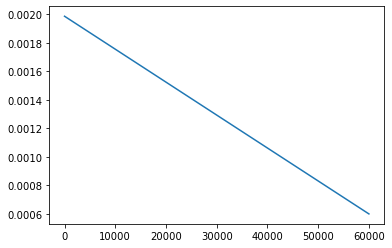

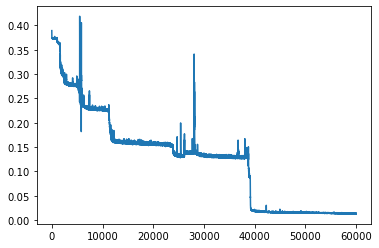

In [ ]:
plt.plot(history.history['lr'])
plt.figure()
plt.plot(history.history['loss'])


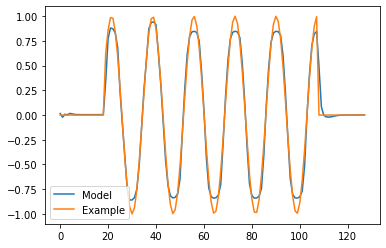

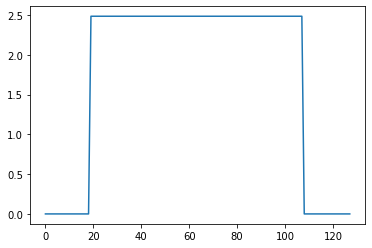

In [ ]:
test = model.predict(input_data)

plt.plot(test[17,:,:], label = 'Model')
plt.plot(output_data[17,:], label = 'Example')
plt.legend()
plt.figure()
plt.plot(input_data[17,:,0])

In [ ]:
#saving the model

import os

def mkdirp(dir):
    '''make a directory if it doesn't exist'''
    if not os.path.exists(dir):
        os.mkdir(dir)

direc = os.getcwd() + '\\TF_models' + '\\model_large_freq_difference'
        
mkdirp(direc)

model.save(direc)


INFO:tensorflow:Assets written to: C:\Users\Chetan\TF_models\model_large_freq_difference\assets


In [ ]:
model2 = tf.keras.models.load_model(direc)



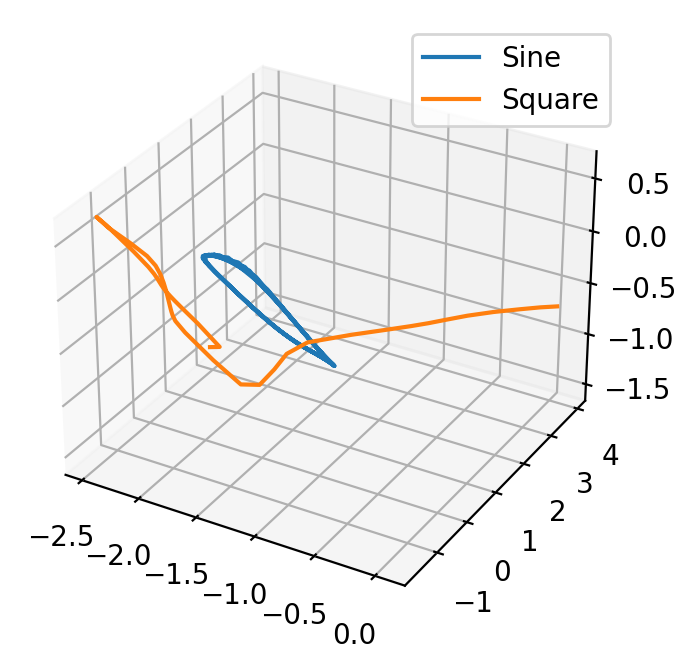

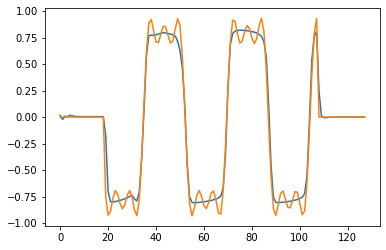

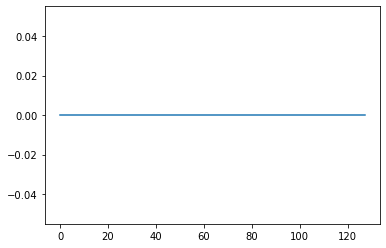

In [ ]:
#pca 



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



scaler = StandardScaler() #removes the mean and scales to unit variance 
pca = PCA(n_components=3)

target_layer = model.layers[0] #extracting the state prior to output

target_layer.return_sequences = True
target_outputs = target_layer(target_layer.input)
target_model = tf.keras.models.Model(model.input, target_outputs)

neuron_firings = target_model.predict(input_data)
scaled_firings = list()
principal_firings = list()

#fitting the PCA on the average signal 

for example in neuron_firings:
    scaled_firings.append(scaler.fit_transform(example))
        
pca.fit(np.average(scaled_firings, 0))

for example in scaled_firings: 
    principal_firings.append(pca.transform(example))

principal_firings = np.array(principal_firings)    
fig = plt.figure(figsize=(4, 4), dpi=200, facecolor='w', edgecolor='k')
ax = plt.axes(projection= '3d')


start_index = int(0.3 * time_length)
end_index = int(0.7 * time_length)

ax.plot(principal_firings[25, start_index:end_index, 0], principal_firings[25, start_index:end_index, 1],principal_firings[25, start_index:end_index, 2],
       label = 'Sine')
ax.plot(principal_firings[0, start_index:end_index, 0], principal_firings[0, start_index:end_index, 1],principal_firings[0, start_index:end_index, 2],
       label = 'Square')

plt.legend()

plt.figure()
plt.plot(test[0,:,:])
plt.plot(output_data[0,:])
plt.figure()
plt.plot(input_data[0,:,0]) 

plt.show()

In [ ]:
np.average(scaled_firings, 0).shape

(128, 20)